In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 10]
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score, recall_score, precision_score, classification_report, r2_score, confusion_matrix

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.pipeline import Pipeline

# 퀴즈 
타이타닉 데이타를 XGBClassifier() 를 이용해서 모델을 생성하고 테스트하여라 

In [6]:
titanic_df = pd.read_csv('data/titanic_book.csv')

titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

# encoder = LabelEncoder()
# encoder.fit(titanic_df['Sex'])
# temp = encoder.transform(titanic_df['Sex'])
# titanic_df['Sex'] = temp.reshape(-1, 1)

# encoder.fit(titanic_df['Embarked'])
# temp = encoder.transform(titanic_df['Embarked'])
# titanic_df['Embarked'] = temp.reshape(-1, 1)

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
# encoder.fit(titanic_df['Cabin'])
# temp = encoder.transform(titanic_df['Cabin'])
# titanic_df['Cabin'] = temp.reshape(-1, 1)


titanic_df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [7]:
# age 분류 함수
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat


titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

In [8]:
titanic_df.sample(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_cat
844,0,3,male,17.0,0,0,8.6625,N,S,Teenager
478,0,3,male,22.0,0,0,7.5208,N,S,Student
710,1,1,female,24.0,0,0,49.5042,C,C,Student


In [12]:
# X_features = pd.get_dummies(titanic_df, columns=['Sex','Cabin','Embarked'])
X_features = pd.get_dummies(titanic_df, columns=['Sex','Cabin','Embarked', 'Age_cat'])
X_features.sample()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Embarked_N,Embarked_Q,Embarked_S,Age_cat_Adult,Age_cat_Baby,Age_cat_Child,Age_cat_Elderly,Age_cat_Student,Age_cat_Teenager,Age_cat_Young Adult
465,0,3,38.0,0,0,7.05,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0


In [13]:
y = X_features['Survived'] # y 설정
del X_features['Survived'] 

In [14]:
X_features.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_N', 'Cabin_T', 'Embarked_C', 'Embarked_N',
       'Embarked_Q', 'Embarked_S', 'Age_cat_Adult', 'Age_cat_Baby',
       'Age_cat_Child', 'Age_cat_Elderly', 'Age_cat_Student',
       'Age_cat_Teenager', 'Age_cat_Young Adult'],
      dtype='object')

In [20]:
# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X_features, y, 
                                                    test_size=0.3, random_state=11,
                                                    stratify=y)

In [25]:
import xgboost
from xgboost import plot_importance, XGBClassifier 

In [26]:
# model_xgb = XGBClassifier(objective='reg:squarederror')
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)
model_xgb.score(X_test, y_test)

[00:32:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7910447761194029

In [27]:
# model_xgb = XGBClassifier(n_estimators=10

# 그리드 서치 사용하여 최적의 해 찾기.
model_xgb = XGBClassifier()
params = {
    'n_estimators':[10, 50, 100, 500],
    'max_depth':[3, 5, 7, 9],
    'learning_rate':[0.0001, 0.001, 0.01, 0.1, 0.3, 0.5]
}
model_xgb_gridcv = GridSearchCV(model_xgb, param_grid=params)
model_xgb_gridcv.fit(X_train,
           y_train,
           eval_set=[(X_test, y_test)],
           eval_metric="error")

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.19030
[1]	validation_0-error:0.19030
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.19030
[5]	validation_0-error:0.19030
[6]	validation_0-error:0.19030
[7]	validation_0-error:0.19030
[8]	validation_0-error:0.19030
[9]	validation_0-error:0.19030
[0]	validation_0-error:0.15672
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.15672
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.15672
[6]	validation_0-error:0.15672
[7]	validation_0-error:0.15672
[8]	validation_0-error:0.15672
[9]	validation_0-error:0.15672
[0]	validation_0-error:0.16045
[1]	validation_0-error:0.16045
[2]	validation_0-error:0.16045
[3]	validation_0-error:0.16045
[4]	validation_0-error:0.16045
[5]	validation_0-error:0.16045
[6]	validation_0-error:0.16045
[7]	validation_0-error:0.16045
[8]	validation_0-error:0.16045
[9]	validation_0-error:0.16045
[0]	validation_0-error:0.13060
[1]	validation_0-error:0.13060
[2]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[1]	validation_0-error:0.16418
[2]	validation_0-error:0.16418
[3]	validation_0-error:0.16418
[4]	validation_0-error:0.16418
[5]	validation_0-error:0.16418
[6]	validation_0-error:0.16418
[7]	validation_0-error:0.16418
[8]	validation_0-error:0.16418
[9]	validation_0-error:0.16418


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.19030
[1]	validation_0-error:0.19030
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.19030
[5]	validation_0-error:0.19030
[6]	validation_0-error:0.19030
[7]	validation_0-error:0.19030
[8]	validation_0-error:0.19030
[9]	validation_0-error:0.19030
[10]	validation_0-error:0.19030
[11]	validation_0-error:0.19030
[12]	validation_0-error:0.19030
[13]	validation_0-error:0.19030
[14]	validation_0-error:0.19030
[15]	validation_0-error:0.19030
[16]	validation_0-error:0.19030
[17]	validation_0-error:0.19030
[18]	validation_0-error:0.19030
[19]	validation_0-error:0.19030
[20]	validation_0-error:0.19030
[21]	validation_0-error:0.19030
[22]	validation_0-error:0.19030
[23]	validation_0-error:0.19030
[24]	validation_0-error:0.19030
[25]	validation_0-error:0.19030
[26]	validation_0-error:0.19030
[27]	validation_0-error:0.19030
[28]	validation_0-error:0.19030
[29]	validation_0-error:0.19030
[30]	validation_0-error:0.19030
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17]	validation_0-error:0.15672
[18]	validation_0-error:0.15672
[19]	validation_0-error:0.15672
[20]	validation_0-error:0.15672
[21]	validation_0-error:0.15672
[22]	validation_0-error:0.15672
[23]	validation_0-error:0.15672
[24]	validation_0-error:0.15672
[25]	validation_0-error:0.15672
[26]	validation_0-error:0.15672
[27]	validation_0-error:0.15672
[28]	validation_0-error:0.15672
[29]	validation_0-error:0.15672
[30]	validation_0-error:0.15672
[31]	validation_0-error:0.15672
[32]	validation_0-error:0.15672
[33]	validation_0-error:0.15672
[34]	validation_0-error:0.15672
[35]	validation_0-error:0.15672
[36]	validation_0-error:0.15672
[37]	validation_0-error:0.15672
[38]	validation_0-error:0.15672
[39]	validation_0-error:0.15672
[40]	validation_0-error:0.15672
[41]	validation_0-error:0.15672
[42]	validation_0-error:0.15672
[43]	validation_0-error:0.15672
[44]	validation_0-error:0.15672
[45]	validation_0-error:0.15672
[46]	validation_0-error:0.15672
[47]	validation_0-error:0.15672
[48]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[35]	validation_0-error:0.16045
[36]	validation_0-error:0.16045
[37]	validation_0-error:0.16045
[38]	validation_0-error:0.16045
[39]	validation_0-error:0.16045
[40]	validation_0-error:0.16045
[41]	validation_0-error:0.16045
[42]	validation_0-error:0.16045
[43]	validation_0-error:0.16045
[44]	validation_0-error:0.16045
[45]	validation_0-error:0.16045
[46]	validation_0-error:0.16045
[47]	validation_0-error:0.16045
[48]	validation_0-error:0.16045
[49]	validation_0-error:0.16045
[0]	validation_0-error:0.13060
[1]	validation_0-error:0.13060
[2]	validation_0-error:0.13060
[3]	validation_0-error:0.13060
[4]	validation_0-error:0.13060
[5]	validation_0-error:0.13060
[6]	validation_0-error:0.13060
[7]	validation_0-error:0.13060
[8]	validation_0-error:0.13060
[9]	validation_0-error:0.13060
[10]	validation_0-error:0.13060
[11]	validation_0-error:0.13060
[12]	validation_0-error:0.13060
[13]	validation_0-error:0.13060
[14]	validation_0-error:0.13060
[15]	validation_0-error:0.13060
[16]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[36]	validation_0-error:0.13060
[37]	validation_0-error:0.13060
[38]	validation_0-error:0.13060
[39]	validation_0-error:0.13060
[40]	validation_0-error:0.13060
[41]	validation_0-error:0.13060
[42]	validation_0-error:0.13060
[43]	validation_0-error:0.13060
[44]	validation_0-error:0.13060
[45]	validation_0-error:0.13060
[46]	validation_0-error:0.13060
[47]	validation_0-error:0.13060
[48]	validation_0-error:0.13060
[49]	validation_0-error:0.13060
[0]	validation_0-error:0.16418
[1]	validation_0-error:0.16418
[2]	validation_0-error:0.16418
[3]	validation_0-error:0.16418
[4]	validation_0-error:0.16418
[5]	validation_0-error:0.16418
[6]	validation_0-error:0.16418
[7]	validation_0-error:0.16418
[8]	validation_0-error:0.16418
[9]	validation_0-error:0.16418
[10]	validation_0-error:0.16418
[11]	validation_0-error:0.16418
[12]	validation_0-error:0.16418
[13]	validation_0-error:0.16418
[14]	validation_0-error:0.16418
[15]	validation_0-error:0.16418
[16]	validation_0-error:0.16418
[17]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[32]	validation_0-error:0.16418
[33]	validation_0-error:0.16418
[34]	validation_0-error:0.16418
[35]	validation_0-error:0.16418
[36]	validation_0-error:0.16418
[37]	validation_0-error:0.16418
[38]	validation_0-error:0.16418
[39]	validation_0-error:0.16418
[40]	validation_0-error:0.16418
[41]	validation_0-error:0.16418
[42]	validation_0-error:0.16418
[43]	validation_0-error:0.16418
[44]	validation_0-error:0.16418
[45]	validation_0-error:0.16418
[46]	validation_0-error:0.16418
[47]	validation_0-error:0.16418
[48]	validation_0-error:0.16418
[49]	validation_0-error:0.16418
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.19030
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.19030
[5]	validation_0-error:0.19030
[6]	validation_0-error:0.19030
[7]	validation_0-error:0.19030
[8]	validation_0-error:0.19030
[9]	validation_0-error:0.19030
[10]	validation_0-error:0.19030
[11]	validation_0-error:0.19030
[12]	validation_0-error:0.19030
[13]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[38]	validation_0-error:0.19030
[39]	validation_0-error:0.19030
[40]	validation_0-error:0.19030
[41]	validation_0-error:0.19030
[42]	validation_0-error:0.19030
[43]	validation_0-error:0.19030
[44]	validation_0-error:0.19030
[45]	validation_0-error:0.19030
[46]	validation_0-error:0.19030
[47]	validation_0-error:0.19030
[48]	validation_0-error:0.19030
[49]	validation_0-error:0.19030
[50]	validation_0-error:0.19030
[51]	validation_0-error:0.19030
[52]	validation_0-error:0.19030
[53]	validation_0-error:0.19030
[54]	validation_0-error:0.19030
[55]	validation_0-error:0.19030
[56]	validation_0-error:0.19030
[57]	validation_0-error:0.19030
[58]	validation_0-error:0.19030
[59]	validation_0-error:0.19030
[60]	validation_0-error:0.19030
[61]	validation_0-error:0.19030
[62]	validation_0-error:0.19030
[63]	validation_0-error:0.19030
[64]	validation_0-error:0.19030
[65]	validation_0-error:0.19030
[66]	validation_0-error:0.19030
[67]	validation_0-error:0.19030
[68]	validation_0-error:0.19030
[69]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.15672
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.15672
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.15672
[6]	validation_0-error:0.15672
[7]	validation_0-error:0.15672
[8]	validation_0-error:0.15672
[9]	validation_0-error:0.15672
[10]	validation_0-error:0.15672
[11]	validation_0-error:0.15672
[12]	validation_0-error:0.15672
[13]	validation_0-error:0.15672
[14]	validation_0-error:0.15672
[15]	validation_0-error:0.15672
[16]	validation_0-error:0.15672
[17]	validation_0-error:0.15672
[18]	validation_0-error:0.15672
[19]	validation_0-error:0.15672
[20]	validation_0-error:0.15672
[21]	validation_0-error:0.15672
[22]	validation_0-error:0.15672
[23]	validation_0-error:0.15672
[24]	validation_0-error:0.15672
[25]	validation_0-error:0.15672
[26]	validation_0-error:0.15672
[27]	validation_0-error:0.15672
[28]	validation_0-error:0.15672
[29]	validation_0-error:0.15672
[30]	validation_0-error:0.15672
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[95]	validation_0-error:0.16045
[96]	validation_0-error:0.16045
[97]	validation_0-error:0.16045
[98]	validation_0-error:0.16045
[99]	validation_0-error:0.16045
[0]	validation_0-error:0.13060
[1]	validation_0-error:0.13060
[2]	validation_0-error:0.13060
[3]	validation_0-error:0.13060
[4]	validation_0-error:0.13060
[5]	validation_0-error:0.13060
[6]	validation_0-error:0.13060
[7]	validation_0-error:0.13060
[8]	validation_0-error:0.13060
[9]	validation_0-error:0.13060
[10]	validation_0-error:0.13060
[11]	validation_0-error:0.13060
[12]	validation_0-error:0.13060
[13]	validation_0-error:0.13060
[14]	validation_0-error:0.13060
[15]	validation_0-error:0.13060
[16]	validation_0-error:0.13060
[17]	validation_0-error:0.13060
[18]	validation_0-error:0.13060
[19]	validation_0-error:0.13060
[20]	validation_0-error:0.13060
[21]	validation_0-error:0.13060
[22]	validation_0-error:0.13060
[23]	validation_0-error:0.13060
[24]	validation_0-error:0.13060
[25]	validation_0-error:0.13060
[26]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.16418
[1]	validation_0-error:0.16418
[2]	validation_0-error:0.16418
[3]	validation_0-error:0.16418
[4]	validation_0-error:0.16418
[5]	validation_0-error:0.16418
[6]	validation_0-error:0.16418
[7]	validation_0-error:0.16418
[8]	validation_0-error:0.16418
[9]	validation_0-error:0.16418
[10]	validation_0-error:0.16418
[11]	validation_0-error:0.16418
[12]	validation_0-error:0.16418
[13]	validation_0-error:0.16418
[14]	validation_0-error:0.16418
[15]	validation_0-error:0.16418
[16]	validation_0-error:0.16418
[17]	validation_0-error:0.16418
[18]	validation_0-error:0.16418
[19]	validation_0-error:0.16418
[20]	validation_0-error:0.16418
[21]	validation_0-error:0.16418
[22]	validation_0-error:0.16418
[23]	validation_0-error:0.16418
[24]	validation_0-error:0.16418
[25]	validation_0-error:0.16418
[26]	validation_0-error:0.16418
[27]	validation_0-error:0.16418
[28]	validation_0-error:0.16418
[29]	validation_0-error:0.16418
[30]	validation_0-error:0.16418
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[102]	validation_0-error:0.19030
[103]	validation_0-error:0.19030
[104]	validation_0-error:0.19030
[105]	validation_0-error:0.19030
[106]	validation_0-error:0.19030
[107]	validation_0-error:0.19030
[108]	validation_0-error:0.19030
[109]	validation_0-error:0.19030
[110]	validation_0-error:0.19030
[111]	validation_0-error:0.19030
[112]	validation_0-error:0.19030
[113]	validation_0-error:0.19030
[114]	validation_0-error:0.19030
[115]	validation_0-error:0.19030
[116]	validation_0-error:0.19030
[117]	validation_0-error:0.19030
[118]	validation_0-error:0.19030
[119]	validation_0-error:0.19030
[120]	validation_0-error:0.19030
[121]	validation_0-error:0.19030
[122]	validation_0-error:0.19030
[123]	validation_0-error:0.19030
[124]	validation_0-error:0.19030
[125]	validation_0-error:0.19030
[126]	validation_0-error:0.19030
[127]	validation_0-error:0.19030
[128]	validation_0-error:0.19030
[129]	validation_0-error:0.19030
[130]	validation_0-error:0.19030
[131]	validation_0-error:0.19030
[132]	vali

[351]	validation_0-error:0.19030
[352]	validation_0-error:0.19030
[353]	validation_0-error:0.19030
[354]	validation_0-error:0.19030
[355]	validation_0-error:0.19030
[356]	validation_0-error:0.19030
[357]	validation_0-error:0.19030
[358]	validation_0-error:0.19030
[359]	validation_0-error:0.19030
[360]	validation_0-error:0.19030
[361]	validation_0-error:0.19030
[362]	validation_0-error:0.19030
[363]	validation_0-error:0.19030
[364]	validation_0-error:0.19030
[365]	validation_0-error:0.19030
[366]	validation_0-error:0.19030
[367]	validation_0-error:0.19030
[368]	validation_0-error:0.19030
[369]	validation_0-error:0.19030
[370]	validation_0-error:0.19030
[371]	validation_0-error:0.19030
[372]	validation_0-error:0.19030
[373]	validation_0-error:0.19030
[374]	validation_0-error:0.19030
[375]	validation_0-error:0.19030
[376]	validation_0-error:0.19030
[377]	validation_0-error:0.19030
[378]	validation_0-error:0.19030
[379]	validation_0-error:0.19030
[380]	validation_0-error:0.19030
[381]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[100]	validation_0-error:0.15672
[101]	validation_0-error:0.15672
[102]	validation_0-error:0.15672
[103]	validation_0-error:0.15672
[104]	validation_0-error:0.15672
[105]	validation_0-error:0.15672
[106]	validation_0-error:0.15672
[107]	validation_0-error:0.15672
[108]	validation_0-error:0.15672
[109]	validation_0-error:0.15672
[110]	validation_0-error:0.15672
[111]	validation_0-error:0.15672
[112]	validation_0-error:0.15672
[113]	validation_0-error:0.15672
[114]	validation_0-error:0.15672
[115]	validation_0-error:0.15672
[116]	validation_0-error:0.15672
[117]	validation_0-error:0.15672
[118]	validation_0-error:0.15672
[119]	validation_0-error:0.15672
[120]	validation_0-error:0.15672
[121]	validation_0-error:0.15672
[122]	validation_0-error:0.15672
[123]	validation_0-error:0.15672
[124]	validation_0-error:0.15672
[125]	validation_0-error:0.15672
[126]	validation_0-error:0.15672
[127]	validation_0-error:0.15672
[128]	validation_0-error:0.15672
[129]	validation_0-error:0.15672
[130]	vali

[349]	validation_0-error:0.15672
[350]	validation_0-error:0.15672
[351]	validation_0-error:0.15672
[352]	validation_0-error:0.15672
[353]	validation_0-error:0.15672
[354]	validation_0-error:0.15672
[355]	validation_0-error:0.15672
[356]	validation_0-error:0.15672
[357]	validation_0-error:0.15672
[358]	validation_0-error:0.15672
[359]	validation_0-error:0.15672
[360]	validation_0-error:0.15672
[361]	validation_0-error:0.15672
[362]	validation_0-error:0.15672
[363]	validation_0-error:0.15672
[364]	validation_0-error:0.15672
[365]	validation_0-error:0.15672
[366]	validation_0-error:0.15672
[367]	validation_0-error:0.15672
[368]	validation_0-error:0.15672
[369]	validation_0-error:0.15672
[370]	validation_0-error:0.15672
[371]	validation_0-error:0.15672
[372]	validation_0-error:0.15672
[373]	validation_0-error:0.15672
[374]	validation_0-error:0.15672
[375]	validation_0-error:0.15672
[376]	validation_0-error:0.15672
[377]	validation_0-error:0.15672
[378]	validation_0-error:0.15672
[379]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[95]	validation_0-error:0.16045
[96]	validation_0-error:0.16045
[97]	validation_0-error:0.16045
[98]	validation_0-error:0.16045
[99]	validation_0-error:0.16045
[100]	validation_0-error:0.16045
[101]	validation_0-error:0.16045
[102]	validation_0-error:0.16045
[103]	validation_0-error:0.16045
[104]	validation_0-error:0.16045
[105]	validation_0-error:0.16045
[106]	validation_0-error:0.16045
[107]	validation_0-error:0.16045
[108]	validation_0-error:0.16045
[109]	validation_0-error:0.16045
[110]	validation_0-error:0.16045
[111]	validation_0-error:0.16045
[112]	validation_0-error:0.16045
[113]	validation_0-error:0.16045
[114]	validation_0-error:0.16045
[115]	validation_0-error:0.16045
[116]	validation_0-error:0.16045
[117]	validation_0-error:0.16045
[118]	validation_0-error:0.16045
[119]	validation_0-error:0.16045
[120]	validation_0-error:0.16045
[121]	validation_0-error:0.16045
[122]	validation_0-error:0.16045
[123]	validation_0-error:0.16045
[124]	validation_0-error:0.16045
[125]	validatio

[344]	validation_0-error:0.16045
[345]	validation_0-error:0.16045
[346]	validation_0-error:0.16045
[347]	validation_0-error:0.16045
[348]	validation_0-error:0.16045
[349]	validation_0-error:0.16045
[350]	validation_0-error:0.16045
[351]	validation_0-error:0.16045
[352]	validation_0-error:0.16045
[353]	validation_0-error:0.16045
[354]	validation_0-error:0.16045
[355]	validation_0-error:0.16045
[356]	validation_0-error:0.16045
[357]	validation_0-error:0.16045
[358]	validation_0-error:0.16045
[359]	validation_0-error:0.16045
[360]	validation_0-error:0.16045
[361]	validation_0-error:0.16045
[362]	validation_0-error:0.16045
[363]	validation_0-error:0.16045
[364]	validation_0-error:0.16045
[365]	validation_0-error:0.16045
[366]	validation_0-error:0.16045
[367]	validation_0-error:0.16045
[368]	validation_0-error:0.16045
[369]	validation_0-error:0.16045
[370]	validation_0-error:0.16045
[371]	validation_0-error:0.16045
[372]	validation_0-error:0.16045
[373]	validation_0-error:0.16045
[374]	vali

[96]	validation_0-error:0.13060
[97]	validation_0-error:0.13060


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[98]	validation_0-error:0.13060
[99]	validation_0-error:0.13060
[100]	validation_0-error:0.13060
[101]	validation_0-error:0.13060
[102]	validation_0-error:0.13060
[103]	validation_0-error:0.13060
[104]	validation_0-error:0.13060
[105]	validation_0-error:0.13060
[106]	validation_0-error:0.13060
[107]	validation_0-error:0.13060
[108]	validation_0-error:0.13060
[109]	validation_0-error:0.13060
[110]	validation_0-error:0.13060
[111]	validation_0-error:0.13060
[112]	validation_0-error:0.13060
[113]	validation_0-error:0.13060
[114]	validation_0-error:0.13060
[115]	validation_0-error:0.13060
[116]	validation_0-error:0.13060
[117]	validation_0-error:0.13060
[118]	validation_0-error:0.13060
[119]	validation_0-error:0.13060
[120]	validation_0-error:0.13060
[121]	validation_0-error:0.13060
[122]	validation_0-error:0.13060
[123]	validation_0-error:0.13060
[124]	validation_0-error:0.13060
[125]	validation_0-error:0.13060
[126]	validation_0-error:0.13060
[127]	validation_0-error:0.13060
[128]	valida

[347]	validation_0-error:0.13060
[348]	validation_0-error:0.13060
[349]	validation_0-error:0.13060
[350]	validation_0-error:0.13060
[351]	validation_0-error:0.13060
[352]	validation_0-error:0.13060
[353]	validation_0-error:0.13060
[354]	validation_0-error:0.13060
[355]	validation_0-error:0.13060
[356]	validation_0-error:0.13060
[357]	validation_0-error:0.13060
[358]	validation_0-error:0.13060
[359]	validation_0-error:0.13060
[360]	validation_0-error:0.13060
[361]	validation_0-error:0.13060
[362]	validation_0-error:0.13060
[363]	validation_0-error:0.13060
[364]	validation_0-error:0.13060
[365]	validation_0-error:0.13060
[366]	validation_0-error:0.13060
[367]	validation_0-error:0.13060
[368]	validation_0-error:0.13060
[369]	validation_0-error:0.13060
[370]	validation_0-error:0.13060
[371]	validation_0-error:0.13060
[372]	validation_0-error:0.13060
[373]	validation_0-error:0.13060
[374]	validation_0-error:0.13060
[375]	validation_0-error:0.13060
[376]	validation_0-error:0.13060
[377]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[93]	validation_0-error:0.16418
[94]	validation_0-error:0.16418
[95]	validation_0-error:0.16418
[96]	validation_0-error:0.16418
[97]	validation_0-error:0.16418
[98]	validation_0-error:0.16418
[99]	validation_0-error:0.16418
[100]	validation_0-error:0.16418
[101]	validation_0-error:0.16418
[102]	validation_0-error:0.16418
[103]	validation_0-error:0.16418
[104]	validation_0-error:0.16418
[105]	validation_0-error:0.16418
[106]	validation_0-error:0.16418
[107]	validation_0-error:0.16418
[108]	validation_0-error:0.16418
[109]	validation_0-error:0.16418
[110]	validation_0-error:0.16418
[111]	validation_0-error:0.16418
[112]	validation_0-error:0.16418
[113]	validation_0-error:0.16418
[114]	validation_0-error:0.16418
[115]	validation_0-error:0.16418
[116]	validation_0-error:0.16418
[117]	validation_0-error:0.16418
[118]	validation_0-error:0.16418
[119]	validation_0-error:0.16418
[120]	validation_0-error:0.16418
[121]	validation_0-error:0.16418
[122]	validation_0-error:0.16418
[123]	validation_

[342]	validation_0-error:0.16418
[343]	validation_0-error:0.16418
[344]	validation_0-error:0.16418
[345]	validation_0-error:0.16418
[346]	validation_0-error:0.16418
[347]	validation_0-error:0.16418
[348]	validation_0-error:0.16418
[349]	validation_0-error:0.16418
[350]	validation_0-error:0.16418
[351]	validation_0-error:0.16418
[352]	validation_0-error:0.16418
[353]	validation_0-error:0.16418
[354]	validation_0-error:0.16418
[355]	validation_0-error:0.16418
[356]	validation_0-error:0.16418
[357]	validation_0-error:0.16418
[358]	validation_0-error:0.16418
[359]	validation_0-error:0.16418
[360]	validation_0-error:0.16418
[361]	validation_0-error:0.16418
[362]	validation_0-error:0.16418
[363]	validation_0-error:0.16418
[364]	validation_0-error:0.16418
[365]	validation_0-error:0.16418
[366]	validation_0-error:0.16418
[367]	validation_0-error:0.16418
[368]	validation_0-error:0.16418
[369]	validation_0-error:0.16418
[370]	validation_0-error:0.16418
[371]	validation_0-error:0.16418
[372]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[0]	validation_0-error:0.20149
[1]	validation_0-error:0.20149
[2]	validation_0-error:0.20149
[3]	validation_0-error:0.20149
[4]	validation_0-error:0.20149
[5]	validation_0-error:0.20149
[6]	validation_0-error:0.20149
[7]	validation_0-error:0.20149
[8]	validation_0-error:0.20149
[9]	validation_0-error:0.20149
[0]	validation_0-error:0.14925
[1]	validation_0-error:0.15299
[2]	validation_0-error:0.15299
[3]	validation_0-error:0.15299
[4]	validation_0-error:0.15299
[5]	validation_0-error:0.15299
[6]	validation_0-error:0.15299
[7]	validation_0-error:0.15299
[8]	validation_0-error:0.15299
[9]	validation_0-error:0.15299
[10]	validation_0-error:0.15299
[11]	validation_0-error:0.15299
[12]	validation_0-error:0.15299
[13]	validation_0-error:0.15299
[14]	validation_0-error:0.15299
[15]	validation_0-error:0.15299
[16]	validation_0-error:0.15299
[17]	validation_0-error:0.15299
[18]	validation_0-error:0.15299
[19]	validation_0-error:0.15299
[20]	validation_0-error:0.15299
[21]	validation_0-error:0.15

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13]	validation_0-error:0.16791
[14]	validation_0-error:0.16791
[15]	validation_0-error:0.16791
[16]	validation_0-error:0.16791
[17]	validation_0-error:0.16791
[18]	validation_0-error:0.16791
[19]	validation_0-error:0.16791
[20]	validation_0-error:0.16791
[21]	validation_0-error:0.16791
[22]	validation_0-error:0.16791
[23]	validation_0-error:0.16791
[24]	validation_0-error:0.16791
[25]	validation_0-error:0.16791
[26]	validation_0-error:0.16791
[27]	validation_0-error:0.16791
[28]	validation_0-error:0.16791
[29]	validation_0-error:0.16791
[30]	validation_0-error:0.16791
[31]	validation_0-error:0.16791
[32]	validation_0-error:0.16791
[33]	validation_0-error:0.16791
[34]	validation_0-error:0.16791
[35]	validation_0-error:0.16791
[36]	validation_0-error:0.16791
[37]	validation_0-error:0.16791
[38]	validation_0-error:0.16791
[39]	validation_0-error:0.16791
[40]	validation_0-error:0.16791
[41]	validation_0-error:0.16791
[42]	validation_0-error:0.16791
[43]	validation_0-error:0.16791
[44]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17]	validation_0-error:0.12687
[18]	validation_0-error:0.12687
[19]	validation_0-error:0.12687
[20]	validation_0-error:0.12687
[21]	validation_0-error:0.12687
[22]	validation_0-error:0.12687
[23]	validation_0-error:0.12687
[24]	validation_0-error:0.12687
[25]	validation_0-error:0.12687
[26]	validation_0-error:0.12687
[27]	validation_0-error:0.12687
[28]	validation_0-error:0.12687
[29]	validation_0-error:0.12687
[30]	validation_0-error:0.12687
[31]	validation_0-error:0.12687
[32]	validation_0-error:0.12687
[33]	validation_0-error:0.12687
[34]	validation_0-error:0.12687
[35]	validation_0-error:0.12687
[36]	validation_0-error:0.12687
[37]	validation_0-error:0.12687
[38]	validation_0-error:0.12687
[39]	validation_0-error:0.12687
[40]	validation_0-error:0.12687
[41]	validation_0-error:0.12687
[42]	validation_0-error:0.12687
[43]	validation_0-error:0.12687
[44]	validation_0-error:0.12687
[45]	validation_0-error:0.12687
[46]	validation_0-error:0.12687
[47]	validation_0-error:0.12687
[48]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22]	validation_0-error:0.15299
[23]	validation_0-error:0.15299
[24]	validation_0-error:0.15672
[25]	validation_0-error:0.15672
[26]	validation_0-error:0.15672
[27]	validation_0-error:0.15672
[28]	validation_0-error:0.15672
[29]	validation_0-error:0.15672
[30]	validation_0-error:0.15672
[31]	validation_0-error:0.15672
[32]	validation_0-error:0.15672
[33]	validation_0-error:0.15672
[34]	validation_0-error:0.15672
[35]	validation_0-error:0.15672
[36]	validation_0-error:0.15672
[37]	validation_0-error:0.15672
[38]	validation_0-error:0.15672
[39]	validation_0-error:0.15672
[40]	validation_0-error:0.15672
[41]	validation_0-error:0.15672
[42]	validation_0-error:0.15672
[43]	validation_0-error:0.15672
[44]	validation_0-error:0.15672
[45]	validation_0-error:0.15672
[46]	validation_0-error:0.15672
[47]	validation_0-error:0.15672
[48]	validation_0-error:0.15672
[49]	validation_0-error:0.15672
[50]	validation_0-error:0.15672
[51]	validation_0-error:0.15672
[52]	validation_0-error:0.15672
[53]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[96]	validation_0-error:0.16791
[97]	validation_0-error:0.16791
[98]	validation_0-error:0.16791
[99]	validation_0-error:0.16791
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.19030
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.19030
[5]	validation_0-error:0.19030
[6]	validation_0-error:0.19030
[7]	validation_0-error:0.19030
[8]	validation_0-error:0.19030
[9]	validation_0-error:0.19030
[10]	validation_0-error:0.19030
[11]	validation_0-error:0.19030
[12]	validation_0-error:0.19030
[13]	validation_0-error:0.18284
[14]	validation_0-error:0.18657
[15]	validation_0-error:0.18657
[16]	validation_0-error:0.18657
[17]	validation_0-error:0.18657
[18]	validation_0-error:0.18657
[19]	validation_0-error:0.18657
[20]	validation_0-error:0.18657
[21]	validation_0-error:0.18657
[22]	validation_0-error:0.18657
[23]	validation_0-error:0.18657
[24]	validation_0-error:0.18657
[25]	validation_0-error:0.18657
[26]	validation_0-error:0.18657
[27]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[97]	validation_0-error:0.18657
[98]	validation_0-error:0.18657
[99]	validation_0-error:0.18657
[0]	validation_0-error:0.12687
[1]	validation_0-error:0.12687
[2]	validation_0-error:0.12687
[3]	validation_0-error:0.12687
[4]	validation_0-error:0.12687
[5]	validation_0-error:0.12687
[6]	validation_0-error:0.12687
[7]	validation_0-error:0.12687
[8]	validation_0-error:0.12687
[9]	validation_0-error:0.12687
[10]	validation_0-error:0.12687
[11]	validation_0-error:0.12687
[12]	validation_0-error:0.12687
[13]	validation_0-error:0.12687
[14]	validation_0-error:0.12687
[15]	validation_0-error:0.12687
[16]	validation_0-error:0.12687
[17]	validation_0-error:0.12687
[18]	validation_0-error:0.12687
[19]	validation_0-error:0.12687
[20]	validation_0-error:0.12687
[21]	validation_0-error:0.12687
[22]	validation_0-error:0.12687
[23]	validation_0-error:0.12687
[24]	validation_0-error:0.12687
[25]	validation_0-error:0.12687
[26]	validation_0-error:0.12687
[27]	validation_0-error:0.12687
[28]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[93]	validation_0-error:0.12687
[94]	validation_0-error:0.12687
[95]	validation_0-error:0.12687
[96]	validation_0-error:0.12687
[97]	validation_0-error:0.12687
[98]	validation_0-error:0.12687
[99]	validation_0-error:0.12687
[0]	validation_0-error:0.20149
[1]	validation_0-error:0.20149
[2]	validation_0-error:0.20149
[3]	validation_0-error:0.20149
[4]	validation_0-error:0.20149
[5]	validation_0-error:0.20149
[6]	validation_0-error:0.20149
[7]	validation_0-error:0.20149
[8]	validation_0-error:0.20149
[9]	validation_0-error:0.20149
[10]	validation_0-error:0.20149
[11]	validation_0-error:0.20149
[12]	validation_0-error:0.20149
[13]	validation_0-error:0.20149
[14]	validation_0-error:0.20149
[15]	validation_0-error:0.20149
[16]	validation_0-error:0.20149
[17]	validation_0-error:0.20149
[18]	validation_0-error:0.20149
[19]	validation_0-error:0.20149
[20]	validation_0-error:0.20149
[21]	validation_0-error:0.20149
[22]	validation_0-error:0.20149
[23]	validation_0-error:0.20149
[24]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[98]	validation_0-error:0.20149
[99]	validation_0-error:0.20149
[0]	validation_0-error:0.14925
[1]	validation_0-error:0.15299
[2]	validation_0-error:0.15299
[3]	validation_0-error:0.15299
[4]	validation_0-error:0.15299
[5]	validation_0-error:0.15299
[6]	validation_0-error:0.15299
[7]	validation_0-error:0.15299
[8]	validation_0-error:0.15299
[9]	validation_0-error:0.15299
[10]	validation_0-error:0.15299
[11]	validation_0-error:0.15299
[12]	validation_0-error:0.15299
[13]	validation_0-error:0.15299
[14]	validation_0-error:0.15299
[15]	validation_0-error:0.15299
[16]	validation_0-error:0.15299
[17]	validation_0-error:0.15299
[18]	validation_0-error:0.15299
[19]	validation_0-error:0.15299
[20]	validation_0-error:0.15299
[21]	validation_0-error:0.15299
[22]	validation_0-error:0.15299
[23]	validation_0-error:0.15299
[24]	validation_0-error:0.15672
[25]	validation_0-error:0.15672
[26]	validation_0-error:0.15672
[27]	validation_0-error:0.15672
[28]	validation_0-error:0.15672
[29]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[85]	validation_0-error:0.15672
[86]	validation_0-error:0.15672
[87]	validation_0-error:0.15672
[88]	validation_0-error:0.15672
[89]	validation_0-error:0.15672
[90]	validation_0-error:0.15672
[91]	validation_0-error:0.15672
[92]	validation_0-error:0.15672
[93]	validation_0-error:0.15672
[94]	validation_0-error:0.15672
[95]	validation_0-error:0.15672
[96]	validation_0-error:0.15672
[97]	validation_0-error:0.15672
[98]	validation_0-error:0.15672
[99]	validation_0-error:0.15672
[100]	validation_0-error:0.15672
[101]	validation_0-error:0.15672
[102]	validation_0-error:0.15672
[103]	validation_0-error:0.15672
[104]	validation_0-error:0.15672
[105]	validation_0-error:0.15672
[106]	validation_0-error:0.15672
[107]	validation_0-error:0.15672
[108]	validation_0-error:0.15672
[109]	validation_0-error:0.15672
[110]	validation_0-error:0.15672
[111]	validation_0-error:0.15672
[112]	validation_0-error:0.15672
[113]	validation_0-error:0.15672
[114]	validation_0-error:0.15672
[115]	validation_0-error:

[334]	validation_0-error:0.15672
[335]	validation_0-error:0.15672
[336]	validation_0-error:0.15672
[337]	validation_0-error:0.15672
[338]	validation_0-error:0.15672
[339]	validation_0-error:0.15672
[340]	validation_0-error:0.15672
[341]	validation_0-error:0.15672
[342]	validation_0-error:0.15672
[343]	validation_0-error:0.15672
[344]	validation_0-error:0.15672
[345]	validation_0-error:0.15672
[346]	validation_0-error:0.15672
[347]	validation_0-error:0.15672
[348]	validation_0-error:0.15672
[349]	validation_0-error:0.15672
[350]	validation_0-error:0.15672
[351]	validation_0-error:0.15672
[352]	validation_0-error:0.15672
[353]	validation_0-error:0.15672
[354]	validation_0-error:0.15672
[355]	validation_0-error:0.15672
[356]	validation_0-error:0.15672
[357]	validation_0-error:0.15672
[358]	validation_0-error:0.15672
[359]	validation_0-error:0.15672
[360]	validation_0-error:0.15672
[361]	validation_0-error:0.15672
[362]	validation_0-error:0.15672
[363]	validation_0-error:0.15672
[364]	vali

[86]	validation_0-error:0.16791
[87]	validation_0-error:0.16791
[88]	validation_0-error:0.16791
[89]	validation_0-error:0.16791
[90]	validation_0-error:0.16791
[91]	validation_0-error:0.16791
[92]	validation_0-error:0.16791
[93]	validation_0-error:0.16791
[94]	validation_0-error:0.16791
[95]	validation_0-error:0.16791
[96]	validation_0-error:0.16791
[97]	validation_0-error:0.16791
[98]	validation_0-error:0.16791
[99]	validation_0-error:0.16791
[100]	validation_0-error:0.16791
[101]	validation_0-error:0.16791
[102]	validation_0-error:0.16791
[103]	validation_0-error:0.16791
[104]	validation_0-error:0.16791


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[105]	validation_0-error:0.16791
[106]	validation_0-error:0.16791
[107]	validation_0-error:0.16791
[108]	validation_0-error:0.16791
[109]	validation_0-error:0.16791
[110]	validation_0-error:0.16791
[111]	validation_0-error:0.16791
[112]	validation_0-error:0.16791
[113]	validation_0-error:0.16791
[114]	validation_0-error:0.16791
[115]	validation_0-error:0.16791
[116]	validation_0-error:0.16791
[117]	validation_0-error:0.16791
[118]	validation_0-error:0.16791
[119]	validation_0-error:0.16791
[120]	validation_0-error:0.16791
[121]	validation_0-error:0.16791
[122]	validation_0-error:0.16791
[123]	validation_0-error:0.16791
[124]	validation_0-error:0.16791
[125]	validation_0-error:0.16791
[126]	validation_0-error:0.16791
[127]	validation_0-error:0.16791
[128]	validation_0-error:0.16791
[129]	validation_0-error:0.16791
[130]	validation_0-error:0.16791
[131]	validation_0-error:0.16791
[132]	validation_0-error:0.16791
[133]	validation_0-error:0.16791
[134]	validation_0-error:0.16791
[135]	vali

[354]	validation_0-error:0.16791
[355]	validation_0-error:0.16791
[356]	validation_0-error:0.16791
[357]	validation_0-error:0.16791
[358]	validation_0-error:0.16791
[359]	validation_0-error:0.16791
[360]	validation_0-error:0.16791
[361]	validation_0-error:0.16791
[362]	validation_0-error:0.16791
[363]	validation_0-error:0.16791
[364]	validation_0-error:0.16791
[365]	validation_0-error:0.16791
[366]	validation_0-error:0.16791
[367]	validation_0-error:0.16791
[368]	validation_0-error:0.16791
[369]	validation_0-error:0.16791
[370]	validation_0-error:0.16791
[371]	validation_0-error:0.16791
[372]	validation_0-error:0.16791
[373]	validation_0-error:0.16791
[374]	validation_0-error:0.16791
[375]	validation_0-error:0.16791
[376]	validation_0-error:0.16791
[377]	validation_0-error:0.16791
[378]	validation_0-error:0.16791
[379]	validation_0-error:0.16791
[380]	validation_0-error:0.16791
[381]	validation_0-error:0.16791
[382]	validation_0-error:0.16791
[383]	validation_0-error:0.16791
[384]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[88]	validation_0-error:0.18657
[89]	validation_0-error:0.18657
[90]	validation_0-error:0.18657
[91]	validation_0-error:0.18657
[92]	validation_0-error:0.18657
[93]	validation_0-error:0.18657
[94]	validation_0-error:0.18657
[95]	validation_0-error:0.18657
[96]	validation_0-error:0.18657
[97]	validation_0-error:0.18657
[98]	validation_0-error:0.18657
[99]	validation_0-error:0.18657
[100]	validation_0-error:0.18657
[101]	validation_0-error:0.18657
[102]	validation_0-error:0.18657
[103]	validation_0-error:0.18657
[104]	validation_0-error:0.18657
[105]	validation_0-error:0.18657
[106]	validation_0-error:0.18657
[107]	validation_0-error:0.18657
[108]	validation_0-error:0.18657
[109]	validation_0-error:0.18657
[110]	validation_0-error:0.18657
[111]	validation_0-error:0.18657
[112]	validation_0-error:0.18657
[113]	validation_0-error:0.18657
[114]	validation_0-error:0.18657
[115]	validation_0-error:0.18657
[116]	validation_0-error:0.18657
[117]	validation_0-error:0.18657
[118]	validation_0-err

[337]	validation_0-error:0.18657
[338]	validation_0-error:0.18657
[339]	validation_0-error:0.18657
[340]	validation_0-error:0.18657
[341]	validation_0-error:0.18657
[342]	validation_0-error:0.18657
[343]	validation_0-error:0.18657
[344]	validation_0-error:0.18657
[345]	validation_0-error:0.18657
[346]	validation_0-error:0.18657
[347]	validation_0-error:0.18657
[348]	validation_0-error:0.18657
[349]	validation_0-error:0.18657
[350]	validation_0-error:0.18657
[351]	validation_0-error:0.18657
[352]	validation_0-error:0.18657
[353]	validation_0-error:0.18657
[354]	validation_0-error:0.18657
[355]	validation_0-error:0.18657
[356]	validation_0-error:0.18657
[357]	validation_0-error:0.18657
[358]	validation_0-error:0.18657
[359]	validation_0-error:0.18657
[360]	validation_0-error:0.18657
[361]	validation_0-error:0.18657
[362]	validation_0-error:0.18657
[363]	validation_0-error:0.18657
[364]	validation_0-error:0.18657
[365]	validation_0-error:0.18657
[366]	validation_0-error:0.18657
[367]	vali

[89]	validation_0-error:0.12687
[90]	validation_0-error:0.12687
[91]	validation_0-error:0.12687
[92]	validation_0-error:0.12687
[93]	validation_0-error:0.12687
[94]	validation_0-error:0.12687
[95]	validation_0-error:0.12687
[96]	validation_0-error:0.12687
[97]	validation_0-error:0.12687
[98]	validation_0-error:0.12687
[99]	validation_0-error:0.12687
[100]	validation_0-error:0.12687


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[101]	validation_0-error:0.12687
[102]	validation_0-error:0.12687
[103]	validation_0-error:0.12687
[104]	validation_0-error:0.12687
[105]	validation_0-error:0.12687
[106]	validation_0-error:0.12687
[107]	validation_0-error:0.12687
[108]	validation_0-error:0.12687
[109]	validation_0-error:0.12687
[110]	validation_0-error:0.12687
[111]	validation_0-error:0.12687
[112]	validation_0-error:0.12687
[113]	validation_0-error:0.12687
[114]	validation_0-error:0.12687
[115]	validation_0-error:0.12687
[116]	validation_0-error:0.12687
[117]	validation_0-error:0.12687
[118]	validation_0-error:0.12687
[119]	validation_0-error:0.12687
[120]	validation_0-error:0.12687
[121]	validation_0-error:0.12687
[122]	validation_0-error:0.12687
[123]	validation_0-error:0.12687
[124]	validation_0-error:0.12687
[125]	validation_0-error:0.12687
[126]	validation_0-error:0.12687
[127]	validation_0-error:0.12687
[128]	validation_0-error:0.12687
[129]	validation_0-error:0.12687
[130]	validation_0-error:0.12687
[131]	vali

[350]	validation_0-error:0.12687
[351]	validation_0-error:0.12687
[352]	validation_0-error:0.12687
[353]	validation_0-error:0.12687
[354]	validation_0-error:0.12687
[355]	validation_0-error:0.12687
[356]	validation_0-error:0.12687
[357]	validation_0-error:0.12687
[358]	validation_0-error:0.12687
[359]	validation_0-error:0.12687
[360]	validation_0-error:0.12687
[361]	validation_0-error:0.12687
[362]	validation_0-error:0.12687
[363]	validation_0-error:0.12687
[364]	validation_0-error:0.12687
[365]	validation_0-error:0.12687
[366]	validation_0-error:0.12687
[367]	validation_0-error:0.12687
[368]	validation_0-error:0.12687
[369]	validation_0-error:0.12687
[370]	validation_0-error:0.12687
[371]	validation_0-error:0.12687
[372]	validation_0-error:0.12687
[373]	validation_0-error:0.12687
[374]	validation_0-error:0.12687
[375]	validation_0-error:0.12687
[376]	validation_0-error:0.12687
[377]	validation_0-error:0.12687
[378]	validation_0-error:0.12687
[379]	validation_0-error:0.12687
[380]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[73]	validation_0-error:0.20149
[74]	validation_0-error:0.20149
[75]	validation_0-error:0.20149
[76]	validation_0-error:0.20149
[77]	validation_0-error:0.20149
[78]	validation_0-error:0.20149
[79]	validation_0-error:0.20149
[80]	validation_0-error:0.20149
[81]	validation_0-error:0.20149
[82]	validation_0-error:0.20149
[83]	validation_0-error:0.20149
[84]	validation_0-error:0.20149
[85]	validation_0-error:0.20149
[86]	validation_0-error:0.20149
[87]	validation_0-error:0.20149
[88]	validation_0-error:0.20149
[89]	validation_0-error:0.20149
[90]	validation_0-error:0.20149
[91]	validation_0-error:0.20149
[92]	validation_0-error:0.20149
[93]	validation_0-error:0.20149
[94]	validation_0-error:0.20149
[95]	validation_0-error:0.20149
[96]	validation_0-error:0.20149
[97]	validation_0-error:0.20149
[98]	validation_0-error:0.20149
[99]	validation_0-error:0.20149
[100]	validation_0-error:0.20149
[101]	validation_0-error:0.20149
[102]	validation_0-error:0.20149
[103]	validation_0-error:0.20149
[104

[323]	validation_0-error:0.20149
[324]	validation_0-error:0.20149
[325]	validation_0-error:0.20149
[326]	validation_0-error:0.20149
[327]	validation_0-error:0.20149
[328]	validation_0-error:0.20149
[329]	validation_0-error:0.20149
[330]	validation_0-error:0.20149
[331]	validation_0-error:0.20149
[332]	validation_0-error:0.20149
[333]	validation_0-error:0.20149
[334]	validation_0-error:0.20149
[335]	validation_0-error:0.20149
[336]	validation_0-error:0.20149
[337]	validation_0-error:0.20149
[338]	validation_0-error:0.20149
[339]	validation_0-error:0.20149
[340]	validation_0-error:0.20149
[341]	validation_0-error:0.20149
[342]	validation_0-error:0.20149
[343]	validation_0-error:0.20149
[344]	validation_0-error:0.20149
[345]	validation_0-error:0.20149
[346]	validation_0-error:0.20149
[347]	validation_0-error:0.20149
[348]	validation_0-error:0.20149
[349]	validation_0-error:0.20149
[350]	validation_0-error:0.20149
[351]	validation_0-error:0.20149
[352]	validation_0-error:0.20149
[353]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[1]	validation_0-error:0.15672
[2]	validation_0-error:0.16045
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.16045
[5]	validation_0-error:0.15672
[6]	validation_0-error:0.16045
[7]	validation_0-error:0.15672
[8]	validation_0-error:0.16045
[9]	validation_0-error:0.15672
[0]	validation_0-error:0.19776
[1]	validation_0-error:0.20522
[2]	validation_0-error:0.20522
[3]	validation_0-error:0.20522
[4]	validation_0-error:0.20522
[5]	validation_0-error:0.20522
[6]	validation_0-error:0.20522
[7]	validation_0-error:0.16791
[8]	validation_0-error:0.16791
[9]	validation_0-error:0.16791
[0]	validation_0-error:0.14552
[1]	validation_0-error:0.14925
[2]	validation_0-error:0.14925
[3]	validation_0-error:0.14925
[4]	validation_0-error:0.14925
[5]	validation_0-error:0.14925
[6]	validation_0-error:0.14925
[7]	validation_0-error:0.14925
[8]	validation_0-error:0.14925
[9]	validation_0-error:0.14925
[10]	validation_0-error:0.14925
[11]	validation_0-error:0.14925
[12]	validation_0-error:0.14925
[13]	

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[35]	validation_0-error:0.15299
[36]	validation_0-error:0.15299
[37]	validation_0-error:0.15299
[38]	validation_0-error:0.15299
[39]	validation_0-error:0.15299
[40]	validation_0-error:0.15299
[41]	validation_0-error:0.15299
[42]	validation_0-error:0.15299
[43]	validation_0-error:0.15299
[44]	validation_0-error:0.15299
[45]	validation_0-error:0.15299
[46]	validation_0-error:0.15299
[47]	validation_0-error:0.15299
[48]	validation_0-error:0.15299
[49]	validation_0-error:0.15299
[0]	validation_0-error:0.20149
[1]	validation_0-error:0.20149
[2]	validation_0-error:0.20149
[3]	validation_0-error:0.20149
[4]	validation_0-error:0.20149
[5]	validation_0-error:0.20149
[6]	validation_0-error:0.20149
[7]	validation_0-error:0.20149
[8]	validation_0-error:0.20149
[9]	validation_0-error:0.20149
[10]	validation_0-error:0.20149
[11]	validation_0-error:0.20149
[12]	validation_0-error:0.20149
[13]	validation_0-error:0.20149
[14]	validation_0-error:0.20149
[15]	validation_0-error:0.20149
[16]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[8]	validation_0-error:0.20522
[9]	validation_0-error:0.20522
[10]	validation_0-error:0.20522
[11]	validation_0-error:0.20522
[12]	validation_0-error:0.20522
[13]	validation_0-error:0.19776
[14]	validation_0-error:0.20149
[15]	validation_0-error:0.20149
[16]	validation_0-error:0.20149
[17]	validation_0-error:0.20149
[18]	validation_0-error:0.20149
[19]	validation_0-error:0.20149
[20]	validation_0-error:0.20149
[21]	validation_0-error:0.20149
[22]	validation_0-error:0.20149
[23]	validation_0-error:0.20149
[24]	validation_0-error:0.20149
[25]	validation_0-error:0.20149
[26]	validation_0-error:0.20149
[27]	validation_0-error:0.20149
[28]	validation_0-error:0.20149
[29]	validation_0-error:0.20149
[30]	validation_0-error:0.20149
[31]	validation_0-error:0.20149
[32]	validation_0-error:0.20149
[33]	validation_0-error:0.20149
[34]	validation_0-error:0.20149
[35]	validation_0-error:0.20149
[36]	validation_0-error:0.20149
[37]	validation_0-error:0.20149
[38]	validation_0-error:0.20149
[39]	valid

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22]	validation_0-error:0.16791
[23]	validation_0-error:0.16791
[24]	validation_0-error:0.16791
[25]	validation_0-error:0.16791
[26]	validation_0-error:0.16791
[27]	validation_0-error:0.16791
[28]	validation_0-error:0.16791
[29]	validation_0-error:0.16791
[30]	validation_0-error:0.16791
[31]	validation_0-error:0.16791
[32]	validation_0-error:0.16791
[33]	validation_0-error:0.16791
[34]	validation_0-error:0.16791
[35]	validation_0-error:0.16791
[36]	validation_0-error:0.16791
[37]	validation_0-error:0.16791
[38]	validation_0-error:0.16791
[39]	validation_0-error:0.16791
[40]	validation_0-error:0.16791
[41]	validation_0-error:0.16791
[42]	validation_0-error:0.16791
[43]	validation_0-error:0.16791
[44]	validation_0-error:0.16791
[45]	validation_0-error:0.16791
[46]	validation_0-error:0.16791
[47]	validation_0-error:0.16791
[48]	validation_0-error:0.16791
[49]	validation_0-error:0.16791
[0]	validation_0-error:0.14552
[1]	validation_0-error:0.14925
[2]	validation_0-error:0.14925
[3]	validat

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[91]	validation_0-error:0.15299
[92]	validation_0-error:0.15299
[93]	validation_0-error:0.15299
[94]	validation_0-error:0.15299
[95]	validation_0-error:0.15299
[96]	validation_0-error:0.15299
[97]	validation_0-error:0.15299
[98]	validation_0-error:0.15299
[99]	validation_0-error:0.15299
[0]	validation_0-error:0.20149
[1]	validation_0-error:0.20149
[2]	validation_0-error:0.20149
[3]	validation_0-error:0.20149
[4]	validation_0-error:0.20149
[5]	validation_0-error:0.20149
[6]	validation_0-error:0.20149
[7]	validation_0-error:0.20149
[8]	validation_0-error:0.20149
[9]	validation_0-error:0.20149
[10]	validation_0-error:0.20149
[11]	validation_0-error:0.20149
[12]	validation_0-error:0.20149
[13]	validation_0-error:0.20149
[14]	validation_0-error:0.20149
[15]	validation_0-error:0.20149
[16]	validation_0-error:0.20149
[17]	validation_0-error:0.20149
[18]	validation_0-error:0.20149
[19]	validation_0-error:0.20149
[20]	validation_0-error:0.20149
[21]	validation_0-error:0.20149
[22]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[88]	validation_0-error:0.20149
[89]	validation_0-error:0.20149
[90]	validation_0-error:0.20149
[91]	validation_0-error:0.20149
[92]	validation_0-error:0.20149
[93]	validation_0-error:0.20149
[94]	validation_0-error:0.20149
[95]	validation_0-error:0.20149
[96]	validation_0-error:0.20149
[97]	validation_0-error:0.20149
[98]	validation_0-error:0.20149
[99]	validation_0-error:0.20149
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.20522
[2]	validation_0-error:0.20896
[3]	validation_0-error:0.20522
[4]	validation_0-error:0.20522
[5]	validation_0-error:0.20522
[6]	validation_0-error:0.20522
[7]	validation_0-error:0.20522
[8]	validation_0-error:0.20522
[9]	validation_0-error:0.20522
[10]	validation_0-error:0.20522
[11]	validation_0-error:0.20522
[12]	validation_0-error:0.20522
[13]	validation_0-error:0.19776
[14]	validation_0-error:0.20149
[15]	validation_0-error:0.20149
[16]	validation_0-error:0.20149
[17]	validation_0-error:0.20149
[18]	validation_0-error:0.20149
[19]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[83]	validation_0-error:0.20149
[84]	validation_0-error:0.20149
[85]	validation_0-error:0.20149
[86]	validation_0-error:0.20149
[87]	validation_0-error:0.20149
[88]	validation_0-error:0.20149
[89]	validation_0-error:0.20149
[90]	validation_0-error:0.20149
[91]	validation_0-error:0.20149
[92]	validation_0-error:0.20149
[93]	validation_0-error:0.20149
[94]	validation_0-error:0.20149
[95]	validation_0-error:0.20149
[96]	validation_0-error:0.20149
[97]	validation_0-error:0.20149
[98]	validation_0-error:0.20149
[99]	validation_0-error:0.20149
[0]	validation_0-error:0.16791
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.16045
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.16045
[5]	validation_0-error:0.15672
[6]	validation_0-error:0.16045
[7]	validation_0-error:0.15672
[8]	validation_0-error:0.16045
[9]	validation_0-error:0.15672
[10]	validation_0-error:0.16045
[11]	validation_0-error:0.15672
[12]	validation_0-error:0.16045
[13]	validation_0-error:0.15672
[14]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[76]	validation_0-error:0.15672
[77]	validation_0-error:0.15672
[78]	validation_0-error:0.15672
[79]	validation_0-error:0.15672
[80]	validation_0-error:0.15672
[81]	validation_0-error:0.15672
[82]	validation_0-error:0.15672
[83]	validation_0-error:0.15672
[84]	validation_0-error:0.15672
[85]	validation_0-error:0.15672
[86]	validation_0-error:0.15672
[87]	validation_0-error:0.15672
[88]	validation_0-error:0.15672
[89]	validation_0-error:0.15672
[90]	validation_0-error:0.15672
[91]	validation_0-error:0.15672
[92]	validation_0-error:0.15672
[93]	validation_0-error:0.15672
[94]	validation_0-error:0.15672
[95]	validation_0-error:0.15672
[96]	validation_0-error:0.15672
[97]	validation_0-error:0.15672
[98]	validation_0-error:0.15672
[99]	validation_0-error:0.15672
[0]	validation_0-error:0.19776
[1]	validation_0-error:0.20522
[2]	validation_0-error:0.20522
[3]	validation_0-error:0.20522
[4]	validation_0-error:0.20522
[5]	validation_0-error:0.20522
[6]	validation_0-error:0.20522
[7]	validation_

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[76]	validation_0-error:0.16791
[77]	validation_0-error:0.16791
[78]	validation_0-error:0.16791
[79]	validation_0-error:0.16791
[80]	validation_0-error:0.16791
[81]	validation_0-error:0.16791
[82]	validation_0-error:0.16791
[83]	validation_0-error:0.16791
[84]	validation_0-error:0.16791
[85]	validation_0-error:0.16791
[86]	validation_0-error:0.16791
[87]	validation_0-error:0.16791
[88]	validation_0-error:0.16791
[89]	validation_0-error:0.16791
[90]	validation_0-error:0.16791
[91]	validation_0-error:0.16791
[92]	validation_0-error:0.16791
[93]	validation_0-error:0.16791
[94]	validation_0-error:0.16791
[95]	validation_0-error:0.16791
[96]	validation_0-error:0.16791
[97]	validation_0-error:0.16791
[98]	validation_0-error:0.16791
[99]	validation_0-error:0.16791
[0]	validation_0-error:0.14552
[1]	validation_0-error:0.14925
[2]	validation_0-error:0.14925
[3]	validation_0-error:0.14925
[4]	validation_0-error:0.14925
[5]	validation_0-error:0.14925
[6]	validation_0-error:0.14925
[7]	validation_

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[79]	validation_0-error:0.15299
[80]	validation_0-error:0.15299
[81]	validation_0-error:0.15299
[82]	validation_0-error:0.15299
[83]	validation_0-error:0.15299
[84]	validation_0-error:0.15299
[85]	validation_0-error:0.15299
[86]	validation_0-error:0.15299
[87]	validation_0-error:0.15299
[88]	validation_0-error:0.15299
[89]	validation_0-error:0.15299
[90]	validation_0-error:0.15299
[91]	validation_0-error:0.15299
[92]	validation_0-error:0.15299
[93]	validation_0-error:0.15299
[94]	validation_0-error:0.15299
[95]	validation_0-error:0.15299
[96]	validation_0-error:0.15299
[97]	validation_0-error:0.15299
[98]	validation_0-error:0.15299
[99]	validation_0-error:0.15299
[100]	validation_0-error:0.15299
[101]	validation_0-error:0.15299
[102]	validation_0-error:0.15299
[103]	validation_0-error:0.15299
[104]	validation_0-error:0.15299
[105]	validation_0-error:0.15299
[106]	validation_0-error:0.15299
[107]	validation_0-error:0.15299
[108]	validation_0-error:0.15299
[109]	validation_0-error:0.1529

[328]	validation_0-error:0.15299
[329]	validation_0-error:0.15299
[330]	validation_0-error:0.15299
[331]	validation_0-error:0.15299
[332]	validation_0-error:0.15299
[333]	validation_0-error:0.15299
[334]	validation_0-error:0.15299
[335]	validation_0-error:0.15299
[336]	validation_0-error:0.15299
[337]	validation_0-error:0.15299
[338]	validation_0-error:0.15299
[339]	validation_0-error:0.15299
[340]	validation_0-error:0.15299
[341]	validation_0-error:0.15299
[342]	validation_0-error:0.15299
[343]	validation_0-error:0.15299
[344]	validation_0-error:0.15299
[345]	validation_0-error:0.15299
[346]	validation_0-error:0.15299
[347]	validation_0-error:0.15299
[348]	validation_0-error:0.15299
[349]	validation_0-error:0.15299
[350]	validation_0-error:0.15299
[351]	validation_0-error:0.15299
[352]	validation_0-error:0.15299
[353]	validation_0-error:0.15299
[354]	validation_0-error:0.15299
[355]	validation_0-error:0.15299
[356]	validation_0-error:0.15299
[357]	validation_0-error:0.15299
[358]	vali

[79]	validation_0-error:0.20149
[80]	validation_0-error:0.20149
[81]	validation_0-error:0.20149
[82]	validation_0-error:0.20149
[83]	validation_0-error:0.20149
[84]	validation_0-error:0.20149
[85]	validation_0-error:0.20149
[86]	validation_0-error:0.20149
[87]	validation_0-error:0.20149
[88]	validation_0-error:0.20149
[89]	validation_0-error:0.20149
[90]	validation_0-error:0.20149


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[91]	validation_0-error:0.20149
[92]	validation_0-error:0.20149
[93]	validation_0-error:0.20149
[94]	validation_0-error:0.20149
[95]	validation_0-error:0.20149
[96]	validation_0-error:0.20149
[97]	validation_0-error:0.20149
[98]	validation_0-error:0.20149
[99]	validation_0-error:0.20149
[100]	validation_0-error:0.20149
[101]	validation_0-error:0.20149
[102]	validation_0-error:0.20149
[103]	validation_0-error:0.20149
[104]	validation_0-error:0.20149
[105]	validation_0-error:0.20149
[106]	validation_0-error:0.20149
[107]	validation_0-error:0.20149
[108]	validation_0-error:0.20149
[109]	validation_0-error:0.20149
[110]	validation_0-error:0.20149
[111]	validation_0-error:0.20149
[112]	validation_0-error:0.20149
[113]	validation_0-error:0.20149
[114]	validation_0-error:0.20149
[115]	validation_0-error:0.20149
[116]	validation_0-error:0.20149
[117]	validation_0-error:0.20149
[118]	validation_0-error:0.20149
[119]	validation_0-error:0.20149
[120]	validation_0-error:0.20149
[121]	validation_0-

[340]	validation_0-error:0.20149
[341]	validation_0-error:0.20149
[342]	validation_0-error:0.20149
[343]	validation_0-error:0.20149
[344]	validation_0-error:0.20149
[345]	validation_0-error:0.20149
[346]	validation_0-error:0.20149
[347]	validation_0-error:0.20149
[348]	validation_0-error:0.20149
[349]	validation_0-error:0.20149
[350]	validation_0-error:0.20149
[351]	validation_0-error:0.20149
[352]	validation_0-error:0.20149
[353]	validation_0-error:0.20149
[354]	validation_0-error:0.20149
[355]	validation_0-error:0.20149
[356]	validation_0-error:0.20149
[357]	validation_0-error:0.20149
[358]	validation_0-error:0.20149
[359]	validation_0-error:0.20149
[360]	validation_0-error:0.20149
[361]	validation_0-error:0.20149
[362]	validation_0-error:0.20149
[363]	validation_0-error:0.20149
[364]	validation_0-error:0.20149
[365]	validation_0-error:0.20149
[366]	validation_0-error:0.20149
[367]	validation_0-error:0.20149
[368]	validation_0-error:0.20149
[369]	validation_0-error:0.20149
[370]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[85]	validation_0-error:0.20149
[86]	validation_0-error:0.20149
[87]	validation_0-error:0.20149
[88]	validation_0-error:0.20149
[89]	validation_0-error:0.20149
[90]	validation_0-error:0.20149
[91]	validation_0-error:0.20149
[92]	validation_0-error:0.20149
[93]	validation_0-error:0.20149
[94]	validation_0-error:0.20149
[95]	validation_0-error:0.20149
[96]	validation_0-error:0.20149
[97]	validation_0-error:0.20149
[98]	validation_0-error:0.20149
[99]	validation_0-error:0.20149
[100]	validation_0-error:0.20149
[101]	validation_0-error:0.20149
[102]	validation_0-error:0.20149
[103]	validation_0-error:0.20149
[104]	validation_0-error:0.20149
[105]	validation_0-error:0.20149
[106]	validation_0-error:0.20149
[107]	validation_0-error:0.20149
[108]	validation_0-error:0.20149
[109]	validation_0-error:0.20149
[110]	validation_0-error:0.20149
[111]	validation_0-error:0.20149
[112]	validation_0-error:0.20149
[113]	validation_0-error:0.20149
[114]	validation_0-error:0.20149
[115]	validation_0-error:

[334]	validation_0-error:0.20149
[335]	validation_0-error:0.20149
[336]	validation_0-error:0.20149
[337]	validation_0-error:0.20149
[338]	validation_0-error:0.20149
[339]	validation_0-error:0.20149
[340]	validation_0-error:0.20149
[341]	validation_0-error:0.20149
[342]	validation_0-error:0.20149
[343]	validation_0-error:0.20149
[344]	validation_0-error:0.20149
[345]	validation_0-error:0.20149
[346]	validation_0-error:0.20149
[347]	validation_0-error:0.20149
[348]	validation_0-error:0.20149
[349]	validation_0-error:0.20149
[350]	validation_0-error:0.20149
[351]	validation_0-error:0.20149
[352]	validation_0-error:0.20149
[353]	validation_0-error:0.20149
[354]	validation_0-error:0.20149
[355]	validation_0-error:0.20149
[356]	validation_0-error:0.20149
[357]	validation_0-error:0.20149
[358]	validation_0-error:0.20149
[359]	validation_0-error:0.20149
[360]	validation_0-error:0.20149
[361]	validation_0-error:0.20149
[362]	validation_0-error:0.20149
[363]	validation_0-error:0.20149
[364]	vali

[86]	validation_0-error:0.15672
[87]	validation_0-error:0.15672
[88]	validation_0-error:0.15672
[89]	validation_0-error:0.15672
[90]	validation_0-error:0.15672
[91]	validation_0-error:0.15672
[92]	validation_0-error:0.15672
[93]	validation_0-error:0.15672


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[94]	validation_0-error:0.15672
[95]	validation_0-error:0.15672
[96]	validation_0-error:0.15672
[97]	validation_0-error:0.15672
[98]	validation_0-error:0.15672
[99]	validation_0-error:0.15672
[100]	validation_0-error:0.15672
[101]	validation_0-error:0.15672
[102]	validation_0-error:0.15672
[103]	validation_0-error:0.15672
[104]	validation_0-error:0.15672
[105]	validation_0-error:0.15672
[106]	validation_0-error:0.15672
[107]	validation_0-error:0.15672
[108]	validation_0-error:0.15672
[109]	validation_0-error:0.15672
[110]	validation_0-error:0.15672
[111]	validation_0-error:0.15672
[112]	validation_0-error:0.15672
[113]	validation_0-error:0.15672
[114]	validation_0-error:0.15672
[115]	validation_0-error:0.15672
[116]	validation_0-error:0.15672
[117]	validation_0-error:0.15672
[118]	validation_0-error:0.15672
[119]	validation_0-error:0.15672
[120]	validation_0-error:0.15672
[121]	validation_0-error:0.15672
[122]	validation_0-error:0.15672
[123]	validation_0-error:0.15672
[124]	validation

[343]	validation_0-error:0.15672
[344]	validation_0-error:0.15672
[345]	validation_0-error:0.15672
[346]	validation_0-error:0.15672
[347]	validation_0-error:0.15672
[348]	validation_0-error:0.15672
[349]	validation_0-error:0.15672
[350]	validation_0-error:0.15672
[351]	validation_0-error:0.15672
[352]	validation_0-error:0.15672
[353]	validation_0-error:0.15672
[354]	validation_0-error:0.15672
[355]	validation_0-error:0.15672
[356]	validation_0-error:0.15672
[357]	validation_0-error:0.15672
[358]	validation_0-error:0.15672
[359]	validation_0-error:0.15672
[360]	validation_0-error:0.15672
[361]	validation_0-error:0.15672
[362]	validation_0-error:0.15672
[363]	validation_0-error:0.15672
[364]	validation_0-error:0.15672
[365]	validation_0-error:0.15672
[366]	validation_0-error:0.15672
[367]	validation_0-error:0.15672
[368]	validation_0-error:0.15672
[369]	validation_0-error:0.15672
[370]	validation_0-error:0.15672
[371]	validation_0-error:0.15672
[372]	validation_0-error:0.15672
[373]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[92]	validation_0-error:0.16791
[93]	validation_0-error:0.16791
[94]	validation_0-error:0.16791
[95]	validation_0-error:0.16791
[96]	validation_0-error:0.16791
[97]	validation_0-error:0.16791
[98]	validation_0-error:0.16791
[99]	validation_0-error:0.16791
[100]	validation_0-error:0.16791
[101]	validation_0-error:0.16791
[102]	validation_0-error:0.16791
[103]	validation_0-error:0.16791
[104]	validation_0-error:0.16791
[105]	validation_0-error:0.16791
[106]	validation_0-error:0.16791
[107]	validation_0-error:0.16791
[108]	validation_0-error:0.16791
[109]	validation_0-error:0.16791
[110]	validation_0-error:0.16791
[111]	validation_0-error:0.16791
[112]	validation_0-error:0.16791
[113]	validation_0-error:0.16791
[114]	validation_0-error:0.16791
[115]	validation_0-error:0.16791
[116]	validation_0-error:0.16791
[117]	validation_0-error:0.16791
[118]	validation_0-error:0.16791
[119]	validation_0-error:0.16791
[120]	validation_0-error:0.16791
[121]	validation_0-error:0.16791
[122]	validation_0

[341]	validation_0-error:0.16791
[342]	validation_0-error:0.16791
[343]	validation_0-error:0.16791
[344]	validation_0-error:0.16791
[345]	validation_0-error:0.16791
[346]	validation_0-error:0.16791
[347]	validation_0-error:0.16791
[348]	validation_0-error:0.16791
[349]	validation_0-error:0.16791
[350]	validation_0-error:0.16791
[351]	validation_0-error:0.16791
[352]	validation_0-error:0.16791
[353]	validation_0-error:0.16791
[354]	validation_0-error:0.16791
[355]	validation_0-error:0.16791
[356]	validation_0-error:0.16791
[357]	validation_0-error:0.16791
[358]	validation_0-error:0.16791
[359]	validation_0-error:0.16791
[360]	validation_0-error:0.16791
[361]	validation_0-error:0.16791
[362]	validation_0-error:0.16791
[363]	validation_0-error:0.16791
[364]	validation_0-error:0.16791
[365]	validation_0-error:0.16791
[366]	validation_0-error:0.16791
[367]	validation_0-error:0.16791
[368]	validation_0-error:0.16791
[369]	validation_0-error:0.16791
[370]	validation_0-error:0.16791
[371]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[0]	validation_0-error:0.19030
[1]	validation_0-error:0.20149
[2]	validation_0-error:0.19776
[3]	validation_0-error:0.20149
[4]	validation_0-error:0.19776
[5]	validation_0-error:0.20149
[6]	validation_0-error:0.19776
[7]	validation_0-error:0.16418
[8]	validation_0-error:0.16045
[9]	validation_0-error:0.16045
[0]	validation_0-error:0.15299
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.15672
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.15672
[6]	validation_0-error:0.15672
[7]	validation_0-error:0.15672
[8]	validation_0-error:0.15672
[9]	validation_0-error:0.15672
[10]	validation_0-error:0.15672
[11]	validation_0-error:0.15672
[12]	validation_0-error:0.15672
[13]	validation_0-error:0.15672
[14]	validation_0-error:0.15672
[15]	validation_0-error:0.15672
[16]	validation_0-error:0.15672
[17]	validation_0-error:0.15672
[18]	validation_0-error:0.15672
[19]	validation_0-error:0.15672
[20]	validation_0-error:0.15672
[21]	validation_0-error:0.15

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[1]	validation_0-error:0.20149
[2]	validation_0-error:0.20149
[3]	validation_0-error:0.20149
[4]	validation_0-error:0.20149
[5]	validation_0-error:0.20149
[6]	validation_0-error:0.20149
[7]	validation_0-error:0.20149
[8]	validation_0-error:0.20149
[9]	validation_0-error:0.20149
[10]	validation_0-error:0.20149
[11]	validation_0-error:0.20149
[12]	validation_0-error:0.20149
[13]	validation_0-error:0.20522
[14]	validation_0-error:0.20522
[15]	validation_0-error:0.20522
[16]	validation_0-error:0.20522
[17]	validation_0-error:0.20522
[18]	validation_0-error:0.20522
[19]	validation_0-error:0.20522
[20]	validation_0-error:0.20522
[21]	validation_0-error:0.20522
[22]	validation_0-error:0.20522
[23]	validation_0-error:0.20522
[24]	validation_0-error:0.20522
[25]	validation_0-error:0.20522
[26]	validation_0-error:0.20522
[27]	validation_0-error:0.20522
[28]	validation_0-error:0.20522
[29]	validation_0-error:0.20522
[30]	validation_0-error:0.20522
[31]	validation_0-error:0.20522
[32]	validation_0

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[4]	validation_0-error:0.16045
[5]	validation_0-error:0.16045
[6]	validation_0-error:0.16045
[7]	validation_0-error:0.16045
[8]	validation_0-error:0.16045
[9]	validation_0-error:0.16045
[10]	validation_0-error:0.16045
[11]	validation_0-error:0.16045
[12]	validation_0-error:0.16045
[13]	validation_0-error:0.16045
[14]	validation_0-error:0.16045
[15]	validation_0-error:0.16045
[16]	validation_0-error:0.16045
[17]	validation_0-error:0.16045
[18]	validation_0-error:0.16045
[19]	validation_0-error:0.16045
[20]	validation_0-error:0.16418
[21]	validation_0-error:0.16045
[22]	validation_0-error:0.16418
[23]	validation_0-error:0.16418
[24]	validation_0-error:0.16418
[25]	validation_0-error:0.16418
[26]	validation_0-error:0.16418
[27]	validation_0-error:0.16418
[28]	validation_0-error:0.16418
[29]	validation_0-error:0.16418
[30]	validation_0-error:0.16418
[31]	validation_0-error:0.16418
[32]	validation_0-error:0.16418
[33]	validation_0-error:0.16418
[34]	validation_0-error:0.16418
[35]	validatio

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18]	validation_0-error:0.15672
[19]	validation_0-error:0.15672
[20]	validation_0-error:0.15672
[21]	validation_0-error:0.15672
[22]	validation_0-error:0.15672
[23]	validation_0-error:0.15672
[24]	validation_0-error:0.16045
[25]	validation_0-error:0.16045
[26]	validation_0-error:0.16045
[27]	validation_0-error:0.16045
[28]	validation_0-error:0.16045
[29]	validation_0-error:0.16045
[30]	validation_0-error:0.16045
[31]	validation_0-error:0.16045
[32]	validation_0-error:0.16045
[33]	validation_0-error:0.16045
[34]	validation_0-error:0.16045
[35]	validation_0-error:0.16045
[36]	validation_0-error:0.16045
[37]	validation_0-error:0.16045
[38]	validation_0-error:0.16045
[39]	validation_0-error:0.16045
[40]	validation_0-error:0.16045
[41]	validation_0-error:0.16045
[42]	validation_0-error:0.16045
[43]	validation_0-error:0.16045
[44]	validation_0-error:0.16045
[45]	validation_0-error:0.16045
[46]	validation_0-error:0.16045
[47]	validation_0-error:0.16045
[48]	validation_0-error:0.16045
[49]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[77]	validation_0-error:0.20522
[78]	validation_0-error:0.20522
[79]	validation_0-error:0.20522
[80]	validation_0-error:0.20522
[81]	validation_0-error:0.20522
[82]	validation_0-error:0.20522
[83]	validation_0-error:0.20522
[84]	validation_0-error:0.20522
[85]	validation_0-error:0.20522
[86]	validation_0-error:0.20522
[87]	validation_0-error:0.20522
[88]	validation_0-error:0.20522
[89]	validation_0-error:0.20522
[90]	validation_0-error:0.20522
[91]	validation_0-error:0.20522
[92]	validation_0-error:0.20522
[93]	validation_0-error:0.20522
[94]	validation_0-error:0.20522
[95]	validation_0-error:0.20522
[96]	validation_0-error:0.20522
[97]	validation_0-error:0.20522
[98]	validation_0-error:0.20522
[99]	validation_0-error:0.20522
[0]	validation_0-error:0.19403
[1]	validation_0-error:0.19030
[2]	validation_0-error:0.19776
[3]	validation_0-error:0.19776
[4]	validation_0-error:0.19776
[5]	validation_0-error:0.19776
[6]	validation_0-error:0.19776
[7]	validation_0-error:0.19776
[8]	validation_0

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[73]	validation_0-error:0.19776
[74]	validation_0-error:0.19776
[75]	validation_0-error:0.19776
[76]	validation_0-error:0.19776
[77]	validation_0-error:0.19776
[78]	validation_0-error:0.19776
[79]	validation_0-error:0.19776
[80]	validation_0-error:0.19776
[81]	validation_0-error:0.19776
[82]	validation_0-error:0.19776
[83]	validation_0-error:0.19776
[84]	validation_0-error:0.19776
[85]	validation_0-error:0.19776
[86]	validation_0-error:0.19776
[87]	validation_0-error:0.19776
[88]	validation_0-error:0.19776
[89]	validation_0-error:0.19776
[90]	validation_0-error:0.19776
[91]	validation_0-error:0.19776
[92]	validation_0-error:0.19776
[93]	validation_0-error:0.19776
[94]	validation_0-error:0.19776
[95]	validation_0-error:0.19776
[96]	validation_0-error:0.19776
[97]	validation_0-error:0.19776
[98]	validation_0-error:0.19776
[99]	validation_0-error:0.19776
[0]	validation_0-error:0.16791
[1]	validation_0-error:0.16045
[2]	validation_0-error:0.16045
[3]	validation_0-error:0.16045
[4]	validati

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[85]	validation_0-error:0.16791
[86]	validation_0-error:0.16791
[87]	validation_0-error:0.16791
[88]	validation_0-error:0.16791
[89]	validation_0-error:0.16791
[90]	validation_0-error:0.16791
[91]	validation_0-error:0.16791
[92]	validation_0-error:0.16791
[93]	validation_0-error:0.16791
[94]	validation_0-error:0.16791
[95]	validation_0-error:0.16791
[96]	validation_0-error:0.16791
[97]	validation_0-error:0.16791
[98]	validation_0-error:0.16791
[99]	validation_0-error:0.16791
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.20149
[2]	validation_0-error:0.19776
[3]	validation_0-error:0.20149
[4]	validation_0-error:0.19776
[5]	validation_0-error:0.20149
[6]	validation_0-error:0.19776
[7]	validation_0-error:0.16418
[8]	validation_0-error:0.16045
[9]	validation_0-error:0.16045
[10]	validation_0-error:0.16045
[11]	validation_0-error:0.16045
[12]	validation_0-error:0.16045
[13]	validation_0-error:0.16045
[14]	validation_0-error:0.16045
[15]	validation_0-error:0.16045
[16]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[82]	validation_0-error:0.16045
[83]	validation_0-error:0.16045
[84]	validation_0-error:0.16045
[85]	validation_0-error:0.16045
[86]	validation_0-error:0.16045
[87]	validation_0-error:0.16045
[88]	validation_0-error:0.16045
[89]	validation_0-error:0.16045
[90]	validation_0-error:0.16045
[91]	validation_0-error:0.16045
[92]	validation_0-error:0.16045
[93]	validation_0-error:0.16045
[94]	validation_0-error:0.16045
[95]	validation_0-error:0.16045
[96]	validation_0-error:0.16045
[97]	validation_0-error:0.16045
[98]	validation_0-error:0.16045
[99]	validation_0-error:0.16045
[0]	validation_0-error:0.15299
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.15672
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.15672
[6]	validation_0-error:0.15672
[7]	validation_0-error:0.15672
[8]	validation_0-error:0.15672
[9]	validation_0-error:0.15672
[10]	validation_0-error:0.15672
[11]	validation_0-error:0.15672
[12]	validation_0-error:0.15672
[13]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[88]	validation_0-error:0.16045
[89]	validation_0-error:0.16045
[90]	validation_0-error:0.16045
[91]	validation_0-error:0.16045
[92]	validation_0-error:0.16045
[93]	validation_0-error:0.16045
[94]	validation_0-error:0.16045
[95]	validation_0-error:0.16045
[96]	validation_0-error:0.16045
[97]	validation_0-error:0.16045
[98]	validation_0-error:0.16045
[99]	validation_0-error:0.16045
[100]	validation_0-error:0.16045
[101]	validation_0-error:0.16045
[102]	validation_0-error:0.16045
[103]	validation_0-error:0.16045
[104]	validation_0-error:0.16045
[105]	validation_0-error:0.16045
[106]	validation_0-error:0.16045
[107]	validation_0-error:0.16045
[108]	validation_0-error:0.16045
[109]	validation_0-error:0.16045
[110]	validation_0-error:0.16045
[111]	validation_0-error:0.16045
[112]	validation_0-error:0.16045
[113]	validation_0-error:0.16045
[114]	validation_0-error:0.16045
[115]	validation_0-error:0.16045
[116]	validation_0-error:0.16045
[117]	validation_0-error:0.16045
[118]	validation_0-err

[337]	validation_0-error:0.16045
[338]	validation_0-error:0.16045
[339]	validation_0-error:0.16045
[340]	validation_0-error:0.16045
[341]	validation_0-error:0.16045
[342]	validation_0-error:0.16045
[343]	validation_0-error:0.16045
[344]	validation_0-error:0.16045
[345]	validation_0-error:0.16045
[346]	validation_0-error:0.16045
[347]	validation_0-error:0.16045
[348]	validation_0-error:0.16045
[349]	validation_0-error:0.16045
[350]	validation_0-error:0.16045
[351]	validation_0-error:0.16045
[352]	validation_0-error:0.16045
[353]	validation_0-error:0.16045
[354]	validation_0-error:0.16045
[355]	validation_0-error:0.16045
[356]	validation_0-error:0.16045
[357]	validation_0-error:0.16045
[358]	validation_0-error:0.16045
[359]	validation_0-error:0.16045
[360]	validation_0-error:0.16045
[361]	validation_0-error:0.16045
[362]	validation_0-error:0.16045
[363]	validation_0-error:0.16045
[364]	validation_0-error:0.16045
[365]	validation_0-error:0.16045
[366]	validation_0-error:0.16045
[367]	vali

[89]	validation_0-error:0.20522
[90]	validation_0-error:0.20522
[91]	validation_0-error:0.20522
[92]	validation_0-error:0.20522


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[93]	validation_0-error:0.20522
[94]	validation_0-error:0.20522
[95]	validation_0-error:0.20522
[96]	validation_0-error:0.20522
[97]	validation_0-error:0.20522
[98]	validation_0-error:0.20522
[99]	validation_0-error:0.20522
[100]	validation_0-error:0.20522
[101]	validation_0-error:0.20522
[102]	validation_0-error:0.20522
[103]	validation_0-error:0.20522
[104]	validation_0-error:0.20522
[105]	validation_0-error:0.20522
[106]	validation_0-error:0.20522
[107]	validation_0-error:0.20522
[108]	validation_0-error:0.20522
[109]	validation_0-error:0.20522
[110]	validation_0-error:0.20522
[111]	validation_0-error:0.20522
[112]	validation_0-error:0.20522
[113]	validation_0-error:0.20522
[114]	validation_0-error:0.20522
[115]	validation_0-error:0.20522
[116]	validation_0-error:0.20522
[117]	validation_0-error:0.20522
[118]	validation_0-error:0.20522
[119]	validation_0-error:0.20522
[120]	validation_0-error:0.20522
[121]	validation_0-error:0.20522
[122]	validation_0-error:0.20522
[123]	validation_

[342]	validation_0-error:0.20522
[343]	validation_0-error:0.20522
[344]	validation_0-error:0.20522
[345]	validation_0-error:0.20522
[346]	validation_0-error:0.20522
[347]	validation_0-error:0.20522
[348]	validation_0-error:0.20522
[349]	validation_0-error:0.20522
[350]	validation_0-error:0.20522
[351]	validation_0-error:0.20522
[352]	validation_0-error:0.20522
[353]	validation_0-error:0.20522
[354]	validation_0-error:0.20522
[355]	validation_0-error:0.20522
[356]	validation_0-error:0.20522
[357]	validation_0-error:0.20522
[358]	validation_0-error:0.20522
[359]	validation_0-error:0.20522
[360]	validation_0-error:0.20522
[361]	validation_0-error:0.20522
[362]	validation_0-error:0.20522
[363]	validation_0-error:0.20522
[364]	validation_0-error:0.20522
[365]	validation_0-error:0.20522
[366]	validation_0-error:0.20522
[367]	validation_0-error:0.20522
[368]	validation_0-error:0.20522
[369]	validation_0-error:0.20522
[370]	validation_0-error:0.20522
[371]	validation_0-error:0.20522
[372]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[87]	validation_0-error:0.19776
[88]	validation_0-error:0.19776
[89]	validation_0-error:0.19776
[90]	validation_0-error:0.19776
[91]	validation_0-error:0.19776
[92]	validation_0-error:0.19776
[93]	validation_0-error:0.19776
[94]	validation_0-error:0.19776
[95]	validation_0-error:0.19776
[96]	validation_0-error:0.19776
[97]	validation_0-error:0.19776
[98]	validation_0-error:0.19776
[99]	validation_0-error:0.19776
[100]	validation_0-error:0.19776
[101]	validation_0-error:0.19776
[102]	validation_0-error:0.19776
[103]	validation_0-error:0.19776
[104]	validation_0-error:0.19776
[105]	validation_0-error:0.19776
[106]	validation_0-error:0.19776
[107]	validation_0-error:0.19776
[108]	validation_0-error:0.19776
[109]	validation_0-error:0.19776
[110]	validation_0-error:0.19776
[111]	validation_0-error:0.19776
[112]	validation_0-error:0.19776
[113]	validation_0-error:0.19776
[114]	validation_0-error:0.19776
[115]	validation_0-error:0.19776
[116]	validation_0-error:0.19776
[117]	validation_0-erro

[336]	validation_0-error:0.19776
[337]	validation_0-error:0.19776
[338]	validation_0-error:0.19776
[339]	validation_0-error:0.19776
[340]	validation_0-error:0.19776
[341]	validation_0-error:0.19776
[342]	validation_0-error:0.19776
[343]	validation_0-error:0.19776
[344]	validation_0-error:0.19776
[345]	validation_0-error:0.19776
[346]	validation_0-error:0.19776
[347]	validation_0-error:0.19776
[348]	validation_0-error:0.19776
[349]	validation_0-error:0.19776
[350]	validation_0-error:0.19776
[351]	validation_0-error:0.19776
[352]	validation_0-error:0.19776
[353]	validation_0-error:0.19776
[354]	validation_0-error:0.19776
[355]	validation_0-error:0.19776
[356]	validation_0-error:0.19776
[357]	validation_0-error:0.19776
[358]	validation_0-error:0.19776
[359]	validation_0-error:0.19776
[360]	validation_0-error:0.19776
[361]	validation_0-error:0.19776
[362]	validation_0-error:0.19776
[363]	validation_0-error:0.19776
[364]	validation_0-error:0.19776
[365]	validation_0-error:0.19776
[366]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[84]	validation_0-error:0.16791
[85]	validation_0-error:0.16791
[86]	validation_0-error:0.16791
[87]	validation_0-error:0.16791
[88]	validation_0-error:0.16791
[89]	validation_0-error:0.16791
[90]	validation_0-error:0.16791
[91]	validation_0-error:0.16791
[92]	validation_0-error:0.16791
[93]	validation_0-error:0.16791
[94]	validation_0-error:0.16791
[95]	validation_0-error:0.16791
[96]	validation_0-error:0.16791
[97]	validation_0-error:0.16791
[98]	validation_0-error:0.16791
[99]	validation_0-error:0.16791
[100]	validation_0-error:0.16791
[101]	validation_0-error:0.16791
[102]	validation_0-error:0.16791
[103]	validation_0-error:0.16791
[104]	validation_0-error:0.16791
[105]	validation_0-error:0.16791
[106]	validation_0-error:0.16791
[107]	validation_0-error:0.16791
[108]	validation_0-error:0.16791
[109]	validation_0-error:0.16791
[110]	validation_0-error:0.16791
[111]	validation_0-error:0.16791
[112]	validation_0-error:0.16791
[113]	validation_0-error:0.16791
[114]	validation_0-error:0

[333]	validation_0-error:0.16791
[334]	validation_0-error:0.16791
[335]	validation_0-error:0.16791
[336]	validation_0-error:0.16791
[337]	validation_0-error:0.16791
[338]	validation_0-error:0.16791
[339]	validation_0-error:0.16791
[340]	validation_0-error:0.16791
[341]	validation_0-error:0.16791
[342]	validation_0-error:0.16791
[343]	validation_0-error:0.16791
[344]	validation_0-error:0.16791
[345]	validation_0-error:0.16791
[346]	validation_0-error:0.16791
[347]	validation_0-error:0.16791
[348]	validation_0-error:0.16791
[349]	validation_0-error:0.16791
[350]	validation_0-error:0.16791
[351]	validation_0-error:0.16791
[352]	validation_0-error:0.16791
[353]	validation_0-error:0.16791
[354]	validation_0-error:0.16791
[355]	validation_0-error:0.16791
[356]	validation_0-error:0.16791
[357]	validation_0-error:0.16791
[358]	validation_0-error:0.16791
[359]	validation_0-error:0.16791
[360]	validation_0-error:0.16791
[361]	validation_0-error:0.16791
[362]	validation_0-error:0.16791
[363]	vali

[85]	validation_0-error:0.16045
[86]	validation_0-error:0.16045
[87]	validation_0-error:0.16045
[88]	validation_0-error:0.16045


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[89]	validation_0-error:0.16045
[90]	validation_0-error:0.16045
[91]	validation_0-error:0.16045
[92]	validation_0-error:0.16045
[93]	validation_0-error:0.16045
[94]	validation_0-error:0.16045
[95]	validation_0-error:0.16045
[96]	validation_0-error:0.16045
[97]	validation_0-error:0.16045
[98]	validation_0-error:0.16045
[99]	validation_0-error:0.16045
[100]	validation_0-error:0.16045
[101]	validation_0-error:0.16045
[102]	validation_0-error:0.16045
[103]	validation_0-error:0.16045
[104]	validation_0-error:0.16045
[105]	validation_0-error:0.16045
[106]	validation_0-error:0.16045
[107]	validation_0-error:0.16045
[108]	validation_0-error:0.16045
[109]	validation_0-error:0.16045
[110]	validation_0-error:0.16045
[111]	validation_0-error:0.16045
[112]	validation_0-error:0.16045
[113]	validation_0-error:0.16045
[114]	validation_0-error:0.16045
[115]	validation_0-error:0.16045
[116]	validation_0-error:0.16045
[117]	validation_0-error:0.16045
[118]	validation_0-error:0.16045
[119]	validation_0-er

[338]	validation_0-error:0.16045
[339]	validation_0-error:0.16045
[340]	validation_0-error:0.16045
[341]	validation_0-error:0.16045
[342]	validation_0-error:0.16045
[343]	validation_0-error:0.16045
[344]	validation_0-error:0.16045
[345]	validation_0-error:0.16045
[346]	validation_0-error:0.16045
[347]	validation_0-error:0.16045
[348]	validation_0-error:0.16045
[349]	validation_0-error:0.16045
[350]	validation_0-error:0.16045
[351]	validation_0-error:0.16045
[352]	validation_0-error:0.16045
[353]	validation_0-error:0.16045
[354]	validation_0-error:0.16045
[355]	validation_0-error:0.16045
[356]	validation_0-error:0.16045
[357]	validation_0-error:0.16045
[358]	validation_0-error:0.16045
[359]	validation_0-error:0.16045
[360]	validation_0-error:0.16045
[361]	validation_0-error:0.16045
[362]	validation_0-error:0.16045
[363]	validation_0-error:0.16045
[364]	validation_0-error:0.16045
[365]	validation_0-error:0.16045
[366]	validation_0-error:0.16045
[367]	validation_0-error:0.16045
[368]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[6]	validation_0-error:0.16418
[7]	validation_0-error:0.16418
[8]	validation_0-error:0.16418
[9]	validation_0-error:0.16418
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.19030
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.19030
[5]	validation_0-error:0.19030
[6]	validation_0-error:0.19030
[7]	validation_0-error:0.19030
[8]	validation_0-error:0.19030
[9]	validation_0-error:0.19030
[10]	validation_0-error:0.19030
[11]	validation_0-error:0.19030
[12]	validation_0-error:0.19030
[13]	validation_0-error:0.19030
[14]	validation_0-error:0.19030
[15]	validation_0-error:0.19030
[16]	validation_0-error:0.19030
[17]	validation_0-error:0.19030
[18]	validation_0-error:0.19030
[19]	validation_0-error:0.19030
[20]	validation_0-error:0.19030
[21]	validation_0-error:0.19030
[22]	validation_0-error:0.19030
[23]	validation_0-error:0.19030
[24]	validation_0-error:0.19030
[25]	validation_0-error:0.19030
[26]	validation_0-error:0.19030
[27]	validation_0-erro

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[37]	validation_0-error:0.15672
[38]	validation_0-error:0.15672
[39]	validation_0-error:0.15672
[40]	validation_0-error:0.15672
[41]	validation_0-error:0.15672
[42]	validation_0-error:0.15672
[43]	validation_0-error:0.15672
[44]	validation_0-error:0.15672
[45]	validation_0-error:0.15672
[46]	validation_0-error:0.15672
[47]	validation_0-error:0.15672
[48]	validation_0-error:0.15672
[49]	validation_0-error:0.15672
[0]	validation_0-error:0.16045
[1]	validation_0-error:0.16045
[2]	validation_0-error:0.16045
[3]	validation_0-error:0.16045
[4]	validation_0-error:0.16045
[5]	validation_0-error:0.16045
[6]	validation_0-error:0.16045
[7]	validation_0-error:0.16045
[8]	validation_0-error:0.16045
[9]	validation_0-error:0.16045
[10]	validation_0-error:0.16045
[11]	validation_0-error:0.16045
[12]	validation_0-error:0.16045
[13]	validation_0-error:0.16045
[14]	validation_0-error:0.16045
[15]	validation_0-error:0.16045
[16]	validation_0-error:0.16045
[17]	validation_0-error:0.16045
[18]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15]	validation_0-error:0.13060
[16]	validation_0-error:0.13060
[17]	validation_0-error:0.13060
[18]	validation_0-error:0.13060
[19]	validation_0-error:0.13060
[20]	validation_0-error:0.13060
[21]	validation_0-error:0.13060
[22]	validation_0-error:0.13060
[23]	validation_0-error:0.13060
[24]	validation_0-error:0.13060
[25]	validation_0-error:0.13060
[26]	validation_0-error:0.13060
[27]	validation_0-error:0.13060
[28]	validation_0-error:0.13060
[29]	validation_0-error:0.13060
[30]	validation_0-error:0.13060
[31]	validation_0-error:0.13060
[32]	validation_0-error:0.13060
[33]	validation_0-error:0.13060
[34]	validation_0-error:0.13060
[35]	validation_0-error:0.13060
[36]	validation_0-error:0.13060
[37]	validation_0-error:0.13060
[38]	validation_0-error:0.13060
[39]	validation_0-error:0.13060
[40]	validation_0-error:0.13060
[41]	validation_0-error:0.13060
[42]	validation_0-error:0.13060
[43]	validation_0-error:0.13060
[44]	validation_0-error:0.13060
[45]	validation_0-error:0.13060
[46]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22]	validation_0-error:0.19030
[23]	validation_0-error:0.19030
[24]	validation_0-error:0.19030
[25]	validation_0-error:0.19030
[26]	validation_0-error:0.19030
[27]	validation_0-error:0.19030
[28]	validation_0-error:0.19030
[29]	validation_0-error:0.19030
[30]	validation_0-error:0.19030
[31]	validation_0-error:0.19030
[32]	validation_0-error:0.19030
[33]	validation_0-error:0.19030
[34]	validation_0-error:0.19030
[35]	validation_0-error:0.19030
[36]	validation_0-error:0.19030
[37]	validation_0-error:0.19030
[38]	validation_0-error:0.19030
[39]	validation_0-error:0.19030
[40]	validation_0-error:0.19030
[41]	validation_0-error:0.19030
[42]	validation_0-error:0.19030
[43]	validation_0-error:0.19030
[44]	validation_0-error:0.19030
[45]	validation_0-error:0.19030
[46]	validation_0-error:0.19030
[47]	validation_0-error:0.19030
[48]	validation_0-error:0.19030
[49]	validation_0-error:0.19030
[50]	validation_0-error:0.19030
[51]	validation_0-error:0.19030
[52]	validation_0-error:0.19030
[53]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.16045
[1]	validation_0-error:0.16045
[2]	validation_0-error:0.16045
[3]	validation_0-error:0.16045
[4]	validation_0-error:0.16045
[5]	validation_0-error:0.16045
[6]	validation_0-error:0.16045
[7]	validation_0-error:0.16045
[8]	validation_0-error:0.16045
[9]	validation_0-error:0.16045
[10]	validation_0-error:0.16045
[11]	validation_0-error:0.16045
[12]	validation_0-error:0.16045
[13]	validation_0-error:0.16045
[14]	validation_0-error:0.16045
[15]	validation_0-error:0.16045
[16]	validation_0-error:0.16045
[17]	validation_0-error:0.16045
[18]	validation_0-error:0.16045
[19]	validation_0-error:0.16045
[20]	validation_0-error:0.16045
[21]	validation_0-error:0.16045
[22]	validation_0-error:0.16045
[23]	validation_0-error:0.16045
[24]	validation_0-error:0.16045
[25]	validation_0-error:0.16045
[26]	validation_0-error:0.16045
[27]	validation_0-error:0.16045
[28]	validation_0-error:0.16045
[29]	validation_0-error:0.16045
[30]	validation_0-error:0.16045
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.16418
[1]	validation_0-error:0.16418
[2]	validation_0-error:0.16418
[3]	validation_0-error:0.16418
[4]	validation_0-error:0.16418
[5]	validation_0-error:0.16418
[6]	validation_0-error:0.16418
[7]	validation_0-error:0.16418
[8]	validation_0-error:0.16418
[9]	validation_0-error:0.16418
[10]	validation_0-error:0.16418
[11]	validation_0-error:0.16418
[12]	validation_0-error:0.16418
[13]	validation_0-error:0.16418
[14]	validation_0-error:0.16418
[15]	validation_0-error:0.16418
[16]	validation_0-error:0.16418
[17]	validation_0-error:0.16418
[18]	validation_0-error:0.16418
[19]	validation_0-error:0.16418
[20]	validation_0-error:0.16418
[21]	validation_0-error:0.16418
[22]	validation_0-error:0.16418
[23]	validation_0-error:0.16418
[24]	validation_0-error:0.16418
[25]	validation_0-error:0.16418
[26]	validation_0-error:0.16418
[27]	validation_0-error:0.16418
[28]	validation_0-error:0.16418
[29]	validation_0-error:0.16418
[30]	validation_0-error:0.16418
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[97]	validation_0-error:0.16418
[98]	validation_0-error:0.16418
[99]	validation_0-error:0.16418
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.19030
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.19030
[5]	validation_0-error:0.19030
[6]	validation_0-error:0.19030
[7]	validation_0-error:0.19030
[8]	validation_0-error:0.19030
[9]	validation_0-error:0.19030
[10]	validation_0-error:0.19030
[11]	validation_0-error:0.19030
[12]	validation_0-error:0.19030
[13]	validation_0-error:0.19030
[14]	validation_0-error:0.19030
[15]	validation_0-error:0.19030
[16]	validation_0-error:0.19030
[17]	validation_0-error:0.19030
[18]	validation_0-error:0.19030
[19]	validation_0-error:0.19030
[20]	validation_0-error:0.19030
[21]	validation_0-error:0.19030
[22]	validation_0-error:0.19030
[23]	validation_0-error:0.19030
[24]	validation_0-error:0.19030
[25]	validation_0-error:0.19030
[26]	validation_0-error:0.19030
[27]	validation_0-error:0.19030
[28]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[101]	validation_0-error:0.19030
[102]	validation_0-error:0.19030
[103]	validation_0-error:0.19030
[104]	validation_0-error:0.19030
[105]	validation_0-error:0.19030
[106]	validation_0-error:0.19030
[107]	validation_0-error:0.19030
[108]	validation_0-error:0.19030
[109]	validation_0-error:0.19030
[110]	validation_0-error:0.19030
[111]	validation_0-error:0.19030
[112]	validation_0-error:0.19030
[113]	validation_0-error:0.19030
[114]	validation_0-error:0.19030
[115]	validation_0-error:0.19030
[116]	validation_0-error:0.19030
[117]	validation_0-error:0.19030
[118]	validation_0-error:0.19030
[119]	validation_0-error:0.19030
[120]	validation_0-error:0.19030
[121]	validation_0-error:0.19030
[122]	validation_0-error:0.19030
[123]	validation_0-error:0.19030
[124]	validation_0-error:0.19030
[125]	validation_0-error:0.19030
[126]	validation_0-error:0.19030
[127]	validation_0-error:0.19030
[128]	validation_0-error:0.19030
[129]	validation_0-error:0.19030
[130]	validation_0-error:0.19030
[131]	vali

[350]	validation_0-error:0.19030
[351]	validation_0-error:0.19030
[352]	validation_0-error:0.19030
[353]	validation_0-error:0.19030
[354]	validation_0-error:0.19030
[355]	validation_0-error:0.19030
[356]	validation_0-error:0.19030
[357]	validation_0-error:0.19030
[358]	validation_0-error:0.19030
[359]	validation_0-error:0.19030
[360]	validation_0-error:0.19030
[361]	validation_0-error:0.19030
[362]	validation_0-error:0.19030
[363]	validation_0-error:0.19030
[364]	validation_0-error:0.19030
[365]	validation_0-error:0.19030
[366]	validation_0-error:0.19030
[367]	validation_0-error:0.19030
[368]	validation_0-error:0.19030
[369]	validation_0-error:0.19030
[370]	validation_0-error:0.19030
[371]	validation_0-error:0.19030
[372]	validation_0-error:0.19030
[373]	validation_0-error:0.19030
[374]	validation_0-error:0.19030
[375]	validation_0-error:0.19030
[376]	validation_0-error:0.19030
[377]	validation_0-error:0.19030
[378]	validation_0-error:0.19030
[379]	validation_0-error:0.19030
[380]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[102]	validation_0-error:0.15672
[103]	validation_0-error:0.15672
[104]	validation_0-error:0.15672
[105]	validation_0-error:0.15672
[106]	validation_0-error:0.15672
[107]	validation_0-error:0.15672
[108]	validation_0-error:0.15672
[109]	validation_0-error:0.15672
[110]	validation_0-error:0.15672
[111]	validation_0-error:0.15672
[112]	validation_0-error:0.15672
[113]	validation_0-error:0.15672
[114]	validation_0-error:0.15672
[115]	validation_0-error:0.15672
[116]	validation_0-error:0.15672
[117]	validation_0-error:0.15672
[118]	validation_0-error:0.15672
[119]	validation_0-error:0.15672
[120]	validation_0-error:0.15672
[121]	validation_0-error:0.15672
[122]	validation_0-error:0.15672
[123]	validation_0-error:0.15672
[124]	validation_0-error:0.15672
[125]	validation_0-error:0.15672
[126]	validation_0-error:0.15672
[127]	validation_0-error:0.15672
[128]	validation_0-error:0.15672
[129]	validation_0-error:0.15672
[130]	validation_0-error:0.15672
[131]	validation_0-error:0.15672
[132]	vali

[351]	validation_0-error:0.15672
[352]	validation_0-error:0.15672
[353]	validation_0-error:0.15672
[354]	validation_0-error:0.15672
[355]	validation_0-error:0.15672
[356]	validation_0-error:0.15672
[357]	validation_0-error:0.15672
[358]	validation_0-error:0.15672
[359]	validation_0-error:0.15672
[360]	validation_0-error:0.15672
[361]	validation_0-error:0.15672
[362]	validation_0-error:0.15672
[363]	validation_0-error:0.15672
[364]	validation_0-error:0.15672
[365]	validation_0-error:0.15672
[366]	validation_0-error:0.15672
[367]	validation_0-error:0.15672
[368]	validation_0-error:0.15672
[369]	validation_0-error:0.15672
[370]	validation_0-error:0.15672
[371]	validation_0-error:0.15672
[372]	validation_0-error:0.15672
[373]	validation_0-error:0.15672
[374]	validation_0-error:0.15672
[375]	validation_0-error:0.15672
[376]	validation_0-error:0.15672
[377]	validation_0-error:0.15672
[378]	validation_0-error:0.15672
[379]	validation_0-error:0.15672
[380]	validation_0-error:0.15672
[381]	vali

[103]	validation_0-error:0.16045
[104]	validation_0-error:0.16045


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[105]	validation_0-error:0.16045
[106]	validation_0-error:0.16045
[107]	validation_0-error:0.16045
[108]	validation_0-error:0.16045
[109]	validation_0-error:0.16045
[110]	validation_0-error:0.16045
[111]	validation_0-error:0.16045
[112]	validation_0-error:0.16045
[113]	validation_0-error:0.16045
[114]	validation_0-error:0.16045
[115]	validation_0-error:0.16045
[116]	validation_0-error:0.16045
[117]	validation_0-error:0.16045
[118]	validation_0-error:0.16045
[119]	validation_0-error:0.16045
[120]	validation_0-error:0.16045
[121]	validation_0-error:0.16045
[122]	validation_0-error:0.16045
[123]	validation_0-error:0.16045
[124]	validation_0-error:0.16045
[125]	validation_0-error:0.16045
[126]	validation_0-error:0.16045
[127]	validation_0-error:0.16045
[128]	validation_0-error:0.16045
[129]	validation_0-error:0.16045
[130]	validation_0-error:0.16045
[131]	validation_0-error:0.16045
[132]	validation_0-error:0.16045
[133]	validation_0-error:0.16045
[134]	validation_0-error:0.16045
[135]	vali

[354]	validation_0-error:0.16045
[355]	validation_0-error:0.16045
[356]	validation_0-error:0.16045
[357]	validation_0-error:0.16045
[358]	validation_0-error:0.16045
[359]	validation_0-error:0.16045
[360]	validation_0-error:0.16045
[361]	validation_0-error:0.16045
[362]	validation_0-error:0.16045
[363]	validation_0-error:0.16045
[364]	validation_0-error:0.16045
[365]	validation_0-error:0.16045
[366]	validation_0-error:0.16045
[367]	validation_0-error:0.16045
[368]	validation_0-error:0.16045
[369]	validation_0-error:0.16045
[370]	validation_0-error:0.16045
[371]	validation_0-error:0.16045
[372]	validation_0-error:0.16045
[373]	validation_0-error:0.16045
[374]	validation_0-error:0.16045
[375]	validation_0-error:0.16045
[376]	validation_0-error:0.16045
[377]	validation_0-error:0.16045
[378]	validation_0-error:0.16045
[379]	validation_0-error:0.16045
[380]	validation_0-error:0.16045
[381]	validation_0-error:0.16045
[382]	validation_0-error:0.16045
[383]	validation_0-error:0.16045
[384]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[91]	validation_0-error:0.13060
[92]	validation_0-error:0.13060
[93]	validation_0-error:0.13060
[94]	validation_0-error:0.13060
[95]	validation_0-error:0.13060
[96]	validation_0-error:0.13060
[97]	validation_0-error:0.13060
[98]	validation_0-error:0.13060
[99]	validation_0-error:0.13060
[100]	validation_0-error:0.13060
[101]	validation_0-error:0.13060
[102]	validation_0-error:0.13060
[103]	validation_0-error:0.13060
[104]	validation_0-error:0.13060
[105]	validation_0-error:0.13060
[106]	validation_0-error:0.13060
[107]	validation_0-error:0.13060
[108]	validation_0-error:0.13060
[109]	validation_0-error:0.13060
[110]	validation_0-error:0.13060
[111]	validation_0-error:0.13060
[112]	validation_0-error:0.13060
[113]	validation_0-error:0.13060
[114]	validation_0-error:0.13060
[115]	validation_0-error:0.13060
[116]	validation_0-error:0.13060
[117]	validation_0-error:0.13060
[118]	validation_0-error:0.13060
[119]	validation_0-error:0.13060
[120]	validation_0-error:0.13060
[121]	validation_0-

[340]	validation_0-error:0.13060
[341]	validation_0-error:0.13060
[342]	validation_0-error:0.13060
[343]	validation_0-error:0.13060
[344]	validation_0-error:0.13060
[345]	validation_0-error:0.13060
[346]	validation_0-error:0.13060
[347]	validation_0-error:0.13060
[348]	validation_0-error:0.13060
[349]	validation_0-error:0.13060
[350]	validation_0-error:0.13060
[351]	validation_0-error:0.13060
[352]	validation_0-error:0.13060
[353]	validation_0-error:0.13060
[354]	validation_0-error:0.13060
[355]	validation_0-error:0.13060
[356]	validation_0-error:0.13060
[357]	validation_0-error:0.13060
[358]	validation_0-error:0.13060
[359]	validation_0-error:0.13060
[360]	validation_0-error:0.13060
[361]	validation_0-error:0.13060
[362]	validation_0-error:0.13060
[363]	validation_0-error:0.13060
[364]	validation_0-error:0.13433
[365]	validation_0-error:0.13433
[366]	validation_0-error:0.13433
[367]	validation_0-error:0.13433
[368]	validation_0-error:0.13433
[369]	validation_0-error:0.13433
[370]	vali

[92]	validation_0-error:0.16418
[93]	validation_0-error:0.16418
[94]	validation_0-error:0.16418
[95]	validation_0-error:0.16418
[96]	validation_0-error:0.16418
[97]	validation_0-error:0.16418
[98]	validation_0-error:0.16418
[99]	validation_0-error:0.16418
[100]	validation_0-error:0.16418
[101]	validation_0-error:0.16418
[102]	validation_0-error:0.16418
[103]	validation_0-error:0.16418
[104]	validation_0-error:0.16418
[105]	validation_0-error:0.16418
[106]	validation_0-error:0.16418
[107]	validation_0-error:0.16418
[108]	validation_0-error:0.16418


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[109]	validation_0-error:0.16418
[110]	validation_0-error:0.16418
[111]	validation_0-error:0.16418
[112]	validation_0-error:0.16418
[113]	validation_0-error:0.16418
[114]	validation_0-error:0.16418
[115]	validation_0-error:0.16418
[116]	validation_0-error:0.16418
[117]	validation_0-error:0.16418
[118]	validation_0-error:0.16418
[119]	validation_0-error:0.16418
[120]	validation_0-error:0.16418
[121]	validation_0-error:0.16418
[122]	validation_0-error:0.16418
[123]	validation_0-error:0.16418
[124]	validation_0-error:0.16418
[125]	validation_0-error:0.16418
[126]	validation_0-error:0.16418
[127]	validation_0-error:0.16418
[128]	validation_0-error:0.16418
[129]	validation_0-error:0.16418
[130]	validation_0-error:0.16418
[131]	validation_0-error:0.16418
[132]	validation_0-error:0.16418
[133]	validation_0-error:0.16418
[134]	validation_0-error:0.16418
[135]	validation_0-error:0.16418
[136]	validation_0-error:0.16418
[137]	validation_0-error:0.16418
[138]	validation_0-error:0.16418
[139]	vali

[358]	validation_0-error:0.14179
[359]	validation_0-error:0.14179
[360]	validation_0-error:0.14179
[361]	validation_0-error:0.14179
[362]	validation_0-error:0.14179
[363]	validation_0-error:0.14179
[364]	validation_0-error:0.14179
[365]	validation_0-error:0.14179
[366]	validation_0-error:0.14179
[367]	validation_0-error:0.14179
[368]	validation_0-error:0.14179
[369]	validation_0-error:0.14179
[370]	validation_0-error:0.14179
[371]	validation_0-error:0.14179
[372]	validation_0-error:0.14179
[373]	validation_0-error:0.14179
[374]	validation_0-error:0.14179
[375]	validation_0-error:0.14179
[376]	validation_0-error:0.14179
[377]	validation_0-error:0.14179
[378]	validation_0-error:0.14179
[379]	validation_0-error:0.14179
[380]	validation_0-error:0.14179
[381]	validation_0-error:0.14179
[382]	validation_0-error:0.14179
[383]	validation_0-error:0.14179
[384]	validation_0-error:0.14179
[385]	validation_0-error:0.14179
[386]	validation_0-error:0.14179
[387]	validation_0-error:0.14179
[388]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[1]	validation_0-error:0.20149
[2]	validation_0-error:0.20149
[3]	validation_0-error:0.20149
[4]	validation_0-error:0.20149
[5]	validation_0-error:0.20149
[6]	validation_0-error:0.20149
[7]	validation_0-error:0.20149
[8]	validation_0-error:0.20149
[9]	validation_0-error:0.20149
[0]	validation_0-error:0.14925
[1]	validation_0-error:0.14925
[2]	validation_0-error:0.15299
[3]	validation_0-error:0.15299
[4]	validation_0-error:0.15299
[5]	validation_0-error:0.15299
[6]	validation_0-error:0.15299
[7]	validation_0-error:0.15299
[8]	validation_0-error:0.15299
[9]	validation_0-error:0.15299
[10]	validation_0-error:0.15299
[11]	validation_0-error:0.15299
[12]	validation_0-error:0.15299
[13]	validation_0-error:0.15299
[14]	validation_0-error:0.15299
[15]	validation_0-error:0.15299
[16]	validation_0-error:0.15299
[17]	validation_0-error:0.15299
[18]	validation_0-error:0.15299
[19]	validation_0-error:0.15299
[20]	validation_0-error:0.15299
[21]	validation_0-error:0.15299
[22]	validation_0-error:0.1

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[28]	validation_0-error:0.16791
[29]	validation_0-error:0.16791
[30]	validation_0-error:0.16791
[31]	validation_0-error:0.16791
[32]	validation_0-error:0.16791
[33]	validation_0-error:0.16791
[34]	validation_0-error:0.16791
[35]	validation_0-error:0.16791
[36]	validation_0-error:0.16791
[37]	validation_0-error:0.16791
[38]	validation_0-error:0.16791
[39]	validation_0-error:0.16791
[40]	validation_0-error:0.16791
[41]	validation_0-error:0.16791
[42]	validation_0-error:0.16791
[43]	validation_0-error:0.16791
[44]	validation_0-error:0.16791
[45]	validation_0-error:0.16791
[46]	validation_0-error:0.16791
[47]	validation_0-error:0.16791
[48]	validation_0-error:0.16791
[49]	validation_0-error:0.16791
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.19030
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.19030
[5]	validation_0-error:0.18657
[6]	validation_0-error:0.18657
[7]	validation_0-error:0.18657
[8]	validation_0-error:0.18657
[9]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[30]	validation_0-error:0.12687
[31]	validation_0-error:0.12687
[32]	validation_0-error:0.12687
[33]	validation_0-error:0.12687
[34]	validation_0-error:0.12687
[35]	validation_0-error:0.12687
[36]	validation_0-error:0.12687
[37]	validation_0-error:0.12687
[38]	validation_0-error:0.12687
[39]	validation_0-error:0.12687
[40]	validation_0-error:0.12687
[41]	validation_0-error:0.12687
[42]	validation_0-error:0.12687
[43]	validation_0-error:0.12687
[44]	validation_0-error:0.12687
[45]	validation_0-error:0.12687
[46]	validation_0-error:0.12687
[47]	validation_0-error:0.12687
[48]	validation_0-error:0.12687
[49]	validation_0-error:0.12687
[0]	validation_0-error:0.20149
[1]	validation_0-error:0.20149
[2]	validation_0-error:0.20149
[3]	validation_0-error:0.20149
[4]	validation_0-error:0.20149
[5]	validation_0-error:0.20149
[6]	validation_0-error:0.20149
[7]	validation_0-error:0.20149
[8]	validation_0-error:0.20149
[9]	validation_0-error:0.20149
[10]	validation_0-error:0.20149
[11]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[1]	validation_0-error:0.14925
[2]	validation_0-error:0.15299
[3]	validation_0-error:0.15299
[4]	validation_0-error:0.15299
[5]	validation_0-error:0.15299
[6]	validation_0-error:0.15299
[7]	validation_0-error:0.15299
[8]	validation_0-error:0.15299
[9]	validation_0-error:0.15299
[10]	validation_0-error:0.15299
[11]	validation_0-error:0.15299
[12]	validation_0-error:0.15299
[13]	validation_0-error:0.15299
[14]	validation_0-error:0.15299
[15]	validation_0-error:0.15299
[16]	validation_0-error:0.15299
[17]	validation_0-error:0.15299
[18]	validation_0-error:0.15299
[19]	validation_0-error:0.15299
[20]	validation_0-error:0.15299
[21]	validation_0-error:0.15299
[22]	validation_0-error:0.15299
[23]	validation_0-error:0.15299
[24]	validation_0-error:0.15299
[25]	validation_0-error:0.15299
[26]	validation_0-error:0.15299
[27]	validation_0-error:0.15299
[28]	validation_0-error:0.15299
[29]	validation_0-error:0.15299
[30]	validation_0-error:0.15299
[31]	validation_0-error:0.15299
[32]	validation_0

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[96]	validation_0-error:0.16418
[97]	validation_0-error:0.16418
[98]	validation_0-error:0.16418
[99]	validation_0-error:0.16418
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.19030
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.19030
[5]	validation_0-error:0.18657
[6]	validation_0-error:0.18657
[7]	validation_0-error:0.18657
[8]	validation_0-error:0.18657
[9]	validation_0-error:0.18657
[10]	validation_0-error:0.18657
[11]	validation_0-error:0.18657
[12]	validation_0-error:0.18657
[13]	validation_0-error:0.18657
[14]	validation_0-error:0.18657
[15]	validation_0-error:0.18657
[16]	validation_0-error:0.18657
[17]	validation_0-error:0.18657
[18]	validation_0-error:0.18657
[19]	validation_0-error:0.18657
[20]	validation_0-error:0.18657
[21]	validation_0-error:0.18657
[22]	validation_0-error:0.18657
[23]	validation_0-error:0.18657
[24]	validation_0-error:0.18657
[25]	validation_0-error:0.18657
[26]	validation_0-error:0.18657
[27]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[83]	validation_0-error:0.18657
[84]	validation_0-error:0.18657
[85]	validation_0-error:0.18657
[86]	validation_0-error:0.18657
[87]	validation_0-error:0.18657
[88]	validation_0-error:0.18657
[89]	validation_0-error:0.18657
[90]	validation_0-error:0.18657
[91]	validation_0-error:0.18657
[92]	validation_0-error:0.18657
[93]	validation_0-error:0.18657
[94]	validation_0-error:0.18657
[95]	validation_0-error:0.18657
[96]	validation_0-error:0.18657
[97]	validation_0-error:0.18657
[98]	validation_0-error:0.18657
[99]	validation_0-error:0.18657
[0]	validation_0-error:0.12687
[1]	validation_0-error:0.12687
[2]	validation_0-error:0.12687
[3]	validation_0-error:0.12687
[4]	validation_0-error:0.12687
[5]	validation_0-error:0.12687
[6]	validation_0-error:0.12687
[7]	validation_0-error:0.12687
[8]	validation_0-error:0.12687
[9]	validation_0-error:0.12687
[10]	validation_0-error:0.12687
[11]	validation_0-error:0.12687
[12]	validation_0-error:0.12687
[13]	validation_0-error:0.12687
[14]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.20149
[1]	validation_0-error:0.20149
[2]	validation_0-error:0.20149
[3]	validation_0-error:0.20149
[4]	validation_0-error:0.20149
[5]	validation_0-error:0.20149
[6]	validation_0-error:0.20149
[7]	validation_0-error:0.20149
[8]	validation_0-error:0.20149
[9]	validation_0-error:0.20149
[10]	validation_0-error:0.20149
[11]	validation_0-error:0.20149
[12]	validation_0-error:0.20149
[13]	validation_0-error:0.20149
[14]	validation_0-error:0.20149
[15]	validation_0-error:0.20149
[16]	validation_0-error:0.20149
[17]	validation_0-error:0.20149
[18]	validation_0-error:0.20149
[19]	validation_0-error:0.20149
[20]	validation_0-error:0.20149
[21]	validation_0-error:0.20149
[22]	validation_0-error:0.20149
[23]	validation_0-error:0.20149
[24]	validation_0-error:0.20149
[25]	validation_0-error:0.20149
[26]	validation_0-error:0.20149
[27]	validation_0-error:0.20149
[28]	validation_0-error:0.20149
[29]	validation_0-error:0.20149
[30]	validation_0-error:0.20149
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[70]	validation_0-error:0.20149
[71]	validation_0-error:0.20149
[72]	validation_0-error:0.20149
[73]	validation_0-error:0.20149
[74]	validation_0-error:0.20149
[75]	validation_0-error:0.20149
[76]	validation_0-error:0.20149
[77]	validation_0-error:0.20149
[78]	validation_0-error:0.20149
[79]	validation_0-error:0.20149
[80]	validation_0-error:0.20149
[81]	validation_0-error:0.20149
[82]	validation_0-error:0.20149
[83]	validation_0-error:0.20149
[84]	validation_0-error:0.20149
[85]	validation_0-error:0.20149
[86]	validation_0-error:0.20149
[87]	validation_0-error:0.20149
[88]	validation_0-error:0.20149
[89]	validation_0-error:0.20149
[90]	validation_0-error:0.20149
[91]	validation_0-error:0.20149
[92]	validation_0-error:0.20149
[93]	validation_0-error:0.20149
[94]	validation_0-error:0.20149
[95]	validation_0-error:0.20149
[96]	validation_0-error:0.20149
[97]	validation_0-error:0.20149
[98]	validation_0-error:0.20149
[99]	validation_0-error:0.20149
[0]	validation_0-error:0.14925
[1]	valid

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[99]	validation_0-error:0.16418
[100]	validation_0-error:0.16418
[101]	validation_0-error:0.16418
[102]	validation_0-error:0.16418
[103]	validation_0-error:0.16418
[104]	validation_0-error:0.16418
[105]	validation_0-error:0.16418
[106]	validation_0-error:0.16418
[107]	validation_0-error:0.16418
[108]	validation_0-error:0.16418
[109]	validation_0-error:0.16418
[110]	validation_0-error:0.16418
[111]	validation_0-error:0.16418
[112]	validation_0-error:0.16418
[113]	validation_0-error:0.16418
[114]	validation_0-error:0.16418
[115]	validation_0-error:0.16418
[116]	validation_0-error:0.16418
[117]	validation_0-error:0.16418
[118]	validation_0-error:0.16418
[119]	validation_0-error:0.16418
[120]	validation_0-error:0.16418
[121]	validation_0-error:0.16418
[122]	validation_0-error:0.16418
[123]	validation_0-error:0.16418
[124]	validation_0-error:0.16418
[125]	validation_0-error:0.16418
[126]	validation_0-error:0.16418
[127]	validation_0-error:0.16418
[128]	validation_0-error:0.16418
[129]	valid

[348]	validation_0-error:0.16418
[349]	validation_0-error:0.16418
[350]	validation_0-error:0.16418
[351]	validation_0-error:0.16418
[352]	validation_0-error:0.16418
[353]	validation_0-error:0.16418
[354]	validation_0-error:0.16418
[355]	validation_0-error:0.16418
[356]	validation_0-error:0.16791
[357]	validation_0-error:0.16418
[358]	validation_0-error:0.16791
[359]	validation_0-error:0.16791
[360]	validation_0-error:0.16791
[361]	validation_0-error:0.16791
[362]	validation_0-error:0.16791
[363]	validation_0-error:0.16791
[364]	validation_0-error:0.16791
[365]	validation_0-error:0.16791
[366]	validation_0-error:0.16791
[367]	validation_0-error:0.16791
[368]	validation_0-error:0.16791
[369]	validation_0-error:0.16791
[370]	validation_0-error:0.16791
[371]	validation_0-error:0.16791
[372]	validation_0-error:0.16791
[373]	validation_0-error:0.16791
[374]	validation_0-error:0.16791
[375]	validation_0-error:0.16791
[376]	validation_0-error:0.16791
[377]	validation_0-error:0.16791
[378]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[97]	validation_0-error:0.16418
[98]	validation_0-error:0.16418
[99]	validation_0-error:0.16418
[100]	validation_0-error:0.16418
[101]	validation_0-error:0.16418
[102]	validation_0-error:0.16418
[103]	validation_0-error:0.16418
[104]	validation_0-error:0.16418
[105]	validation_0-error:0.16418
[106]	validation_0-error:0.16418
[107]	validation_0-error:0.16418
[108]	validation_0-error:0.16418
[109]	validation_0-error:0.16418
[110]	validation_0-error:0.16791
[111]	validation_0-error:0.16791
[112]	validation_0-error:0.16791
[113]	validation_0-error:0.16791
[114]	validation_0-error:0.16791
[115]	validation_0-error:0.16791
[116]	validation_0-error:0.16791
[117]	validation_0-error:0.16791
[118]	validation_0-error:0.16791
[119]	validation_0-error:0.16791
[120]	validation_0-error:0.16791
[121]	validation_0-error:0.16791
[122]	validation_0-error:0.16791
[123]	validation_0-error:0.16791
[124]	validation_0-error:0.16791
[125]	validation_0-error:0.16791
[126]	validation_0-error:0.16791
[127]	validat

[346]	validation_0-error:0.16791
[347]	validation_0-error:0.16791
[348]	validation_0-error:0.16791
[349]	validation_0-error:0.16791
[350]	validation_0-error:0.16791
[351]	validation_0-error:0.16791
[352]	validation_0-error:0.16791
[353]	validation_0-error:0.16791
[354]	validation_0-error:0.16791
[355]	validation_0-error:0.16791
[356]	validation_0-error:0.16791
[357]	validation_0-error:0.16791
[358]	validation_0-error:0.16791
[359]	validation_0-error:0.16791
[360]	validation_0-error:0.16791
[361]	validation_0-error:0.16791
[362]	validation_0-error:0.16791
[363]	validation_0-error:0.16791
[364]	validation_0-error:0.16791
[365]	validation_0-error:0.16791
[366]	validation_0-error:0.16791
[367]	validation_0-error:0.17164
[368]	validation_0-error:0.17164
[369]	validation_0-error:0.17164
[370]	validation_0-error:0.17164
[371]	validation_0-error:0.17164
[372]	validation_0-error:0.17164
[373]	validation_0-error:0.17164
[374]	validation_0-error:0.17164
[375]	validation_0-error:0.17164
[376]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[90]	validation_0-error:0.18657
[91]	validation_0-error:0.18657
[92]	validation_0-error:0.18657
[93]	validation_0-error:0.18657
[94]	validation_0-error:0.18657
[95]	validation_0-error:0.18657
[96]	validation_0-error:0.18657
[97]	validation_0-error:0.18657
[98]	validation_0-error:0.18657
[99]	validation_0-error:0.18657
[100]	validation_0-error:0.18657
[101]	validation_0-error:0.18657
[102]	validation_0-error:0.18657
[103]	validation_0-error:0.18657
[104]	validation_0-error:0.18657
[105]	validation_0-error:0.18657
[106]	validation_0-error:0.18657
[107]	validation_0-error:0.18657
[108]	validation_0-error:0.18657
[109]	validation_0-error:0.18657
[110]	validation_0-error:0.18657
[111]	validation_0-error:0.18657
[112]	validation_0-error:0.18657
[113]	validation_0-error:0.18657
[114]	validation_0-error:0.18657
[115]	validation_0-error:0.18657
[116]	validation_0-error:0.18657
[117]	validation_0-error:0.18657
[118]	validation_0-error:0.18657
[119]	validation_0-error:0.18657
[120]	validation_0-e

[339]	validation_0-error:0.18657
[340]	validation_0-error:0.18657
[341]	validation_0-error:0.18657
[342]	validation_0-error:0.18657
[343]	validation_0-error:0.18657
[344]	validation_0-error:0.18657
[345]	validation_0-error:0.18657
[346]	validation_0-error:0.18657
[347]	validation_0-error:0.18657
[348]	validation_0-error:0.18657
[349]	validation_0-error:0.18657
[350]	validation_0-error:0.18657
[351]	validation_0-error:0.18657
[352]	validation_0-error:0.18657
[353]	validation_0-error:0.18657
[354]	validation_0-error:0.18657
[355]	validation_0-error:0.18657
[356]	validation_0-error:0.18657
[357]	validation_0-error:0.18657
[358]	validation_0-error:0.18657
[359]	validation_0-error:0.18657
[360]	validation_0-error:0.18657
[361]	validation_0-error:0.18657
[362]	validation_0-error:0.18657
[363]	validation_0-error:0.18657
[364]	validation_0-error:0.18657
[365]	validation_0-error:0.18657
[366]	validation_0-error:0.18657
[367]	validation_0-error:0.18657
[368]	validation_0-error:0.18657
[369]	vali

[91]	validation_0-error:0.14179
[92]	validation_0-error:0.14179
[93]	validation_0-error:0.14179
[94]	validation_0-error:0.14179
[95]	validation_0-error:0.14179
[96]	validation_0-error:0.14179
[97]	validation_0-error:0.14179
[98]	validation_0-error:0.14179


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[99]	validation_0-error:0.14179
[100]	validation_0-error:0.14179
[101]	validation_0-error:0.14179
[102]	validation_0-error:0.14179
[103]	validation_0-error:0.14179
[104]	validation_0-error:0.14179
[105]	validation_0-error:0.14179
[106]	validation_0-error:0.14179
[107]	validation_0-error:0.14179
[108]	validation_0-error:0.14179
[109]	validation_0-error:0.14552
[110]	validation_0-error:0.14552
[111]	validation_0-error:0.14552
[112]	validation_0-error:0.14179
[113]	validation_0-error:0.14552
[114]	validation_0-error:0.14552
[115]	validation_0-error:0.14552
[116]	validation_0-error:0.14552
[117]	validation_0-error:0.14552
[118]	validation_0-error:0.14552
[119]	validation_0-error:0.14552
[120]	validation_0-error:0.14552
[121]	validation_0-error:0.14552
[122]	validation_0-error:0.14552
[123]	validation_0-error:0.14552
[124]	validation_0-error:0.14552
[125]	validation_0-error:0.14552
[126]	validation_0-error:0.14552
[127]	validation_0-error:0.14552
[128]	validation_0-error:0.14552
[129]	valid

[348]	validation_0-error:0.13806
[349]	validation_0-error:0.13806
[350]	validation_0-error:0.13806
[351]	validation_0-error:0.13806
[352]	validation_0-error:0.13806
[353]	validation_0-error:0.13806
[354]	validation_0-error:0.13806
[355]	validation_0-error:0.13806
[356]	validation_0-error:0.13806
[357]	validation_0-error:0.13806
[358]	validation_0-error:0.13806
[359]	validation_0-error:0.13806
[360]	validation_0-error:0.13806
[361]	validation_0-error:0.13806
[362]	validation_0-error:0.13806
[363]	validation_0-error:0.13806
[364]	validation_0-error:0.13806
[365]	validation_0-error:0.13806
[366]	validation_0-error:0.13806
[367]	validation_0-error:0.13806
[368]	validation_0-error:0.13806
[369]	validation_0-error:0.13806
[370]	validation_0-error:0.13806
[371]	validation_0-error:0.13806
[372]	validation_0-error:0.13806
[373]	validation_0-error:0.13806
[374]	validation_0-error:0.13806
[375]	validation_0-error:0.13806
[376]	validation_0-error:0.13806
[377]	validation_0-error:0.13806
[378]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[100]	validation_0-error:0.20149
[101]	validation_0-error:0.20149
[102]	validation_0-error:0.20149
[103]	validation_0-error:0.20149
[104]	validation_0-error:0.20149
[105]	validation_0-error:0.20149
[106]	validation_0-error:0.20149
[107]	validation_0-error:0.20149
[108]	validation_0-error:0.20149
[109]	validation_0-error:0.20149
[110]	validation_0-error:0.20149
[111]	validation_0-error:0.20149
[112]	validation_0-error:0.20149
[113]	validation_0-error:0.20149
[114]	validation_0-error:0.20149
[115]	validation_0-error:0.20149
[116]	validation_0-error:0.20149
[117]	validation_0-error:0.20149
[118]	validation_0-error:0.20149
[119]	validation_0-error:0.20149
[120]	validation_0-error:0.20149
[121]	validation_0-error:0.20149
[122]	validation_0-error:0.20149
[123]	validation_0-error:0.20149
[124]	validation_0-error:0.20149
[125]	validation_0-error:0.20149
[126]	validation_0-error:0.20149
[127]	validation_0-error:0.20149
[128]	validation_0-error:0.20149
[129]	validation_0-error:0.20149
[130]	vali

[349]	validation_0-error:0.19030
[350]	validation_0-error:0.19030
[351]	validation_0-error:0.19030
[352]	validation_0-error:0.19030
[353]	validation_0-error:0.19030
[354]	validation_0-error:0.19030
[355]	validation_0-error:0.19030
[356]	validation_0-error:0.19030
[357]	validation_0-error:0.19030
[358]	validation_0-error:0.19030
[359]	validation_0-error:0.19030
[360]	validation_0-error:0.19030
[361]	validation_0-error:0.19030
[362]	validation_0-error:0.19030
[363]	validation_0-error:0.19030
[364]	validation_0-error:0.19030
[365]	validation_0-error:0.19030
[366]	validation_0-error:0.19030
[367]	validation_0-error:0.19030
[368]	validation_0-error:0.19030
[369]	validation_0-error:0.19030
[370]	validation_0-error:0.19030
[371]	validation_0-error:0.19030
[372]	validation_0-error:0.19030
[373]	validation_0-error:0.19030
[374]	validation_0-error:0.19030
[375]	validation_0-error:0.19030
[376]	validation_0-error:0.19030
[377]	validation_0-error:0.19030
[378]	validation_0-error:0.19030
[379]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[0]	validation_0-error:0.19776
[1]	validation_0-error:0.16791
[2]	validation_0-error:0.16791
[3]	validation_0-error:0.16791
[4]	validation_0-error:0.16791
[5]	validation_0-error:0.16791
[6]	validation_0-error:0.16791
[7]	validation_0-error:0.16791
[8]	validation_0-error:0.16791
[9]	validation_0-error:0.16791
[0]	validation_0-error:0.14552
[1]	validation_0-error:0.14552
[2]	validation_0-error:0.14925
[3]	validation_0-error:0.14925
[4]	validation_0-error:0.14925
[5]	validation_0-error:0.14925
[6]	validation_0-error:0.14925
[7]	validation_0-error:0.14925
[8]	validation_0-error:0.14925
[9]	validation_0-error:0.14925
[10]	validation_0-error:0.14925
[11]	validation_0-error:0.14925
[12]	validation_0-error:0.14925
[13]	validation_0-error:0.14925
[14]	validation_0-error:0.14925
[15]	validation_0-error:0.14925
[16]	validation_0-error:0.14925
[17]	validation_0-error:0.14925
[18]	validation_0-error:0.14925
[19]	validation_0-error:0.14925
[20]	validation_0-error:0.14925
[21]	validation_0-error:0.14

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11]	validation_0-error:0.20149
[12]	validation_0-error:0.20149
[13]	validation_0-error:0.20149
[14]	validation_0-error:0.20149
[15]	validation_0-error:0.20149
[16]	validation_0-error:0.20149
[17]	validation_0-error:0.20149
[18]	validation_0-error:0.20149
[19]	validation_0-error:0.20149
[20]	validation_0-error:0.20149
[21]	validation_0-error:0.20149
[22]	validation_0-error:0.20149
[23]	validation_0-error:0.20149
[24]	validation_0-error:0.20149
[25]	validation_0-error:0.20149
[26]	validation_0-error:0.20149
[27]	validation_0-error:0.20149
[28]	validation_0-error:0.20149
[29]	validation_0-error:0.20149
[30]	validation_0-error:0.20149
[31]	validation_0-error:0.20149
[32]	validation_0-error:0.20149
[33]	validation_0-error:0.20149
[34]	validation_0-error:0.20149
[35]	validation_0-error:0.20149
[36]	validation_0-error:0.20149
[37]	validation_0-error:0.20149
[38]	validation_0-error:0.20149
[39]	validation_0-error:0.20149
[40]	validation_0-error:0.20149
[41]	validation_0-error:0.20149
[42]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15]	validation_0-error:0.15672
[16]	validation_0-error:0.15672
[17]	validation_0-error:0.15672
[18]	validation_0-error:0.15672
[19]	validation_0-error:0.15672
[20]	validation_0-error:0.15672
[21]	validation_0-error:0.16045
[22]	validation_0-error:0.15672
[23]	validation_0-error:0.16045
[24]	validation_0-error:0.15672
[25]	validation_0-error:0.16045
[26]	validation_0-error:0.15672
[27]	validation_0-error:0.15672
[28]	validation_0-error:0.15672
[29]	validation_0-error:0.15672
[30]	validation_0-error:0.15672
[31]	validation_0-error:0.15672
[32]	validation_0-error:0.15672
[33]	validation_0-error:0.15672
[34]	validation_0-error:0.15672
[35]	validation_0-error:0.15672
[36]	validation_0-error:0.15672
[37]	validation_0-error:0.15672
[38]	validation_0-error:0.15672
[39]	validation_0-error:0.15672
[40]	validation_0-error:0.15672
[41]	validation_0-error:0.15672
[42]	validation_0-error:0.15672
[43]	validation_0-error:0.15672
[44]	validation_0-error:0.15672
[45]	validation_0-error:0.15672
[46]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13]	validation_0-error:0.14925
[14]	validation_0-error:0.14925
[15]	validation_0-error:0.14925
[16]	validation_0-error:0.14925
[17]	validation_0-error:0.14925
[18]	validation_0-error:0.14925
[19]	validation_0-error:0.14925
[20]	validation_0-error:0.14925
[21]	validation_0-error:0.14925
[22]	validation_0-error:0.14925
[23]	validation_0-error:0.14925
[24]	validation_0-error:0.14925
[25]	validation_0-error:0.14925
[26]	validation_0-error:0.14925
[27]	validation_0-error:0.14925
[28]	validation_0-error:0.14925
[29]	validation_0-error:0.14925
[30]	validation_0-error:0.14925
[31]	validation_0-error:0.14925
[32]	validation_0-error:0.14925
[33]	validation_0-error:0.14925
[34]	validation_0-error:0.14925
[35]	validation_0-error:0.14925
[36]	validation_0-error:0.14925
[37]	validation_0-error:0.14925
[38]	validation_0-error:0.14925
[39]	validation_0-error:0.14925
[40]	validation_0-error:0.14925
[41]	validation_0-error:0.14925
[42]	validation_0-error:0.14925
[43]	validation_0-error:0.14925
[44]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[99]	validation_0-error:0.18657
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.20522
[2]	validation_0-error:0.20896
[3]	validation_0-error:0.20522
[4]	validation_0-error:0.20522
[5]	validation_0-error:0.20149
[6]	validation_0-error:0.20149
[7]	validation_0-error:0.20149
[8]	validation_0-error:0.20149
[9]	validation_0-error:0.20149
[10]	validation_0-error:0.20149
[11]	validation_0-error:0.20149
[12]	validation_0-error:0.20149
[13]	validation_0-error:0.20149
[14]	validation_0-error:0.20149
[15]	validation_0-error:0.20149
[16]	validation_0-error:0.20149
[17]	validation_0-error:0.20149
[18]	validation_0-error:0.20149
[19]	validation_0-error:0.20149
[20]	validation_0-error:0.20149
[21]	validation_0-error:0.20149
[22]	validation_0-error:0.20149
[23]	validation_0-error:0.20149
[24]	validation_0-error:0.20149
[25]	validation_0-error:0.20149
[26]	validation_0-error:0.20149
[27]	validation_0-error:0.20149
[28]	validation_0-error:0.20149
[29]	validation_0-error:0.20149
[30]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[86]	validation_0-error:0.20149
[87]	validation_0-error:0.20149
[88]	validation_0-error:0.20149
[89]	validation_0-error:0.20149
[90]	validation_0-error:0.20149
[91]	validation_0-error:0.20149
[92]	validation_0-error:0.20149
[93]	validation_0-error:0.20149
[94]	validation_0-error:0.20149
[95]	validation_0-error:0.20149
[96]	validation_0-error:0.20149
[97]	validation_0-error:0.20149
[98]	validation_0-error:0.20149
[99]	validation_0-error:0.20149
[0]	validation_0-error:0.16791
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.16045
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.16045
[5]	validation_0-error:0.15672
[6]	validation_0-error:0.16045
[7]	validation_0-error:0.15672
[8]	validation_0-error:0.16045
[9]	validation_0-error:0.15672
[10]	validation_0-error:0.16045
[11]	validation_0-error:0.15672
[12]	validation_0-error:0.16045
[13]	validation_0-error:0.15672
[14]	validation_0-error:0.15672
[15]	validation_0-error:0.15672
[16]	validation_0-error:0.15672
[17]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[88]	validation_0-error:0.17164
[89]	validation_0-error:0.17164
[90]	validation_0-error:0.17164
[91]	validation_0-error:0.17164
[92]	validation_0-error:0.17164
[93]	validation_0-error:0.17164
[94]	validation_0-error:0.17164
[95]	validation_0-error:0.17164
[96]	validation_0-error:0.17164
[97]	validation_0-error:0.17164
[98]	validation_0-error:0.17164
[99]	validation_0-error:0.17164
[0]	validation_0-error:0.19776
[1]	validation_0-error:0.16791
[2]	validation_0-error:0.16791
[3]	validation_0-error:0.16791
[4]	validation_0-error:0.16791
[5]	validation_0-error:0.16791
[6]	validation_0-error:0.16791
[7]	validation_0-error:0.16791
[8]	validation_0-error:0.16791
[9]	validation_0-error:0.16791
[10]	validation_0-error:0.16791
[11]	validation_0-error:0.16791
[12]	validation_0-error:0.16791
[13]	validation_0-error:0.16791
[14]	validation_0-error:0.16791
[15]	validation_0-error:0.16791
[16]	validation_0-error:0.16791
[17]	validation_0-error:0.16791
[18]	validation_0-error:0.16791
[19]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[83]	validation_0-error:0.16791
[84]	validation_0-error:0.16791
[85]	validation_0-error:0.16791
[86]	validation_0-error:0.16791
[87]	validation_0-error:0.16791
[88]	validation_0-error:0.16791
[89]	validation_0-error:0.16791
[90]	validation_0-error:0.16791
[91]	validation_0-error:0.16791
[92]	validation_0-error:0.16791
[93]	validation_0-error:0.16791
[94]	validation_0-error:0.16791
[95]	validation_0-error:0.16791
[96]	validation_0-error:0.16791
[97]	validation_0-error:0.16791
[98]	validation_0-error:0.16791
[99]	validation_0-error:0.16791
[0]	validation_0-error:0.14552
[1]	validation_0-error:0.14552
[2]	validation_0-error:0.14925
[3]	validation_0-error:0.14925
[4]	validation_0-error:0.14925
[5]	validation_0-error:0.14925
[6]	validation_0-error:0.14925
[7]	validation_0-error:0.14925
[8]	validation_0-error:0.14925
[9]	validation_0-error:0.14925
[10]	validation_0-error:0.14925
[11]	validation_0-error:0.14925
[12]	validation_0-error:0.14925
[13]	validation_0-error:0.14925
[14]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[93]	validation_0-error:0.16418
[94]	validation_0-error:0.16418
[95]	validation_0-error:0.16418
[96]	validation_0-error:0.16418
[97]	validation_0-error:0.16418
[98]	validation_0-error:0.16418
[99]	validation_0-error:0.16418
[100]	validation_0-error:0.16418
[101]	validation_0-error:0.16418
[102]	validation_0-error:0.16418
[103]	validation_0-error:0.16418
[104]	validation_0-error:0.16418
[105]	validation_0-error:0.16418
[106]	validation_0-error:0.16418
[107]	validation_0-error:0.16418
[108]	validation_0-error:0.16418
[109]	validation_0-error:0.16418
[110]	validation_0-error:0.16418
[111]	validation_0-error:0.16418
[112]	validation_0-error:0.16418
[113]	validation_0-error:0.16418
[114]	validation_0-error:0.16418
[115]	validation_0-error:0.16418
[116]	validation_0-error:0.16418
[117]	validation_0-error:0.16418
[118]	validation_0-error:0.16418
[119]	validation_0-error:0.16418
[120]	validation_0-error:0.16418
[121]	validation_0-error:0.16418
[122]	validation_0-error:0.16418
[123]	validation_

[342]	validation_0-error:0.18657
[343]	validation_0-error:0.18657
[344]	validation_0-error:0.18657
[345]	validation_0-error:0.18657
[346]	validation_0-error:0.18657
[347]	validation_0-error:0.18657
[348]	validation_0-error:0.18657
[349]	validation_0-error:0.18657
[350]	validation_0-error:0.18657
[351]	validation_0-error:0.18657
[352]	validation_0-error:0.18657
[353]	validation_0-error:0.18657
[354]	validation_0-error:0.18657
[355]	validation_0-error:0.18657
[356]	validation_0-error:0.18657
[357]	validation_0-error:0.18657
[358]	validation_0-error:0.18657
[359]	validation_0-error:0.18657
[360]	validation_0-error:0.18657
[361]	validation_0-error:0.18657
[362]	validation_0-error:0.18657
[363]	validation_0-error:0.18657
[364]	validation_0-error:0.18657
[365]	validation_0-error:0.18657
[366]	validation_0-error:0.18657
[367]	validation_0-error:0.18657
[368]	validation_0-error:0.18657
[369]	validation_0-error:0.18657
[370]	validation_0-error:0.18657
[371]	validation_0-error:0.18657
[372]	vali

[94]	validation_0-error:0.20149
[95]	validation_0-error:0.20149
[96]	validation_0-error:0.20149


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[97]	validation_0-error:0.20149
[98]	validation_0-error:0.20149
[99]	validation_0-error:0.18657
[100]	validation_0-error:0.18657
[101]	validation_0-error:0.18657
[102]	validation_0-error:0.18657
[103]	validation_0-error:0.18657
[104]	validation_0-error:0.18657
[105]	validation_0-error:0.18657
[106]	validation_0-error:0.18657
[107]	validation_0-error:0.18657
[108]	validation_0-error:0.18657
[109]	validation_0-error:0.18657
[110]	validation_0-error:0.18657
[111]	validation_0-error:0.18657
[112]	validation_0-error:0.18657
[113]	validation_0-error:0.18657
[114]	validation_0-error:0.18657
[115]	validation_0-error:0.18657
[116]	validation_0-error:0.18657
[117]	validation_0-error:0.18657
[118]	validation_0-error:0.18657
[119]	validation_0-error:0.18657
[120]	validation_0-error:0.18657
[121]	validation_0-error:0.18657
[122]	validation_0-error:0.18657
[123]	validation_0-error:0.18657
[124]	validation_0-error:0.18657
[125]	validation_0-error:0.18657
[126]	validation_0-error:0.18657
[127]	validat

[346]	validation_0-error:0.20522
[347]	validation_0-error:0.20522
[348]	validation_0-error:0.20522
[349]	validation_0-error:0.20522
[350]	validation_0-error:0.20522
[351]	validation_0-error:0.20522
[352]	validation_0-error:0.20522
[353]	validation_0-error:0.20522
[354]	validation_0-error:0.20522
[355]	validation_0-error:0.20522
[356]	validation_0-error:0.20522
[357]	validation_0-error:0.20522
[358]	validation_0-error:0.20522
[359]	validation_0-error:0.20896
[360]	validation_0-error:0.20896
[361]	validation_0-error:0.20896
[362]	validation_0-error:0.20896
[363]	validation_0-error:0.20896
[364]	validation_0-error:0.20896
[365]	validation_0-error:0.20896
[366]	validation_0-error:0.20896
[367]	validation_0-error:0.20896
[368]	validation_0-error:0.20896
[369]	validation_0-error:0.20896
[370]	validation_0-error:0.20896
[371]	validation_0-error:0.20896
[372]	validation_0-error:0.20896
[373]	validation_0-error:0.20896
[374]	validation_0-error:0.20896
[375]	validation_0-error:0.20896
[376]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[80]	validation_0-error:0.20149
[81]	validation_0-error:0.20149
[82]	validation_0-error:0.20149
[83]	validation_0-error:0.20149
[84]	validation_0-error:0.20149
[85]	validation_0-error:0.20149
[86]	validation_0-error:0.20149
[87]	validation_0-error:0.20149
[88]	validation_0-error:0.20149
[89]	validation_0-error:0.20149
[90]	validation_0-error:0.20149
[91]	validation_0-error:0.20149
[92]	validation_0-error:0.20149
[93]	validation_0-error:0.20149
[94]	validation_0-error:0.20149
[95]	validation_0-error:0.20149
[96]	validation_0-error:0.20149
[97]	validation_0-error:0.20149
[98]	validation_0-error:0.20149
[99]	validation_0-error:0.20149
[100]	validation_0-error:0.20149
[101]	validation_0-error:0.20149
[102]	validation_0-error:0.20149
[103]	validation_0-error:0.20149
[104]	validation_0-error:0.20149
[105]	validation_0-error:0.20149
[106]	validation_0-error:0.20149
[107]	validation_0-error:0.20149
[108]	validation_0-error:0.20149
[109]	validation_0-error:0.20149
[110]	validation_0-error:0.201

[329]	validation_0-error:0.20149
[330]	validation_0-error:0.20149
[331]	validation_0-error:0.20149
[332]	validation_0-error:0.20149
[333]	validation_0-error:0.20149
[334]	validation_0-error:0.20149
[335]	validation_0-error:0.20149
[336]	validation_0-error:0.20149
[337]	validation_0-error:0.20149
[338]	validation_0-error:0.20149
[339]	validation_0-error:0.20149
[340]	validation_0-error:0.20149
[341]	validation_0-error:0.20149
[342]	validation_0-error:0.20149
[343]	validation_0-error:0.20149
[344]	validation_0-error:0.20149
[345]	validation_0-error:0.20149
[346]	validation_0-error:0.20149
[347]	validation_0-error:0.20149
[348]	validation_0-error:0.20149
[349]	validation_0-error:0.20149
[350]	validation_0-error:0.20149
[351]	validation_0-error:0.20149
[352]	validation_0-error:0.20149
[353]	validation_0-error:0.20149
[354]	validation_0-error:0.20149
[355]	validation_0-error:0.20149
[356]	validation_0-error:0.20149
[357]	validation_0-error:0.20149
[358]	validation_0-error:0.20149
[359]	vali

[80]	validation_0-error:0.17164
[81]	validation_0-error:0.17164
[82]	validation_0-error:0.17164
[83]	validation_0-error:0.17164
[84]	validation_0-error:0.17164
[85]	validation_0-error:0.17164
[86]	validation_0-error:0.17164
[87]	validation_0-error:0.17164
[88]	validation_0-error:0.17164


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[89]	validation_0-error:0.17164
[90]	validation_0-error:0.17164
[91]	validation_0-error:0.17164
[92]	validation_0-error:0.17164
[93]	validation_0-error:0.17164
[94]	validation_0-error:0.17164
[95]	validation_0-error:0.17164
[96]	validation_0-error:0.17164
[97]	validation_0-error:0.17164
[98]	validation_0-error:0.17164
[99]	validation_0-error:0.17164
[100]	validation_0-error:0.17164
[101]	validation_0-error:0.17164
[102]	validation_0-error:0.17164
[103]	validation_0-error:0.17164
[104]	validation_0-error:0.17164
[105]	validation_0-error:0.17164
[106]	validation_0-error:0.17164
[107]	validation_0-error:0.17164
[108]	validation_0-error:0.17164
[109]	validation_0-error:0.17537
[110]	validation_0-error:0.17537
[111]	validation_0-error:0.17537
[112]	validation_0-error:0.17164
[113]	validation_0-error:0.17537
[114]	validation_0-error:0.17537
[115]	validation_0-error:0.17537
[116]	validation_0-error:0.17537
[117]	validation_0-error:0.17537
[118]	validation_0-error:0.17537
[119]	validation_0-er

[338]	validation_0-error:0.16045
[339]	validation_0-error:0.16045
[340]	validation_0-error:0.16045
[341]	validation_0-error:0.16045
[342]	validation_0-error:0.16045
[343]	validation_0-error:0.16045
[344]	validation_0-error:0.16045
[345]	validation_0-error:0.16045
[346]	validation_0-error:0.16045
[347]	validation_0-error:0.16045
[348]	validation_0-error:0.16045
[349]	validation_0-error:0.16045
[350]	validation_0-error:0.16418
[351]	validation_0-error:0.16045
[352]	validation_0-error:0.16045
[353]	validation_0-error:0.16045
[354]	validation_0-error:0.16045
[355]	validation_0-error:0.16045
[356]	validation_0-error:0.16045
[357]	validation_0-error:0.16418
[358]	validation_0-error:0.16045
[359]	validation_0-error:0.16418
[360]	validation_0-error:0.16045
[361]	validation_0-error:0.16418
[362]	validation_0-error:0.16045
[363]	validation_0-error:0.16418
[364]	validation_0-error:0.16045
[365]	validation_0-error:0.16045
[366]	validation_0-error:0.16418
[367]	validation_0-error:0.16045
[368]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[80]	validation_0-error:0.16791
[81]	validation_0-error:0.16791
[82]	validation_0-error:0.16791
[83]	validation_0-error:0.16791
[84]	validation_0-error:0.16791
[85]	validation_0-error:0.16791
[86]	validation_0-error:0.16791
[87]	validation_0-error:0.16791
[88]	validation_0-error:0.16791
[89]	validation_0-error:0.16791
[90]	validation_0-error:0.16791
[91]	validation_0-error:0.16791
[92]	validation_0-error:0.16791
[93]	validation_0-error:0.16791
[94]	validation_0-error:0.16791
[95]	validation_0-error:0.16791
[96]	validation_0-error:0.16791
[97]	validation_0-error:0.16791
[98]	validation_0-error:0.16791
[99]	validation_0-error:0.16791
[100]	validation_0-error:0.16791
[101]	validation_0-error:0.16791
[102]	validation_0-error:0.16791
[103]	validation_0-error:0.16791
[104]	validation_0-error:0.16791
[105]	validation_0-error:0.16791
[106]	validation_0-error:0.16791
[107]	validation_0-error:0.16791
[108]	validation_0-error:0.16791
[109]	validation_0-error:0.16791
[110]	validation_0-error:0.167

[329]	validation_0-error:0.16045
[330]	validation_0-error:0.16045
[331]	validation_0-error:0.16045
[332]	validation_0-error:0.16045
[333]	validation_0-error:0.16045
[334]	validation_0-error:0.16045
[335]	validation_0-error:0.16045
[336]	validation_0-error:0.16045
[337]	validation_0-error:0.16045
[338]	validation_0-error:0.16045
[339]	validation_0-error:0.16045
[340]	validation_0-error:0.16045
[341]	validation_0-error:0.16045
[342]	validation_0-error:0.16045
[343]	validation_0-error:0.16045
[344]	validation_0-error:0.16045
[345]	validation_0-error:0.16045
[346]	validation_0-error:0.16045
[347]	validation_0-error:0.16045
[348]	validation_0-error:0.16045
[349]	validation_0-error:0.16045
[350]	validation_0-error:0.16045
[351]	validation_0-error:0.16045
[352]	validation_0-error:0.16045
[353]	validation_0-error:0.16045
[354]	validation_0-error:0.16045
[355]	validation_0-error:0.16045
[356]	validation_0-error:0.16045
[357]	validation_0-error:0.16045
[358]	validation_0-error:0.16045
[359]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[0]	validation_0-error:0.19030
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.16045
[3]	validation_0-error:0.16045
[4]	validation_0-error:0.16045
[5]	validation_0-error:0.16418
[6]	validation_0-error:0.16045
[7]	validation_0-error:0.16418
[8]	validation_0-error:0.16045
[9]	validation_0-error:0.16418
[0]	validation_0-error:0.15299
[1]	validation_0-error:0.15299
[2]	validation_0-error:0.15672
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.15672
[6]	validation_0-error:0.15672
[7]	validation_0-error:0.15672
[8]	validation_0-error:0.15672
[9]	validation_0-error:0.15672
[10]	validation_0-error:0.15672
[11]	validation_0-error:0.15672
[12]	validation_0-error:0.15672
[13]	validation_0-error:0.15672
[14]	validation_0-error:0.15672
[15]	validation_0-error:0.15672
[16]	validation_0-error:0.15672
[17]	validation_0-error:0.15672
[18]	validation_0-error:0.14925
[19]	validation_0-error:0.15672
[20]	validation_0-error:0.14925
[21]	validation_0-error:0.15

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11]	validation_0-error:0.20522
[12]	validation_0-error:0.20522
[13]	validation_0-error:0.20522
[14]	validation_0-error:0.20522
[15]	validation_0-error:0.20522
[16]	validation_0-error:0.20522
[17]	validation_0-error:0.20522
[18]	validation_0-error:0.20522
[19]	validation_0-error:0.20522
[20]	validation_0-error:0.20522
[21]	validation_0-error:0.20522
[22]	validation_0-error:0.20522
[23]	validation_0-error:0.20522
[24]	validation_0-error:0.20522
[25]	validation_0-error:0.20522
[26]	validation_0-error:0.20522
[27]	validation_0-error:0.20522
[28]	validation_0-error:0.20522
[29]	validation_0-error:0.20522
[30]	validation_0-error:0.20522
[31]	validation_0-error:0.20522
[32]	validation_0-error:0.20522
[33]	validation_0-error:0.20522
[34]	validation_0-error:0.20522
[35]	validation_0-error:0.20522
[36]	validation_0-error:0.20522
[37]	validation_0-error:0.20522
[38]	validation_0-error:0.20522
[39]	validation_0-error:0.20522
[40]	validation_0-error:0.20522
[41]	validation_0-error:0.20522
[42]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14]	validation_0-error:0.16791
[15]	validation_0-error:0.16791
[16]	validation_0-error:0.16791
[17]	validation_0-error:0.16791
[18]	validation_0-error:0.16791
[19]	validation_0-error:0.16791
[20]	validation_0-error:0.16791
[21]	validation_0-error:0.16791
[22]	validation_0-error:0.16791
[23]	validation_0-error:0.16791
[24]	validation_0-error:0.16791
[25]	validation_0-error:0.16791
[26]	validation_0-error:0.16791
[27]	validation_0-error:0.16791
[28]	validation_0-error:0.16791
[29]	validation_0-error:0.16791
[30]	validation_0-error:0.16791
[31]	validation_0-error:0.16791
[32]	validation_0-error:0.16791
[33]	validation_0-error:0.16791
[34]	validation_0-error:0.16791
[35]	validation_0-error:0.16791
[36]	validation_0-error:0.16791
[37]	validation_0-error:0.16791
[38]	validation_0-error:0.16791
[39]	validation_0-error:0.16791
[40]	validation_0-error:0.16791
[41]	validation_0-error:0.16791
[42]	validation_0-error:0.16791
[43]	validation_0-error:0.16791
[44]	validation_0-error:0.16791
[45]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[8]	validation_0-error:0.15672
[9]	validation_0-error:0.15672
[10]	validation_0-error:0.15672
[11]	validation_0-error:0.15672
[12]	validation_0-error:0.15672
[13]	validation_0-error:0.15672
[14]	validation_0-error:0.15672
[15]	validation_0-error:0.15672
[16]	validation_0-error:0.15672
[17]	validation_0-error:0.15672
[18]	validation_0-error:0.14925
[19]	validation_0-error:0.15672
[20]	validation_0-error:0.14925
[21]	validation_0-error:0.15672
[22]	validation_0-error:0.15672
[23]	validation_0-error:0.15672
[24]	validation_0-error:0.15672
[25]	validation_0-error:0.15672
[26]	validation_0-error:0.15672
[27]	validation_0-error:0.15672
[28]	validation_0-error:0.15672
[29]	validation_0-error:0.15672
[30]	validation_0-error:0.15672
[31]	validation_0-error:0.15672
[32]	validation_0-error:0.15672
[33]	validation_0-error:0.15672
[34]	validation_0-error:0.15672
[35]	validation_0-error:0.15672
[36]	validation_0-error:0.15672
[37]	validation_0-error:0.15672
[38]	validation_0-error:0.15672
[39]	valid

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[91]	validation_0-error:0.20522
[92]	validation_0-error:0.20522
[93]	validation_0-error:0.20522
[94]	validation_0-error:0.20522
[95]	validation_0-error:0.20522
[96]	validation_0-error:0.20522
[97]	validation_0-error:0.20522
[98]	validation_0-error:0.20522
[99]	validation_0-error:0.19030
[0]	validation_0-error:0.19403
[1]	validation_0-error:0.19403
[2]	validation_0-error:0.19403
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.20149
[5]	validation_0-error:0.19776
[6]	validation_0-error:0.19776
[7]	validation_0-error:0.19776
[8]	validation_0-error:0.19776
[9]	validation_0-error:0.19776
[10]	validation_0-error:0.19776
[11]	validation_0-error:0.20149
[12]	validation_0-error:0.19776
[13]	validation_0-error:0.20149
[14]	validation_0-error:0.19776
[15]	validation_0-error:0.20149
[16]	validation_0-error:0.19776
[17]	validation_0-error:0.19776
[18]	validation_0-error:0.19776
[19]	validation_0-error:0.19776
[20]	validation_0-error:0.19776
[21]	validation_0-error:0.19776
[22]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[75]	validation_0-error:0.19776
[76]	validation_0-error:0.19776
[77]	validation_0-error:0.19776
[78]	validation_0-error:0.19776
[79]	validation_0-error:0.19776
[80]	validation_0-error:0.19776
[81]	validation_0-error:0.19776
[82]	validation_0-error:0.19776
[83]	validation_0-error:0.19776
[84]	validation_0-error:0.19776
[85]	validation_0-error:0.19776
[86]	validation_0-error:0.19776
[87]	validation_0-error:0.19776
[88]	validation_0-error:0.19776
[89]	validation_0-error:0.19776
[90]	validation_0-error:0.19776
[91]	validation_0-error:0.19776
[92]	validation_0-error:0.19776
[93]	validation_0-error:0.19776
[94]	validation_0-error:0.19776
[95]	validation_0-error:0.19776
[96]	validation_0-error:0.19776
[97]	validation_0-error:0.19776
[98]	validation_0-error:0.19776
[99]	validation_0-error:0.19776
[0]	validation_0-error:0.16791
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.15672
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.16791
[6]	validation

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[92]	validation_0-error:0.17910
[93]	validation_0-error:0.17910
[94]	validation_0-error:0.17910
[95]	validation_0-error:0.17910
[96]	validation_0-error:0.17910
[97]	validation_0-error:0.17910
[98]	validation_0-error:0.17910
[99]	validation_0-error:0.17910
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.16045
[3]	validation_0-error:0.16045
[4]	validation_0-error:0.16045
[5]	validation_0-error:0.16418
[6]	validation_0-error:0.16045
[7]	validation_0-error:0.16418
[8]	validation_0-error:0.16045
[9]	validation_0-error:0.16418
[10]	validation_0-error:0.16045
[11]	validation_0-error:0.16418
[12]	validation_0-error:0.16045
[13]	validation_0-error:0.16418
[14]	validation_0-error:0.16045
[15]	validation_0-error:0.16418
[16]	validation_0-error:0.16045
[17]	validation_0-error:0.16418
[18]	validation_0-error:0.16045
[19]	validation_0-error:0.16418
[20]	validation_0-error:0.16045
[21]	validation_0-error:0.16418
[22]	validation_0-error:0.16045
[23]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[83]	validation_0-error:0.16418
[84]	validation_0-error:0.16045
[85]	validation_0-error:0.16418
[86]	validation_0-error:0.16045
[87]	validation_0-error:0.16418
[88]	validation_0-error:0.16045
[89]	validation_0-error:0.16418
[90]	validation_0-error:0.16045
[91]	validation_0-error:0.16418
[92]	validation_0-error:0.16045
[93]	validation_0-error:0.16418
[94]	validation_0-error:0.16045
[95]	validation_0-error:0.16418
[96]	validation_0-error:0.16045
[97]	validation_0-error:0.16418
[98]	validation_0-error:0.16045
[99]	validation_0-error:0.16418
[0]	validation_0-error:0.15299
[1]	validation_0-error:0.15299
[2]	validation_0-error:0.15672
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.15672
[6]	validation_0-error:0.15672
[7]	validation_0-error:0.15672
[8]	validation_0-error:0.15672
[9]	validation_0-error:0.15672
[10]	validation_0-error:0.15672
[11]	validation_0-error:0.15672
[12]	validation_0-error:0.15672
[13]	validation_0-error:0.15672
[14]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[98]	validation_0-error:0.17164
[99]	validation_0-error:0.17164
[100]	validation_0-error:0.17164
[101]	validation_0-error:0.17164
[102]	validation_0-error:0.17164
[103]	validation_0-error:0.16418
[104]	validation_0-error:0.17164
[105]	validation_0-error:0.17164
[106]	validation_0-error:0.17164
[107]	validation_0-error:0.17164
[108]	validation_0-error:0.17164
[109]	validation_0-error:0.17164
[110]	validation_0-error:0.17164
[111]	validation_0-error:0.17164
[112]	validation_0-error:0.17164
[113]	validation_0-error:0.17164
[114]	validation_0-error:0.17164
[115]	validation_0-error:0.17164
[116]	validation_0-error:0.16418
[117]	validation_0-error:0.17164
[118]	validation_0-error:0.17164
[119]	validation_0-error:0.17164
[120]	validation_0-error:0.17164
[121]	validation_0-error:0.17164
[122]	validation_0-error:0.17164
[123]	validation_0-error:0.17164
[124]	validation_0-error:0.17164
[125]	validation_0-error:0.17164
[126]	validation_0-error:0.17164
[127]	validation_0-error:0.17164
[128]	valida

[347]	validation_0-error:0.18657
[348]	validation_0-error:0.18657
[349]	validation_0-error:0.18657
[350]	validation_0-error:0.18657
[351]	validation_0-error:0.18657
[352]	validation_0-error:0.18657
[353]	validation_0-error:0.18657
[354]	validation_0-error:0.18657
[355]	validation_0-error:0.18657
[356]	validation_0-error:0.18657
[357]	validation_0-error:0.18657
[358]	validation_0-error:0.18657
[359]	validation_0-error:0.18657
[360]	validation_0-error:0.18657
[361]	validation_0-error:0.18657
[362]	validation_0-error:0.18657
[363]	validation_0-error:0.18657
[364]	validation_0-error:0.18657
[365]	validation_0-error:0.18657
[366]	validation_0-error:0.18657
[367]	validation_0-error:0.18657
[368]	validation_0-error:0.18657
[369]	validation_0-error:0.18657
[370]	validation_0-error:0.18657
[371]	validation_0-error:0.18657
[372]	validation_0-error:0.18657
[373]	validation_0-error:0.18657
[374]	validation_0-error:0.18657
[375]	validation_0-error:0.18657
[376]	validation_0-error:0.18657
[377]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[89]	validation_0-error:0.20522
[90]	validation_0-error:0.20522
[91]	validation_0-error:0.20522
[92]	validation_0-error:0.20522
[93]	validation_0-error:0.20522
[94]	validation_0-error:0.20522
[95]	validation_0-error:0.20522
[96]	validation_0-error:0.20522
[97]	validation_0-error:0.20522
[98]	validation_0-error:0.20522
[99]	validation_0-error:0.19030
[100]	validation_0-error:0.19030
[101]	validation_0-error:0.19030
[102]	validation_0-error:0.19030
[103]	validation_0-error:0.19030
[104]	validation_0-error:0.19030
[105]	validation_0-error:0.19030
[106]	validation_0-error:0.19030
[107]	validation_0-error:0.19030
[108]	validation_0-error:0.19030
[109]	validation_0-error:0.19030
[110]	validation_0-error:0.19030
[111]	validation_0-error:0.19030
[112]	validation_0-error:0.19030
[113]	validation_0-error:0.19030
[114]	validation_0-error:0.19030
[115]	validation_0-error:0.19030
[116]	validation_0-error:0.19030
[117]	validation_0-error:0.19030
[118]	validation_0-error:0.19030
[119]	validation_0-er

[338]	validation_0-error:0.19776
[339]	validation_0-error:0.19776
[340]	validation_0-error:0.19776
[341]	validation_0-error:0.19776
[342]	validation_0-error:0.19776
[343]	validation_0-error:0.19776
[344]	validation_0-error:0.19776
[345]	validation_0-error:0.19776
[346]	validation_0-error:0.19776
[347]	validation_0-error:0.19776
[348]	validation_0-error:0.19403
[349]	validation_0-error:0.19403
[350]	validation_0-error:0.19403
[351]	validation_0-error:0.19403
[352]	validation_0-error:0.19403
[353]	validation_0-error:0.19403
[354]	validation_0-error:0.19403
[355]	validation_0-error:0.19403
[356]	validation_0-error:0.19403
[357]	validation_0-error:0.19403
[358]	validation_0-error:0.19403
[359]	validation_0-error:0.19403
[360]	validation_0-error:0.19403
[361]	validation_0-error:0.19403
[362]	validation_0-error:0.19403
[363]	validation_0-error:0.19403
[364]	validation_0-error:0.19403
[365]	validation_0-error:0.19403
[366]	validation_0-error:0.19403
[367]	validation_0-error:0.19403
[368]	vali

[90]	validation_0-error:0.19776


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[91]	validation_0-error:0.19776
[92]	validation_0-error:0.19776
[93]	validation_0-error:0.19776
[94]	validation_0-error:0.19776
[95]	validation_0-error:0.19776
[96]	validation_0-error:0.19776
[97]	validation_0-error:0.19776
[98]	validation_0-error:0.19776
[99]	validation_0-error:0.19776
[100]	validation_0-error:0.19776
[101]	validation_0-error:0.19776
[102]	validation_0-error:0.19776
[103]	validation_0-error:0.19776
[104]	validation_0-error:0.19776
[105]	validation_0-error:0.19776
[106]	validation_0-error:0.19776
[107]	validation_0-error:0.19776
[108]	validation_0-error:0.19776
[109]	validation_0-error:0.19776
[110]	validation_0-error:0.19776
[111]	validation_0-error:0.19776
[112]	validation_0-error:0.19776
[113]	validation_0-error:0.19776
[114]	validation_0-error:0.19776
[115]	validation_0-error:0.19776
[116]	validation_0-error:0.19776
[117]	validation_0-error:0.19776
[118]	validation_0-error:0.19776
[119]	validation_0-error:0.19776
[120]	validation_0-error:0.19776
[121]	validation_0-

[340]	validation_0-error:0.19776
[341]	validation_0-error:0.19776
[342]	validation_0-error:0.19776
[343]	validation_0-error:0.19776
[344]	validation_0-error:0.19776
[345]	validation_0-error:0.19776
[346]	validation_0-error:0.19776
[347]	validation_0-error:0.19776
[348]	validation_0-error:0.19776
[349]	validation_0-error:0.19776
[350]	validation_0-error:0.19776
[351]	validation_0-error:0.19776
[352]	validation_0-error:0.19776
[353]	validation_0-error:0.19776
[354]	validation_0-error:0.19776
[355]	validation_0-error:0.19776
[356]	validation_0-error:0.19776
[357]	validation_0-error:0.19776
[358]	validation_0-error:0.19776
[359]	validation_0-error:0.19776
[360]	validation_0-error:0.19776
[361]	validation_0-error:0.19776
[362]	validation_0-error:0.19776
[363]	validation_0-error:0.19776
[364]	validation_0-error:0.19776
[365]	validation_0-error:0.19776
[366]	validation_0-error:0.19776
[367]	validation_0-error:0.19776
[368]	validation_0-error:0.19776
[369]	validation_0-error:0.19776
[370]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[92]	validation_0-error:0.17910
[93]	validation_0-error:0.17910
[94]	validation_0-error:0.17910
[95]	validation_0-error:0.17910
[96]	validation_0-error:0.17910
[97]	validation_0-error:0.17910
[98]	validation_0-error:0.17910
[99]	validation_0-error:0.17910
[100]	validation_0-error:0.17910
[101]	validation_0-error:0.17910
[102]	validation_0-error:0.17910
[103]	validation_0-error:0.17910
[104]	validation_0-error:0.17910
[105]	validation_0-error:0.17910
[106]	validation_0-error:0.17910
[107]	validation_0-error:0.17910
[108]	validation_0-error:0.17910
[109]	validation_0-error:0.18284
[110]	validation_0-error:0.18284
[111]	validation_0-error:0.18284
[112]	validation_0-error:0.17910
[113]	validation_0-error:0.18284
[114]	validation_0-error:0.18284
[115]	validation_0-error:0.18284
[116]	validation_0-error:0.18284
[117]	validation_0-error:0.18284
[118]	validation_0-error:0.18284
[119]	validation_0-error:0.18284
[120]	validation_0-error:0.18284
[121]	validation_0-error:0.18284
[122]	validation_0

[341]	validation_0-error:0.17537
[342]	validation_0-error:0.17537
[343]	validation_0-error:0.17537
[344]	validation_0-error:0.17537
[345]	validation_0-error:0.17537
[346]	validation_0-error:0.17537
[347]	validation_0-error:0.17537
[348]	validation_0-error:0.17537
[349]	validation_0-error:0.17537
[350]	validation_0-error:0.17537
[351]	validation_0-error:0.17537
[352]	validation_0-error:0.17537
[353]	validation_0-error:0.17537
[354]	validation_0-error:0.17537
[355]	validation_0-error:0.17537
[356]	validation_0-error:0.17537
[357]	validation_0-error:0.17537
[358]	validation_0-error:0.17537
[359]	validation_0-error:0.17537
[360]	validation_0-error:0.17537
[361]	validation_0-error:0.17537
[362]	validation_0-error:0.17537
[363]	validation_0-error:0.17537
[364]	validation_0-error:0.17537
[365]	validation_0-error:0.17537
[366]	validation_0-error:0.17537
[367]	validation_0-error:0.17537
[368]	validation_0-error:0.17537
[369]	validation_0-error:0.17537
[370]	validation_0-error:0.17537
[371]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[88]	validation_0-error:0.16045
[89]	validation_0-error:0.16418
[90]	validation_0-error:0.16045
[91]	validation_0-error:0.16418
[92]	validation_0-error:0.16045
[93]	validation_0-error:0.16418
[94]	validation_0-error:0.16045
[95]	validation_0-error:0.16418
[96]	validation_0-error:0.16045
[97]	validation_0-error:0.16418
[98]	validation_0-error:0.16045
[99]	validation_0-error:0.16418
[100]	validation_0-error:0.16045
[101]	validation_0-error:0.16418
[102]	validation_0-error:0.16045
[103]	validation_0-error:0.16418
[104]	validation_0-error:0.16045
[105]	validation_0-error:0.16418
[106]	validation_0-error:0.16045
[107]	validation_0-error:0.16418
[108]	validation_0-error:0.16045
[109]	validation_0-error:0.16418
[110]	validation_0-error:0.16045
[111]	validation_0-error:0.16418
[112]	validation_0-error:0.16045
[113]	validation_0-error:0.16418
[114]	validation_0-error:0.16045
[115]	validation_0-error:0.16418
[116]	validation_0-error:0.16045
[117]	validation_0-error:0.16418
[118]	validation_0-err

[337]	validation_0-error:0.16045
[338]	validation_0-error:0.16045
[339]	validation_0-error:0.16045
[340]	validation_0-error:0.16418
[341]	validation_0-error:0.16045
[342]	validation_0-error:0.16418
[343]	validation_0-error:0.16418
[344]	validation_0-error:0.16418
[345]	validation_0-error:0.16418
[346]	validation_0-error:0.16418
[347]	validation_0-error:0.16418
[348]	validation_0-error:0.16418
[349]	validation_0-error:0.16418
[350]	validation_0-error:0.16418
[351]	validation_0-error:0.16418
[352]	validation_0-error:0.16418
[353]	validation_0-error:0.16418
[354]	validation_0-error:0.16418
[355]	validation_0-error:0.16418
[356]	validation_0-error:0.16045
[357]	validation_0-error:0.16045
[358]	validation_0-error:0.16045
[359]	validation_0-error:0.16045
[360]	validation_0-error:0.16045
[361]	validation_0-error:0.16045
[362]	validation_0-error:0.16045
[363]	validation_0-error:0.16045
[364]	validation_0-error:0.16045
[365]	validation_0-error:0.16045
[366]	validation_0-error:0.16045
[367]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[0]	validation_0-error:0.19030
[1]	validation_0-error:0.19030
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.19030
[5]	validation_0-error:0.19030
[6]	validation_0-error:0.19030
[7]	validation_0-error:0.19030
[8]	validation_0-error:0.19030
[9]	validation_0-error:0.19030
[10]	validation_0-error:0.19030
[11]	validation_0-error:0.19030
[12]	validation_0-error:0.19030
[13]	validation_0-error:0.19030
[14]	validation_0-error:0.19030
[15]	validation_0-error:0.19030
[16]	validation_0-error:0.19030
[17]	validation_0-error:0.19030
[18]	validation_0-error:0.19030
[19]	validation_0-error:0.19030
[20]	validation_0-error:0.19030
[21]	validation_0-error:0.19030
[22]	validation_0-error:0.19030
[23]	validation_0-error:0.19030
[24]	validation_0-error:0.19030
[25]	validation_0-error:0.19030
[26]	validation_0-error:0.19030
[27]	validation_0-error:0.19030
[28]	validation_0-error:0.19030
[29]	validation_0-error:0.19030
[30]	validation_0-error:0.19030
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[40]	validation_0-error:0.16045
[41]	validation_0-error:0.16045
[42]	validation_0-error:0.16045
[43]	validation_0-error:0.16045
[44]	validation_0-error:0.16045
[45]	validation_0-error:0.16045
[46]	validation_0-error:0.16045
[47]	validation_0-error:0.16045
[48]	validation_0-error:0.16045
[49]	validation_0-error:0.16045
[0]	validation_0-error:0.13060
[1]	validation_0-error:0.13060
[2]	validation_0-error:0.13060
[3]	validation_0-error:0.13060
[4]	validation_0-error:0.13060
[5]	validation_0-error:0.13060
[6]	validation_0-error:0.13060
[7]	validation_0-error:0.13060
[8]	validation_0-error:0.13060
[9]	validation_0-error:0.13060
[10]	validation_0-error:0.13060
[11]	validation_0-error:0.13060
[12]	validation_0-error:0.13060
[13]	validation_0-error:0.13060
[14]	validation_0-error:0.13060
[15]	validation_0-error:0.13060
[16]	validation_0-error:0.13060
[17]	validation_0-error:0.13060
[18]	validation_0-error:0.13060
[19]	validation_0-error:0.13060
[20]	validation_0-error:0.13060
[21]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[41]	validation_0-error:0.14179
[42]	validation_0-error:0.14552
[43]	validation_0-error:0.14552
[44]	validation_0-error:0.14552
[45]	validation_0-error:0.14552
[46]	validation_0-error:0.14552
[47]	validation_0-error:0.14552
[48]	validation_0-error:0.14552
[49]	validation_0-error:0.14552
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.19030
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.19030
[5]	validation_0-error:0.19030
[6]	validation_0-error:0.19030
[7]	validation_0-error:0.19030
[8]	validation_0-error:0.19030
[9]	validation_0-error:0.19030
[10]	validation_0-error:0.19030
[11]	validation_0-error:0.19030
[12]	validation_0-error:0.19030
[13]	validation_0-error:0.19030
[14]	validation_0-error:0.19030
[15]	validation_0-error:0.19030
[16]	validation_0-error:0.19030
[17]	validation_0-error:0.19030
[18]	validation_0-error:0.19030
[19]	validation_0-error:0.19030
[20]	validation_0-error:0.19030
[21]	validation_0-error:0.19030
[22]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.15672
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.15672
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.15672
[6]	validation_0-error:0.15672
[7]	validation_0-error:0.15672
[8]	validation_0-error:0.15672
[9]	validation_0-error:0.15672
[10]	validation_0-error:0.15672
[11]	validation_0-error:0.15672
[12]	validation_0-error:0.15672
[13]	validation_0-error:0.15672
[14]	validation_0-error:0.15672
[15]	validation_0-error:0.15672
[16]	validation_0-error:0.15672
[17]	validation_0-error:0.15672
[18]	validation_0-error:0.15672
[19]	validation_0-error:0.15672
[20]	validation_0-error:0.15672
[21]	validation_0-error:0.15672
[22]	validation_0-error:0.15672
[23]	validation_0-error:0.15672
[24]	validation_0-error:0.15672
[25]	validation_0-error:0.15672
[26]	validation_0-error:0.15672
[27]	validation_0-error:0.15672
[28]	validation_0-error:0.15672
[29]	validation_0-error:0.15672
[30]	validation_0-error:0.15672
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.13060
[1]	validation_0-error:0.13060
[2]	validation_0-error:0.13060
[3]	validation_0-error:0.13060
[4]	validation_0-error:0.13060
[5]	validation_0-error:0.13060
[6]	validation_0-error:0.13060
[7]	validation_0-error:0.13060
[8]	validation_0-error:0.13060
[9]	validation_0-error:0.13060
[10]	validation_0-error:0.13060
[11]	validation_0-error:0.13060
[12]	validation_0-error:0.13060
[13]	validation_0-error:0.13060
[14]	validation_0-error:0.13060
[15]	validation_0-error:0.13060
[16]	validation_0-error:0.13060
[17]	validation_0-error:0.13060
[18]	validation_0-error:0.13060
[19]	validation_0-error:0.13060
[20]	validation_0-error:0.13060
[21]	validation_0-error:0.13060
[22]	validation_0-error:0.13060
[23]	validation_0-error:0.13060
[24]	validation_0-error:0.13060
[25]	validation_0-error:0.13060
[26]	validation_0-error:0.13060
[27]	validation_0-error:0.13060
[28]	validation_0-error:0.13060
[29]	validation_0-error:0.13060
[30]	validation_0-error:0.13060
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.19030
[1]	validation_0-error:0.19030
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.19030
[5]	validation_0-error:0.19030
[6]	validation_0-error:0.19030
[7]	validation_0-error:0.19030
[8]	validation_0-error:0.19030
[9]	validation_0-error:0.19030
[10]	validation_0-error:0.19030
[11]	validation_0-error:0.19030
[12]	validation_0-error:0.19030
[13]	validation_0-error:0.19030
[14]	validation_0-error:0.19030
[15]	validation_0-error:0.19030
[16]	validation_0-error:0.19030
[17]	validation_0-error:0.19030
[18]	validation_0-error:0.19030
[19]	validation_0-error:0.19030
[20]	validation_0-error:0.19030
[21]	validation_0-error:0.19030
[22]	validation_0-error:0.19030
[23]	validation_0-error:0.19030
[24]	validation_0-error:0.19030
[25]	validation_0-error:0.19030
[26]	validation_0-error:0.19030
[27]	validation_0-error:0.19030
[28]	validation_0-error:0.19030
[29]	validation_0-error:0.19030
[30]	validation_0-error:0.19030
[31]	validation_0-

[252]	validation_0-error:0.13806
[253]	validation_0-error:0.13806
[254]	validation_0-error:0.13806
[255]	validation_0-error:0.13806
[256]	validation_0-error:0.13806
[257]	validation_0-error:0.13806
[258]	validation_0-error:0.13806
[259]	validation_0-error:0.13806
[260]	validation_0-error:0.13806
[261]	validation_0-error:0.13806
[262]	validation_0-error:0.13806
[263]	validation_0-error:0.13806
[264]	validation_0-error:0.13806
[265]	validation_0-error:0.13806
[266]	validation_0-error:0.13806
[267]	validation_0-error:0.13806
[268]	validation_0-error:0.13806
[269]	validation_0-error:0.13806
[270]	validation_0-error:0.13806
[271]	validation_0-error:0.13806
[272]	validation_0-error:0.13806
[273]	validation_0-error:0.13806
[274]	validation_0-error:0.13806
[275]	validation_0-error:0.13806
[276]	validation_0-error:0.13806
[277]	validation_0-error:0.13806
[278]	validation_0-error:0.13806
[279]	validation_0-error:0.13806
[280]	validation_0-error:0.13806
[281]	validation_0-error:0.13806
[282]	vali

[1]	validation_0-error:0.15672
[2]	validation_0-error:0.15672
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.15672
[6]	validation_0-error:0.15672
[7]	validation_0-error:0.15672
[8]	validation_0-error:0.15672
[9]	validation_0-error:0.15672
[10]	validation_0-error:0.15672
[11]	validation_0-error:0.15672
[12]	validation_0-error:0.15672
[13]	validation_0-error:0.15672
[14]	validation_0-error:0.15672
[15]	validation_0-error:0.15672
[16]	validation_0-error:0.15672
[17]	validation_0-error:0.15672
[18]	validation_0-error:0.15672
[19]	validation_0-error:0.15672
[20]	validation_0-error:0.15672
[21]	validation_0-error:0.15672
[22]	validation_0-error:0.15672
[23]	validation_0-error:0.15672
[24]	validation_0-error:0.15672
[25]	validation_0-error:0.15672
[26]	validation_0-error:0.15672
[27]	validation_0-error:0.15672
[28]	validation_0-error:0.15672
[29]	validation_0-error:0.15672
[30]	validation_0-error:0.15672
[31]	validation_0-error:0.15672
[32]	validation_0

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[106]	validation_0-error:0.14552
[107]	validation_0-error:0.14552
[108]	validation_0-error:0.14552
[109]	validation_0-error:0.14552
[110]	validation_0-error:0.14552
[111]	validation_0-error:0.14552
[112]	validation_0-error:0.14552
[113]	validation_0-error:0.14552
[114]	validation_0-error:0.14552
[115]	validation_0-error:0.14552
[116]	validation_0-error:0.14552
[117]	validation_0-error:0.14552
[118]	validation_0-error:0.14552
[119]	validation_0-error:0.14552
[120]	validation_0-error:0.14552
[121]	validation_0-error:0.14552
[122]	validation_0-error:0.14552
[123]	validation_0-error:0.14552
[124]	validation_0-error:0.14552
[125]	validation_0-error:0.14552
[126]	validation_0-error:0.14552
[127]	validation_0-error:0.14552
[128]	validation_0-error:0.14552
[129]	validation_0-error:0.14552
[130]	validation_0-error:0.14552
[131]	validation_0-error:0.14552
[132]	validation_0-error:0.14552
[133]	validation_0-error:0.14552
[134]	validation_0-error:0.14552
[135]	validation_0-error:0.14552
[136]	vali

[355]	validation_0-error:0.17537
[356]	validation_0-error:0.17537
[357]	validation_0-error:0.17537
[358]	validation_0-error:0.17537
[359]	validation_0-error:0.17537
[360]	validation_0-error:0.17537
[361]	validation_0-error:0.17537
[362]	validation_0-error:0.17537
[363]	validation_0-error:0.17537
[364]	validation_0-error:0.17537
[365]	validation_0-error:0.17537
[366]	validation_0-error:0.17537
[367]	validation_0-error:0.17537
[368]	validation_0-error:0.17537
[369]	validation_0-error:0.17537
[370]	validation_0-error:0.17537
[371]	validation_0-error:0.17537
[372]	validation_0-error:0.17537
[373]	validation_0-error:0.17537
[374]	validation_0-error:0.17537
[375]	validation_0-error:0.17537
[376]	validation_0-error:0.17537
[377]	validation_0-error:0.17537
[378]	validation_0-error:0.17537
[379]	validation_0-error:0.17537
[380]	validation_0-error:0.17537
[381]	validation_0-error:0.17537
[382]	validation_0-error:0.17537
[383]	validation_0-error:0.17537
[384]	validation_0-error:0.17537
[385]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[97]	validation_0-error:0.16045
[98]	validation_0-error:0.16045
[99]	validation_0-error:0.16045
[100]	validation_0-error:0.16045
[101]	validation_0-error:0.16045
[102]	validation_0-error:0.16045
[103]	validation_0-error:0.16045
[104]	validation_0-error:0.16045
[105]	validation_0-error:0.16045
[106]	validation_0-error:0.16045
[107]	validation_0-error:0.16045
[108]	validation_0-error:0.16045
[109]	validation_0-error:0.16045
[110]	validation_0-error:0.16045
[111]	validation_0-error:0.16045
[112]	validation_0-error:0.16045
[113]	validation_0-error:0.16045
[114]	validation_0-error:0.16045
[115]	validation_0-error:0.16045
[116]	validation_0-error:0.16045
[117]	validation_0-error:0.16045
[118]	validation_0-error:0.16045
[119]	validation_0-error:0.16418
[120]	validation_0-error:0.16418
[121]	validation_0-error:0.16418
[122]	validation_0-error:0.16418
[123]	validation_0-error:0.16418
[124]	validation_0-error:0.16418
[125]	validation_0-error:0.16418
[126]	validation_0-error:0.16418
[127]	validat

[346]	validation_0-error:0.17537
[347]	validation_0-error:0.17537
[348]	validation_0-error:0.17537
[349]	validation_0-error:0.17537
[350]	validation_0-error:0.17537
[351]	validation_0-error:0.17537
[352]	validation_0-error:0.17537
[353]	validation_0-error:0.17537
[354]	validation_0-error:0.17537
[355]	validation_0-error:0.17537
[356]	validation_0-error:0.17537
[357]	validation_0-error:0.17537
[358]	validation_0-error:0.17537
[359]	validation_0-error:0.17537
[360]	validation_0-error:0.17537
[361]	validation_0-error:0.17537
[362]	validation_0-error:0.17537
[363]	validation_0-error:0.17537
[364]	validation_0-error:0.17537
[365]	validation_0-error:0.17537
[366]	validation_0-error:0.17537
[367]	validation_0-error:0.17537
[368]	validation_0-error:0.17537
[369]	validation_0-error:0.17537
[370]	validation_0-error:0.17537
[371]	validation_0-error:0.17910
[372]	validation_0-error:0.17910
[373]	validation_0-error:0.17910
[374]	validation_0-error:0.17910
[375]	validation_0-error:0.17910
[376]	vali

[98]	validation_0-error:0.13433
[99]	validation_0-error:0.13433
[100]	validation_0-error:0.13433
[101]	validation_0-error:0.13433
[102]	validation_0-error:0.13433
[103]	validation_0-error:0.13433
[104]	validation_0-error:0.13433
[105]	validation_0-error:0.13433


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[106]	validation_0-error:0.13433
[107]	validation_0-error:0.13433
[108]	validation_0-error:0.13433
[109]	validation_0-error:0.13433
[110]	validation_0-error:0.13433
[111]	validation_0-error:0.13433
[112]	validation_0-error:0.13433
[113]	validation_0-error:0.13433
[114]	validation_0-error:0.13433
[115]	validation_0-error:0.13433
[116]	validation_0-error:0.13433
[117]	validation_0-error:0.13433
[118]	validation_0-error:0.13433
[119]	validation_0-error:0.13433
[120]	validation_0-error:0.13433
[121]	validation_0-error:0.13433
[122]	validation_0-error:0.13433
[123]	validation_0-error:0.13433
[124]	validation_0-error:0.13433
[125]	validation_0-error:0.13433
[126]	validation_0-error:0.13433
[127]	validation_0-error:0.13433
[128]	validation_0-error:0.13433
[129]	validation_0-error:0.13433
[130]	validation_0-error:0.13433
[131]	validation_0-error:0.13433
[132]	validation_0-error:0.13433
[133]	validation_0-error:0.13433
[134]	validation_0-error:0.13433
[135]	validation_0-error:0.13433
[136]	vali

[355]	validation_0-error:0.14179
[356]	validation_0-error:0.14179
[357]	validation_0-error:0.14179
[358]	validation_0-error:0.14179
[359]	validation_0-error:0.14179
[360]	validation_0-error:0.14179
[361]	validation_0-error:0.14179
[362]	validation_0-error:0.14179
[363]	validation_0-error:0.14179
[364]	validation_0-error:0.14179
[365]	validation_0-error:0.14179
[366]	validation_0-error:0.14179
[367]	validation_0-error:0.14179
[368]	validation_0-error:0.14179
[369]	validation_0-error:0.14179
[370]	validation_0-error:0.14179
[371]	validation_0-error:0.14179
[372]	validation_0-error:0.14179
[373]	validation_0-error:0.14179
[374]	validation_0-error:0.14179
[375]	validation_0-error:0.14179
[376]	validation_0-error:0.14179
[377]	validation_0-error:0.14179
[378]	validation_0-error:0.14179
[379]	validation_0-error:0.14179
[380]	validation_0-error:0.14179
[381]	validation_0-error:0.14179
[382]	validation_0-error:0.14179
[383]	validation_0-error:0.14179
[384]	validation_0-error:0.14179
[385]	vali

[107]	validation_0-error:0.13806


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[108]	validation_0-error:0.13806
[109]	validation_0-error:0.13806
[110]	validation_0-error:0.13806
[111]	validation_0-error:0.13806
[112]	validation_0-error:0.13806
[113]	validation_0-error:0.13806
[114]	validation_0-error:0.13806
[115]	validation_0-error:0.13433
[116]	validation_0-error:0.13433
[117]	validation_0-error:0.13806
[118]	validation_0-error:0.13433
[119]	validation_0-error:0.13433
[120]	validation_0-error:0.13433
[121]	validation_0-error:0.13433
[122]	validation_0-error:0.13433
[123]	validation_0-error:0.13433
[124]	validation_0-error:0.13433
[125]	validation_0-error:0.13433
[126]	validation_0-error:0.13433
[127]	validation_0-error:0.13433
[128]	validation_0-error:0.13433
[129]	validation_0-error:0.13433
[130]	validation_0-error:0.13433
[131]	validation_0-error:0.13433
[132]	validation_0-error:0.13433
[133]	validation_0-error:0.13433
[134]	validation_0-error:0.13433
[135]	validation_0-error:0.13433
[136]	validation_0-error:0.13433
[137]	validation_0-error:0.13433
[138]	vali

[357]	validation_0-error:0.17910
[358]	validation_0-error:0.17910
[359]	validation_0-error:0.17910
[360]	validation_0-error:0.17910
[361]	validation_0-error:0.17910
[362]	validation_0-error:0.17910
[363]	validation_0-error:0.17910
[364]	validation_0-error:0.17910
[365]	validation_0-error:0.17910
[366]	validation_0-error:0.17910
[367]	validation_0-error:0.17910
[368]	validation_0-error:0.17910
[369]	validation_0-error:0.17910
[370]	validation_0-error:0.17910
[371]	validation_0-error:0.17910
[372]	validation_0-error:0.17910
[373]	validation_0-error:0.17910
[374]	validation_0-error:0.17910
[375]	validation_0-error:0.17910
[376]	validation_0-error:0.17910
[377]	validation_0-error:0.17910
[378]	validation_0-error:0.17910
[379]	validation_0-error:0.17910
[380]	validation_0-error:0.17910
[381]	validation_0-error:0.17910
[382]	validation_0-error:0.17910
[383]	validation_0-error:0.17910
[384]	validation_0-error:0.17910
[385]	validation_0-error:0.17910
[386]	validation_0-error:0.17910
[387]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[6]	validation_0-error:0.20149
[7]	validation_0-error:0.20149
[8]	validation_0-error:0.20149
[9]	validation_0-error:0.20149
[0]	validation_0-error:0.14925
[1]	validation_0-error:0.14925
[2]	validation_0-error:0.15672
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.15672
[6]	validation_0-error:0.15672
[7]	validation_0-error:0.15672
[8]	validation_0-error:0.16791
[9]	validation_0-error:0.16418
[10]	validation_0-error:0.16418
[11]	validation_0-error:0.16418
[12]	validation_0-error:0.16418
[13]	validation_0-error:0.17164
[14]	validation_0-error:0.16418
[15]	validation_0-error:0.16791
[16]	validation_0-error:0.16418
[17]	validation_0-error:0.16791
[18]	validation_0-error:0.16418
[19]	validation_0-error:0.16418
[20]	validation_0-error:0.16418
[21]	validation_0-error:0.16418
[22]	validation_0-error:0.16418
[23]	validation_0-error:0.16418
[24]	validation_0-error:0.16418
[25]	validation_0-error:0.16418
[26]	validation_0-error:0.16418
[27]	validation_0-erro

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[27]	validation_0-error:0.16791
[28]	validation_0-error:0.16791
[29]	validation_0-error:0.16791
[30]	validation_0-error:0.16791
[31]	validation_0-error:0.16791
[32]	validation_0-error:0.16791
[33]	validation_0-error:0.16791
[34]	validation_0-error:0.16791
[35]	validation_0-error:0.16791
[36]	validation_0-error:0.16791
[37]	validation_0-error:0.17164
[38]	validation_0-error:0.17164
[39]	validation_0-error:0.17910
[40]	validation_0-error:0.17910
[41]	validation_0-error:0.17910
[42]	validation_0-error:0.17910
[43]	validation_0-error:0.17910
[44]	validation_0-error:0.17910
[45]	validation_0-error:0.17910
[46]	validation_0-error:0.17910
[47]	validation_0-error:0.17910
[48]	validation_0-error:0.17910
[49]	validation_0-error:0.17910
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.19030
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.19030
[5]	validation_0-error:0.18657
[6]	validation_0-error:0.18657
[7]	validation_0-error:0.18657
[8]	validation_0

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[36]	validation_0-error:0.13433
[37]	validation_0-error:0.13806
[38]	validation_0-error:0.13433
[39]	validation_0-error:0.13433
[40]	validation_0-error:0.13433
[41]	validation_0-error:0.13433
[42]	validation_0-error:0.13433
[43]	validation_0-error:0.13433
[44]	validation_0-error:0.13433
[45]	validation_0-error:0.13433
[46]	validation_0-error:0.13433
[47]	validation_0-error:0.13433
[48]	validation_0-error:0.13433
[49]	validation_0-error:0.13433
[0]	validation_0-error:0.20149
[1]	validation_0-error:0.20149
[2]	validation_0-error:0.20149
[3]	validation_0-error:0.20149
[4]	validation_0-error:0.20149
[5]	validation_0-error:0.20149
[6]	validation_0-error:0.20149
[7]	validation_0-error:0.20149
[8]	validation_0-error:0.20149
[9]	validation_0-error:0.20149
[10]	validation_0-error:0.20149
[11]	validation_0-error:0.20149
[12]	validation_0-error:0.20149
[13]	validation_0-error:0.20149
[14]	validation_0-error:0.20149
[15]	validation_0-error:0.20149
[16]	validation_0-error:0.20149
[17]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[24]	validation_0-error:0.16418
[25]	validation_0-error:0.16418
[26]	validation_0-error:0.16418
[27]	validation_0-error:0.16418
[28]	validation_0-error:0.16418
[29]	validation_0-error:0.16418
[30]	validation_0-error:0.16418
[31]	validation_0-error:0.16418
[32]	validation_0-error:0.16418
[33]	validation_0-error:0.16418
[34]	validation_0-error:0.16418
[35]	validation_0-error:0.16418
[36]	validation_0-error:0.16791
[37]	validation_0-error:0.16791
[38]	validation_0-error:0.16791
[39]	validation_0-error:0.16791
[40]	validation_0-error:0.16791
[41]	validation_0-error:0.16791
[42]	validation_0-error:0.16791
[43]	validation_0-error:0.16791
[44]	validation_0-error:0.16791
[45]	validation_0-error:0.16418
[46]	validation_0-error:0.16791
[47]	validation_0-error:0.16791
[48]	validation_0-error:0.16418
[49]	validation_0-error:0.16418
[50]	validation_0-error:0.16418
[51]	validation_0-error:0.16045
[52]	validation_0-error:0.16045
[53]	validation_0-error:0.16045
[54]	validation_0-error:0.16045
[55]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[96]	validation_0-error:0.17537
[97]	validation_0-error:0.17537
[98]	validation_0-error:0.17537
[99]	validation_0-error:0.17537
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.19030
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.19030
[5]	validation_0-error:0.18657
[6]	validation_0-error:0.18657
[7]	validation_0-error:0.18657
[8]	validation_0-error:0.18657
[9]	validation_0-error:0.18657
[10]	validation_0-error:0.18657
[11]	validation_0-error:0.18657
[12]	validation_0-error:0.18657
[13]	validation_0-error:0.18657
[14]	validation_0-error:0.18657
[15]	validation_0-error:0.18657
[16]	validation_0-error:0.18657
[17]	validation_0-error:0.18657
[18]	validation_0-error:0.18657
[19]	validation_0-error:0.18657
[20]	validation_0-error:0.18657
[21]	validation_0-error:0.18657
[22]	validation_0-error:0.18657
[23]	validation_0-error:0.18657
[24]	validation_0-error:0.18657
[25]	validation_0-error:0.18657
[26]	validation_0-error:0.18657
[27]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.12687
[1]	validation_0-error:0.12687
[2]	validation_0-error:0.12687
[3]	validation_0-error:0.12687
[4]	validation_0-error:0.12687
[5]	validation_0-error:0.12687
[6]	validation_0-error:0.12687
[7]	validation_0-error:0.12687
[8]	validation_0-error:0.14179
[9]	validation_0-error:0.14179
[10]	validation_0-error:0.14552
[11]	validation_0-error:0.14552
[12]	validation_0-error:0.14552
[13]	validation_0-error:0.14179
[14]	validation_0-error:0.14552
[15]	validation_0-error:0.14552
[16]	validation_0-error:0.14552
[17]	validation_0-error:0.14552
[18]	validation_0-error:0.14552
[19]	validation_0-error:0.14552
[20]	validation_0-error:0.14552
[21]	validation_0-error:0.14552
[22]	validation_0-error:0.14552
[23]	validation_0-error:0.14552
[24]	validation_0-error:0.14552
[25]	validation_0-error:0.14552
[26]	validation_0-error:0.14552
[27]	validation_0-error:0.14552
[28]	validation_0-error:0.14552
[29]	validation_0-error:0.14552
[30]	validation_0-error:0.14552
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[96]	validation_0-error:0.13433
[97]	validation_0-error:0.13433
[98]	validation_0-error:0.13433
[99]	validation_0-error:0.13433
[0]	validation_0-error:0.20149
[1]	validation_0-error:0.20149
[2]	validation_0-error:0.20149
[3]	validation_0-error:0.20149
[4]	validation_0-error:0.20149
[5]	validation_0-error:0.20149
[6]	validation_0-error:0.20149
[7]	validation_0-error:0.20149
[8]	validation_0-error:0.20149
[9]	validation_0-error:0.20149
[10]	validation_0-error:0.20149
[11]	validation_0-error:0.20149
[12]	validation_0-error:0.20149
[13]	validation_0-error:0.20149
[14]	validation_0-error:0.20149
[15]	validation_0-error:0.20149
[16]	validation_0-error:0.20149
[17]	validation_0-error:0.20149
[18]	validation_0-error:0.20149
[19]	validation_0-error:0.20149
[20]	validation_0-error:0.20149
[21]	validation_0-error:0.20149
[22]	validation_0-error:0.20149
[23]	validation_0-error:0.20149
[24]	validation_0-error:0.19030
[25]	validation_0-error:0.19030
[26]	validation_0-error:0.19030
[27]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.14925
[1]	validation_0-error:0.14925
[2]	validation_0-error:0.15672
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.15672
[6]	validation_0-error:0.15672
[7]	validation_0-error:0.15672
[8]	validation_0-error:0.16791
[9]	validation_0-error:0.16418
[10]	validation_0-error:0.16418
[11]	validation_0-error:0.16418
[12]	validation_0-error:0.16418
[13]	validation_0-error:0.17164
[14]	validation_0-error:0.16418
[15]	validation_0-error:0.16791
[16]	validation_0-error:0.16418
[17]	validation_0-error:0.16791
[18]	validation_0-error:0.16418
[19]	validation_0-error:0.16418
[20]	validation_0-error:0.16418
[21]	validation_0-error:0.16418
[22]	validation_0-error:0.16418
[23]	validation_0-error:0.16418
[24]	validation_0-error:0.16418
[25]	validation_0-error:0.16418
[26]	validation_0-error:0.16418
[27]	validation_0-error:0.16418
[28]	validation_0-error:0.16418
[29]	validation_0-error:0.16418
[30]	validation_0-error:0.16418
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[93]	validation_0-error:0.16045
[94]	validation_0-error:0.16045
[95]	validation_0-error:0.16045
[96]	validation_0-error:0.16045
[97]	validation_0-error:0.16045
[98]	validation_0-error:0.16045
[99]	validation_0-error:0.16045
[100]	validation_0-error:0.16045
[101]	validation_0-error:0.16045
[102]	validation_0-error:0.16045
[103]	validation_0-error:0.16045
[104]	validation_0-error:0.15299
[105]	validation_0-error:0.15672
[106]	validation_0-error:0.15672
[107]	validation_0-error:0.15672
[108]	validation_0-error:0.15672
[109]	validation_0-error:0.15672
[110]	validation_0-error:0.15672
[111]	validation_0-error:0.15672
[112]	validation_0-error:0.15672
[113]	validation_0-error:0.15672
[114]	validation_0-error:0.15672
[115]	validation_0-error:0.15672
[116]	validation_0-error:0.15672
[117]	validation_0-error:0.15672
[118]	validation_0-error:0.15672
[119]	validation_0-error:0.15672
[120]	validation_0-error:0.15672
[121]	validation_0-error:0.15672
[122]	validation_0-error:0.15672
[123]	validation_

[342]	validation_0-error:0.16791
[343]	validation_0-error:0.16791
[344]	validation_0-error:0.16791
[345]	validation_0-error:0.16791
[346]	validation_0-error:0.16791
[347]	validation_0-error:0.16791
[348]	validation_0-error:0.16791
[349]	validation_0-error:0.16791
[350]	validation_0-error:0.16791
[351]	validation_0-error:0.16791
[352]	validation_0-error:0.16791
[353]	validation_0-error:0.16791
[354]	validation_0-error:0.16791
[355]	validation_0-error:0.16791
[356]	validation_0-error:0.16791
[357]	validation_0-error:0.16791
[358]	validation_0-error:0.16791
[359]	validation_0-error:0.16791
[360]	validation_0-error:0.16791
[361]	validation_0-error:0.16791
[362]	validation_0-error:0.16791
[363]	validation_0-error:0.16791
[364]	validation_0-error:0.16791
[365]	validation_0-error:0.16791
[366]	validation_0-error:0.16791
[367]	validation_0-error:0.16791
[368]	validation_0-error:0.16791
[369]	validation_0-error:0.16791
[370]	validation_0-error:0.16791
[371]	validation_0-error:0.16791
[372]	vali

[94]	validation_0-error:0.17537
[95]	validation_0-error:0.17537
[96]	validation_0-error:0.17537
[97]	validation_0-error:0.17537
[98]	validation_0-error:0.17537
[99]	validation_0-error:0.17537


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[100]	validation_0-error:0.17537
[101]	validation_0-error:0.17537
[102]	validation_0-error:0.17537
[103]	validation_0-error:0.17537
[104]	validation_0-error:0.17537
[105]	validation_0-error:0.17537
[106]	validation_0-error:0.17537
[107]	validation_0-error:0.17537
[108]	validation_0-error:0.17537
[109]	validation_0-error:0.17537
[110]	validation_0-error:0.17537
[111]	validation_0-error:0.17537
[112]	validation_0-error:0.17537
[113]	validation_0-error:0.17537
[114]	validation_0-error:0.17537
[115]	validation_0-error:0.17537
[116]	validation_0-error:0.17537
[117]	validation_0-error:0.17537
[118]	validation_0-error:0.17537
[119]	validation_0-error:0.17537
[120]	validation_0-error:0.17537
[121]	validation_0-error:0.17537
[122]	validation_0-error:0.17537
[123]	validation_0-error:0.17537
[124]	validation_0-error:0.17537
[125]	validation_0-error:0.17910
[126]	validation_0-error:0.17910
[127]	validation_0-error:0.17910
[128]	validation_0-error:0.17910
[129]	validation_0-error:0.17910
[130]	vali

[349]	validation_0-error:0.17537
[350]	validation_0-error:0.17537
[351]	validation_0-error:0.17537
[352]	validation_0-error:0.17537
[353]	validation_0-error:0.17537
[354]	validation_0-error:0.17537
[355]	validation_0-error:0.17537
[356]	validation_0-error:0.17910
[357]	validation_0-error:0.17910
[358]	validation_0-error:0.17910
[359]	validation_0-error:0.17910
[360]	validation_0-error:0.17910
[361]	validation_0-error:0.17910
[362]	validation_0-error:0.17537
[363]	validation_0-error:0.17910
[364]	validation_0-error:0.17537
[365]	validation_0-error:0.17537
[366]	validation_0-error:0.17537
[367]	validation_0-error:0.17537
[368]	validation_0-error:0.17537
[369]	validation_0-error:0.17537
[370]	validation_0-error:0.17537
[371]	validation_0-error:0.17164
[372]	validation_0-error:0.17537
[373]	validation_0-error:0.17164
[374]	validation_0-error:0.17164
[375]	validation_0-error:0.17164
[376]	validation_0-error:0.17164
[377]	validation_0-error:0.17164
[378]	validation_0-error:0.17164
[379]	vali

[101]	validation_0-error:0.17537
[102]	validation_0-error:0.17537
[103]	validation_0-error:0.17537


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[104]	validation_0-error:0.17537
[105]	validation_0-error:0.17537
[106]	validation_0-error:0.17537
[107]	validation_0-error:0.17537
[108]	validation_0-error:0.17537
[109]	validation_0-error:0.17537
[110]	validation_0-error:0.17537
[111]	validation_0-error:0.17537
[112]	validation_0-error:0.17537
[113]	validation_0-error:0.17537
[114]	validation_0-error:0.17537
[115]	validation_0-error:0.17537
[116]	validation_0-error:0.17537
[117]	validation_0-error:0.17537
[118]	validation_0-error:0.17537
[119]	validation_0-error:0.17537
[120]	validation_0-error:0.17537
[121]	validation_0-error:0.17537
[122]	validation_0-error:0.17537
[123]	validation_0-error:0.17537
[124]	validation_0-error:0.17537
[125]	validation_0-error:0.17537
[126]	validation_0-error:0.17537
[127]	validation_0-error:0.17537
[128]	validation_0-error:0.17537
[129]	validation_0-error:0.17537
[130]	validation_0-error:0.17537
[131]	validation_0-error:0.17537
[132]	validation_0-error:0.17537
[133]	validation_0-error:0.17537
[134]	vali

[353]	validation_0-error:0.18284
[354]	validation_0-error:0.18284
[355]	validation_0-error:0.18284
[356]	validation_0-error:0.18284
[357]	validation_0-error:0.18657
[358]	validation_0-error:0.18657
[359]	validation_0-error:0.18284
[360]	validation_0-error:0.18657
[361]	validation_0-error:0.18284
[362]	validation_0-error:0.18657
[363]	validation_0-error:0.18657
[364]	validation_0-error:0.18657
[365]	validation_0-error:0.18657
[366]	validation_0-error:0.18657
[367]	validation_0-error:0.18657
[368]	validation_0-error:0.18657
[369]	validation_0-error:0.18657
[370]	validation_0-error:0.18657
[371]	validation_0-error:0.18657
[372]	validation_0-error:0.18657
[373]	validation_0-error:0.18657
[374]	validation_0-error:0.18657
[375]	validation_0-error:0.18657
[376]	validation_0-error:0.18657
[377]	validation_0-error:0.18657
[378]	validation_0-error:0.18657
[379]	validation_0-error:0.18657
[380]	validation_0-error:0.18657
[381]	validation_0-error:0.18657
[382]	validation_0-error:0.18657
[383]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[94]	validation_0-error:0.13433
[95]	validation_0-error:0.13433
[96]	validation_0-error:0.13433
[97]	validation_0-error:0.13433
[98]	validation_0-error:0.13433
[99]	validation_0-error:0.13433
[100]	validation_0-error:0.13433
[101]	validation_0-error:0.13433
[102]	validation_0-error:0.13433
[103]	validation_0-error:0.13433
[104]	validation_0-error:0.13433
[105]	validation_0-error:0.13433
[106]	validation_0-error:0.13433
[107]	validation_0-error:0.13433
[108]	validation_0-error:0.13433
[109]	validation_0-error:0.13433
[110]	validation_0-error:0.13433
[111]	validation_0-error:0.13433
[112]	validation_0-error:0.13433
[113]	validation_0-error:0.13433
[114]	validation_0-error:0.13433
[115]	validation_0-error:0.13433
[116]	validation_0-error:0.13433
[117]	validation_0-error:0.13433
[118]	validation_0-error:0.13433
[119]	validation_0-error:0.13060
[120]	validation_0-error:0.13060
[121]	validation_0-error:0.13060
[122]	validation_0-error:0.13060
[123]	validation_0-error:0.13060
[124]	validation

[343]	validation_0-error:0.15299
[344]	validation_0-error:0.15299
[345]	validation_0-error:0.15299
[346]	validation_0-error:0.15299
[347]	validation_0-error:0.15299
[348]	validation_0-error:0.15299
[349]	validation_0-error:0.15299
[350]	validation_0-error:0.15299
[351]	validation_0-error:0.15299
[352]	validation_0-error:0.15299
[353]	validation_0-error:0.15299
[354]	validation_0-error:0.14925
[355]	validation_0-error:0.15299
[356]	validation_0-error:0.14925
[357]	validation_0-error:0.15299
[358]	validation_0-error:0.14925
[359]	validation_0-error:0.14925
[360]	validation_0-error:0.14925
[361]	validation_0-error:0.15299
[362]	validation_0-error:0.15299
[363]	validation_0-error:0.15299
[364]	validation_0-error:0.15299
[365]	validation_0-error:0.15299
[366]	validation_0-error:0.15299
[367]	validation_0-error:0.15299
[368]	validation_0-error:0.15299
[369]	validation_0-error:0.15299
[370]	validation_0-error:0.15299
[371]	validation_0-error:0.15299
[372]	validation_0-error:0.15299
[373]	vali

[95]	validation_0-error:0.18284
[96]	validation_0-error:0.18284
[97]	validation_0-error:0.18284
[98]	validation_0-error:0.18284
[99]	validation_0-error:0.18284
[100]	validation_0-error:0.18284


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[101]	validation_0-error:0.18284
[102]	validation_0-error:0.18284
[103]	validation_0-error:0.17910
[104]	validation_0-error:0.17910
[105]	validation_0-error:0.17910
[106]	validation_0-error:0.17910
[107]	validation_0-error:0.17910
[108]	validation_0-error:0.17910
[109]	validation_0-error:0.17910
[110]	validation_0-error:0.17910
[111]	validation_0-error:0.17910
[112]	validation_0-error:0.17910
[113]	validation_0-error:0.17910
[114]	validation_0-error:0.17910
[115]	validation_0-error:0.18284
[116]	validation_0-error:0.18284
[117]	validation_0-error:0.18284
[118]	validation_0-error:0.18284
[119]	validation_0-error:0.18284
[120]	validation_0-error:0.18284
[121]	validation_0-error:0.18284
[122]	validation_0-error:0.18284
[123]	validation_0-error:0.18284
[124]	validation_0-error:0.18284
[125]	validation_0-error:0.18284
[126]	validation_0-error:0.18284
[127]	validation_0-error:0.18284
[128]	validation_0-error:0.18284
[129]	validation_0-error:0.18284
[130]	validation_0-error:0.18284
[131]	vali

[350]	validation_0-error:0.17164
[351]	validation_0-error:0.17537
[352]	validation_0-error:0.17537
[353]	validation_0-error:0.17537
[354]	validation_0-error:0.17537
[355]	validation_0-error:0.17537
[356]	validation_0-error:0.17537
[357]	validation_0-error:0.17537
[358]	validation_0-error:0.17537
[359]	validation_0-error:0.17537
[360]	validation_0-error:0.17537
[361]	validation_0-error:0.17537
[362]	validation_0-error:0.17537
[363]	validation_0-error:0.17537
[364]	validation_0-error:0.17537
[365]	validation_0-error:0.17537
[366]	validation_0-error:0.17537
[367]	validation_0-error:0.17537
[368]	validation_0-error:0.17537
[369]	validation_0-error:0.17537
[370]	validation_0-error:0.17537
[371]	validation_0-error:0.17537
[372]	validation_0-error:0.17537
[373]	validation_0-error:0.17537
[374]	validation_0-error:0.17537
[375]	validation_0-error:0.17537
[376]	validation_0-error:0.17537
[377]	validation_0-error:0.17537
[378]	validation_0-error:0.17537
[379]	validation_0-error:0.17537
[380]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[1]	validation_0-error:0.16791
[2]	validation_0-error:0.16791
[3]	validation_0-error:0.16791
[4]	validation_0-error:0.16791
[5]	validation_0-error:0.16791
[6]	validation_0-error:0.16791
[7]	validation_0-error:0.16791
[8]	validation_0-error:0.16791
[9]	validation_0-error:0.16791
[0]	validation_0-error:0.14552
[1]	validation_0-error:0.14552
[2]	validation_0-error:0.15299
[3]	validation_0-error:0.15299
[4]	validation_0-error:0.15299
[5]	validation_0-error:0.16418
[6]	validation_0-error:0.16418
[7]	validation_0-error:0.16791
[8]	validation_0-error:0.16791
[9]	validation_0-error:0.16791
[10]	validation_0-error:0.16791
[11]	validation_0-error:0.16791
[12]	validation_0-error:0.16791
[13]	validation_0-error:0.17164
[14]	validation_0-error:0.17164
[15]	validation_0-error:0.17164
[16]	validation_0-error:0.17164
[17]	validation_0-error:0.17164
[18]	validation_0-error:0.17164
[19]	validation_0-error:0.17164
[20]	validation_0-error:0.16791
[21]	validation_0-error:0.18657
[22]	validation_0-error:0.1

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22]	validation_0-error:0.19776
[23]	validation_0-error:0.19776
[24]	validation_0-error:0.19776
[25]	validation_0-error:0.19776
[26]	validation_0-error:0.19776
[27]	validation_0-error:0.19776
[28]	validation_0-error:0.19776
[29]	validation_0-error:0.19776
[30]	validation_0-error:0.20149
[31]	validation_0-error:0.20149
[32]	validation_0-error:0.20149
[33]	validation_0-error:0.20522
[34]	validation_0-error:0.20522
[35]	validation_0-error:0.20522
[36]	validation_0-error:0.20896
[37]	validation_0-error:0.20896
[38]	validation_0-error:0.20896
[39]	validation_0-error:0.20896
[40]	validation_0-error:0.20896
[41]	validation_0-error:0.20896
[42]	validation_0-error:0.20896
[43]	validation_0-error:0.20896
[44]	validation_0-error:0.20896
[45]	validation_0-error:0.20149
[46]	validation_0-error:0.20149
[47]	validation_0-error:0.20149
[48]	validation_0-error:0.19776
[49]	validation_0-error:0.19776
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.20522
[2]	validation_0-error:0.20896
[3]	validat

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[8]	validation_0-error:0.17537
[9]	validation_0-error:0.17164
[10]	validation_0-error:0.17910
[11]	validation_0-error:0.17537
[12]	validation_0-error:0.17910
[13]	validation_0-error:0.16418
[14]	validation_0-error:0.16791
[15]	validation_0-error:0.16791
[16]	validation_0-error:0.16791
[17]	validation_0-error:0.16791
[18]	validation_0-error:0.16791
[19]	validation_0-error:0.17164
[20]	validation_0-error:0.16045
[21]	validation_0-error:0.16418
[22]	validation_0-error:0.16045
[23]	validation_0-error:0.16418
[24]	validation_0-error:0.16045
[25]	validation_0-error:0.16418
[26]	validation_0-error:0.16045
[27]	validation_0-error:0.16418
[28]	validation_0-error:0.16045
[29]	validation_0-error:0.16418
[30]	validation_0-error:0.16045
[31]	validation_0-error:0.16045
[32]	validation_0-error:0.16045
[33]	validation_0-error:0.16045
[34]	validation_0-error:0.16045
[35]	validation_0-error:0.16045
[36]	validation_0-error:0.16418
[37]	validation_0-error:0.16045
[38]	validation_0-error:0.16418
[39]	valid

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22]	validation_0-error:0.18657
[23]	validation_0-error:0.18657
[24]	validation_0-error:0.18657
[25]	validation_0-error:0.18657
[26]	validation_0-error:0.18657
[27]	validation_0-error:0.18657
[28]	validation_0-error:0.18657
[29]	validation_0-error:0.18657
[30]	validation_0-error:0.18657
[31]	validation_0-error:0.19030
[32]	validation_0-error:0.18657
[33]	validation_0-error:0.19030
[34]	validation_0-error:0.19030
[35]	validation_0-error:0.19030
[36]	validation_0-error:0.19030
[37]	validation_0-error:0.19030
[38]	validation_0-error:0.19030
[39]	validation_0-error:0.19030
[40]	validation_0-error:0.19030
[41]	validation_0-error:0.19030
[42]	validation_0-error:0.19030
[43]	validation_0-error:0.19030
[44]	validation_0-error:0.19030
[45]	validation_0-error:0.19030
[46]	validation_0-error:0.19030
[47]	validation_0-error:0.19030
[48]	validation_0-error:0.19030
[49]	validation_0-error:0.19030
[50]	validation_0-error:0.18657
[51]	validation_0-error:0.17537
[52]	validation_0-error:0.17537
[53]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[98]	validation_0-error:0.19403
[99]	validation_0-error:0.19403
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.20522
[2]	validation_0-error:0.20896
[3]	validation_0-error:0.20522
[4]	validation_0-error:0.20522
[5]	validation_0-error:0.20149
[6]	validation_0-error:0.20149
[7]	validation_0-error:0.20149
[8]	validation_0-error:0.20149
[9]	validation_0-error:0.20149
[10]	validation_0-error:0.20149
[11]	validation_0-error:0.20149
[12]	validation_0-error:0.20149
[13]	validation_0-error:0.20149
[14]	validation_0-error:0.20149
[15]	validation_0-error:0.20149
[16]	validation_0-error:0.20149
[17]	validation_0-error:0.20149
[18]	validation_0-error:0.20149
[19]	validation_0-error:0.20149
[20]	validation_0-error:0.20149
[21]	validation_0-error:0.20149
[22]	validation_0-error:0.20149
[23]	validation_0-error:0.20149
[24]	validation_0-error:0.20149
[25]	validation_0-error:0.20149
[26]	validation_0-error:0.19776
[27]	validation_0-error:0.20149
[28]	validation_0-error:0.20149
[29]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[91]	validation_0-error:0.19403
[92]	validation_0-error:0.19030
[93]	validation_0-error:0.19030
[94]	validation_0-error:0.19030
[95]	validation_0-error:0.19030
[96]	validation_0-error:0.19030
[97]	validation_0-error:0.19030
[98]	validation_0-error:0.19030
[99]	validation_0-error:0.18657
[0]	validation_0-error:0.16791
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.16045
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.16045
[5]	validation_0-error:0.15672
[6]	validation_0-error:0.16045
[7]	validation_0-error:0.15672
[8]	validation_0-error:0.17537
[9]	validation_0-error:0.17164
[10]	validation_0-error:0.17910
[11]	validation_0-error:0.17537
[12]	validation_0-error:0.17910
[13]	validation_0-error:0.16418
[14]	validation_0-error:0.16791
[15]	validation_0-error:0.16791
[16]	validation_0-error:0.16791
[17]	validation_0-error:0.16791
[18]	validation_0-error:0.16791
[19]	validation_0-error:0.17164
[20]	validation_0-error:0.16045
[21]	validation_0-error:0.16418
[22]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[92]	validation_0-error:0.15672
[93]	validation_0-error:0.15672
[94]	validation_0-error:0.15672
[95]	validation_0-error:0.16045
[96]	validation_0-error:0.15672
[97]	validation_0-error:0.15672
[98]	validation_0-error:0.16045
[99]	validation_0-error:0.15672
[0]	validation_0-error:0.19776
[1]	validation_0-error:0.16791
[2]	validation_0-error:0.16791
[3]	validation_0-error:0.16791
[4]	validation_0-error:0.16791
[5]	validation_0-error:0.16791
[6]	validation_0-error:0.16791
[7]	validation_0-error:0.16791
[8]	validation_0-error:0.16791
[9]	validation_0-error:0.16791
[10]	validation_0-error:0.16791
[11]	validation_0-error:0.16791
[12]	validation_0-error:0.16791
[13]	validation_0-error:0.16791
[14]	validation_0-error:0.16791
[15]	validation_0-error:0.16791
[16]	validation_0-error:0.16791
[17]	validation_0-error:0.16791
[18]	validation_0-error:0.16791
[19]	validation_0-error:0.16791
[20]	validation_0-error:0.16791
[21]	validation_0-error:0.16418
[22]	validation_0-error:0.16418
[23]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[98]	validation_0-error:0.16791
[99]	validation_0-error:0.16791
[0]	validation_0-error:0.14552
[1]	validation_0-error:0.14552
[2]	validation_0-error:0.15299
[3]	validation_0-error:0.15299
[4]	validation_0-error:0.15299
[5]	validation_0-error:0.16418
[6]	validation_0-error:0.16418
[7]	validation_0-error:0.16791
[8]	validation_0-error:0.16791
[9]	validation_0-error:0.16791
[10]	validation_0-error:0.16791
[11]	validation_0-error:0.16791
[12]	validation_0-error:0.16791
[13]	validation_0-error:0.17164
[14]	validation_0-error:0.17164
[15]	validation_0-error:0.17164
[16]	validation_0-error:0.17164
[17]	validation_0-error:0.17164
[18]	validation_0-error:0.17164
[19]	validation_0-error:0.17164
[20]	validation_0-error:0.16791
[21]	validation_0-error:0.18657
[22]	validation_0-error:0.18657
[23]	validation_0-error:0.18657
[24]	validation_0-error:0.18657
[25]	validation_0-error:0.18657
[26]	validation_0-error:0.18657
[27]	validation_0-error:0.18657
[28]	validation_0-error:0.18657
[29]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[94]	validation_0-error:0.18284
[95]	validation_0-error:0.18284
[96]	validation_0-error:0.18284
[97]	validation_0-error:0.18284
[98]	validation_0-error:0.18284
[99]	validation_0-error:0.18284
[100]	validation_0-error:0.17910
[101]	validation_0-error:0.17910
[102]	validation_0-error:0.17910
[103]	validation_0-error:0.17910
[104]	validation_0-error:0.17910
[105]	validation_0-error:0.17910
[106]	validation_0-error:0.17910
[107]	validation_0-error:0.17910
[108]	validation_0-error:0.17910
[109]	validation_0-error:0.17910
[110]	validation_0-error:0.17910
[111]	validation_0-error:0.17910
[112]	validation_0-error:0.17910
[113]	validation_0-error:0.17910
[114]	validation_0-error:0.17910
[115]	validation_0-error:0.17910
[116]	validation_0-error:0.17910
[117]	validation_0-error:0.17910
[118]	validation_0-error:0.17910
[119]	validation_0-error:0.17910
[120]	validation_0-error:0.17910
[121]	validation_0-error:0.17910
[122]	validation_0-error:0.17910
[123]	validation_0-error:0.17910
[124]	validation

[343]	validation_0-error:0.18657
[344]	validation_0-error:0.18657
[345]	validation_0-error:0.18657
[346]	validation_0-error:0.18657
[347]	validation_0-error:0.18657
[348]	validation_0-error:0.18657
[349]	validation_0-error:0.18657
[350]	validation_0-error:0.18657
[351]	validation_0-error:0.18657
[352]	validation_0-error:0.18657
[353]	validation_0-error:0.18657
[354]	validation_0-error:0.18657
[355]	validation_0-error:0.18657
[356]	validation_0-error:0.18284
[357]	validation_0-error:0.18657
[358]	validation_0-error:0.18284
[359]	validation_0-error:0.18284
[360]	validation_0-error:0.18284
[361]	validation_0-error:0.18284
[362]	validation_0-error:0.18284
[363]	validation_0-error:0.18657
[364]	validation_0-error:0.18657
[365]	validation_0-error:0.18657
[366]	validation_0-error:0.18657
[367]	validation_0-error:0.18657
[368]	validation_0-error:0.18657
[369]	validation_0-error:0.18657
[370]	validation_0-error:0.19030
[371]	validation_0-error:0.19030
[372]	validation_0-error:0.19030
[373]	vali

[95]	validation_0-error:0.19403


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[96]	validation_0-error:0.19403
[97]	validation_0-error:0.19403
[98]	validation_0-error:0.19403
[99]	validation_0-error:0.19403
[100]	validation_0-error:0.19403
[101]	validation_0-error:0.19403
[102]	validation_0-error:0.19403
[103]	validation_0-error:0.19403
[104]	validation_0-error:0.19030
[105]	validation_0-error:0.19403
[106]	validation_0-error:0.19776
[107]	validation_0-error:0.19403
[108]	validation_0-error:0.19403
[109]	validation_0-error:0.19403
[110]	validation_0-error:0.19776
[111]	validation_0-error:0.19776
[112]	validation_0-error:0.19403
[113]	validation_0-error:0.19776
[114]	validation_0-error:0.19776
[115]	validation_0-error:0.19403
[116]	validation_0-error:0.19776
[117]	validation_0-error:0.19776
[118]	validation_0-error:0.19776
[119]	validation_0-error:0.19776
[120]	validation_0-error:0.19776
[121]	validation_0-error:0.19403
[122]	validation_0-error:0.19403
[123]	validation_0-error:0.19403
[124]	validation_0-error:0.19403
[125]	validation_0-error:0.19403
[126]	validati

[345]	validation_0-error:0.19403
[346]	validation_0-error:0.19403
[347]	validation_0-error:0.19403
[348]	validation_0-error:0.19403
[349]	validation_0-error:0.19403
[350]	validation_0-error:0.19403
[351]	validation_0-error:0.19403
[352]	validation_0-error:0.19403
[353]	validation_0-error:0.19403
[354]	validation_0-error:0.19403
[355]	validation_0-error:0.19403
[356]	validation_0-error:0.19403
[357]	validation_0-error:0.19403
[358]	validation_0-error:0.19403
[359]	validation_0-error:0.19403
[360]	validation_0-error:0.19403
[361]	validation_0-error:0.19403
[362]	validation_0-error:0.19403
[363]	validation_0-error:0.19403
[364]	validation_0-error:0.19403
[365]	validation_0-error:0.19403
[366]	validation_0-error:0.19030
[367]	validation_0-error:0.19030
[368]	validation_0-error:0.19030
[369]	validation_0-error:0.19030
[370]	validation_0-error:0.19030
[371]	validation_0-error:0.19030
[372]	validation_0-error:0.19030
[373]	validation_0-error:0.19030
[374]	validation_0-error:0.19030
[375]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[83]	validation_0-error:0.19403
[84]	validation_0-error:0.19403
[85]	validation_0-error:0.19403
[86]	validation_0-error:0.19403
[87]	validation_0-error:0.19403
[88]	validation_0-error:0.19403
[89]	validation_0-error:0.19403
[90]	validation_0-error:0.19403
[91]	validation_0-error:0.19403
[92]	validation_0-error:0.19030
[93]	validation_0-error:0.19030
[94]	validation_0-error:0.19030
[95]	validation_0-error:0.19030
[96]	validation_0-error:0.19030
[97]	validation_0-error:0.19030
[98]	validation_0-error:0.19030
[99]	validation_0-error:0.18657
[100]	validation_0-error:0.19030
[101]	validation_0-error:0.18657
[102]	validation_0-error:0.19776
[103]	validation_0-error:0.19776
[104]	validation_0-error:0.19776
[105]	validation_0-error:0.19776
[106]	validation_0-error:0.19776
[107]	validation_0-error:0.19776
[108]	validation_0-error:0.19776
[109]	validation_0-error:0.19776
[110]	validation_0-error:0.19776
[111]	validation_0-error:0.19776
[112]	validation_0-error:0.19776
[113]	validation_0-error:0.

[332]	validation_0-error:0.18657
[333]	validation_0-error:0.18657
[334]	validation_0-error:0.18657
[335]	validation_0-error:0.18657
[336]	validation_0-error:0.18657
[337]	validation_0-error:0.18657
[338]	validation_0-error:0.18657
[339]	validation_0-error:0.18657
[340]	validation_0-error:0.18657
[341]	validation_0-error:0.18657
[342]	validation_0-error:0.18657
[343]	validation_0-error:0.18657
[344]	validation_0-error:0.18657
[345]	validation_0-error:0.18657
[346]	validation_0-error:0.18657
[347]	validation_0-error:0.18657
[348]	validation_0-error:0.18657
[349]	validation_0-error:0.19030
[350]	validation_0-error:0.19030
[351]	validation_0-error:0.19030
[352]	validation_0-error:0.19030
[353]	validation_0-error:0.19030
[354]	validation_0-error:0.19030
[355]	validation_0-error:0.19030
[356]	validation_0-error:0.19030
[357]	validation_0-error:0.19030
[358]	validation_0-error:0.19030
[359]	validation_0-error:0.19030
[360]	validation_0-error:0.19030
[361]	validation_0-error:0.19030
[362]	vali

[84]	validation_0-error:0.15672
[85]	validation_0-error:0.15672
[86]	validation_0-error:0.15672
[87]	validation_0-error:0.15672
[88]	validation_0-error:0.15672
[89]	validation_0-error:0.15672
[90]	validation_0-error:0.15672
[91]	validation_0-error:0.15672
[92]	validation_0-error:0.15672
[93]	validation_0-error:0.15672
[94]	validation_0-error:0.15672
[95]	validation_0-error:0.16045
[96]	validation_0-error:0.15672


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[97]	validation_0-error:0.15672
[98]	validation_0-error:0.16045
[99]	validation_0-error:0.15672
[100]	validation_0-error:0.16045
[101]	validation_0-error:0.16045
[102]	validation_0-error:0.16045
[103]	validation_0-error:0.16045
[104]	validation_0-error:0.16045
[105]	validation_0-error:0.16045
[106]	validation_0-error:0.16045
[107]	validation_0-error:0.16045
[108]	validation_0-error:0.16045
[109]	validation_0-error:0.16045
[110]	validation_0-error:0.16045
[111]	validation_0-error:0.16045
[112]	validation_0-error:0.16045
[113]	validation_0-error:0.16045
[114]	validation_0-error:0.16045
[115]	validation_0-error:0.16045
[116]	validation_0-error:0.16045
[117]	validation_0-error:0.16045
[118]	validation_0-error:0.16045
[119]	validation_0-error:0.16045
[120]	validation_0-error:0.16045
[121]	validation_0-error:0.16045
[122]	validation_0-error:0.15672
[123]	validation_0-error:0.15672
[124]	validation_0-error:0.15672
[125]	validation_0-error:0.15672
[126]	validation_0-error:0.15672
[127]	validat

[346]	validation_0-error:0.16045
[347]	validation_0-error:0.16045
[348]	validation_0-error:0.16418
[349]	validation_0-error:0.16418
[350]	validation_0-error:0.16418
[351]	validation_0-error:0.16418
[352]	validation_0-error:0.16418
[353]	validation_0-error:0.16418
[354]	validation_0-error:0.16418
[355]	validation_0-error:0.16418
[356]	validation_0-error:0.16418
[357]	validation_0-error:0.16418
[358]	validation_0-error:0.16418
[359]	validation_0-error:0.16418
[360]	validation_0-error:0.16418
[361]	validation_0-error:0.16418
[362]	validation_0-error:0.16418
[363]	validation_0-error:0.16418
[364]	validation_0-error:0.16418
[365]	validation_0-error:0.16418
[366]	validation_0-error:0.16418
[367]	validation_0-error:0.16418
[368]	validation_0-error:0.16418
[369]	validation_0-error:0.16418
[370]	validation_0-error:0.16418
[371]	validation_0-error:0.16418
[372]	validation_0-error:0.16418
[373]	validation_0-error:0.16418
[374]	validation_0-error:0.16418
[375]	validation_0-error:0.16418
[376]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[92]	validation_0-error:0.17164
[93]	validation_0-error:0.17164
[94]	validation_0-error:0.17164
[95]	validation_0-error:0.16791
[96]	validation_0-error:0.16791
[97]	validation_0-error:0.16791
[98]	validation_0-error:0.16791
[99]	validation_0-error:0.16791
[100]	validation_0-error:0.16791
[101]	validation_0-error:0.16791
[102]	validation_0-error:0.16791
[103]	validation_0-error:0.16791
[104]	validation_0-error:0.16791
[105]	validation_0-error:0.16791
[106]	validation_0-error:0.16791
[107]	validation_0-error:0.16791
[108]	validation_0-error:0.16791
[109]	validation_0-error:0.16791
[110]	validation_0-error:0.16791
[111]	validation_0-error:0.16791
[112]	validation_0-error:0.16791
[113]	validation_0-error:0.16791
[114]	validation_0-error:0.16791
[115]	validation_0-error:0.16791
[116]	validation_0-error:0.16791
[117]	validation_0-error:0.16791
[118]	validation_0-error:0.16791
[119]	validation_0-error:0.16791
[120]	validation_0-error:0.16791
[121]	validation_0-error:0.16791
[122]	validation_0

[341]	validation_0-error:0.17910
[342]	validation_0-error:0.17910
[343]	validation_0-error:0.17910
[344]	validation_0-error:0.17910
[345]	validation_0-error:0.17910
[346]	validation_0-error:0.17910
[347]	validation_0-error:0.17910
[348]	validation_0-error:0.17910
[349]	validation_0-error:0.17910
[350]	validation_0-error:0.17910
[351]	validation_0-error:0.17910
[352]	validation_0-error:0.17910
[353]	validation_0-error:0.17910
[354]	validation_0-error:0.17910
[355]	validation_0-error:0.17910
[356]	validation_0-error:0.17910
[357]	validation_0-error:0.17910
[358]	validation_0-error:0.17910
[359]	validation_0-error:0.17910
[360]	validation_0-error:0.17910
[361]	validation_0-error:0.17910
[362]	validation_0-error:0.16418
[363]	validation_0-error:0.16418
[364]	validation_0-error:0.16418
[365]	validation_0-error:0.16418
[366]	validation_0-error:0.17910
[367]	validation_0-error:0.17910
[368]	validation_0-error:0.16418
[369]	validation_0-error:0.16418
[370]	validation_0-error:0.17910
[371]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[1]	validation_0-error:0.16045
[2]	validation_0-error:0.16418
[3]	validation_0-error:0.16045
[4]	validation_0-error:0.16418
[5]	validation_0-error:0.16045
[6]	validation_0-error:0.16418
[7]	validation_0-error:0.16045
[8]	validation_0-error:0.16418
[9]	validation_0-error:0.16045
[0]	validation_0-error:0.15299
[1]	validation_0-error:0.15299
[2]	validation_0-error:0.15299
[3]	validation_0-error:0.15299
[4]	validation_0-error:0.15299
[5]	validation_0-error:0.16418
[6]	validation_0-error:0.16418
[7]	validation_0-error:0.16791
[8]	validation_0-error:0.16791
[9]	validation_0-error:0.16791
[10]	validation_0-error:0.16791
[11]	validation_0-error:0.16791
[12]	validation_0-error:0.16791
[13]	validation_0-error:0.17164
[14]	validation_0-error:0.17164
[15]	validation_0-error:0.17164
[16]	validation_0-error:0.17164
[17]	validation_0-error:0.17164
[18]	validation_0-error:0.18657
[19]	validation_0-error:0.17164
[20]	validation_0-error:0.18657
[21]	validation_0-error:0.18657
[22]	validation_0-error:0.1

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14]	validation_0-error:0.18657
[15]	validation_0-error:0.18657
[16]	validation_0-error:0.18657
[17]	validation_0-error:0.18657
[18]	validation_0-error:0.18657
[19]	validation_0-error:0.18657
[20]	validation_0-error:0.18657
[21]	validation_0-error:0.18657
[22]	validation_0-error:0.20149
[23]	validation_0-error:0.20149
[24]	validation_0-error:0.20149
[25]	validation_0-error:0.20149
[26]	validation_0-error:0.20149
[27]	validation_0-error:0.19403
[28]	validation_0-error:0.19403
[29]	validation_0-error:0.19776
[30]	validation_0-error:0.19776
[31]	validation_0-error:0.19776
[32]	validation_0-error:0.20149
[33]	validation_0-error:0.20149
[34]	validation_0-error:0.19776
[35]	validation_0-error:0.19776
[36]	validation_0-error:0.19776
[37]	validation_0-error:0.19776
[38]	validation_0-error:0.19776
[39]	validation_0-error:0.19776
[40]	validation_0-error:0.19403
[41]	validation_0-error:0.19403
[42]	validation_0-error:0.19403
[43]	validation_0-error:0.19403
[44]	validation_0-error:0.19403
[45]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16]	validation_0-error:0.17537
[17]	validation_0-error:0.17537
[18]	validation_0-error:0.17537
[19]	validation_0-error:0.17537
[20]	validation_0-error:0.16791
[21]	validation_0-error:0.16791
[22]	validation_0-error:0.16791
[23]	validation_0-error:0.16791
[24]	validation_0-error:0.16791
[25]	validation_0-error:0.16791
[26]	validation_0-error:0.16791
[27]	validation_0-error:0.16791
[28]	validation_0-error:0.16791
[29]	validation_0-error:0.18284
[30]	validation_0-error:0.18284
[31]	validation_0-error:0.17537
[32]	validation_0-error:0.17537
[33]	validation_0-error:0.17537
[34]	validation_0-error:0.17537
[35]	validation_0-error:0.17537
[36]	validation_0-error:0.17537
[37]	validation_0-error:0.17537
[38]	validation_0-error:0.17537
[39]	validation_0-error:0.17537
[40]	validation_0-error:0.17164
[41]	validation_0-error:0.17164
[42]	validation_0-error:0.17164
[43]	validation_0-error:0.17164
[44]	validation_0-error:0.17164
[45]	validation_0-error:0.17164
[46]	validation_0-error:0.17164
[47]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19]	validation_0-error:0.17164
[20]	validation_0-error:0.18657
[21]	validation_0-error:0.18657
[22]	validation_0-error:0.18657
[23]	validation_0-error:0.18657
[24]	validation_0-error:0.18657
[25]	validation_0-error:0.18657
[26]	validation_0-error:0.18657
[27]	validation_0-error:0.18657
[28]	validation_0-error:0.18657
[29]	validation_0-error:0.18657
[30]	validation_0-error:0.18657
[31]	validation_0-error:0.19030
[32]	validation_0-error:0.19030
[33]	validation_0-error:0.19030
[34]	validation_0-error:0.19030
[35]	validation_0-error:0.19030
[36]	validation_0-error:0.19030
[37]	validation_0-error:0.19030
[38]	validation_0-error:0.19030
[39]	validation_0-error:0.19030
[40]	validation_0-error:0.19030
[41]	validation_0-error:0.19030
[42]	validation_0-error:0.19030
[43]	validation_0-error:0.19030
[44]	validation_0-error:0.19030
[45]	validation_0-error:0.19030
[46]	validation_0-error:0.19030
[47]	validation_0-error:0.19030
[48]	validation_0-error:0.19030
[49]	validation_0-error:0.19030
[50]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[89]	validation_0-error:0.19403
[90]	validation_0-error:0.19776
[91]	validation_0-error:0.19776
[92]	validation_0-error:0.19776
[93]	validation_0-error:0.19776
[94]	validation_0-error:0.19403
[95]	validation_0-error:0.19403
[96]	validation_0-error:0.19776
[97]	validation_0-error:0.19776
[98]	validation_0-error:0.19776
[99]	validation_0-error:0.19776
[0]	validation_0-error:0.19403
[1]	validation_0-error:0.19403
[2]	validation_0-error:0.19403
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.20149
[5]	validation_0-error:0.19776
[6]	validation_0-error:0.19776
[7]	validation_0-error:0.19776
[8]	validation_0-error:0.19776
[9]	validation_0-error:0.19776
[10]	validation_0-error:0.19403
[11]	validation_0-error:0.19776
[12]	validation_0-error:0.19776
[13]	validation_0-error:0.20149
[14]	validation_0-error:0.19776
[15]	validation_0-error:0.20149
[16]	validation_0-error:0.19776
[17]	validation_0-error:0.19776
[18]	validation_0-error:0.19776
[19]	validation_0-error:0.19776
[20]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[90]	validation_0-error:0.20896
[91]	validation_0-error:0.20522
[92]	validation_0-error:0.20149
[93]	validation_0-error:0.20149
[94]	validation_0-error:0.20149
[95]	validation_0-error:0.20149
[96]	validation_0-error:0.20522
[97]	validation_0-error:0.20149
[98]	validation_0-error:0.20149
[99]	validation_0-error:0.20896
[0]	validation_0-error:0.16791
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.15672
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.16791
[6]	validation_0-error:0.15672
[7]	validation_0-error:0.16418
[8]	validation_0-error:0.17537
[9]	validation_0-error:0.17910
[10]	validation_0-error:0.17910
[11]	validation_0-error:0.18284
[12]	validation_0-error:0.18284
[13]	validation_0-error:0.17164
[14]	validation_0-error:0.17537
[15]	validation_0-error:0.17537
[16]	validation_0-error:0.17537
[17]	validation_0-error:0.17537
[18]	validation_0-error:0.17537
[19]	validation_0-error:0.17537
[20]	validation_0-error:0.16791
[21]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[88]	validation_0-error:0.17537
[89]	validation_0-error:0.17537
[90]	validation_0-error:0.17164
[91]	validation_0-error:0.17537
[92]	validation_0-error:0.17537
[93]	validation_0-error:0.17164
[94]	validation_0-error:0.17537
[95]	validation_0-error:0.17164
[96]	validation_0-error:0.17164
[97]	validation_0-error:0.17164
[98]	validation_0-error:0.17164
[99]	validation_0-error:0.17164
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.16045
[2]	validation_0-error:0.16418
[3]	validation_0-error:0.16045
[4]	validation_0-error:0.16418
[5]	validation_0-error:0.16045
[6]	validation_0-error:0.16418
[7]	validation_0-error:0.16045
[8]	validation_0-error:0.16418
[9]	validation_0-error:0.16045
[10]	validation_0-error:0.16418
[11]	validation_0-error:0.16045
[12]	validation_0-error:0.16418
[13]	validation_0-error:0.16045
[14]	validation_0-error:0.16418
[15]	validation_0-error:0.16045
[16]	validation_0-error:0.16418
[17]	validation_0-error:0.16045
[18]	validation_0-error:0.16418
[19]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[93]	validation_0-error:0.14552
[94]	validation_0-error:0.14179
[95]	validation_0-error:0.14179
[96]	validation_0-error:0.14179
[97]	validation_0-error:0.14179
[98]	validation_0-error:0.14179
[99]	validation_0-error:0.14179
[0]	validation_0-error:0.15299
[1]	validation_0-error:0.15299
[2]	validation_0-error:0.15299
[3]	validation_0-error:0.15299
[4]	validation_0-error:0.15299
[5]	validation_0-error:0.16418
[6]	validation_0-error:0.16418
[7]	validation_0-error:0.16791
[8]	validation_0-error:0.16791
[9]	validation_0-error:0.16791
[10]	validation_0-error:0.16791
[11]	validation_0-error:0.16791
[12]	validation_0-error:0.16791
[13]	validation_0-error:0.17164
[14]	validation_0-error:0.17164
[15]	validation_0-error:0.17164
[16]	validation_0-error:0.17164
[17]	validation_0-error:0.17164
[18]	validation_0-error:0.18657
[19]	validation_0-error:0.17164
[20]	validation_0-error:0.18657
[21]	validation_0-error:0.18657
[22]	validation_0-error:0.18657
[23]	validation_0-error:0.18657
[24]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[79]	validation_0-error:0.18284
[80]	validation_0-error:0.17537
[81]	validation_0-error:0.17537
[82]	validation_0-error:0.18284
[83]	validation_0-error:0.18284
[84]	validation_0-error:0.18284
[85]	validation_0-error:0.18284
[86]	validation_0-error:0.18284
[87]	validation_0-error:0.18284
[88]	validation_0-error:0.18284
[89]	validation_0-error:0.18284
[90]	validation_0-error:0.18284
[91]	validation_0-error:0.18284
[92]	validation_0-error:0.18284
[93]	validation_0-error:0.18284
[94]	validation_0-error:0.18284
[95]	validation_0-error:0.18284
[96]	validation_0-error:0.18284
[97]	validation_0-error:0.18284
[98]	validation_0-error:0.18284
[99]	validation_0-error:0.18284
[100]	validation_0-error:0.18284
[101]	validation_0-error:0.18284
[102]	validation_0-error:0.18284
[103]	validation_0-error:0.18284
[104]	validation_0-error:0.18284
[105]	validation_0-error:0.18284
[106]	validation_0-error:0.17910
[107]	validation_0-error:0.17910
[108]	validation_0-error:0.17910
[109]	validation_0-error:0.1791

[328]	validation_0-error:0.20522
[329]	validation_0-error:0.20149
[330]	validation_0-error:0.20522
[331]	validation_0-error:0.20522
[332]	validation_0-error:0.20149
[333]	validation_0-error:0.20522
[334]	validation_0-error:0.20522
[335]	validation_0-error:0.20522
[336]	validation_0-error:0.20522
[337]	validation_0-error:0.20522
[338]	validation_0-error:0.20522
[339]	validation_0-error:0.20522
[340]	validation_0-error:0.20522
[341]	validation_0-error:0.20522
[342]	validation_0-error:0.20522
[343]	validation_0-error:0.20522
[344]	validation_0-error:0.20522
[345]	validation_0-error:0.20522
[346]	validation_0-error:0.20522
[347]	validation_0-error:0.20522
[348]	validation_0-error:0.20522
[349]	validation_0-error:0.20522
[350]	validation_0-error:0.20522
[351]	validation_0-error:0.20522
[352]	validation_0-error:0.20522
[353]	validation_0-error:0.20522
[354]	validation_0-error:0.20522
[355]	validation_0-error:0.20522
[356]	validation_0-error:0.20149
[357]	validation_0-error:0.20522
[358]	vali

[79]	validation_0-error:0.19030
[80]	validation_0-error:0.19030
[81]	validation_0-error:0.19030
[82]	validation_0-error:0.19403
[83]	validation_0-error:0.19403
[84]	validation_0-error:0.19403
[85]	validation_0-error:0.19403
[86]	validation_0-error:0.19403
[87]	validation_0-error:0.19403


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[88]	validation_0-error:0.19403
[89]	validation_0-error:0.19403
[90]	validation_0-error:0.19776
[91]	validation_0-error:0.19776
[92]	validation_0-error:0.19776
[93]	validation_0-error:0.19776
[94]	validation_0-error:0.19403
[95]	validation_0-error:0.19403
[96]	validation_0-error:0.19776
[97]	validation_0-error:0.19776
[98]	validation_0-error:0.19776
[99]	validation_0-error:0.19776
[100]	validation_0-error:0.19776
[101]	validation_0-error:0.19776
[102]	validation_0-error:0.19403
[103]	validation_0-error:0.19776
[104]	validation_0-error:0.19776
[105]	validation_0-error:0.19776
[106]	validation_0-error:0.19776
[107]	validation_0-error:0.19776
[108]	validation_0-error:0.19776
[109]	validation_0-error:0.19776
[110]	validation_0-error:0.19776
[111]	validation_0-error:0.19403
[112]	validation_0-error:0.19403
[113]	validation_0-error:0.19403
[114]	validation_0-error:0.19403
[115]	validation_0-error:0.19403
[116]	validation_0-error:0.19403
[117]	validation_0-error:0.19403
[118]	validation_0-err

[337]	validation_0-error:0.19776
[338]	validation_0-error:0.19776
[339]	validation_0-error:0.19776
[340]	validation_0-error:0.19776
[341]	validation_0-error:0.19776
[342]	validation_0-error:0.19776
[343]	validation_0-error:0.19776
[344]	validation_0-error:0.19776
[345]	validation_0-error:0.19776
[346]	validation_0-error:0.19776
[347]	validation_0-error:0.19776
[348]	validation_0-error:0.19776
[349]	validation_0-error:0.19776
[350]	validation_0-error:0.19776
[351]	validation_0-error:0.19776
[352]	validation_0-error:0.19776
[353]	validation_0-error:0.19776
[354]	validation_0-error:0.19776
[355]	validation_0-error:0.19776
[356]	validation_0-error:0.19776
[357]	validation_0-error:0.19776
[358]	validation_0-error:0.19776
[359]	validation_0-error:0.19776
[360]	validation_0-error:0.19776
[361]	validation_0-error:0.19776
[362]	validation_0-error:0.19776
[363]	validation_0-error:0.19776
[364]	validation_0-error:0.19776
[365]	validation_0-error:0.19776
[366]	validation_0-error:0.19776
[367]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[69]	validation_0-error:0.19776
[70]	validation_0-error:0.19776
[71]	validation_0-error:0.19776
[72]	validation_0-error:0.19403
[73]	validation_0-error:0.19403
[74]	validation_0-error:0.19403
[75]	validation_0-error:0.19403
[76]	validation_0-error:0.19403
[77]	validation_0-error:0.19403
[78]	validation_0-error:0.19403
[79]	validation_0-error:0.19403
[80]	validation_0-error:0.19403
[81]	validation_0-error:0.20149
[82]	validation_0-error:0.20149
[83]	validation_0-error:0.20522
[84]	validation_0-error:0.20522
[85]	validation_0-error:0.20522
[86]	validation_0-error:0.20522
[87]	validation_0-error:0.20896
[88]	validation_0-error:0.20896
[89]	validation_0-error:0.20896
[90]	validation_0-error:0.20896
[91]	validation_0-error:0.20522
[92]	validation_0-error:0.20149
[93]	validation_0-error:0.20149
[94]	validation_0-error:0.20149
[95]	validation_0-error:0.20149
[96]	validation_0-error:0.20522
[97]	validation_0-error:0.20149
[98]	validation_0-error:0.20149
[99]	validation_0-error:0.20896
[100]	va

[319]	validation_0-error:0.19403
[320]	validation_0-error:0.19403
[321]	validation_0-error:0.19403
[322]	validation_0-error:0.19403
[323]	validation_0-error:0.19403
[324]	validation_0-error:0.19403
[325]	validation_0-error:0.19403
[326]	validation_0-error:0.19403
[327]	validation_0-error:0.19403
[328]	validation_0-error:0.19403
[329]	validation_0-error:0.19403
[330]	validation_0-error:0.19403
[331]	validation_0-error:0.19403
[332]	validation_0-error:0.19403
[333]	validation_0-error:0.19403
[334]	validation_0-error:0.19403
[335]	validation_0-error:0.19403
[336]	validation_0-error:0.19403
[337]	validation_0-error:0.19403
[338]	validation_0-error:0.19403
[339]	validation_0-error:0.19403
[340]	validation_0-error:0.19403
[341]	validation_0-error:0.19403
[342]	validation_0-error:0.19403
[343]	validation_0-error:0.19403
[344]	validation_0-error:0.19403
[345]	validation_0-error:0.19403
[346]	validation_0-error:0.19403
[347]	validation_0-error:0.19403
[348]	validation_0-error:0.19403
[349]	vali

[70]	validation_0-error:0.17537
[71]	validation_0-error:0.17537
[72]	validation_0-error:0.17537
[73]	validation_0-error:0.17537
[74]	validation_0-error:0.17164
[75]	validation_0-error:0.17164
[76]	validation_0-error:0.17164
[77]	validation_0-error:0.17164
[78]	validation_0-error:0.17164
[79]	validation_0-error:0.17164
[80]	validation_0-error:0.17164
[81]	validation_0-error:0.17164
[82]	validation_0-error:0.17537
[83]	validation_0-error:0.17537
[84]	validation_0-error:0.17537
[85]	validation_0-error:0.17537
[86]	validation_0-error:0.17537
[87]	validation_0-error:0.17537


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[88]	validation_0-error:0.17537
[89]	validation_0-error:0.17537
[90]	validation_0-error:0.17164
[91]	validation_0-error:0.17537
[92]	validation_0-error:0.17537
[93]	validation_0-error:0.17164
[94]	validation_0-error:0.17537
[95]	validation_0-error:0.17164
[96]	validation_0-error:0.17164
[97]	validation_0-error:0.17164
[98]	validation_0-error:0.17164
[99]	validation_0-error:0.17164
[100]	validation_0-error:0.17164
[101]	validation_0-error:0.17164
[102]	validation_0-error:0.17164
[103]	validation_0-error:0.17164
[104]	validation_0-error:0.17164
[105]	validation_0-error:0.17164
[106]	validation_0-error:0.17164
[107]	validation_0-error:0.17164
[108]	validation_0-error:0.17164
[109]	validation_0-error:0.17164
[110]	validation_0-error:0.17164
[111]	validation_0-error:0.17164
[112]	validation_0-error:0.17164
[113]	validation_0-error:0.17164
[114]	validation_0-error:0.17164
[115]	validation_0-error:0.17164
[116]	validation_0-error:0.17164
[117]	validation_0-error:0.17164
[118]	validation_0-err

[337]	validation_0-error:0.14552
[338]	validation_0-error:0.14552
[339]	validation_0-error:0.14552
[340]	validation_0-error:0.14552
[341]	validation_0-error:0.14552
[342]	validation_0-error:0.14552
[343]	validation_0-error:0.14925
[344]	validation_0-error:0.14925
[345]	validation_0-error:0.14925
[346]	validation_0-error:0.14925
[347]	validation_0-error:0.14925
[348]	validation_0-error:0.14925
[349]	validation_0-error:0.14925
[350]	validation_0-error:0.14925
[351]	validation_0-error:0.15299
[352]	validation_0-error:0.15299
[353]	validation_0-error:0.15299
[354]	validation_0-error:0.15299
[355]	validation_0-error:0.15299
[356]	validation_0-error:0.15299
[357]	validation_0-error:0.15299
[358]	validation_0-error:0.15299
[359]	validation_0-error:0.15299
[360]	validation_0-error:0.15299
[361]	validation_0-error:0.15299
[362]	validation_0-error:0.15299
[363]	validation_0-error:0.15299
[364]	validation_0-error:0.15299
[365]	validation_0-error:0.15299
[366]	validation_0-error:0.15299
[367]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[47]	validation_0-error:0.15672
[48]	validation_0-error:0.15672
[49]	validation_0-error:0.15672
[50]	validation_0-error:0.15672
[51]	validation_0-error:0.15299
[52]	validation_0-error:0.14925
[53]	validation_0-error:0.14925
[54]	validation_0-error:0.14925
[55]	validation_0-error:0.14925
[56]	validation_0-error:0.14925
[57]	validation_0-error:0.14552
[58]	validation_0-error:0.14552
[59]	validation_0-error:0.14552
[60]	validation_0-error:0.14552
[61]	validation_0-error:0.15299
[62]	validation_0-error:0.15299
[63]	validation_0-error:0.15299
[64]	validation_0-error:0.15299
[65]	validation_0-error:0.15299
[66]	validation_0-error:0.14925
[67]	validation_0-error:0.14925
[68]	validation_0-error:0.14179
[69]	validation_0-error:0.14179
[70]	validation_0-error:0.14179
[71]	validation_0-error:0.14179
[72]	validation_0-error:0.14179
[73]	validation_0-error:0.14179
[74]	validation_0-error:0.14179
[75]	validation_0-error:0.14179
[76]	validation_0-error:0.14552
[77]	validation_0-error:0.14552
[78]	val

[297]	validation_0-error:0.16418
[298]	validation_0-error:0.16418
[299]	validation_0-error:0.16418
[300]	validation_0-error:0.16418
[301]	validation_0-error:0.16418
[302]	validation_0-error:0.16418
[303]	validation_0-error:0.16418
[304]	validation_0-error:0.16418
[305]	validation_0-error:0.16418
[306]	validation_0-error:0.16418
[307]	validation_0-error:0.16418
[308]	validation_0-error:0.16418
[309]	validation_0-error:0.16418
[310]	validation_0-error:0.16418
[311]	validation_0-error:0.16418
[312]	validation_0-error:0.16418
[313]	validation_0-error:0.16418
[314]	validation_0-error:0.16418
[315]	validation_0-error:0.16418
[316]	validation_0-error:0.16418
[317]	validation_0-error:0.16418
[318]	validation_0-error:0.16418
[319]	validation_0-error:0.16418
[320]	validation_0-error:0.16418
[321]	validation_0-error:0.16418
[322]	validation_0-error:0.16418
[323]	validation_0-error:0.16418
[324]	validation_0-error:0.16418
[325]	validation_0-error:0.16418
[326]	validation_0-error:0.16418
[327]	vali

[9]	validation_0-error:0.13806


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[0]	validation_0-error:0.19030
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.14925
[4]	validation_0-error:0.14925
[5]	validation_0-error:0.18284
[6]	validation_0-error:0.14925
[7]	validation_0-error:0.14925
[8]	validation_0-error:0.18284
[9]	validation_0-error:0.18284
[10]	validation_0-error:0.15672
[11]	validation_0-error:0.15672
[12]	validation_0-error:0.15672
[13]	validation_0-error:0.16045
[14]	validation_0-error:0.15672
[15]	validation_0-error:0.15672
[16]	validation_0-error:0.16045
[17]	validation_0-error:0.16045
[18]	validation_0-error:0.16045
[19]	validation_0-error:0.15299
[20]	validation_0-error:0.15299
[21]	validation_0-error:0.15299
[22]	validation_0-error:0.15299
[23]	validation_0-error:0.13806
[24]	validation_0-error:0.13806
[25]	validation_0-error:0.13806
[26]	validation_0-error:0.13806
[27]	validation_0-error:0.13806
[28]	validation_0-error:0.13806
[29]	validation_0-error:0.13806
[30]	validation_0-error:0.13806
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[40]	validation_0-error:0.17910
[41]	validation_0-error:0.17537
[42]	validation_0-error:0.18284
[43]	validation_0-error:0.17537
[44]	validation_0-error:0.16791
[45]	validation_0-error:0.17164
[46]	validation_0-error:0.17537
[47]	validation_0-error:0.18284
[48]	validation_0-error:0.18657
[49]	validation_0-error:0.18284
[0]	validation_0-error:0.13060
[1]	validation_0-error:0.13060
[2]	validation_0-error:0.13060
[3]	validation_0-error:0.13433
[4]	validation_0-error:0.13433
[5]	validation_0-error:0.14552
[6]	validation_0-error:0.13433
[7]	validation_0-error:0.14552
[8]	validation_0-error:0.13433
[9]	validation_0-error:0.13433
[10]	validation_0-error:0.13433
[11]	validation_0-error:0.13433
[12]	validation_0-error:0.13433
[13]	validation_0-error:0.13433
[14]	validation_0-error:0.13433
[15]	validation_0-error:0.13433
[16]	validation_0-error:0.13433
[17]	validation_0-error:0.13060
[18]	validation_0-error:0.13433
[19]	validation_0-error:0.13060
[20]	validation_0-error:0.13060
[21]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[44]	validation_0-error:0.16791
[45]	validation_0-error:0.16791
[46]	validation_0-error:0.16791
[47]	validation_0-error:0.16791
[48]	validation_0-error:0.16791
[49]	validation_0-error:0.16791
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.14925
[4]	validation_0-error:0.14925
[5]	validation_0-error:0.18284
[6]	validation_0-error:0.14925
[7]	validation_0-error:0.14925
[8]	validation_0-error:0.18284
[9]	validation_0-error:0.18284
[10]	validation_0-error:0.15672
[11]	validation_0-error:0.15672
[12]	validation_0-error:0.15672
[13]	validation_0-error:0.16045
[14]	validation_0-error:0.15672
[15]	validation_0-error:0.15672
[16]	validation_0-error:0.16045
[17]	validation_0-error:0.16045
[18]	validation_0-error:0.16045
[19]	validation_0-error:0.15299
[20]	validation_0-error:0.15299
[21]	validation_0-error:0.15299
[22]	validation_0-error:0.15299
[23]	validation_0-error:0.13806
[24]	validation_0-error:0.13806
[25]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.15672
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.15672
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.15672
[6]	validation_0-error:0.16045
[7]	validation_0-error:0.16045
[8]	validation_0-error:0.16045
[9]	validation_0-error:0.18284
[10]	validation_0-error:0.14179
[11]	validation_0-error:0.14179
[12]	validation_0-error:0.14179
[13]	validation_0-error:0.14179
[14]	validation_0-error:0.14179
[15]	validation_0-error:0.14179
[16]	validation_0-error:0.14552
[17]	validation_0-error:0.14179
[18]	validation_0-error:0.14179
[19]	validation_0-error:0.14179
[20]	validation_0-error:0.17164
[21]	validation_0-error:0.14179
[22]	validation_0-error:0.17537
[23]	validation_0-error:0.17164
[24]	validation_0-error:0.17537
[25]	validation_0-error:0.17164
[26]	validation_0-error:0.17164
[27]	validation_0-error:0.17164
[28]	validation_0-error:0.17910
[29]	validation_0-error:0.17537
[30]	validation_0-error:0.17164
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.13060
[1]	validation_0-error:0.13060
[2]	validation_0-error:0.13060
[3]	validation_0-error:0.13433
[4]	validation_0-error:0.13433
[5]	validation_0-error:0.14552
[6]	validation_0-error:0.13433
[7]	validation_0-error:0.14552
[8]	validation_0-error:0.13433
[9]	validation_0-error:0.13433
[10]	validation_0-error:0.13433
[11]	validation_0-error:0.13433
[12]	validation_0-error:0.13433
[13]	validation_0-error:0.13433
[14]	validation_0-error:0.13433
[15]	validation_0-error:0.13433
[16]	validation_0-error:0.13433
[17]	validation_0-error:0.13060
[18]	validation_0-error:0.13433
[19]	validation_0-error:0.13060
[20]	validation_0-error:0.13060
[21]	validation_0-error:0.13060
[22]	validation_0-error:0.13060
[23]	validation_0-error:0.13060
[24]	validation_0-error:0.13060
[25]	validation_0-error:0.13060
[26]	validation_0-error:0.13433
[27]	validation_0-error:0.13433
[28]	validation_0-error:0.13433
[29]	validation_0-error:0.13433
[30]	validation_0-error:0.13806
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.19030
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.14925
[4]	validation_0-error:0.14925
[5]	validation_0-error:0.18284
[6]	validation_0-error:0.14925
[7]	validation_0-error:0.14925
[8]	validation_0-error:0.18284
[9]	validation_0-error:0.18284
[10]	validation_0-error:0.15672
[11]	validation_0-error:0.15672
[12]	validation_0-error:0.15672
[13]	validation_0-error:0.16045
[14]	validation_0-error:0.15672
[15]	validation_0-error:0.15672
[16]	validation_0-error:0.16045
[17]	validation_0-error:0.16045
[18]	validation_0-error:0.16045
[19]	validation_0-error:0.15299
[20]	validation_0-error:0.15299
[21]	validation_0-error:0.15299
[22]	validation_0-error:0.15299
[23]	validation_0-error:0.13806
[24]	validation_0-error:0.13806
[25]	validation_0-error:0.13806
[26]	validation_0-error:0.13806
[27]	validation_0-error:0.13806
[28]	validation_0-error:0.13806
[29]	validation_0-error:0.13806
[30]	validation_0-error:0.13806
[31]	validation_0-

[252]	validation_0-error:0.18284
[253]	validation_0-error:0.18284
[254]	validation_0-error:0.18284
[255]	validation_0-error:0.18284
[256]	validation_0-error:0.18284
[257]	validation_0-error:0.18284
[258]	validation_0-error:0.18284
[259]	validation_0-error:0.18284
[260]	validation_0-error:0.18284
[261]	validation_0-error:0.18284
[262]	validation_0-error:0.18284
[263]	validation_0-error:0.18284
[264]	validation_0-error:0.18284
[265]	validation_0-error:0.18284
[266]	validation_0-error:0.18284
[267]	validation_0-error:0.18284
[268]	validation_0-error:0.18284
[269]	validation_0-error:0.18284
[270]	validation_0-error:0.18284
[271]	validation_0-error:0.18284
[272]	validation_0-error:0.18284
[273]	validation_0-error:0.18284
[274]	validation_0-error:0.18284
[275]	validation_0-error:0.18657
[276]	validation_0-error:0.18657
[277]	validation_0-error:0.18657
[278]	validation_0-error:0.18284
[279]	validation_0-error:0.18284
[280]	validation_0-error:0.18284
[281]	validation_0-error:0.18284
[282]	vali

[1]	validation_0-error:0.15672
[2]	validation_0-error:0.15672
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.15672
[6]	validation_0-error:0.16045
[7]	validation_0-error:0.16045
[8]	validation_0-error:0.16045
[9]	validation_0-error:0.18284
[10]	validation_0-error:0.14179
[11]	validation_0-error:0.14179
[12]	validation_0-error:0.14179
[13]	validation_0-error:0.14179
[14]	validation_0-error:0.14179
[15]	validation_0-error:0.14179
[16]	validation_0-error:0.14552
[17]	validation_0-error:0.14179
[18]	validation_0-error:0.14179
[19]	validation_0-error:0.14179
[20]	validation_0-error:0.17164
[21]	validation_0-error:0.14179
[22]	validation_0-error:0.17537
[23]	validation_0-error:0.17164
[24]	validation_0-error:0.17537
[25]	validation_0-error:0.17164
[26]	validation_0-error:0.17164
[27]	validation_0-error:0.17164
[28]	validation_0-error:0.17910
[29]	validation_0-error:0.17537
[30]	validation_0-error:0.17164
[31]	validation_0-error:0.17537
[32]	validation_0

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[108]	validation_0-error:0.19030
[109]	validation_0-error:0.19030
[110]	validation_0-error:0.19030
[111]	validation_0-error:0.19030
[112]	validation_0-error:0.18657
[113]	validation_0-error:0.18657
[114]	validation_0-error:0.18657
[115]	validation_0-error:0.19030
[116]	validation_0-error:0.19030
[117]	validation_0-error:0.18657
[118]	validation_0-error:0.19403
[119]	validation_0-error:0.19403
[120]	validation_0-error:0.19030
[121]	validation_0-error:0.19030
[122]	validation_0-error:0.19030
[123]	validation_0-error:0.19030
[124]	validation_0-error:0.18657
[125]	validation_0-error:0.18657
[126]	validation_0-error:0.18657
[127]	validation_0-error:0.19030
[128]	validation_0-error:0.19030
[129]	validation_0-error:0.19403
[130]	validation_0-error:0.19403
[131]	validation_0-error:0.19403
[132]	validation_0-error:0.19403
[133]	validation_0-error:0.19030
[134]	validation_0-error:0.19030
[135]	validation_0-error:0.19030
[136]	validation_0-error:0.19030
[137]	validation_0-error:0.19030
[138]	vali

[357]	validation_0-error:0.20522
[358]	validation_0-error:0.20522
[359]	validation_0-error:0.20522
[360]	validation_0-error:0.20522
[361]	validation_0-error:0.21269
[362]	validation_0-error:0.21269
[363]	validation_0-error:0.21269
[364]	validation_0-error:0.20896
[365]	validation_0-error:0.20522
[366]	validation_0-error:0.21642
[367]	validation_0-error:0.20522
[368]	validation_0-error:0.20896
[369]	validation_0-error:0.20522
[370]	validation_0-error:0.20522
[371]	validation_0-error:0.20896
[372]	validation_0-error:0.20522
[373]	validation_0-error:0.20522
[374]	validation_0-error:0.20522
[375]	validation_0-error:0.20522
[376]	validation_0-error:0.20522
[377]	validation_0-error:0.20522
[378]	validation_0-error:0.20522
[379]	validation_0-error:0.20522
[380]	validation_0-error:0.20522
[381]	validation_0-error:0.20522
[382]	validation_0-error:0.20522
[383]	validation_0-error:0.20522
[384]	validation_0-error:0.20522
[385]	validation_0-error:0.20522
[386]	validation_0-error:0.20522
[387]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[104]	validation_0-error:0.18657
[105]	validation_0-error:0.18657
[106]	validation_0-error:0.18657
[107]	validation_0-error:0.18284
[108]	validation_0-error:0.18657
[109]	validation_0-error:0.18284
[110]	validation_0-error:0.18284
[111]	validation_0-error:0.18657
[112]	validation_0-error:0.18657
[113]	validation_0-error:0.18657
[114]	validation_0-error:0.17537
[115]	validation_0-error:0.17537
[116]	validation_0-error:0.17537
[117]	validation_0-error:0.17537
[118]	validation_0-error:0.17537
[119]	validation_0-error:0.17537
[120]	validation_0-error:0.17537
[121]	validation_0-error:0.17537
[122]	validation_0-error:0.17537
[123]	validation_0-error:0.17537
[124]	validation_0-error:0.17910
[125]	validation_0-error:0.17910
[126]	validation_0-error:0.17537
[127]	validation_0-error:0.17537
[128]	validation_0-error:0.17537
[129]	validation_0-error:0.17537
[130]	validation_0-error:0.17537
[131]	validation_0-error:0.17537
[132]	validation_0-error:0.17164
[133]	validation_0-error:0.17164
[134]	vali

[353]	validation_0-error:0.21269
[354]	validation_0-error:0.21269
[355]	validation_0-error:0.21269
[356]	validation_0-error:0.21269
[357]	validation_0-error:0.20896
[358]	validation_0-error:0.20896
[359]	validation_0-error:0.20896
[360]	validation_0-error:0.20896
[361]	validation_0-error:0.21269
[362]	validation_0-error:0.21269
[363]	validation_0-error:0.21269
[364]	validation_0-error:0.21269
[365]	validation_0-error:0.21269
[366]	validation_0-error:0.21269
[367]	validation_0-error:0.21269
[368]	validation_0-error:0.21269
[369]	validation_0-error:0.21269
[370]	validation_0-error:0.21269
[371]	validation_0-error:0.21269
[372]	validation_0-error:0.21269
[373]	validation_0-error:0.21269
[374]	validation_0-error:0.21269
[375]	validation_0-error:0.21269
[376]	validation_0-error:0.21269
[377]	validation_0-error:0.21269
[378]	validation_0-error:0.21269
[379]	validation_0-error:0.21269
[380]	validation_0-error:0.21269
[381]	validation_0-error:0.21269
[382]	validation_0-error:0.21269
[383]	vali

[105]	validation_0-error:0.15299
[106]	validation_0-error:0.15672
[107]	validation_0-error:0.15672
[108]	validation_0-error:0.15672
[109]	validation_0-error:0.15672
[110]	validation_0-error:0.15299
[111]	validation_0-error:0.15299


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[112]	validation_0-error:0.16791
[113]	validation_0-error:0.17164
[114]	validation_0-error:0.17164
[115]	validation_0-error:0.17164
[116]	validation_0-error:0.17164
[117]	validation_0-error:0.17164
[118]	validation_0-error:0.17164
[119]	validation_0-error:0.17164
[120]	validation_0-error:0.18284
[121]	validation_0-error:0.18284
[122]	validation_0-error:0.17537
[123]	validation_0-error:0.18284
[124]	validation_0-error:0.18284
[125]	validation_0-error:0.18284
[126]	validation_0-error:0.18284
[127]	validation_0-error:0.18284
[128]	validation_0-error:0.18284
[129]	validation_0-error:0.18284
[130]	validation_0-error:0.18284
[131]	validation_0-error:0.18284
[132]	validation_0-error:0.18284
[133]	validation_0-error:0.18284
[134]	validation_0-error:0.18284
[135]	validation_0-error:0.18284
[136]	validation_0-error:0.18284
[137]	validation_0-error:0.18284
[138]	validation_0-error:0.18284
[139]	validation_0-error:0.18284
[140]	validation_0-error:0.18284
[141]	validation_0-error:0.17537
[142]	vali

[361]	validation_0-error:0.19030
[362]	validation_0-error:0.19030
[363]	validation_0-error:0.19030
[364]	validation_0-error:0.19030
[365]	validation_0-error:0.19030
[366]	validation_0-error:0.19030
[367]	validation_0-error:0.19030
[368]	validation_0-error:0.19030
[369]	validation_0-error:0.19030
[370]	validation_0-error:0.19030
[371]	validation_0-error:0.19030
[372]	validation_0-error:0.19030
[373]	validation_0-error:0.19030
[374]	validation_0-error:0.19030
[375]	validation_0-error:0.19030
[376]	validation_0-error:0.19030
[377]	validation_0-error:0.19030
[378]	validation_0-error:0.19030
[379]	validation_0-error:0.19030
[380]	validation_0-error:0.19030
[381]	validation_0-error:0.19030
[382]	validation_0-error:0.19030
[383]	validation_0-error:0.19030
[384]	validation_0-error:0.19030
[385]	validation_0-error:0.19030
[386]	validation_0-error:0.19030
[387]	validation_0-error:0.19030
[388]	validation_0-error:0.19030
[389]	validation_0-error:0.19030
[390]	validation_0-error:0.19030
[391]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[109]	validation_0-error:0.16791
[110]	validation_0-error:0.16791
[111]	validation_0-error:0.16791
[112]	validation_0-error:0.16791
[113]	validation_0-error:0.16791
[114]	validation_0-error:0.16791
[115]	validation_0-error:0.16791
[116]	validation_0-error:0.16791
[117]	validation_0-error:0.16791
[118]	validation_0-error:0.16791
[119]	validation_0-error:0.16791
[120]	validation_0-error:0.16791
[121]	validation_0-error:0.16791
[122]	validation_0-error:0.16791
[123]	validation_0-error:0.16791
[124]	validation_0-error:0.16791
[125]	validation_0-error:0.16791
[126]	validation_0-error:0.16791
[127]	validation_0-error:0.17537
[128]	validation_0-error:0.17537
[129]	validation_0-error:0.17537
[130]	validation_0-error:0.17537
[131]	validation_0-error:0.17537
[132]	validation_0-error:0.17537
[133]	validation_0-error:0.17537
[134]	validation_0-error:0.16791
[135]	validation_0-error:0.17164
[136]	validation_0-error:0.17537
[137]	validation_0-error:0.17537
[138]	validation_0-error:0.17537
[139]	vali

[358]	validation_0-error:0.19030
[359]	validation_0-error:0.19030
[360]	validation_0-error:0.19030
[361]	validation_0-error:0.19030
[362]	validation_0-error:0.19030
[363]	validation_0-error:0.19030
[364]	validation_0-error:0.19030
[365]	validation_0-error:0.19030
[366]	validation_0-error:0.19030
[367]	validation_0-error:0.19030
[368]	validation_0-error:0.19030
[369]	validation_0-error:0.19030
[370]	validation_0-error:0.19030
[371]	validation_0-error:0.19030
[372]	validation_0-error:0.19030
[373]	validation_0-error:0.19030
[374]	validation_0-error:0.19030
[375]	validation_0-error:0.19030
[376]	validation_0-error:0.19403
[377]	validation_0-error:0.19030
[378]	validation_0-error:0.19403
[379]	validation_0-error:0.19403
[380]	validation_0-error:0.19403
[381]	validation_0-error:0.19403
[382]	validation_0-error:0.19403
[383]	validation_0-error:0.19403
[384]	validation_0-error:0.19403
[385]	validation_0-error:0.19403
[386]	validation_0-error:0.19403
[387]	validation_0-error:0.19030
[388]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[3]	validation_0-error:0.19030
[4]	validation_0-error:0.19030
[5]	validation_0-error:0.19030
[6]	validation_0-error:0.19030
[7]	validation_0-error:0.17910
[8]	validation_0-error:0.18657
[9]	validation_0-error:0.18284
[0]	validation_0-error:0.14925
[1]	validation_0-error:0.16045
[2]	validation_0-error:0.15672
[3]	validation_0-error:0.16045
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.16045
[6]	validation_0-error:0.16045
[7]	validation_0-error:0.16045
[8]	validation_0-error:0.16045
[9]	validation_0-error:0.16791
[10]	validation_0-error:0.15299
[11]	validation_0-error:0.15299
[12]	validation_0-error:0.15672
[13]	validation_0-error:0.16045
[14]	validation_0-error:0.15672
[15]	validation_0-error:0.15672
[16]	validation_0-error:0.15672
[17]	validation_0-error:0.15672
[18]	validation_0-error:0.15299
[19]	validation_0-error:0.15299
[20]	validation_0-error:0.14552
[21]	validation_0-error:0.14552
[22]	validation_0-error:0.15299
[23]	validation_0-error:0.14552
[24]	validation_0-error:0

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19]	validation_0-error:0.17164
[20]	validation_0-error:0.17164
[21]	validation_0-error:0.17164
[22]	validation_0-error:0.16418
[23]	validation_0-error:0.17537
[24]	validation_0-error:0.16791
[25]	validation_0-error:0.16045
[26]	validation_0-error:0.15672
[27]	validation_0-error:0.16418
[28]	validation_0-error:0.16045
[29]	validation_0-error:0.16045
[30]	validation_0-error:0.16418
[31]	validation_0-error:0.16791
[32]	validation_0-error:0.17164
[33]	validation_0-error:0.17164
[34]	validation_0-error:0.17164
[35]	validation_0-error:0.17164
[36]	validation_0-error:0.17164
[37]	validation_0-error:0.17537
[38]	validation_0-error:0.17910
[39]	validation_0-error:0.17537
[40]	validation_0-error:0.17164
[41]	validation_0-error:0.17164
[42]	validation_0-error:0.16791
[43]	validation_0-error:0.16791
[44]	validation_0-error:0.16791
[45]	validation_0-error:0.16791
[46]	validation_0-error:0.16791
[47]	validation_0-error:0.17164
[48]	validation_0-error:0.17164
[49]	validation_0-error:0.17164
[0]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[29]	validation_0-error:0.14552
[30]	validation_0-error:0.14179
[31]	validation_0-error:0.14552
[32]	validation_0-error:0.14552
[33]	validation_0-error:0.14925
[34]	validation_0-error:0.14179
[35]	validation_0-error:0.14552
[36]	validation_0-error:0.15299
[37]	validation_0-error:0.16045
[38]	validation_0-error:0.15672
[39]	validation_0-error:0.15299
[40]	validation_0-error:0.15299
[41]	validation_0-error:0.15299
[42]	validation_0-error:0.15299
[43]	validation_0-error:0.15299
[44]	validation_0-error:0.14925
[45]	validation_0-error:0.14925
[46]	validation_0-error:0.14925
[47]	validation_0-error:0.14925
[48]	validation_0-error:0.14925
[49]	validation_0-error:0.14925
[0]	validation_0-error:0.20149
[1]	validation_0-error:0.20149
[2]	validation_0-error:0.18657
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.19030
[5]	validation_0-error:0.19030
[6]	validation_0-error:0.19030
[7]	validation_0-error:0.17910
[8]	validation_0-error:0.18657
[9]	validation_0-error:0.18284
[10]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[28]	validation_0-error:0.15672
[29]	validation_0-error:0.15672
[30]	validation_0-error:0.16418
[31]	validation_0-error:0.16791
[32]	validation_0-error:0.16791
[33]	validation_0-error:0.16418
[34]	validation_0-error:0.17164
[35]	validation_0-error:0.17164
[36]	validation_0-error:0.17164
[37]	validation_0-error:0.17164
[38]	validation_0-error:0.17164
[39]	validation_0-error:0.17164
[40]	validation_0-error:0.17164
[41]	validation_0-error:0.17164
[42]	validation_0-error:0.17164
[43]	validation_0-error:0.16791
[44]	validation_0-error:0.17164
[45]	validation_0-error:0.17164
[46]	validation_0-error:0.17164
[47]	validation_0-error:0.17164
[48]	validation_0-error:0.17164
[49]	validation_0-error:0.17164
[50]	validation_0-error:0.17164
[51]	validation_0-error:0.17164
[52]	validation_0-error:0.17164
[53]	validation_0-error:0.17164
[54]	validation_0-error:0.18657
[55]	validation_0-error:0.18657
[56]	validation_0-error:0.19030
[57]	validation_0-error:0.19030
[58]	validation_0-error:0.17537
[59]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[99]	validation_0-error:0.19403
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.19030
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.19030
[5]	validation_0-error:0.18657
[6]	validation_0-error:0.18657
[7]	validation_0-error:0.18657
[8]	validation_0-error:0.19030
[9]	validation_0-error:0.17910
[10]	validation_0-error:0.18284
[11]	validation_0-error:0.18284
[12]	validation_0-error:0.18284
[13]	validation_0-error:0.18284
[14]	validation_0-error:0.18284
[15]	validation_0-error:0.19030
[16]	validation_0-error:0.19030
[17]	validation_0-error:0.17164
[18]	validation_0-error:0.17164
[19]	validation_0-error:0.16418
[20]	validation_0-error:0.16418
[21]	validation_0-error:0.15672
[22]	validation_0-error:0.16791
[23]	validation_0-error:0.17537
[24]	validation_0-error:0.17910
[25]	validation_0-error:0.18657
[26]	validation_0-error:0.18657
[27]	validation_0-error:0.19403
[28]	validation_0-error:0.19403
[29]	validation_0-error:0.19030
[30]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.12687
[1]	validation_0-error:0.14552
[2]	validation_0-error:0.14552
[3]	validation_0-error:0.13433
[4]	validation_0-error:0.13433
[5]	validation_0-error:0.13433
[6]	validation_0-error:0.14552
[7]	validation_0-error:0.14179
[8]	validation_0-error:0.13433
[9]	validation_0-error:0.13433
[10]	validation_0-error:0.13433
[11]	validation_0-error:0.13433
[12]	validation_0-error:0.13433
[13]	validation_0-error:0.13060
[14]	validation_0-error:0.12687
[15]	validation_0-error:0.13060
[16]	validation_0-error:0.12687
[17]	validation_0-error:0.12687
[18]	validation_0-error:0.13060
[19]	validation_0-error:0.13060
[20]	validation_0-error:0.13060
[21]	validation_0-error:0.13060
[22]	validation_0-error:0.13433
[23]	validation_0-error:0.13433
[24]	validation_0-error:0.13433
[25]	validation_0-error:0.13806
[26]	validation_0-error:0.13806
[27]	validation_0-error:0.13806
[28]	validation_0-error:0.14552
[29]	validation_0-error:0.14552
[30]	validation_0-error:0.14179
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[89]	validation_0-error:0.17164
[90]	validation_0-error:0.17164
[91]	validation_0-error:0.17537
[92]	validation_0-error:0.17537
[93]	validation_0-error:0.17537
[94]	validation_0-error:0.17537
[95]	validation_0-error:0.17537
[96]	validation_0-error:0.17537
[97]	validation_0-error:0.17537
[98]	validation_0-error:0.17537
[99]	validation_0-error:0.17537
[0]	validation_0-error:0.20149
[1]	validation_0-error:0.20149
[2]	validation_0-error:0.18657
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.19030
[5]	validation_0-error:0.19030
[6]	validation_0-error:0.19030
[7]	validation_0-error:0.17910
[8]	validation_0-error:0.18657
[9]	validation_0-error:0.18284
[10]	validation_0-error:0.18284
[11]	validation_0-error:0.18284
[12]	validation_0-error:0.18657
[13]	validation_0-error:0.18657
[14]	validation_0-error:0.18657
[15]	validation_0-error:0.18657
[16]	validation_0-error:0.18657
[17]	validation_0-error:0.18284
[18]	validation_0-error:0.18284
[19]	validation_0-error:0.18284
[20]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[74]	validation_0-error:0.16791
[75]	validation_0-error:0.16791
[76]	validation_0-error:0.16791
[77]	validation_0-error:0.16791
[78]	validation_0-error:0.16791
[79]	validation_0-error:0.16791
[80]	validation_0-error:0.16791
[81]	validation_0-error:0.16791
[82]	validation_0-error:0.16791
[83]	validation_0-error:0.16791
[84]	validation_0-error:0.16791
[85]	validation_0-error:0.16791
[86]	validation_0-error:0.16791
[87]	validation_0-error:0.16791
[88]	validation_0-error:0.16791
[89]	validation_0-error:0.16791
[90]	validation_0-error:0.16791
[91]	validation_0-error:0.16791
[92]	validation_0-error:0.16791
[93]	validation_0-error:0.16791
[94]	validation_0-error:0.16791
[95]	validation_0-error:0.16791
[96]	validation_0-error:0.16418
[97]	validation_0-error:0.16791
[98]	validation_0-error:0.16791
[99]	validation_0-error:0.16791
[0]	validation_0-error:0.14925
[1]	validation_0-error:0.16045
[2]	validation_0-error:0.15672
[3]	validation_0-error:0.16045
[4]	validation_0-error:0.15672
[5]	validatio

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[86]	validation_0-error:0.18657
[87]	validation_0-error:0.18657
[88]	validation_0-error:0.18657
[89]	validation_0-error:0.19030
[90]	validation_0-error:0.19030
[91]	validation_0-error:0.19403
[92]	validation_0-error:0.19403
[93]	validation_0-error:0.19403
[94]	validation_0-error:0.19403
[95]	validation_0-error:0.19403
[96]	validation_0-error:0.19403
[97]	validation_0-error:0.19403
[98]	validation_0-error:0.19403
[99]	validation_0-error:0.19403
[100]	validation_0-error:0.19776
[101]	validation_0-error:0.19776
[102]	validation_0-error:0.19776
[103]	validation_0-error:0.19403
[104]	validation_0-error:0.19403
[105]	validation_0-error:0.19403
[106]	validation_0-error:0.19403
[107]	validation_0-error:0.19403
[108]	validation_0-error:0.20149
[109]	validation_0-error:0.20522
[110]	validation_0-error:0.20896
[111]	validation_0-error:0.20522
[112]	validation_0-error:0.20896
[113]	validation_0-error:0.20896
[114]	validation_0-error:0.20522
[115]	validation_0-error:0.20896
[116]	validation_0-error

[335]	validation_0-error:0.20149
[336]	validation_0-error:0.20149
[337]	validation_0-error:0.20149
[338]	validation_0-error:0.20149
[339]	validation_0-error:0.20149
[340]	validation_0-error:0.20149
[341]	validation_0-error:0.20149
[342]	validation_0-error:0.20149
[343]	validation_0-error:0.20149
[344]	validation_0-error:0.20149
[345]	validation_0-error:0.20149
[346]	validation_0-error:0.20149
[347]	validation_0-error:0.20149
[348]	validation_0-error:0.20149
[349]	validation_0-error:0.20522
[350]	validation_0-error:0.20522
[351]	validation_0-error:0.20522
[352]	validation_0-error:0.20522
[353]	validation_0-error:0.20522
[354]	validation_0-error:0.20522
[355]	validation_0-error:0.20522
[356]	validation_0-error:0.20522
[357]	validation_0-error:0.20522
[358]	validation_0-error:0.20522
[359]	validation_0-error:0.20522
[360]	validation_0-error:0.20896
[361]	validation_0-error:0.20522
[362]	validation_0-error:0.20896
[363]	validation_0-error:0.20522
[364]	validation_0-error:0.20896
[365]	vali

[87]	validation_0-error:0.19030
[88]	validation_0-error:0.19403
[89]	validation_0-error:0.19030
[90]	validation_0-error:0.19030
[91]	validation_0-error:0.19030
[92]	validation_0-error:0.19030
[93]	validation_0-error:0.19030
[94]	validation_0-error:0.19030
[95]	validation_0-error:0.19030
[96]	validation_0-error:0.19403
[97]	validation_0-error:0.19403
[98]	validation_0-error:0.19403
[99]	validation_0-error:0.19403
[100]	validation_0-error:0.19403
[101]	validation_0-error:0.19403
[102]	validation_0-error:0.19403
[103]	validation_0-error:0.19403


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[104]	validation_0-error:0.19030
[105]	validation_0-error:0.19030
[106]	validation_0-error:0.19403
[107]	validation_0-error:0.19403
[108]	validation_0-error:0.19403
[109]	validation_0-error:0.19403
[110]	validation_0-error:0.19776
[111]	validation_0-error:0.19776
[112]	validation_0-error:0.19776
[113]	validation_0-error:0.19776
[114]	validation_0-error:0.19776
[115]	validation_0-error:0.19776
[116]	validation_0-error:0.19776
[117]	validation_0-error:0.20149
[118]	validation_0-error:0.20522
[119]	validation_0-error:0.20522
[120]	validation_0-error:0.20522
[121]	validation_0-error:0.20149
[122]	validation_0-error:0.20149
[123]	validation_0-error:0.19776
[124]	validation_0-error:0.20522
[125]	validation_0-error:0.20149
[126]	validation_0-error:0.20522
[127]	validation_0-error:0.20522
[128]	validation_0-error:0.20522
[129]	validation_0-error:0.20522
[130]	validation_0-error:0.20522
[131]	validation_0-error:0.20522
[132]	validation_0-error:0.20522
[133]	validation_0-error:0.20522
[134]	vali

[353]	validation_0-error:0.22015
[354]	validation_0-error:0.22015
[355]	validation_0-error:0.21642
[356]	validation_0-error:0.21642
[357]	validation_0-error:0.22015
[358]	validation_0-error:0.22015
[359]	validation_0-error:0.22015
[360]	validation_0-error:0.22015
[361]	validation_0-error:0.22015
[362]	validation_0-error:0.22015
[363]	validation_0-error:0.22015
[364]	validation_0-error:0.22015
[365]	validation_0-error:0.22015
[366]	validation_0-error:0.22015
[367]	validation_0-error:0.22015
[368]	validation_0-error:0.22015
[369]	validation_0-error:0.22015
[370]	validation_0-error:0.22015
[371]	validation_0-error:0.22015
[372]	validation_0-error:0.22015
[373]	validation_0-error:0.22015
[374]	validation_0-error:0.22015
[375]	validation_0-error:0.22015
[376]	validation_0-error:0.22015
[377]	validation_0-error:0.22015
[378]	validation_0-error:0.22015
[379]	validation_0-error:0.22015
[380]	validation_0-error:0.22015
[381]	validation_0-error:0.22015
[382]	validation_0-error:0.22015
[383]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[53]	validation_0-error:0.19403
[54]	validation_0-error:0.19403
[55]	validation_0-error:0.19403
[56]	validation_0-error:0.19030
[57]	validation_0-error:0.18657
[58]	validation_0-error:0.19030
[59]	validation_0-error:0.19030
[60]	validation_0-error:0.19030
[61]	validation_0-error:0.19030
[62]	validation_0-error:0.19030
[63]	validation_0-error:0.19030
[64]	validation_0-error:0.19403
[65]	validation_0-error:0.19403
[66]	validation_0-error:0.19403
[67]	validation_0-error:0.19403
[68]	validation_0-error:0.19403
[69]	validation_0-error:0.19403
[70]	validation_0-error:0.19403
[71]	validation_0-error:0.19403
[72]	validation_0-error:0.19403
[73]	validation_0-error:0.19403
[74]	validation_0-error:0.19403
[75]	validation_0-error:0.19403
[76]	validation_0-error:0.19403
[77]	validation_0-error:0.19776
[78]	validation_0-error:0.19403
[79]	validation_0-error:0.19776
[80]	validation_0-error:0.19403
[81]	validation_0-error:0.19403
[82]	validation_0-error:0.19403
[83]	validation_0-error:0.19030
[84]	val

[303]	validation_0-error:0.22015
[304]	validation_0-error:0.22015
[305]	validation_0-error:0.22015
[306]	validation_0-error:0.21642
[307]	validation_0-error:0.21642
[308]	validation_0-error:0.21642
[309]	validation_0-error:0.21642
[310]	validation_0-error:0.21642
[311]	validation_0-error:0.21642
[312]	validation_0-error:0.21642
[313]	validation_0-error:0.21642
[314]	validation_0-error:0.21642
[315]	validation_0-error:0.21642
[316]	validation_0-error:0.21642
[317]	validation_0-error:0.21642
[318]	validation_0-error:0.21642
[319]	validation_0-error:0.21642
[320]	validation_0-error:0.21642
[321]	validation_0-error:0.21642
[322]	validation_0-error:0.21269
[323]	validation_0-error:0.21269
[324]	validation_0-error:0.21269
[325]	validation_0-error:0.21269
[326]	validation_0-error:0.21642
[327]	validation_0-error:0.21642
[328]	validation_0-error:0.22015
[329]	validation_0-error:0.22015
[330]	validation_0-error:0.22015
[331]	validation_0-error:0.21642
[332]	validation_0-error:0.21642
[333]	vali

[54]	validation_0-error:0.16045
[55]	validation_0-error:0.16045
[56]	validation_0-error:0.16045
[57]	validation_0-error:0.16045
[58]	validation_0-error:0.15672
[59]	validation_0-error:0.15672
[60]	validation_0-error:0.15672
[61]	validation_0-error:0.15672
[62]	validation_0-error:0.16045
[63]	validation_0-error:0.16045
[64]	validation_0-error:0.16045
[65]	validation_0-error:0.16045
[66]	validation_0-error:0.16045
[67]	validation_0-error:0.16045
[68]	validation_0-error:0.16045
[69]	validation_0-error:0.16418
[70]	validation_0-error:0.16045
[71]	validation_0-error:0.16045
[72]	validation_0-error:0.16045
[73]	validation_0-error:0.16418
[74]	validation_0-error:0.16045
[75]	validation_0-error:0.16418
[76]	validation_0-error:0.16418
[77]	validation_0-error:0.16418
[78]	validation_0-error:0.16418
[79]	validation_0-error:0.16418
[80]	validation_0-error:0.17164
[81]	validation_0-error:0.17164
[82]	validation_0-error:0.17164
[83]	validation_0-error:0.17537
[84]	validation_0-error:0.17537
[85]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[101]	validation_0-error:0.17537
[102]	validation_0-error:0.17537
[103]	validation_0-error:0.17910
[104]	validation_0-error:0.17910
[105]	validation_0-error:0.17910
[106]	validation_0-error:0.17910
[107]	validation_0-error:0.17910
[108]	validation_0-error:0.17910
[109]	validation_0-error:0.18284
[110]	validation_0-error:0.18284
[111]	validation_0-error:0.18284
[112]	validation_0-error:0.18284
[113]	validation_0-error:0.18284
[114]	validation_0-error:0.18284
[115]	validation_0-error:0.18284
[116]	validation_0-error:0.18284
[117]	validation_0-error:0.18284
[118]	validation_0-error:0.18657
[119]	validation_0-error:0.18657
[120]	validation_0-error:0.18284
[121]	validation_0-error:0.18284
[122]	validation_0-error:0.18284
[123]	validation_0-error:0.18284
[124]	validation_0-error:0.18284
[125]	validation_0-error:0.18284
[126]	validation_0-error:0.18284
[127]	validation_0-error:0.18284
[128]	validation_0-error:0.18284
[129]	validation_0-error:0.18284
[130]	validation_0-error:0.18284
[131]	vali

[350]	validation_0-error:0.20522
[351]	validation_0-error:0.20522
[352]	validation_0-error:0.20522
[353]	validation_0-error:0.20522
[354]	validation_0-error:0.20522
[355]	validation_0-error:0.20522
[356]	validation_0-error:0.20149
[357]	validation_0-error:0.20149
[358]	validation_0-error:0.20149
[359]	validation_0-error:0.20522
[360]	validation_0-error:0.20522
[361]	validation_0-error:0.20522
[362]	validation_0-error:0.20522
[363]	validation_0-error:0.20522
[364]	validation_0-error:0.20522
[365]	validation_0-error:0.20522
[366]	validation_0-error:0.20522
[367]	validation_0-error:0.20522
[368]	validation_0-error:0.20522
[369]	validation_0-error:0.20149
[370]	validation_0-error:0.20149
[371]	validation_0-error:0.20522
[372]	validation_0-error:0.20522
[373]	validation_0-error:0.20522
[374]	validation_0-error:0.20522
[375]	validation_0-error:0.20522
[376]	validation_0-error:0.20522
[377]	validation_0-error:0.20522
[378]	validation_0-error:0.20522
[379]	validation_0-error:0.20522
[380]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[97]	validation_0-error:0.16791
[98]	validation_0-error:0.16791
[99]	validation_0-error:0.16791
[100]	validation_0-error:0.16791
[101]	validation_0-error:0.16791
[102]	validation_0-error:0.16791
[103]	validation_0-error:0.16791
[104]	validation_0-error:0.16791
[105]	validation_0-error:0.16791
[106]	validation_0-error:0.16791
[107]	validation_0-error:0.17164
[108]	validation_0-error:0.17164
[109]	validation_0-error:0.17164
[110]	validation_0-error:0.17164
[111]	validation_0-error:0.17164
[112]	validation_0-error:0.17537
[113]	validation_0-error:0.17537
[114]	validation_0-error:0.17910
[115]	validation_0-error:0.17910
[116]	validation_0-error:0.17910
[117]	validation_0-error:0.18284
[118]	validation_0-error:0.18284
[119]	validation_0-error:0.18284
[120]	validation_0-error:0.19776
[121]	validation_0-error:0.19776
[122]	validation_0-error:0.18284
[123]	validation_0-error:0.18284
[124]	validation_0-error:0.18284
[125]	validation_0-error:0.18284
[126]	validation_0-error:0.18284
[127]	validat

[346]	validation_0-error:0.18284
[347]	validation_0-error:0.18284
[348]	validation_0-error:0.18284
[349]	validation_0-error:0.18284
[350]	validation_0-error:0.18284
[351]	validation_0-error:0.18284
[352]	validation_0-error:0.18284
[353]	validation_0-error:0.18284
[354]	validation_0-error:0.18284
[355]	validation_0-error:0.18284
[356]	validation_0-error:0.18284
[357]	validation_0-error:0.18284
[358]	validation_0-error:0.18284
[359]	validation_0-error:0.18657
[360]	validation_0-error:0.18284
[361]	validation_0-error:0.18284
[362]	validation_0-error:0.18284
[363]	validation_0-error:0.18657
[364]	validation_0-error:0.18657
[365]	validation_0-error:0.18284
[366]	validation_0-error:0.18657
[367]	validation_0-error:0.17910
[368]	validation_0-error:0.18284
[369]	validation_0-error:0.17910
[370]	validation_0-error:0.18657
[371]	validation_0-error:0.18657
[372]	validation_0-error:0.18657
[373]	validation_0-error:0.18657
[374]	validation_0-error:0.18284
[375]	validation_0-error:0.18657
[376]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[1]	validation_0-error:0.16791
[2]	validation_0-error:0.16045
[3]	validation_0-error:0.16418
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.18657
[6]	validation_0-error:0.16791
[7]	validation_0-error:0.17537
[8]	validation_0-error:0.18284
[9]	validation_0-error:0.16791
[0]	validation_0-error:0.14552
[1]	validation_0-error:0.16045
[2]	validation_0-error:0.16045
[3]	validation_0-error:0.18284
[4]	validation_0-error:0.18284
[5]	validation_0-error:0.18284
[6]	validation_0-error:0.18657
[7]	validation_0-error:0.18657
[8]	validation_0-error:0.18284
[9]	validation_0-error:0.18284
[10]	validation_0-error:0.18284
[11]	validation_0-error:0.17910
[12]	validation_0-error:0.17910
[13]	validation_0-error:0.18284
[14]	validation_0-error:0.18284
[15]	validation_0-error:0.18284
[16]	validation_0-error:0.17910
[17]	validation_0-error:0.18284
[18]	validation_0-error:0.18284
[19]	validation_0-error:0.18284
[20]	validation_0-error:0.18284
[21]	validation_0-error:0.19030
[22]	validation_0-error:0.1

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20]	validation_0-error:0.19403
[21]	validation_0-error:0.19403
[22]	validation_0-error:0.19030
[23]	validation_0-error:0.19030
[24]	validation_0-error:0.19030
[25]	validation_0-error:0.19030
[26]	validation_0-error:0.19403
[27]	validation_0-error:0.19776
[28]	validation_0-error:0.19776
[29]	validation_0-error:0.19776
[30]	validation_0-error:0.19776
[31]	validation_0-error:0.19776
[32]	validation_0-error:0.20149
[33]	validation_0-error:0.20522
[34]	validation_0-error:0.20149
[35]	validation_0-error:0.20149
[36]	validation_0-error:0.20149
[37]	validation_0-error:0.20149
[38]	validation_0-error:0.20149
[39]	validation_0-error:0.20149
[40]	validation_0-error:0.20149
[41]	validation_0-error:0.20149
[42]	validation_0-error:0.20149
[43]	validation_0-error:0.20149
[44]	validation_0-error:0.20149
[45]	validation_0-error:0.20149
[46]	validation_0-error:0.19776
[47]	validation_0-error:0.20149
[48]	validation_0-error:0.20149
[49]	validation_0-error:0.20149
[0]	validation_0-error:0.19030
[1]	valid

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[26]	validation_0-error:0.14925
[27]	validation_0-error:0.14925
[28]	validation_0-error:0.14925
[29]	validation_0-error:0.15299
[30]	validation_0-error:0.15299
[31]	validation_0-error:0.14925
[32]	validation_0-error:0.14925
[33]	validation_0-error:0.14925
[34]	validation_0-error:0.14925
[35]	validation_0-error:0.14925
[36]	validation_0-error:0.14925
[37]	validation_0-error:0.15299
[38]	validation_0-error:0.15299
[39]	validation_0-error:0.15672
[40]	validation_0-error:0.15672
[41]	validation_0-error:0.15299
[42]	validation_0-error:0.15672
[43]	validation_0-error:0.15672
[44]	validation_0-error:0.15299
[45]	validation_0-error:0.16045
[46]	validation_0-error:0.16045
[47]	validation_0-error:0.16045
[48]	validation_0-error:0.16791
[49]	validation_0-error:0.16791
[0]	validation_0-error:0.19776
[1]	validation_0-error:0.16791
[2]	validation_0-error:0.16045
[3]	validation_0-error:0.16418
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.18657
[6]	validation_0-error:0.16791
[7]	validation_

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12]	validation_0-error:0.17910
[13]	validation_0-error:0.18284
[14]	validation_0-error:0.18284
[15]	validation_0-error:0.18284
[16]	validation_0-error:0.17910
[17]	validation_0-error:0.18284
[18]	validation_0-error:0.18284
[19]	validation_0-error:0.18284
[20]	validation_0-error:0.18284
[21]	validation_0-error:0.19030
[22]	validation_0-error:0.18284
[23]	validation_0-error:0.18284
[24]	validation_0-error:0.19030
[25]	validation_0-error:0.18657
[26]	validation_0-error:0.18284
[27]	validation_0-error:0.18284
[28]	validation_0-error:0.18284
[29]	validation_0-error:0.18284
[30]	validation_0-error:0.18657
[31]	validation_0-error:0.18284
[32]	validation_0-error:0.18284
[33]	validation_0-error:0.18284
[34]	validation_0-error:0.18657
[35]	validation_0-error:0.18657
[36]	validation_0-error:0.19030
[37]	validation_0-error:0.19030
[38]	validation_0-error:0.18284
[39]	validation_0-error:0.19030
[40]	validation_0-error:0.19030
[41]	validation_0-error:0.19030
[42]	validation_0-error:0.19030
[43]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[89]	validation_0-error:0.21269
[90]	validation_0-error:0.21269
[91]	validation_0-error:0.21269
[92]	validation_0-error:0.21269
[93]	validation_0-error:0.21269
[94]	validation_0-error:0.21269
[95]	validation_0-error:0.21269
[96]	validation_0-error:0.21269
[97]	validation_0-error:0.21269
[98]	validation_0-error:0.21269
[99]	validation_0-error:0.21269
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.20522
[2]	validation_0-error:0.20896
[3]	validation_0-error:0.20149
[4]	validation_0-error:0.20522
[5]	validation_0-error:0.20149
[6]	validation_0-error:0.19776
[7]	validation_0-error:0.19776
[8]	validation_0-error:0.19403
[9]	validation_0-error:0.19403
[10]	validation_0-error:0.19776
[11]	validation_0-error:0.19403
[12]	validation_0-error:0.19403
[13]	validation_0-error:0.19030
[14]	validation_0-error:0.19776
[15]	validation_0-error:0.18657
[16]	validation_0-error:0.18657
[17]	validation_0-error:0.19030
[18]	validation_0-error:0.18657
[19]	validation_0-error:0.18657
[20]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[92]	validation_0-error:0.21269
[93]	validation_0-error:0.21269
[94]	validation_0-error:0.21269
[95]	validation_0-error:0.20896
[96]	validation_0-error:0.20896
[97]	validation_0-error:0.20896
[98]	validation_0-error:0.20896
[99]	validation_0-error:0.20896
[0]	validation_0-error:0.16791
[1]	validation_0-error:0.17537
[2]	validation_0-error:0.16418
[3]	validation_0-error:0.16045
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.16045
[6]	validation_0-error:0.16045
[7]	validation_0-error:0.16418
[8]	validation_0-error:0.16045
[9]	validation_0-error:0.16791
[10]	validation_0-error:0.16791
[11]	validation_0-error:0.17537
[12]	validation_0-error:0.17537
[13]	validation_0-error:0.17164
[14]	validation_0-error:0.16045
[15]	validation_0-error:0.16418
[16]	validation_0-error:0.16418
[17]	validation_0-error:0.16791
[18]	validation_0-error:0.16045
[19]	validation_0-error:0.15299
[20]	validation_0-error:0.15299
[21]	validation_0-error:0.15299
[22]	validation_0-error:0.14925
[23]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.19776
[1]	validation_0-error:0.16791
[2]	validation_0-error:0.16045
[3]	validation_0-error:0.16418
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.18657
[6]	validation_0-error:0.16791
[7]	validation_0-error:0.17537
[8]	validation_0-error:0.18284
[9]	validation_0-error:0.16791
[10]	validation_0-error:0.16791
[11]	validation_0-error:0.16791
[12]	validation_0-error:0.17164
[13]	validation_0-error:0.16418
[14]	validation_0-error:0.16418
[15]	validation_0-error:0.16418
[16]	validation_0-error:0.13433
[17]	validation_0-error:0.16045
[18]	validation_0-error:0.13060
[19]	validation_0-error:0.16418
[20]	validation_0-error:0.13433
[21]	validation_0-error:0.16418
[22]	validation_0-error:0.17164
[23]	validation_0-error:0.17164
[24]	validation_0-error:0.17537
[25]	validation_0-error:0.17537
[26]	validation_0-error:0.17164
[27]	validation_0-error:0.17537
[28]	validation_0-error:0.17164
[29]	validation_0-error:0.17164
[30]	validation_0-error:0.17164
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[84]	validation_0-error:0.16045
[85]	validation_0-error:0.16045
[86]	validation_0-error:0.16045
[87]	validation_0-error:0.16045
[88]	validation_0-error:0.16045
[89]	validation_0-error:0.16045
[90]	validation_0-error:0.16045
[91]	validation_0-error:0.16045
[92]	validation_0-error:0.16045
[93]	validation_0-error:0.16045
[94]	validation_0-error:0.16045
[95]	validation_0-error:0.16045
[96]	validation_0-error:0.16045
[97]	validation_0-error:0.16045
[98]	validation_0-error:0.16791
[99]	validation_0-error:0.16791
[0]	validation_0-error:0.14552
[1]	validation_0-error:0.16045
[2]	validation_0-error:0.16045
[3]	validation_0-error:0.18284
[4]	validation_0-error:0.18284
[5]	validation_0-error:0.18284
[6]	validation_0-error:0.18657
[7]	validation_0-error:0.18657
[8]	validation_0-error:0.18284
[9]	validation_0-error:0.18284
[10]	validation_0-error:0.18284
[11]	validation_0-error:0.17910
[12]	validation_0-error:0.17910
[13]	validation_0-error:0.18284
[14]	validation_0-error:0.18284
[15]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[98]	validation_0-error:0.20896
[99]	validation_0-error:0.20896
[100]	validation_0-error:0.20896
[101]	validation_0-error:0.20896
[102]	validation_0-error:0.20896
[103]	validation_0-error:0.20896
[104]	validation_0-error:0.20896
[105]	validation_0-error:0.20896
[106]	validation_0-error:0.20896
[107]	validation_0-error:0.20896
[108]	validation_0-error:0.20896
[109]	validation_0-error:0.20896
[110]	validation_0-error:0.20896
[111]	validation_0-error:0.20896
[112]	validation_0-error:0.20896
[113]	validation_0-error:0.20522
[114]	validation_0-error:0.20522
[115]	validation_0-error:0.20522
[116]	validation_0-error:0.20522
[117]	validation_0-error:0.20522
[118]	validation_0-error:0.20522
[119]	validation_0-error:0.20522
[120]	validation_0-error:0.20522
[121]	validation_0-error:0.20149
[122]	validation_0-error:0.20522
[123]	validation_0-error:0.20896
[124]	validation_0-error:0.20896
[125]	validation_0-error:0.20522
[126]	validation_0-error:0.20522
[127]	validation_0-error:0.20522
[128]	valida

[347]	validation_0-error:0.20522
[348]	validation_0-error:0.20522
[349]	validation_0-error:0.20522
[350]	validation_0-error:0.20522
[351]	validation_0-error:0.19403
[352]	validation_0-error:0.19403
[353]	validation_0-error:0.19030
[354]	validation_0-error:0.19403
[355]	validation_0-error:0.19403
[356]	validation_0-error:0.19403
[357]	validation_0-error:0.19403
[358]	validation_0-error:0.19403
[359]	validation_0-error:0.19403
[360]	validation_0-error:0.19403
[361]	validation_0-error:0.19403
[362]	validation_0-error:0.19403
[363]	validation_0-error:0.19403
[364]	validation_0-error:0.19403
[365]	validation_0-error:0.19403
[366]	validation_0-error:0.19403
[367]	validation_0-error:0.19403
[368]	validation_0-error:0.19403
[369]	validation_0-error:0.19403
[370]	validation_0-error:0.19403
[371]	validation_0-error:0.19030
[372]	validation_0-error:0.19403
[373]	validation_0-error:0.19403
[374]	validation_0-error:0.19403
[375]	validation_0-error:0.19030
[376]	validation_0-error:0.19030
[377]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[91]	validation_0-error:0.21269
[92]	validation_0-error:0.21269
[93]	validation_0-error:0.21269
[94]	validation_0-error:0.21269
[95]	validation_0-error:0.21269
[96]	validation_0-error:0.21269
[97]	validation_0-error:0.21269
[98]	validation_0-error:0.21269
[99]	validation_0-error:0.21269
[100]	validation_0-error:0.21269
[101]	validation_0-error:0.21269
[102]	validation_0-error:0.21269
[103]	validation_0-error:0.21269
[104]	validation_0-error:0.21269
[105]	validation_0-error:0.21269
[106]	validation_0-error:0.21269
[107]	validation_0-error:0.21269
[108]	validation_0-error:0.21269
[109]	validation_0-error:0.20896
[110]	validation_0-error:0.20896
[111]	validation_0-error:0.20896
[112]	validation_0-error:0.20896
[113]	validation_0-error:0.20896
[114]	validation_0-error:0.20896
[115]	validation_0-error:0.20896
[116]	validation_0-error:0.20896
[117]	validation_0-error:0.20896
[118]	validation_0-error:0.20896
[119]	validation_0-error:0.20896
[120]	validation_0-error:0.20896
[121]	validation_0-

[340]	validation_0-error:0.22015
[341]	validation_0-error:0.22015
[342]	validation_0-error:0.22015
[343]	validation_0-error:0.22015
[344]	validation_0-error:0.22015
[345]	validation_0-error:0.22015
[346]	validation_0-error:0.22015
[347]	validation_0-error:0.22015
[348]	validation_0-error:0.22015
[349]	validation_0-error:0.22015
[350]	validation_0-error:0.22015
[351]	validation_0-error:0.22015
[352]	validation_0-error:0.22015
[353]	validation_0-error:0.22015
[354]	validation_0-error:0.22015
[355]	validation_0-error:0.21642
[356]	validation_0-error:0.21642
[357]	validation_0-error:0.21642
[358]	validation_0-error:0.21642
[359]	validation_0-error:0.21642
[360]	validation_0-error:0.21642
[361]	validation_0-error:0.21642
[362]	validation_0-error:0.21642
[363]	validation_0-error:0.21642
[364]	validation_0-error:0.21642
[365]	validation_0-error:0.21642
[366]	validation_0-error:0.21642
[367]	validation_0-error:0.21642
[368]	validation_0-error:0.21642
[369]	validation_0-error:0.21642
[370]	vali

[92]	validation_0-error:0.21269
[93]	validation_0-error:0.21269
[94]	validation_0-error:0.21269
[95]	validation_0-error:0.20896
[96]	validation_0-error:0.20896
[97]	validation_0-error:0.20896


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[98]	validation_0-error:0.20896
[99]	validation_0-error:0.20896
[100]	validation_0-error:0.20896
[101]	validation_0-error:0.20896
[102]	validation_0-error:0.20896
[103]	validation_0-error:0.20896
[104]	validation_0-error:0.20896
[105]	validation_0-error:0.21269
[106]	validation_0-error:0.20896
[107]	validation_0-error:0.20896
[108]	validation_0-error:0.20896
[109]	validation_0-error:0.21269
[110]	validation_0-error:0.21269
[111]	validation_0-error:0.21269
[112]	validation_0-error:0.20896
[113]	validation_0-error:0.21269
[114]	validation_0-error:0.20896
[115]	validation_0-error:0.21269
[116]	validation_0-error:0.21642
[117]	validation_0-error:0.21642
[118]	validation_0-error:0.21642
[119]	validation_0-error:0.21642
[120]	validation_0-error:0.21642
[121]	validation_0-error:0.21642
[122]	validation_0-error:0.21642
[123]	validation_0-error:0.21642
[124]	validation_0-error:0.21642
[125]	validation_0-error:0.21642
[126]	validation_0-error:0.21642
[127]	validation_0-error:0.21642
[128]	valida

[347]	validation_0-error:0.21642
[348]	validation_0-error:0.21642
[349]	validation_0-error:0.21642
[350]	validation_0-error:0.21642
[351]	validation_0-error:0.21642
[352]	validation_0-error:0.21642
[353]	validation_0-error:0.21642
[354]	validation_0-error:0.21642
[355]	validation_0-error:0.21642
[356]	validation_0-error:0.21642
[357]	validation_0-error:0.21642
[358]	validation_0-error:0.21642
[359]	validation_0-error:0.21642
[360]	validation_0-error:0.21642
[361]	validation_0-error:0.21642
[362]	validation_0-error:0.21642
[363]	validation_0-error:0.21269
[364]	validation_0-error:0.21269
[365]	validation_0-error:0.21642
[366]	validation_0-error:0.21642
[367]	validation_0-error:0.21642
[368]	validation_0-error:0.21642
[369]	validation_0-error:0.21642
[370]	validation_0-error:0.21642
[371]	validation_0-error:0.21642
[372]	validation_0-error:0.21642
[373]	validation_0-error:0.21642
[374]	validation_0-error:0.21642
[375]	validation_0-error:0.21642
[376]	validation_0-error:0.21642
[377]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[83]	validation_0-error:0.18284
[84]	validation_0-error:0.18284
[85]	validation_0-error:0.17910
[86]	validation_0-error:0.17910
[87]	validation_0-error:0.17537
[88]	validation_0-error:0.17537
[89]	validation_0-error:0.17537
[90]	validation_0-error:0.17537
[91]	validation_0-error:0.17164
[92]	validation_0-error:0.17537
[93]	validation_0-error:0.17910
[94]	validation_0-error:0.17910
[95]	validation_0-error:0.17537
[96]	validation_0-error:0.18657
[97]	validation_0-error:0.18657
[98]	validation_0-error:0.19403
[99]	validation_0-error:0.18657
[100]	validation_0-error:0.18284
[101]	validation_0-error:0.18284
[102]	validation_0-error:0.18284
[103]	validation_0-error:0.18657
[104]	validation_0-error:0.18657
[105]	validation_0-error:0.18657
[106]	validation_0-error:0.18284
[107]	validation_0-error:0.18284
[108]	validation_0-error:0.18284
[109]	validation_0-error:0.18284
[110]	validation_0-error:0.18284
[111]	validation_0-error:0.18657
[112]	validation_0-error:0.18284
[113]	validation_0-error:0.

[332]	validation_0-error:0.17537
[333]	validation_0-error:0.17537
[334]	validation_0-error:0.17537
[335]	validation_0-error:0.17537
[336]	validation_0-error:0.17537
[337]	validation_0-error:0.18657
[338]	validation_0-error:0.18657
[339]	validation_0-error:0.18657
[340]	validation_0-error:0.18657
[341]	validation_0-error:0.18657
[342]	validation_0-error:0.18657
[343]	validation_0-error:0.18657
[344]	validation_0-error:0.18657
[345]	validation_0-error:0.18657
[346]	validation_0-error:0.18657
[347]	validation_0-error:0.18657
[348]	validation_0-error:0.17537
[349]	validation_0-error:0.17537
[350]	validation_0-error:0.17537
[351]	validation_0-error:0.17537
[352]	validation_0-error:0.18657
[353]	validation_0-error:0.18657
[354]	validation_0-error:0.18657
[355]	validation_0-error:0.18657
[356]	validation_0-error:0.18657
[357]	validation_0-error:0.18657
[358]	validation_0-error:0.18657
[359]	validation_0-error:0.18657
[360]	validation_0-error:0.18657
[361]	validation_0-error:0.18657
[362]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[79]	validation_0-error:0.16045
[80]	validation_0-error:0.16045
[81]	validation_0-error:0.16045
[82]	validation_0-error:0.16045
[83]	validation_0-error:0.16045
[84]	validation_0-error:0.16045
[85]	validation_0-error:0.16045
[86]	validation_0-error:0.16045
[87]	validation_0-error:0.16045
[88]	validation_0-error:0.16045
[89]	validation_0-error:0.16045
[90]	validation_0-error:0.16045
[91]	validation_0-error:0.16045
[92]	validation_0-error:0.16045
[93]	validation_0-error:0.16045
[94]	validation_0-error:0.16045
[95]	validation_0-error:0.16045
[96]	validation_0-error:0.16045
[97]	validation_0-error:0.16045
[98]	validation_0-error:0.16791
[99]	validation_0-error:0.16791
[100]	validation_0-error:0.16791
[101]	validation_0-error:0.16791
[102]	validation_0-error:0.16791
[103]	validation_0-error:0.17164
[104]	validation_0-error:0.16791
[105]	validation_0-error:0.16791
[106]	validation_0-error:0.16791
[107]	validation_0-error:0.16791
[108]	validation_0-error:0.16791
[109]	validation_0-error:0.1679

[328]	validation_0-error:0.17537
[329]	validation_0-error:0.17537
[330]	validation_0-error:0.17537
[331]	validation_0-error:0.17537
[332]	validation_0-error:0.17537
[333]	validation_0-error:0.17537
[334]	validation_0-error:0.17537
[335]	validation_0-error:0.17537
[336]	validation_0-error:0.17537
[337]	validation_0-error:0.17537
[338]	validation_0-error:0.17537
[339]	validation_0-error:0.17537
[340]	validation_0-error:0.17537
[341]	validation_0-error:0.17910
[342]	validation_0-error:0.17910
[343]	validation_0-error:0.17537
[344]	validation_0-error:0.17910
[345]	validation_0-error:0.17537
[346]	validation_0-error:0.17537
[347]	validation_0-error:0.17537
[348]	validation_0-error:0.17537
[349]	validation_0-error:0.17537
[350]	validation_0-error:0.17537
[351]	validation_0-error:0.17910
[352]	validation_0-error:0.17537
[353]	validation_0-error:0.17910
[354]	validation_0-error:0.17910
[355]	validation_0-error:0.17910
[356]	validation_0-error:0.17910
[357]	validation_0-error:0.17910
[358]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[1]	validation_0-error:0.16045
[2]	validation_0-error:0.16418
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.14925
[6]	validation_0-error:0.14552
[7]	validation_0-error:0.15672
[8]	validation_0-error:0.15299
[9]	validation_0-error:0.14552
[0]	validation_0-error:0.15299
[1]	validation_0-error:0.16791
[2]	validation_0-error:0.17910
[3]	validation_0-error:0.18284
[4]	validation_0-error:0.18284
[5]	validation_0-error:0.18284
[6]	validation_0-error:0.18657
[7]	validation_0-error:0.18657
[8]	validation_0-error:0.18284
[9]	validation_0-error:0.18284
[10]	validation_0-error:0.18284
[11]	validation_0-error:0.17910
[12]	validation_0-error:0.17910
[13]	validation_0-error:0.18284
[14]	validation_0-error:0.18284
[15]	validation_0-error:0.18284
[16]	validation_0-error:0.18284
[17]	validation_0-error:0.18657
[18]	validation_0-error:0.18657
[19]	validation_0-error:0.18657
[20]	validation_0-error:0.18657
[21]	validation_0-error:0.18657
[22]	validation_0-error:0.1

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15]	validation_0-error:0.19030
[16]	validation_0-error:0.20522
[17]	validation_0-error:0.20522
[18]	validation_0-error:0.20149
[19]	validation_0-error:0.20522
[20]	validation_0-error:0.20522
[21]	validation_0-error:0.20522
[22]	validation_0-error:0.19030
[23]	validation_0-error:0.19403
[24]	validation_0-error:0.19403
[25]	validation_0-error:0.19403
[26]	validation_0-error:0.19776
[27]	validation_0-error:0.19776
[28]	validation_0-error:0.19776
[29]	validation_0-error:0.19403
[30]	validation_0-error:0.19403
[31]	validation_0-error:0.19030
[32]	validation_0-error:0.19030
[33]	validation_0-error:0.19030
[34]	validation_0-error:0.19403
[35]	validation_0-error:0.19030
[36]	validation_0-error:0.19030
[37]	validation_0-error:0.19403
[38]	validation_0-error:0.19403
[39]	validation_0-error:0.19030
[40]	validation_0-error:0.19030
[41]	validation_0-error:0.18657
[42]	validation_0-error:0.19403
[43]	validation_0-error:0.19403
[44]	validation_0-error:0.19776
[45]	validation_0-error:0.19403
[46]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10]	validation_0-error:0.17164
[11]	validation_0-error:0.16791
[12]	validation_0-error:0.16418
[13]	validation_0-error:0.16791
[14]	validation_0-error:0.16791
[15]	validation_0-error:0.17164
[16]	validation_0-error:0.16045
[17]	validation_0-error:0.16045
[18]	validation_0-error:0.16045
[19]	validation_0-error:0.16418
[20]	validation_0-error:0.15672
[21]	validation_0-error:0.16045
[22]	validation_0-error:0.15299
[23]	validation_0-error:0.15672
[24]	validation_0-error:0.15672
[25]	validation_0-error:0.16045
[26]	validation_0-error:0.15672
[27]	validation_0-error:0.16045
[28]	validation_0-error:0.15299
[29]	validation_0-error:0.15672
[30]	validation_0-error:0.16045
[31]	validation_0-error:0.16418
[32]	validation_0-error:0.16418
[33]	validation_0-error:0.15299
[34]	validation_0-error:0.16045
[35]	validation_0-error:0.16418
[36]	validation_0-error:0.16791
[37]	validation_0-error:0.16791
[38]	validation_0-error:0.16418
[39]	validation_0-error:0.16045
[40]	validation_0-error:0.17164
[41]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[9]	validation_0-error:0.18284
[10]	validation_0-error:0.18284
[11]	validation_0-error:0.17910
[12]	validation_0-error:0.17910
[13]	validation_0-error:0.18284
[14]	validation_0-error:0.18284
[15]	validation_0-error:0.18284
[16]	validation_0-error:0.18284
[17]	validation_0-error:0.18657
[18]	validation_0-error:0.18657
[19]	validation_0-error:0.18657
[20]	validation_0-error:0.18657
[21]	validation_0-error:0.18657
[22]	validation_0-error:0.18657
[23]	validation_0-error:0.18657
[24]	validation_0-error:0.20522
[25]	validation_0-error:0.20522
[26]	validation_0-error:0.20522
[27]	validation_0-error:0.20149
[28]	validation_0-error:0.19776
[29]	validation_0-error:0.19776
[30]	validation_0-error:0.20149
[31]	validation_0-error:0.20149
[32]	validation_0-error:0.19776
[33]	validation_0-error:0.20149
[34]	validation_0-error:0.20149
[35]	validation_0-error:0.20149
[36]	validation_0-error:0.20522
[37]	validation_0-error:0.20522
[38]	validation_0-error:0.20149
[39]	validation_0-error:0.20149
[40]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[88]	validation_0-error:0.20149
[89]	validation_0-error:0.20149
[90]	validation_0-error:0.20149
[91]	validation_0-error:0.20149
[92]	validation_0-error:0.20149
[93]	validation_0-error:0.20149
[94]	validation_0-error:0.19776
[95]	validation_0-error:0.20149
[96]	validation_0-error:0.20149
[97]	validation_0-error:0.20149
[98]	validation_0-error:0.20149
[99]	validation_0-error:0.20149
[0]	validation_0-error:0.19403
[1]	validation_0-error:0.19403
[2]	validation_0-error:0.19403
[3]	validation_0-error:0.19776
[4]	validation_0-error:0.20149
[5]	validation_0-error:0.20896
[6]	validation_0-error:0.20522
[7]	validation_0-error:0.20896
[8]	validation_0-error:0.20149
[9]	validation_0-error:0.20149
[10]	validation_0-error:0.19776
[11]	validation_0-error:0.20149
[12]	validation_0-error:0.19403
[13]	validation_0-error:0.19403
[14]	validation_0-error:0.19403
[15]	validation_0-error:0.20149
[16]	validation_0-error:0.20149
[17]	validation_0-error:0.19776
[18]	validation_0-error:0.20149
[19]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[87]	validation_0-error:0.21642
[88]	validation_0-error:0.22015
[89]	validation_0-error:0.21642
[90]	validation_0-error:0.22015
[91]	validation_0-error:0.22015
[92]	validation_0-error:0.22015
[93]	validation_0-error:0.22015
[94]	validation_0-error:0.22015
[95]	validation_0-error:0.21642
[96]	validation_0-error:0.21642
[97]	validation_0-error:0.21642
[98]	validation_0-error:0.21642
[99]	validation_0-error:0.21642
[0]	validation_0-error:0.16791
[1]	validation_0-error:0.17537
[2]	validation_0-error:0.16045
[3]	validation_0-error:0.17164
[4]	validation_0-error:0.16791
[5]	validation_0-error:0.17164
[6]	validation_0-error:0.17537
[7]	validation_0-error:0.16791
[8]	validation_0-error:0.17910
[9]	validation_0-error:0.17537
[10]	validation_0-error:0.17164
[11]	validation_0-error:0.16791
[12]	validation_0-error:0.16418
[13]	validation_0-error:0.16791
[14]	validation_0-error:0.16791
[15]	validation_0-error:0.17164
[16]	validation_0-error:0.16045
[17]	validation_0-error:0.16045
[18]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[94]	validation_0-error:0.18657
[95]	validation_0-error:0.18657
[96]	validation_0-error:0.18657
[97]	validation_0-error:0.18657
[98]	validation_0-error:0.18657
[99]	validation_0-error:0.18657
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.16045
[2]	validation_0-error:0.16418
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.14925
[6]	validation_0-error:0.14552
[7]	validation_0-error:0.15672
[8]	validation_0-error:0.15299
[9]	validation_0-error:0.14552
[10]	validation_0-error:0.15672
[11]	validation_0-error:0.14179
[12]	validation_0-error:0.14925
[13]	validation_0-error:0.13433
[14]	validation_0-error:0.13060
[15]	validation_0-error:0.13433
[16]	validation_0-error:0.13433
[17]	validation_0-error:0.13433
[18]	validation_0-error:0.13433
[19]	validation_0-error:0.13433
[20]	validation_0-error:0.13060
[21]	validation_0-error:0.14179
[22]	validation_0-error:0.14925
[23]	validation_0-error:0.14552
[24]	validation_0-error:0.14552
[25]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[91]	validation_0-error:0.16791
[92]	validation_0-error:0.16791
[93]	validation_0-error:0.16791
[94]	validation_0-error:0.16791
[95]	validation_0-error:0.16791
[96]	validation_0-error:0.16791
[97]	validation_0-error:0.16791
[98]	validation_0-error:0.16791
[99]	validation_0-error:0.16791
[0]	validation_0-error:0.15299
[1]	validation_0-error:0.16791
[2]	validation_0-error:0.17910
[3]	validation_0-error:0.18284
[4]	validation_0-error:0.18284
[5]	validation_0-error:0.18284
[6]	validation_0-error:0.18657
[7]	validation_0-error:0.18657
[8]	validation_0-error:0.18284
[9]	validation_0-error:0.18284
[10]	validation_0-error:0.18284
[11]	validation_0-error:0.17910
[12]	validation_0-error:0.17910
[13]	validation_0-error:0.18284
[14]	validation_0-error:0.18284
[15]	validation_0-error:0.18284
[16]	validation_0-error:0.18284
[17]	validation_0-error:0.18657
[18]	validation_0-error:0.18657
[19]	validation_0-error:0.18657
[20]	validation_0-error:0.18657
[21]	validation_0-error:0.18657
[22]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[87]	validation_0-error:0.19403
[88]	validation_0-error:0.19776
[89]	validation_0-error:0.19403
[90]	validation_0-error:0.20149
[91]	validation_0-error:0.20149
[92]	validation_0-error:0.20522
[93]	validation_0-error:0.20149
[94]	validation_0-error:0.20149
[95]	validation_0-error:0.20522
[96]	validation_0-error:0.20522
[97]	validation_0-error:0.20149
[98]	validation_0-error:0.20149
[99]	validation_0-error:0.20149
[100]	validation_0-error:0.20149
[101]	validation_0-error:0.20522
[102]	validation_0-error:0.20149
[103]	validation_0-error:0.20149
[104]	validation_0-error:0.20149
[105]	validation_0-error:0.19776
[106]	validation_0-error:0.19776
[107]	validation_0-error:0.19776
[108]	validation_0-error:0.19776
[109]	validation_0-error:0.19776
[110]	validation_0-error:0.19776
[111]	validation_0-error:0.19776
[112]	validation_0-error:0.20149
[113]	validation_0-error:0.20149
[114]	validation_0-error:0.20149
[115]	validation_0-error:0.20149
[116]	validation_0-error:0.20149
[117]	validation_0-erro

[336]	validation_0-error:0.20896
[337]	validation_0-error:0.20896
[338]	validation_0-error:0.20896
[339]	validation_0-error:0.20896
[340]	validation_0-error:0.20896
[341]	validation_0-error:0.20896
[342]	validation_0-error:0.20896
[343]	validation_0-error:0.20896
[344]	validation_0-error:0.20896
[345]	validation_0-error:0.20896
[346]	validation_0-error:0.20522
[347]	validation_0-error:0.20522
[348]	validation_0-error:0.20522
[349]	validation_0-error:0.20522
[350]	validation_0-error:0.20522
[351]	validation_0-error:0.20896
[352]	validation_0-error:0.20896
[353]	validation_0-error:0.20522
[354]	validation_0-error:0.20522
[355]	validation_0-error:0.20896
[356]	validation_0-error:0.20896
[357]	validation_0-error:0.20896
[358]	validation_0-error:0.20896
[359]	validation_0-error:0.20896
[360]	validation_0-error:0.20522
[361]	validation_0-error:0.20522
[362]	validation_0-error:0.20522
[363]	validation_0-error:0.20522
[364]	validation_0-error:0.20522
[365]	validation_0-error:0.20522
[366]	vali

[88]	validation_0-error:0.20149
[89]	validation_0-error:0.20149
[90]	validation_0-error:0.20149
[91]	validation_0-error:0.20149


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[92]	validation_0-error:0.20149
[93]	validation_0-error:0.20149
[94]	validation_0-error:0.19776
[95]	validation_0-error:0.20149
[96]	validation_0-error:0.20149
[97]	validation_0-error:0.20149
[98]	validation_0-error:0.20149
[99]	validation_0-error:0.20149
[100]	validation_0-error:0.19776
[101]	validation_0-error:0.20149
[102]	validation_0-error:0.19776
[103]	validation_0-error:0.19776
[104]	validation_0-error:0.19776
[105]	validation_0-error:0.19776
[106]	validation_0-error:0.19776
[107]	validation_0-error:0.19776
[108]	validation_0-error:0.19776
[109]	validation_0-error:0.19776
[110]	validation_0-error:0.19776
[111]	validation_0-error:0.19776
[112]	validation_0-error:0.19776
[113]	validation_0-error:0.19776
[114]	validation_0-error:0.19776
[115]	validation_0-error:0.19776
[116]	validation_0-error:0.19776
[117]	validation_0-error:0.19776
[118]	validation_0-error:0.19403
[119]	validation_0-error:0.19776
[120]	validation_0-error:0.19776
[121]	validation_0-error:0.19776
[122]	validation_0

[341]	validation_0-error:0.20522
[342]	validation_0-error:0.20522
[343]	validation_0-error:0.20522
[344]	validation_0-error:0.20522
[345]	validation_0-error:0.20522
[346]	validation_0-error:0.20149
[347]	validation_0-error:0.20149
[348]	validation_0-error:0.20149
[349]	validation_0-error:0.20522
[350]	validation_0-error:0.20522
[351]	validation_0-error:0.20522
[352]	validation_0-error:0.20522
[353]	validation_0-error:0.20522
[354]	validation_0-error:0.20522
[355]	validation_0-error:0.20522
[356]	validation_0-error:0.20522
[357]	validation_0-error:0.20522
[358]	validation_0-error:0.20522
[359]	validation_0-error:0.20522
[360]	validation_0-error:0.20522
[361]	validation_0-error:0.20522
[362]	validation_0-error:0.20522
[363]	validation_0-error:0.20522
[364]	validation_0-error:0.20522
[365]	validation_0-error:0.20522
[366]	validation_0-error:0.20522
[367]	validation_0-error:0.20522
[368]	validation_0-error:0.20522
[369]	validation_0-error:0.20522
[370]	validation_0-error:0.20149
[371]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[82]	validation_0-error:0.22015
[83]	validation_0-error:0.22015
[84]	validation_0-error:0.22015
[85]	validation_0-error:0.22015
[86]	validation_0-error:0.22015
[87]	validation_0-error:0.21642
[88]	validation_0-error:0.22015
[89]	validation_0-error:0.21642
[90]	validation_0-error:0.22015
[91]	validation_0-error:0.22015
[92]	validation_0-error:0.22015
[93]	validation_0-error:0.22015
[94]	validation_0-error:0.22015
[95]	validation_0-error:0.21642
[96]	validation_0-error:0.21642
[97]	validation_0-error:0.21642
[98]	validation_0-error:0.21642
[99]	validation_0-error:0.21642
[100]	validation_0-error:0.21642
[101]	validation_0-error:0.21642
[102]	validation_0-error:0.21642
[103]	validation_0-error:0.21642
[104]	validation_0-error:0.21642
[105]	validation_0-error:0.21642
[106]	validation_0-error:0.22015
[107]	validation_0-error:0.22015
[108]	validation_0-error:0.21642
[109]	validation_0-error:0.21642
[110]	validation_0-error:0.21642
[111]	validation_0-error:0.21642
[112]	validation_0-error:0.2

[331]	validation_0-error:0.20896
[332]	validation_0-error:0.21269
[333]	validation_0-error:0.21269
[334]	validation_0-error:0.20896
[335]	validation_0-error:0.21269
[336]	validation_0-error:0.21269
[337]	validation_0-error:0.21269
[338]	validation_0-error:0.21269
[339]	validation_0-error:0.21269
[340]	validation_0-error:0.21269
[341]	validation_0-error:0.21269
[342]	validation_0-error:0.21269
[343]	validation_0-error:0.21269
[344]	validation_0-error:0.21269
[345]	validation_0-error:0.21269
[346]	validation_0-error:0.21269
[347]	validation_0-error:0.21642
[348]	validation_0-error:0.21269
[349]	validation_0-error:0.21269
[350]	validation_0-error:0.21269
[351]	validation_0-error:0.21269
[352]	validation_0-error:0.21269
[353]	validation_0-error:0.21269
[354]	validation_0-error:0.21269
[355]	validation_0-error:0.21269
[356]	validation_0-error:0.21269
[357]	validation_0-error:0.21269
[358]	validation_0-error:0.21269
[359]	validation_0-error:0.21269
[360]	validation_0-error:0.21269
[361]	vali

[83]	validation_0-error:0.19403
[84]	validation_0-error:0.19403
[85]	validation_0-error:0.18657
[86]	validation_0-error:0.18657
[87]	validation_0-error:0.18657
[88]	validation_0-error:0.18657
[89]	validation_0-error:0.18657
[90]	validation_0-error:0.18657
[91]	validation_0-error:0.18657
[92]	validation_0-error:0.18657
[93]	validation_0-error:0.18657


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[94]	validation_0-error:0.18657
[95]	validation_0-error:0.18657
[96]	validation_0-error:0.18657
[97]	validation_0-error:0.18657
[98]	validation_0-error:0.18657
[99]	validation_0-error:0.18657
[100]	validation_0-error:0.18284
[101]	validation_0-error:0.18657
[102]	validation_0-error:0.18284
[103]	validation_0-error:0.18657
[104]	validation_0-error:0.18657
[105]	validation_0-error:0.18284
[106]	validation_0-error:0.18657
[107]	validation_0-error:0.18284
[108]	validation_0-error:0.18284
[109]	validation_0-error:0.18284
[110]	validation_0-error:0.18284
[111]	validation_0-error:0.18284
[112]	validation_0-error:0.18284
[113]	validation_0-error:0.18284
[114]	validation_0-error:0.18284
[115]	validation_0-error:0.18657
[116]	validation_0-error:0.18284
[117]	validation_0-error:0.18284
[118]	validation_0-error:0.18657
[119]	validation_0-error:0.18284
[120]	validation_0-error:0.18657
[121]	validation_0-error:0.18284
[122]	validation_0-error:0.18657
[123]	validation_0-error:0.18657
[124]	validation

[343]	validation_0-error:0.17910
[344]	validation_0-error:0.17910
[345]	validation_0-error:0.17910
[346]	validation_0-error:0.17910
[347]	validation_0-error:0.17910
[348]	validation_0-error:0.17910
[349]	validation_0-error:0.17910
[350]	validation_0-error:0.17910
[351]	validation_0-error:0.17910
[352]	validation_0-error:0.17910
[353]	validation_0-error:0.17910
[354]	validation_0-error:0.17910
[355]	validation_0-error:0.17910
[356]	validation_0-error:0.17910
[357]	validation_0-error:0.17910
[358]	validation_0-error:0.17910
[359]	validation_0-error:0.17910
[360]	validation_0-error:0.17910
[361]	validation_0-error:0.17910
[362]	validation_0-error:0.17910
[363]	validation_0-error:0.17910
[364]	validation_0-error:0.17910
[365]	validation_0-error:0.17910
[366]	validation_0-error:0.17910
[367]	validation_0-error:0.17910
[368]	validation_0-error:0.17910
[369]	validation_0-error:0.17910
[370]	validation_0-error:0.17537
[371]	validation_0-error:0.17537
[372]	validation_0-error:0.17537
[373]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[55]	validation_0-error:0.17537
[56]	validation_0-error:0.17164
[57]	validation_0-error:0.17164
[58]	validation_0-error:0.17164
[59]	validation_0-error:0.17164
[60]	validation_0-error:0.17164
[61]	validation_0-error:0.17164
[62]	validation_0-error:0.17164
[63]	validation_0-error:0.17164
[64]	validation_0-error:0.17164
[65]	validation_0-error:0.17164
[66]	validation_0-error:0.17164
[67]	validation_0-error:0.17537
[68]	validation_0-error:0.17910
[69]	validation_0-error:0.18284
[70]	validation_0-error:0.18284
[71]	validation_0-error:0.17537
[72]	validation_0-error:0.17537
[73]	validation_0-error:0.17537
[74]	validation_0-error:0.17537
[75]	validation_0-error:0.17537
[76]	validation_0-error:0.17537
[77]	validation_0-error:0.17164
[78]	validation_0-error:0.17164
[79]	validation_0-error:0.17537
[80]	validation_0-error:0.17537
[81]	validation_0-error:0.17164
[82]	validation_0-error:0.17537
[83]	validation_0-error:0.17164
[84]	validation_0-error:0.16791
[85]	validation_0-error:0.16791
[86]	val

[305]	validation_0-error:0.17910
[306]	validation_0-error:0.17910
[307]	validation_0-error:0.17910
[308]	validation_0-error:0.17910
[309]	validation_0-error:0.17910
[310]	validation_0-error:0.17910
[311]	validation_0-error:0.17537
[312]	validation_0-error:0.17910
[313]	validation_0-error:0.17910
[314]	validation_0-error:0.18284
[315]	validation_0-error:0.18284
[316]	validation_0-error:0.17910
[317]	validation_0-error:0.17910
[318]	validation_0-error:0.17910
[319]	validation_0-error:0.17910
[320]	validation_0-error:0.17537
[321]	validation_0-error:0.17910
[322]	validation_0-error:0.18284
[323]	validation_0-error:0.18284
[324]	validation_0-error:0.17910
[325]	validation_0-error:0.17910
[326]	validation_0-error:0.17537
[327]	validation_0-error:0.17910
[328]	validation_0-error:0.17910
[329]	validation_0-error:0.17910
[330]	validation_0-error:0.17910
[331]	validation_0-error:0.17910
[332]	validation_0-error:0.17910
[333]	validation_0-error:0.17910
[334]	validation_0-error:0.17910
[335]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[0]	validation_0-error:0.19030
[1]	validation_0-error:0.15299
[2]	validation_0-error:0.15299
[3]	validation_0-error:0.16418
[4]	validation_0-error:0.16418
[5]	validation_0-error:0.16045
[6]	validation_0-error:0.15672
[7]	validation_0-error:0.15672
[8]	validation_0-error:0.17537
[9]	validation_0-error:0.13806
[10]	validation_0-error:0.13806
[11]	validation_0-error:0.16045
[12]	validation_0-error:0.15672
[13]	validation_0-error:0.15672
[14]	validation_0-error:0.16045
[15]	validation_0-error:0.14552
[16]	validation_0-error:0.16045
[17]	validation_0-error:0.16791
[18]	validation_0-error:0.16791
[19]	validation_0-error:0.17164
[20]	validation_0-error:0.17164
[21]	validation_0-error:0.17164
[22]	validation_0-error:0.16791
[23]	validation_0-error:0.16418
[24]	validation_0-error:0.16418
[25]	validation_0-error:0.16045
[26]	validation_0-error:0.15672
[27]	validation_0-error:0.15672
[28]	validation_0-error:0.16045
[29]	validation_0-error:0.16045
[30]	validation_0-error:0.16045
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.16045
[1]	validation_0-error:0.16045
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.19030
[5]	validation_0-error:0.19776
[6]	validation_0-error:0.19030
[7]	validation_0-error:0.16791
[8]	validation_0-error:0.16791
[9]	validation_0-error:0.16045
[10]	validation_0-error:0.17164
[11]	validation_0-error:0.17164
[12]	validation_0-error:0.16791
[13]	validation_0-error:0.16791
[14]	validation_0-error:0.16791
[15]	validation_0-error:0.16418
[16]	validation_0-error:0.16418
[17]	validation_0-error:0.18657
[18]	validation_0-error:0.17910
[19]	validation_0-error:0.18657
[20]	validation_0-error:0.18284
[21]	validation_0-error:0.17910
[22]	validation_0-error:0.17910
[23]	validation_0-error:0.19403
[24]	validation_0-error:0.19030
[25]	validation_0-error:0.19030
[26]	validation_0-error:0.19030
[27]	validation_0-error:0.19030
[28]	validation_0-error:0.19030
[29]	validation_0-error:0.19403
[30]	validation_0-error:0.19403
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.19030
[1]	validation_0-error:0.15299
[2]	validation_0-error:0.15299
[3]	validation_0-error:0.16418
[4]	validation_0-error:0.16418
[5]	validation_0-error:0.16045
[6]	validation_0-error:0.15672
[7]	validation_0-error:0.15672
[8]	validation_0-error:0.17537
[9]	validation_0-error:0.13806
[10]	validation_0-error:0.13806
[11]	validation_0-error:0.16045
[12]	validation_0-error:0.15672
[13]	validation_0-error:0.15672
[14]	validation_0-error:0.16045
[15]	validation_0-error:0.14552
[16]	validation_0-error:0.16045
[17]	validation_0-error:0.16791
[18]	validation_0-error:0.16791
[19]	validation_0-error:0.17164
[20]	validation_0-error:0.17164
[21]	validation_0-error:0.17164
[22]	validation_0-error:0.16791
[23]	validation_0-error:0.16418
[24]	validation_0-error:0.16418
[25]	validation_0-error:0.16045
[26]	validation_0-error:0.15672
[27]	validation_0-error:0.15672
[28]	validation_0-error:0.16045
[29]	validation_0-error:0.16045
[30]	validation_0-error:0.16045
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.15672
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.14552
[3]	validation_0-error:0.17164
[4]	validation_0-error:0.14179
[5]	validation_0-error:0.13806
[6]	validation_0-error:0.17164
[7]	validation_0-error:0.17910
[8]	validation_0-error:0.17910
[9]	validation_0-error:0.18284
[10]	validation_0-error:0.18284
[11]	validation_0-error:0.16045
[12]	validation_0-error:0.17910
[13]	validation_0-error:0.17164
[14]	validation_0-error:0.17537
[15]	validation_0-error:0.17910
[16]	validation_0-error:0.18657
[17]	validation_0-error:0.19776
[18]	validation_0-error:0.19030
[19]	validation_0-error:0.19776
[20]	validation_0-error:0.19030
[21]	validation_0-error:0.19403
[22]	validation_0-error:0.19403
[23]	validation_0-error:0.17910
[24]	validation_0-error:0.17910
[25]	validation_0-error:0.18284
[26]	validation_0-error:0.18284
[27]	validation_0-error:0.18657
[28]	validation_0-error:0.18657
[29]	validation_0-error:0.20896
[30]	validation_0-error:0.19030
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.13060
[1]	validation_0-error:0.13060
[2]	validation_0-error:0.13060
[3]	validation_0-error:0.13060
[4]	validation_0-error:0.13433
[5]	validation_0-error:0.13060
[6]	validation_0-error:0.13060
[7]	validation_0-error:0.13806
[8]	validation_0-error:0.13433
[9]	validation_0-error:0.13433
[10]	validation_0-error:0.14179
[11]	validation_0-error:0.14179
[12]	validation_0-error:0.14925
[13]	validation_0-error:0.14552
[14]	validation_0-error:0.14179
[15]	validation_0-error:0.14925
[16]	validation_0-error:0.15672
[17]	validation_0-error:0.15672
[18]	validation_0-error:0.15672
[19]	validation_0-error:0.17164
[20]	validation_0-error:0.16791
[21]	validation_0-error:0.17164
[22]	validation_0-error:0.16791
[23]	validation_0-error:0.16791
[24]	validation_0-error:0.16418
[25]	validation_0-error:0.17164
[26]	validation_0-error:0.16045
[27]	validation_0-error:0.17537
[28]	validation_0-error:0.17910
[29]	validation_0-error:0.17164
[30]	validation_0-error:0.16045
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.19030
[1]	validation_0-error:0.15299
[2]	validation_0-error:0.15299
[3]	validation_0-error:0.16418
[4]	validation_0-error:0.16418
[5]	validation_0-error:0.16045
[6]	validation_0-error:0.15672
[7]	validation_0-error:0.15672
[8]	validation_0-error:0.17537
[9]	validation_0-error:0.13806
[10]	validation_0-error:0.13806
[11]	validation_0-error:0.16045
[12]	validation_0-error:0.15672
[13]	validation_0-error:0.15672
[14]	validation_0-error:0.16045
[15]	validation_0-error:0.14552
[16]	validation_0-error:0.16045
[17]	validation_0-error:0.16791
[18]	validation_0-error:0.16791
[19]	validation_0-error:0.17164
[20]	validation_0-error:0.17164
[21]	validation_0-error:0.17164
[22]	validation_0-error:0.16791
[23]	validation_0-error:0.16418
[24]	validation_0-error:0.16418
[25]	validation_0-error:0.16045
[26]	validation_0-error:0.15672
[27]	validation_0-error:0.15672
[28]	validation_0-error:0.16045
[29]	validation_0-error:0.16045
[30]	validation_0-error:0.16045
[31]	validation_0-

[252]	validation_0-error:0.20896
[253]	validation_0-error:0.20896
[254]	validation_0-error:0.20522
[255]	validation_0-error:0.20522
[256]	validation_0-error:0.20522
[257]	validation_0-error:0.20896
[258]	validation_0-error:0.20896
[259]	validation_0-error:0.20896
[260]	validation_0-error:0.20896
[261]	validation_0-error:0.20896
[262]	validation_0-error:0.20896
[263]	validation_0-error:0.21269
[264]	validation_0-error:0.21269
[265]	validation_0-error:0.21269
[266]	validation_0-error:0.21269
[267]	validation_0-error:0.21269
[268]	validation_0-error:0.21269
[269]	validation_0-error:0.21269
[270]	validation_0-error:0.21269
[271]	validation_0-error:0.21269
[272]	validation_0-error:0.21269
[273]	validation_0-error:0.21269
[274]	validation_0-error:0.20896
[275]	validation_0-error:0.20896
[276]	validation_0-error:0.20896
[277]	validation_0-error:0.20896
[278]	validation_0-error:0.20896
[279]	validation_0-error:0.20896
[280]	validation_0-error:0.20896
[281]	validation_0-error:0.20896
[282]	vali

[1]	validation_0-error:0.15672
[2]	validation_0-error:0.14552
[3]	validation_0-error:0.17164
[4]	validation_0-error:0.14179
[5]	validation_0-error:0.13806
[6]	validation_0-error:0.17164
[7]	validation_0-error:0.17910
[8]	validation_0-error:0.17910
[9]	validation_0-error:0.18284
[10]	validation_0-error:0.18284
[11]	validation_0-error:0.16045
[12]	validation_0-error:0.17910
[13]	validation_0-error:0.17164
[14]	validation_0-error:0.17537
[15]	validation_0-error:0.17910
[16]	validation_0-error:0.18657
[17]	validation_0-error:0.19776
[18]	validation_0-error:0.19030
[19]	validation_0-error:0.19776
[20]	validation_0-error:0.19030
[21]	validation_0-error:0.19403
[22]	validation_0-error:0.19403
[23]	validation_0-error:0.17910
[24]	validation_0-error:0.17910
[25]	validation_0-error:0.18284
[26]	validation_0-error:0.18284
[27]	validation_0-error:0.18657
[28]	validation_0-error:0.18657
[29]	validation_0-error:0.20896
[30]	validation_0-error:0.19030
[31]	validation_0-error:0.18657
[32]	validation_0

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[109]	validation_0-error:0.21642
[110]	validation_0-error:0.21642
[111]	validation_0-error:0.21642
[112]	validation_0-error:0.22015
[113]	validation_0-error:0.22015
[114]	validation_0-error:0.22015
[115]	validation_0-error:0.22015
[116]	validation_0-error:0.22015
[117]	validation_0-error:0.22015
[118]	validation_0-error:0.22388
[119]	validation_0-error:0.22388
[120]	validation_0-error:0.22388
[121]	validation_0-error:0.22015
[122]	validation_0-error:0.22015
[123]	validation_0-error:0.22388
[124]	validation_0-error:0.22015
[125]	validation_0-error:0.22015
[126]	validation_0-error:0.22388
[127]	validation_0-error:0.22015
[128]	validation_0-error:0.22015
[129]	validation_0-error:0.22015
[130]	validation_0-error:0.22388
[131]	validation_0-error:0.22015
[132]	validation_0-error:0.22015
[133]	validation_0-error:0.22015
[134]	validation_0-error:0.22015
[135]	validation_0-error:0.22015
[136]	validation_0-error:0.22015
[137]	validation_0-error:0.22015
[138]	validation_0-error:0.22015
[139]	vali

[358]	validation_0-error:0.19776
[359]	validation_0-error:0.20149
[360]	validation_0-error:0.20149
[361]	validation_0-error:0.20149
[362]	validation_0-error:0.19776
[363]	validation_0-error:0.19776
[364]	validation_0-error:0.19776
[365]	validation_0-error:0.19776
[366]	validation_0-error:0.20149
[367]	validation_0-error:0.19776
[368]	validation_0-error:0.19776
[369]	validation_0-error:0.19776
[370]	validation_0-error:0.19776
[371]	validation_0-error:0.19776
[372]	validation_0-error:0.19776
[373]	validation_0-error:0.19776
[374]	validation_0-error:0.19776
[375]	validation_0-error:0.19776
[376]	validation_0-error:0.20149
[377]	validation_0-error:0.20149
[378]	validation_0-error:0.19776
[379]	validation_0-error:0.20149
[380]	validation_0-error:0.20149
[381]	validation_0-error:0.20149
[382]	validation_0-error:0.20149
[383]	validation_0-error:0.20149
[384]	validation_0-error:0.19403
[385]	validation_0-error:0.19030
[386]	validation_0-error:0.19403
[387]	validation_0-error:0.19403
[388]	vali

[110]	validation_0-error:0.20149


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[111]	validation_0-error:0.19776
[112]	validation_0-error:0.19776
[113]	validation_0-error:0.20149
[114]	validation_0-error:0.20149
[115]	validation_0-error:0.19776
[116]	validation_0-error:0.19776
[117]	validation_0-error:0.19776
[118]	validation_0-error:0.19776
[119]	validation_0-error:0.19776
[120]	validation_0-error:0.19776
[121]	validation_0-error:0.19776
[122]	validation_0-error:0.19776
[123]	validation_0-error:0.19776
[124]	validation_0-error:0.19776
[125]	validation_0-error:0.20149
[126]	validation_0-error:0.19776
[127]	validation_0-error:0.19776
[128]	validation_0-error:0.20149
[129]	validation_0-error:0.20149
[130]	validation_0-error:0.20149
[131]	validation_0-error:0.20149
[132]	validation_0-error:0.20149
[133]	validation_0-error:0.20149
[134]	validation_0-error:0.20149
[135]	validation_0-error:0.20149
[136]	validation_0-error:0.20149
[137]	validation_0-error:0.20149
[138]	validation_0-error:0.20149
[139]	validation_0-error:0.20149
[140]	validation_0-error:0.20522
[141]	vali

[360]	validation_0-error:0.21642
[361]	validation_0-error:0.21642
[362]	validation_0-error:0.21642
[363]	validation_0-error:0.21642
[364]	validation_0-error:0.21642
[365]	validation_0-error:0.21642
[366]	validation_0-error:0.21642
[367]	validation_0-error:0.21642
[368]	validation_0-error:0.21642
[369]	validation_0-error:0.21642
[370]	validation_0-error:0.21642
[371]	validation_0-error:0.21642
[372]	validation_0-error:0.21642
[373]	validation_0-error:0.21642
[374]	validation_0-error:0.21642
[375]	validation_0-error:0.21642
[376]	validation_0-error:0.21642
[377]	validation_0-error:0.21642
[378]	validation_0-error:0.21642
[379]	validation_0-error:0.21642
[380]	validation_0-error:0.21642
[381]	validation_0-error:0.21642
[382]	validation_0-error:0.21642
[383]	validation_0-error:0.21642
[384]	validation_0-error:0.21269
[385]	validation_0-error:0.21269
[386]	validation_0-error:0.21642
[387]	validation_0-error:0.21269
[388]	validation_0-error:0.21269
[389]	validation_0-error:0.21269
[390]	vali

[112]	validation_0-error:0.19030
[113]	validation_0-error:0.19030
[114]	validation_0-error:0.19030
[115]	validation_0-error:0.19030
[116]	validation_0-error:0.19030


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[117]	validation_0-error:0.18657
[118]	validation_0-error:0.19030
[119]	validation_0-error:0.19030
[120]	validation_0-error:0.19030
[121]	validation_0-error:0.19030
[122]	validation_0-error:0.19030
[123]	validation_0-error:0.19403
[124]	validation_0-error:0.19403
[125]	validation_0-error:0.19403
[126]	validation_0-error:0.19403
[127]	validation_0-error:0.19403
[128]	validation_0-error:0.19403
[129]	validation_0-error:0.19403
[130]	validation_0-error:0.19403
[131]	validation_0-error:0.19403
[132]	validation_0-error:0.19403
[133]	validation_0-error:0.19403
[134]	validation_0-error:0.19403
[135]	validation_0-error:0.19403
[136]	validation_0-error:0.19403
[137]	validation_0-error:0.19403
[138]	validation_0-error:0.19403
[139]	validation_0-error:0.19403
[140]	validation_0-error:0.19403
[141]	validation_0-error:0.19403
[142]	validation_0-error:0.19403
[143]	validation_0-error:0.19403
[144]	validation_0-error:0.19403
[145]	validation_0-error:0.19403
[146]	validation_0-error:0.19403
[147]	vali

[366]	validation_0-error:0.18657
[367]	validation_0-error:0.18657
[368]	validation_0-error:0.18657
[369]	validation_0-error:0.18657
[370]	validation_0-error:0.18657
[371]	validation_0-error:0.18657
[372]	validation_0-error:0.18657
[373]	validation_0-error:0.18657
[374]	validation_0-error:0.18657
[375]	validation_0-error:0.18657
[376]	validation_0-error:0.18657
[377]	validation_0-error:0.18657
[378]	validation_0-error:0.18657
[379]	validation_0-error:0.18657
[380]	validation_0-error:0.18657
[381]	validation_0-error:0.18657
[382]	validation_0-error:0.18657
[383]	validation_0-error:0.18657
[384]	validation_0-error:0.18657
[385]	validation_0-error:0.18657
[386]	validation_0-error:0.18657
[387]	validation_0-error:0.18657
[388]	validation_0-error:0.18657
[389]	validation_0-error:0.19030
[390]	validation_0-error:0.19030
[391]	validation_0-error:0.19030
[392]	validation_0-error:0.18657
[393]	validation_0-error:0.18657
[394]	validation_0-error:0.19030
[395]	validation_0-error:0.19030
[396]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[109]	validation_0-error:0.19030
[110]	validation_0-error:0.19030
[111]	validation_0-error:0.19030
[112]	validation_0-error:0.19030
[113]	validation_0-error:0.19776
[114]	validation_0-error:0.19776
[115]	validation_0-error:0.19776
[116]	validation_0-error:0.19403
[117]	validation_0-error:0.19776
[118]	validation_0-error:0.19776
[119]	validation_0-error:0.19776
[120]	validation_0-error:0.19776
[121]	validation_0-error:0.19776
[122]	validation_0-error:0.19403
[123]	validation_0-error:0.19403
[124]	validation_0-error:0.19403
[125]	validation_0-error:0.19403
[126]	validation_0-error:0.19403
[127]	validation_0-error:0.19030
[128]	validation_0-error:0.19403
[129]	validation_0-error:0.19403
[130]	validation_0-error:0.19403
[131]	validation_0-error:0.19403
[132]	validation_0-error:0.19403
[133]	validation_0-error:0.19776
[134]	validation_0-error:0.19776
[135]	validation_0-error:0.19776
[136]	validation_0-error:0.19776
[137]	validation_0-error:0.19030
[138]	validation_0-error:0.18657
[139]	vali

[358]	validation_0-error:0.17537
[359]	validation_0-error:0.17537
[360]	validation_0-error:0.17910
[361]	validation_0-error:0.17910
[362]	validation_0-error:0.17910
[363]	validation_0-error:0.17910
[364]	validation_0-error:0.17910
[365]	validation_0-error:0.17910
[366]	validation_0-error:0.17910
[367]	validation_0-error:0.17910
[368]	validation_0-error:0.17910
[369]	validation_0-error:0.17910
[370]	validation_0-error:0.17910
[371]	validation_0-error:0.17910
[372]	validation_0-error:0.17910
[373]	validation_0-error:0.17910
[374]	validation_0-error:0.17910
[375]	validation_0-error:0.17910
[376]	validation_0-error:0.17910
[377]	validation_0-error:0.17910
[378]	validation_0-error:0.17910
[379]	validation_0-error:0.17910
[380]	validation_0-error:0.17910
[381]	validation_0-error:0.18284
[382]	validation_0-error:0.17910
[383]	validation_0-error:0.17537
[384]	validation_0-error:0.17910
[385]	validation_0-error:0.17910
[386]	validation_0-error:0.17910
[387]	validation_0-error:0.17910
[388]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[6]	validation_0-error:0.17537
[7]	validation_0-error:0.17910
[8]	validation_0-error:0.17910
[9]	validation_0-error:0.18284
[0]	validation_0-error:0.14925
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.15299
[3]	validation_0-error:0.14925
[4]	validation_0-error:0.16418
[5]	validation_0-error:0.17164
[6]	validation_0-error:0.15299
[7]	validation_0-error:0.14925
[8]	validation_0-error:0.17537
[9]	validation_0-error:0.17164
[10]	validation_0-error:0.17537
[11]	validation_0-error:0.17164
[12]	validation_0-error:0.17164
[13]	validation_0-error:0.17537
[14]	validation_0-error:0.17164
[15]	validation_0-error:0.16791
[16]	validation_0-error:0.17164
[17]	validation_0-error:0.18284
[18]	validation_0-error:0.18657
[19]	validation_0-error:0.18284
[20]	validation_0-error:0.18284
[21]	validation_0-error:0.18657
[22]	validation_0-error:0.19030
[23]	validation_0-error:0.19030
[24]	validation_0-error:0.19403
[25]	validation_0-error:0.19776
[26]	validation_0-error:0.19403
[27]	validation_0-erro

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[35]	validation_0-error:0.20149
[36]	validation_0-error:0.20149
[37]	validation_0-error:0.20149
[38]	validation_0-error:0.20149
[39]	validation_0-error:0.20149
[40]	validation_0-error:0.20149
[41]	validation_0-error:0.20522
[42]	validation_0-error:0.20522
[43]	validation_0-error:0.20149
[44]	validation_0-error:0.20522
[45]	validation_0-error:0.20896
[46]	validation_0-error:0.21642
[47]	validation_0-error:0.20896
[48]	validation_0-error:0.20522
[49]	validation_0-error:0.20522
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.18657
[2]	validation_0-error:0.18284
[3]	validation_0-error:0.18284
[4]	validation_0-error:0.17910
[5]	validation_0-error:0.17537
[6]	validation_0-error:0.19030
[7]	validation_0-error:0.18657
[8]	validation_0-error:0.19776
[9]	validation_0-error:0.20149
[10]	validation_0-error:0.19403
[11]	validation_0-error:0.18657
[12]	validation_0-error:0.19403
[13]	validation_0-error:0.19030
[14]	validation_0-error:0.17537
[15]	validation_0-error:0.19403
[16]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[36]	validation_0-error:0.16791
[37]	validation_0-error:0.16418
[38]	validation_0-error:0.16045
[39]	validation_0-error:0.16045
[40]	validation_0-error:0.15672
[41]	validation_0-error:0.15299
[42]	validation_0-error:0.15672
[43]	validation_0-error:0.16045
[44]	validation_0-error:0.15672
[45]	validation_0-error:0.16418
[46]	validation_0-error:0.16418
[47]	validation_0-error:0.16791
[48]	validation_0-error:0.16791
[49]	validation_0-error:0.16791
[0]	validation_0-error:0.20149
[1]	validation_0-error:0.19030
[2]	validation_0-error:0.18284
[3]	validation_0-error:0.18657
[4]	validation_0-error:0.17910
[5]	validation_0-error:0.17910
[6]	validation_0-error:0.17537
[7]	validation_0-error:0.17910
[8]	validation_0-error:0.17910
[9]	validation_0-error:0.18284
[10]	validation_0-error:0.16791
[11]	validation_0-error:0.16418
[12]	validation_0-error:0.16418
[13]	validation_0-error:0.17164
[14]	validation_0-error:0.17164
[15]	validation_0-error:0.16791
[16]	validation_0-error:0.16418
[17]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[37]	validation_0-error:0.19030
[38]	validation_0-error:0.19030
[39]	validation_0-error:0.19776
[40]	validation_0-error:0.20149
[41]	validation_0-error:0.20149
[42]	validation_0-error:0.20522
[43]	validation_0-error:0.20522
[44]	validation_0-error:0.20149
[45]	validation_0-error:0.20522
[46]	validation_0-error:0.20149
[47]	validation_0-error:0.20149
[48]	validation_0-error:0.20149
[49]	validation_0-error:0.20149
[50]	validation_0-error:0.19403
[51]	validation_0-error:0.19776
[52]	validation_0-error:0.19776
[53]	validation_0-error:0.19403
[54]	validation_0-error:0.19403
[55]	validation_0-error:0.20149
[56]	validation_0-error:0.20149
[57]	validation_0-error:0.19776
[58]	validation_0-error:0.19776
[59]	validation_0-error:0.20149
[60]	validation_0-error:0.19030
[61]	validation_0-error:0.19403
[62]	validation_0-error:0.19776
[63]	validation_0-error:0.19030
[64]	validation_0-error:0.19403
[65]	validation_0-error:0.19030
[66]	validation_0-error:0.19030
[67]	validation_0-error:0.19403
[68]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.19030
[1]	validation_0-error:0.18657
[2]	validation_0-error:0.18284
[3]	validation_0-error:0.18284
[4]	validation_0-error:0.17910
[5]	validation_0-error:0.17537
[6]	validation_0-error:0.19030
[7]	validation_0-error:0.18657
[8]	validation_0-error:0.19776
[9]	validation_0-error:0.20149
[10]	validation_0-error:0.19403
[11]	validation_0-error:0.18657
[12]	validation_0-error:0.19403
[13]	validation_0-error:0.19030
[14]	validation_0-error:0.17537
[15]	validation_0-error:0.19403
[16]	validation_0-error:0.18657
[17]	validation_0-error:0.18657
[18]	validation_0-error:0.18657
[19]	validation_0-error:0.19403
[20]	validation_0-error:0.18657
[21]	validation_0-error:0.19030
[22]	validation_0-error:0.19030
[23]	validation_0-error:0.19030
[24]	validation_0-error:0.19030
[25]	validation_0-error:0.19403
[26]	validation_0-error:0.19776
[27]	validation_0-error:0.19776
[28]	validation_0-error:0.19776
[29]	validation_0-error:0.20896
[30]	validation_0-error:0.20149
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.12687
[1]	validation_0-error:0.13433
[2]	validation_0-error:0.14179
[3]	validation_0-error:0.14179
[4]	validation_0-error:0.14925
[5]	validation_0-error:0.14552
[6]	validation_0-error:0.13433
[7]	validation_0-error:0.13806
[8]	validation_0-error:0.14179
[9]	validation_0-error:0.14925
[10]	validation_0-error:0.15299
[11]	validation_0-error:0.14925
[12]	validation_0-error:0.14925
[13]	validation_0-error:0.15299
[14]	validation_0-error:0.14552
[15]	validation_0-error:0.14552
[16]	validation_0-error:0.14552
[17]	validation_0-error:0.14179
[18]	validation_0-error:0.14925
[19]	validation_0-error:0.14179
[20]	validation_0-error:0.15299
[21]	validation_0-error:0.14925
[22]	validation_0-error:0.15672
[23]	validation_0-error:0.15672
[24]	validation_0-error:0.15299
[25]	validation_0-error:0.16791
[26]	validation_0-error:0.16791
[27]	validation_0-error:0.16418
[28]	validation_0-error:0.16791
[29]	validation_0-error:0.15299
[30]	validation_0-error:0.17164
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.14925
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.15299
[3]	validation_0-error:0.14925
[4]	validation_0-error:0.16418
[5]	validation_0-error:0.17164
[6]	validation_0-error:0.15299
[7]	validation_0-error:0.14925
[8]	validation_0-error:0.17537
[9]	validation_0-error:0.17164
[10]	validation_0-error:0.17537
[11]	validation_0-error:0.17164
[12]	validation_0-error:0.17164
[13]	validation_0-error:0.17537
[14]	validation_0-error:0.17164
[15]	validation_0-error:0.16791
[16]	validation_0-error:0.17164
[17]	validation_0-error:0.18284
[18]	validation_0-error:0.18657
[19]	validation_0-error:0.18284
[20]	validation_0-error:0.18284
[21]	validation_0-error:0.18657
[22]	validation_0-error:0.19030
[23]	validation_0-error:0.19030
[24]	validation_0-error:0.19403
[25]	validation_0-error:0.19776
[26]	validation_0-error:0.19403
[27]	validation_0-error:0.19403
[28]	validation_0-error:0.19776
[29]	validation_0-error:0.19030
[30]	validation_0-error:0.19403
[31]	validation_0-

[252]	validation_0-error:0.20522
[253]	validation_0-error:0.20522
[254]	validation_0-error:0.20522
[255]	validation_0-error:0.20522
[256]	validation_0-error:0.20522
[257]	validation_0-error:0.20522
[258]	validation_0-error:0.20149
[259]	validation_0-error:0.20149
[260]	validation_0-error:0.20149
[261]	validation_0-error:0.20149
[262]	validation_0-error:0.20149
[263]	validation_0-error:0.20149
[264]	validation_0-error:0.20149
[265]	validation_0-error:0.20149
[266]	validation_0-error:0.20149
[267]	validation_0-error:0.20149
[268]	validation_0-error:0.20149
[269]	validation_0-error:0.20522
[270]	validation_0-error:0.20522
[271]	validation_0-error:0.20149
[272]	validation_0-error:0.19776
[273]	validation_0-error:0.20149
[274]	validation_0-error:0.20149
[275]	validation_0-error:0.19776
[276]	validation_0-error:0.20149
[277]	validation_0-error:0.20149
[278]	validation_0-error:0.19776
[279]	validation_0-error:0.20149
[280]	validation_0-error:0.20149
[281]	validation_0-error:0.20149
[282]	vali

[1]	validation_0-error:0.16791
[2]	validation_0-error:0.17164
[3]	validation_0-error:0.17164
[4]	validation_0-error:0.16791
[5]	validation_0-error:0.18284
[6]	validation_0-error:0.17910
[7]	validation_0-error:0.16791
[8]	validation_0-error:0.16791
[9]	validation_0-error:0.17910
[10]	validation_0-error:0.17164
[11]	validation_0-error:0.17164
[12]	validation_0-error:0.17537
[13]	validation_0-error:0.17537
[14]	validation_0-error:0.17537
[15]	validation_0-error:0.17537
[16]	validation_0-error:0.17537
[17]	validation_0-error:0.17910
[18]	validation_0-error:0.18284
[19]	validation_0-error:0.18657
[20]	validation_0-error:0.18657
[21]	validation_0-error:0.19030
[22]	validation_0-error:0.19030
[23]	validation_0-error:0.18657
[24]	validation_0-error:0.18657
[25]	validation_0-error:0.18657
[26]	validation_0-error:0.19403
[27]	validation_0-error:0.18657
[28]	validation_0-error:0.19030
[29]	validation_0-error:0.19403
[30]	validation_0-error:0.20522
[31]	validation_0-error:0.20522
[32]	validation_0

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[113]	validation_0-error:0.20896
[114]	validation_0-error:0.21269
[115]	validation_0-error:0.21269
[116]	validation_0-error:0.21269
[117]	validation_0-error:0.21269
[118]	validation_0-error:0.21269
[119]	validation_0-error:0.21642
[120]	validation_0-error:0.21642
[121]	validation_0-error:0.21642
[122]	validation_0-error:0.21642
[123]	validation_0-error:0.21269
[124]	validation_0-error:0.20522
[125]	validation_0-error:0.20522
[126]	validation_0-error:0.20522
[127]	validation_0-error:0.20522
[128]	validation_0-error:0.20522
[129]	validation_0-error:0.20522
[130]	validation_0-error:0.20149
[131]	validation_0-error:0.20522
[132]	validation_0-error:0.20522
[133]	validation_0-error:0.20522
[134]	validation_0-error:0.20522
[135]	validation_0-error:0.20522
[136]	validation_0-error:0.20522
[137]	validation_0-error:0.20522
[138]	validation_0-error:0.20522
[139]	validation_0-error:0.20522
[140]	validation_0-error:0.20522
[141]	validation_0-error:0.20522
[142]	validation_0-error:0.20896
[143]	vali

[362]	validation_0-error:0.20896
[363]	validation_0-error:0.20896
[364]	validation_0-error:0.20896
[365]	validation_0-error:0.20896
[366]	validation_0-error:0.20896
[367]	validation_0-error:0.20896
[368]	validation_0-error:0.20896
[369]	validation_0-error:0.20896
[370]	validation_0-error:0.20896
[371]	validation_0-error:0.20896
[372]	validation_0-error:0.20896
[373]	validation_0-error:0.20896
[374]	validation_0-error:0.20896
[375]	validation_0-error:0.20896
[376]	validation_0-error:0.20896
[377]	validation_0-error:0.20896
[378]	validation_0-error:0.20896
[379]	validation_0-error:0.20896
[380]	validation_0-error:0.20896
[381]	validation_0-error:0.20896
[382]	validation_0-error:0.20896
[383]	validation_0-error:0.20896
[384]	validation_0-error:0.20896
[385]	validation_0-error:0.20896
[386]	validation_0-error:0.20896
[387]	validation_0-error:0.20896
[388]	validation_0-error:0.20896
[389]	validation_0-error:0.20896
[390]	validation_0-error:0.20896
[391]	validation_0-error:0.20896
[392]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[101]	validation_0-error:0.21642
[102]	validation_0-error:0.21642
[103]	validation_0-error:0.22015
[104]	validation_0-error:0.21642
[105]	validation_0-error:0.22015
[106]	validation_0-error:0.22015
[107]	validation_0-error:0.22015
[108]	validation_0-error:0.22015
[109]	validation_0-error:0.22015
[110]	validation_0-error:0.22015
[111]	validation_0-error:0.22015
[112]	validation_0-error:0.22015
[113]	validation_0-error:0.22015
[114]	validation_0-error:0.22015
[115]	validation_0-error:0.21642
[116]	validation_0-error:0.21642
[117]	validation_0-error:0.22015
[118]	validation_0-error:0.22015
[119]	validation_0-error:0.22015
[120]	validation_0-error:0.22015
[121]	validation_0-error:0.22015
[122]	validation_0-error:0.22015
[123]	validation_0-error:0.22015
[124]	validation_0-error:0.22015
[125]	validation_0-error:0.22015
[126]	validation_0-error:0.22015
[127]	validation_0-error:0.22015
[128]	validation_0-error:0.22015
[129]	validation_0-error:0.22015
[130]	validation_0-error:0.22015
[131]	vali

[350]	validation_0-error:0.21642
[351]	validation_0-error:0.21642
[352]	validation_0-error:0.21642
[353]	validation_0-error:0.21642
[354]	validation_0-error:0.21642
[355]	validation_0-error:0.21642
[356]	validation_0-error:0.21642
[357]	validation_0-error:0.21642
[358]	validation_0-error:0.21642
[359]	validation_0-error:0.21642
[360]	validation_0-error:0.21642
[361]	validation_0-error:0.21269
[362]	validation_0-error:0.22015
[363]	validation_0-error:0.21642
[364]	validation_0-error:0.21642
[365]	validation_0-error:0.22015
[366]	validation_0-error:0.21269
[367]	validation_0-error:0.21269
[368]	validation_0-error:0.21269
[369]	validation_0-error:0.21269
[370]	validation_0-error:0.21269
[371]	validation_0-error:0.21269
[372]	validation_0-error:0.21642
[373]	validation_0-error:0.21642
[374]	validation_0-error:0.21269
[375]	validation_0-error:0.21642
[376]	validation_0-error:0.21642
[377]	validation_0-error:0.21642
[378]	validation_0-error:0.21642
[379]	validation_0-error:0.21642
[380]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[96]	validation_0-error:0.17537
[97]	validation_0-error:0.17537
[98]	validation_0-error:0.17910
[99]	validation_0-error:0.17910
[100]	validation_0-error:0.17910
[101]	validation_0-error:0.18284
[102]	validation_0-error:0.17537
[103]	validation_0-error:0.17910
[104]	validation_0-error:0.17910
[105]	validation_0-error:0.18657
[106]	validation_0-error:0.18657
[107]	validation_0-error:0.18284
[108]	validation_0-error:0.18284
[109]	validation_0-error:0.18284
[110]	validation_0-error:0.18657
[111]	validation_0-error:0.18284
[112]	validation_0-error:0.18284
[113]	validation_0-error:0.18284
[114]	validation_0-error:0.18657
[115]	validation_0-error:0.18284
[116]	validation_0-error:0.18284
[117]	validation_0-error:0.18284
[118]	validation_0-error:0.18284
[119]	validation_0-error:0.18657
[120]	validation_0-error:0.18657
[121]	validation_0-error:0.18657
[122]	validation_0-error:0.18657
[123]	validation_0-error:0.19776
[124]	validation_0-error:0.19403
[125]	validation_0-error:0.19403
[126]	validati

[345]	validation_0-error:0.19403
[346]	validation_0-error:0.19403
[347]	validation_0-error:0.19403
[348]	validation_0-error:0.19403
[349]	validation_0-error:0.19403
[350]	validation_0-error:0.19403
[351]	validation_0-error:0.19403
[352]	validation_0-error:0.19403
[353]	validation_0-error:0.19403
[354]	validation_0-error:0.19403
[355]	validation_0-error:0.19403
[356]	validation_0-error:0.19403
[357]	validation_0-error:0.19403
[358]	validation_0-error:0.19403
[359]	validation_0-error:0.19403
[360]	validation_0-error:0.19403
[361]	validation_0-error:0.19403
[362]	validation_0-error:0.19403
[363]	validation_0-error:0.19403
[364]	validation_0-error:0.19403
[365]	validation_0-error:0.19403
[366]	validation_0-error:0.19403
[367]	validation_0-error:0.19403
[368]	validation_0-error:0.19403
[369]	validation_0-error:0.19403
[370]	validation_0-error:0.19403
[371]	validation_0-error:0.19403
[372]	validation_0-error:0.19403
[373]	validation_0-error:0.19403
[374]	validation_0-error:0.19403
[375]	vali

[97]	validation_0-error:0.18657
[98]	validation_0-error:0.18657
[99]	validation_0-error:0.18657
[100]	validation_0-error:0.18657
[101]	validation_0-error:0.18657
[102]	validation_0-error:0.19030
[103]	validation_0-error:0.18657
[104]	validation_0-error:0.18657
[105]	validation_0-error:0.18657
[106]	validation_0-error:0.18657
[107]	validation_0-error:0.18657


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[108]	validation_0-error:0.18657
[109]	validation_0-error:0.18657
[110]	validation_0-error:0.18657
[111]	validation_0-error:0.18657
[112]	validation_0-error:0.19030
[113]	validation_0-error:0.19030
[114]	validation_0-error:0.19030
[115]	validation_0-error:0.19403
[116]	validation_0-error:0.19030
[117]	validation_0-error:0.19030
[118]	validation_0-error:0.19030
[119]	validation_0-error:0.19030
[120]	validation_0-error:0.19030
[121]	validation_0-error:0.19030
[122]	validation_0-error:0.19030
[123]	validation_0-error:0.19030
[124]	validation_0-error:0.19776
[125]	validation_0-error:0.19776
[126]	validation_0-error:0.19776
[127]	validation_0-error:0.20149
[128]	validation_0-error:0.20149
[129]	validation_0-error:0.20149
[130]	validation_0-error:0.20149
[131]	validation_0-error:0.20149
[132]	validation_0-error:0.20149
[133]	validation_0-error:0.20149
[134]	validation_0-error:0.19776
[135]	validation_0-error:0.19776
[136]	validation_0-error:0.19776
[137]	validation_0-error:0.20149
[138]	vali

[357]	validation_0-error:0.20522
[358]	validation_0-error:0.20522
[359]	validation_0-error:0.20896
[360]	validation_0-error:0.20896
[361]	validation_0-error:0.20522
[362]	validation_0-error:0.20522
[363]	validation_0-error:0.20896
[364]	validation_0-error:0.20896
[365]	validation_0-error:0.20896
[366]	validation_0-error:0.20896
[367]	validation_0-error:0.20522
[368]	validation_0-error:0.20896
[369]	validation_0-error:0.20522
[370]	validation_0-error:0.20896
[371]	validation_0-error:0.20896
[372]	validation_0-error:0.20896
[373]	validation_0-error:0.20896
[374]	validation_0-error:0.20896
[375]	validation_0-error:0.20896
[376]	validation_0-error:0.20896
[377]	validation_0-error:0.20896
[378]	validation_0-error:0.20896
[379]	validation_0-error:0.20896
[380]	validation_0-error:0.20896
[381]	validation_0-error:0.20896
[382]	validation_0-error:0.20896
[383]	validation_0-error:0.20896
[384]	validation_0-error:0.20896
[385]	validation_0-error:0.20896
[386]	validation_0-error:0.20896
[387]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[0]	validation_0-error:0.19776
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.14552
[3]	validation_0-error:0.17164
[4]	validation_0-error:0.16791
[5]	validation_0-error:0.13433
[6]	validation_0-error:0.17537
[7]	validation_0-error:0.14552
[8]	validation_0-error:0.16418
[9]	validation_0-error:0.17910
[0]	validation_0-error:0.14552
[1]	validation_0-error:0.18657
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.18284
[4]	validation_0-error:0.19403
[5]	validation_0-error:0.19403
[6]	validation_0-error:0.19030
[7]	validation_0-error:0.19030
[8]	validation_0-error:0.19403
[9]	validation_0-error:0.19776
[10]	validation_0-error:0.19776
[11]	validation_0-error:0.18657
[12]	validation_0-error:0.19403
[13]	validation_0-error:0.19776
[14]	validation_0-error:0.20149
[15]	validation_0-error:0.20149
[16]	validation_0-error:0.21642
[17]	validation_0-error:0.21269
[18]	validation_0-error:0.21642
[19]	validation_0-error:0.21269
[20]	validation_0-error:0.19403
[21]	validation_0-error:0.19

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14]	validation_0-error:0.20522
[15]	validation_0-error:0.21269
[16]	validation_0-error:0.19776
[17]	validation_0-error:0.21269
[18]	validation_0-error:0.20896
[19]	validation_0-error:0.19030
[20]	validation_0-error:0.19030
[21]	validation_0-error:0.19403
[22]	validation_0-error:0.19030
[23]	validation_0-error:0.19403
[24]	validation_0-error:0.19403
[25]	validation_0-error:0.19403
[26]	validation_0-error:0.19403
[27]	validation_0-error:0.19403
[28]	validation_0-error:0.19403
[29]	validation_0-error:0.19403
[30]	validation_0-error:0.19776
[31]	validation_0-error:0.20149
[32]	validation_0-error:0.20149
[33]	validation_0-error:0.19776
[34]	validation_0-error:0.20149
[35]	validation_0-error:0.19776
[36]	validation_0-error:0.19776
[37]	validation_0-error:0.19030
[38]	validation_0-error:0.19776
[39]	validation_0-error:0.19030
[40]	validation_0-error:0.19776
[41]	validation_0-error:0.19776
[42]	validation_0-error:0.20522
[43]	validation_0-error:0.20149
[44]	validation_0-error:0.20522
[45]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[25]	validation_0-error:0.17910
[26]	validation_0-error:0.17164
[27]	validation_0-error:0.17164
[28]	validation_0-error:0.16418
[29]	validation_0-error:0.17537
[30]	validation_0-error:0.17537
[31]	validation_0-error:0.17537
[32]	validation_0-error:0.16791
[33]	validation_0-error:0.18657
[34]	validation_0-error:0.17910
[35]	validation_0-error:0.17910
[36]	validation_0-error:0.17910
[37]	validation_0-error:0.17537
[38]	validation_0-error:0.17910
[39]	validation_0-error:0.17910
[40]	validation_0-error:0.17537
[41]	validation_0-error:0.17910
[42]	validation_0-error:0.17910
[43]	validation_0-error:0.17537
[44]	validation_0-error:0.17537
[45]	validation_0-error:0.18284
[46]	validation_0-error:0.17910
[47]	validation_0-error:0.17537
[48]	validation_0-error:0.17537
[49]	validation_0-error:0.17537
[0]	validation_0-error:0.19776
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.14552
[3]	validation_0-error:0.17164
[4]	validation_0-error:0.16791
[5]	validation_0-error:0.13433
[6]	validation

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21]	validation_0-error:0.19403
[22]	validation_0-error:0.19403
[23]	validation_0-error:0.20522
[24]	validation_0-error:0.19403
[25]	validation_0-error:0.19030
[26]	validation_0-error:0.20896
[27]	validation_0-error:0.20522
[28]	validation_0-error:0.20896
[29]	validation_0-error:0.21269
[30]	validation_0-error:0.20522
[31]	validation_0-error:0.20522
[32]	validation_0-error:0.21269
[33]	validation_0-error:0.21642
[34]	validation_0-error:0.21642
[35]	validation_0-error:0.22015
[36]	validation_0-error:0.22015
[37]	validation_0-error:0.22388
[38]	validation_0-error:0.22388
[39]	validation_0-error:0.22015
[40]	validation_0-error:0.21642
[41]	validation_0-error:0.21642
[42]	validation_0-error:0.21642
[43]	validation_0-error:0.21642
[44]	validation_0-error:0.21642
[45]	validation_0-error:0.22015
[46]	validation_0-error:0.21642
[47]	validation_0-error:0.21642
[48]	validation_0-error:0.22015
[49]	validation_0-error:0.22015
[50]	validation_0-error:0.22388
[51]	validation_0-error:0.22388
[52]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[98]	validation_0-error:0.20896
[99]	validation_0-error:0.20896
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.19030
[2]	validation_0-error:0.20896
[3]	validation_0-error:0.20149
[4]	validation_0-error:0.20149
[5]	validation_0-error:0.19030
[6]	validation_0-error:0.18657
[7]	validation_0-error:0.19030
[8]	validation_0-error:0.20149
[9]	validation_0-error:0.19030
[10]	validation_0-error:0.19403
[11]	validation_0-error:0.19776
[12]	validation_0-error:0.20149
[13]	validation_0-error:0.20149
[14]	validation_0-error:0.20149
[15]	validation_0-error:0.20896
[16]	validation_0-error:0.20522
[17]	validation_0-error:0.20149
[18]	validation_0-error:0.20522
[19]	validation_0-error:0.20522
[20]	validation_0-error:0.20896
[21]	validation_0-error:0.20896
[22]	validation_0-error:0.20896
[23]	validation_0-error:0.21269
[24]	validation_0-error:0.21269
[25]	validation_0-error:0.20149
[26]	validation_0-error:0.20522
[27]	validation_0-error:0.20149
[28]	validation_0-error:0.20149
[29]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[96]	validation_0-error:0.20896
[97]	validation_0-error:0.20896
[98]	validation_0-error:0.20896
[99]	validation_0-error:0.20896
[0]	validation_0-error:0.16791
[1]	validation_0-error:0.15299
[2]	validation_0-error:0.14925
[3]	validation_0-error:0.16045
[4]	validation_0-error:0.16418
[5]	validation_0-error:0.16418
[6]	validation_0-error:0.16418
[7]	validation_0-error:0.16418
[8]	validation_0-error:0.15672
[9]	validation_0-error:0.16045
[10]	validation_0-error:0.15672
[11]	validation_0-error:0.16418
[12]	validation_0-error:0.16418
[13]	validation_0-error:0.16791
[14]	validation_0-error:0.16791
[15]	validation_0-error:0.17537
[16]	validation_0-error:0.17537
[17]	validation_0-error:0.17910
[18]	validation_0-error:0.17164
[19]	validation_0-error:0.17537
[20]	validation_0-error:0.17537
[21]	validation_0-error:0.17537
[22]	validation_0-error:0.17537
[23]	validation_0-error:0.16791
[24]	validation_0-error:0.16791
[25]	validation_0-error:0.17910
[26]	validation_0-error:0.17164
[27]	validation_0

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.19776
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.14552
[3]	validation_0-error:0.17164
[4]	validation_0-error:0.16791
[5]	validation_0-error:0.13433
[6]	validation_0-error:0.17537
[7]	validation_0-error:0.14552
[8]	validation_0-error:0.16418
[9]	validation_0-error:0.17910
[10]	validation_0-error:0.17910
[11]	validation_0-error:0.17910
[12]	validation_0-error:0.17910
[13]	validation_0-error:0.17910
[14]	validation_0-error:0.17537
[15]	validation_0-error:0.16045
[16]	validation_0-error:0.15672
[17]	validation_0-error:0.16418
[18]	validation_0-error:0.15672
[19]	validation_0-error:0.16418
[20]	validation_0-error:0.16045
[21]	validation_0-error:0.15672
[22]	validation_0-error:0.16045
[23]	validation_0-error:0.15672
[24]	validation_0-error:0.15672
[25]	validation_0-error:0.16418
[26]	validation_0-error:0.16045
[27]	validation_0-error:0.16418
[28]	validation_0-error:0.16418
[29]	validation_0-error:0.16418
[30]	validation_0-error:0.17164
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[95]	validation_0-error:0.17910
[96]	validation_0-error:0.17537
[97]	validation_0-error:0.17910
[98]	validation_0-error:0.17537
[99]	validation_0-error:0.17910
[0]	validation_0-error:0.14552
[1]	validation_0-error:0.18657
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.18284
[4]	validation_0-error:0.19403
[5]	validation_0-error:0.19403
[6]	validation_0-error:0.19030
[7]	validation_0-error:0.19030
[8]	validation_0-error:0.19403
[9]	validation_0-error:0.19776
[10]	validation_0-error:0.19776
[11]	validation_0-error:0.18657
[12]	validation_0-error:0.19403
[13]	validation_0-error:0.19776
[14]	validation_0-error:0.20149
[15]	validation_0-error:0.20149
[16]	validation_0-error:0.21642
[17]	validation_0-error:0.21269
[18]	validation_0-error:0.21642
[19]	validation_0-error:0.21269
[20]	validation_0-error:0.19403
[21]	validation_0-error:0.19403
[22]	validation_0-error:0.19403
[23]	validation_0-error:0.20522
[24]	validation_0-error:0.19403
[25]	validation_0-error:0.19030
[26]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[99]	validation_0-error:0.20896
[100]	validation_0-error:0.21642
[101]	validation_0-error:0.21642
[102]	validation_0-error:0.21642
[103]	validation_0-error:0.21269
[104]	validation_0-error:0.21269
[105]	validation_0-error:0.21269
[106]	validation_0-error:0.21269
[107]	validation_0-error:0.21269
[108]	validation_0-error:0.21269
[109]	validation_0-error:0.21269
[110]	validation_0-error:0.21269
[111]	validation_0-error:0.21269
[112]	validation_0-error:0.21269
[113]	validation_0-error:0.21269
[114]	validation_0-error:0.21269
[115]	validation_0-error:0.21269
[116]	validation_0-error:0.21269
[117]	validation_0-error:0.20896
[118]	validation_0-error:0.20896
[119]	validation_0-error:0.20896
[120]	validation_0-error:0.21269
[121]	validation_0-error:0.21269
[122]	validation_0-error:0.21269
[123]	validation_0-error:0.21642
[124]	validation_0-error:0.21642
[125]	validation_0-error:0.21269
[126]	validation_0-error:0.21642
[127]	validation_0-error:0.21642
[128]	validation_0-error:0.22015
[129]	valid

[348]	validation_0-error:0.20896
[349]	validation_0-error:0.21269
[350]	validation_0-error:0.20896
[351]	validation_0-error:0.20896
[352]	validation_0-error:0.20896
[353]	validation_0-error:0.20896
[354]	validation_0-error:0.20896
[355]	validation_0-error:0.20896
[356]	validation_0-error:0.21269
[357]	validation_0-error:0.20896
[358]	validation_0-error:0.20896
[359]	validation_0-error:0.20896
[360]	validation_0-error:0.21269
[361]	validation_0-error:0.20896
[362]	validation_0-error:0.21269
[363]	validation_0-error:0.20896
[364]	validation_0-error:0.20896
[365]	validation_0-error:0.20896
[366]	validation_0-error:0.20896
[367]	validation_0-error:0.20896
[368]	validation_0-error:0.20896
[369]	validation_0-error:0.20896
[370]	validation_0-error:0.20896
[371]	validation_0-error:0.20896
[372]	validation_0-error:0.21269
[373]	validation_0-error:0.20896
[374]	validation_0-error:0.20896
[375]	validation_0-error:0.20896
[376]	validation_0-error:0.21269
[377]	validation_0-error:0.21269
[378]	vali

[100]	validation_0-error:0.20149


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[101]	validation_0-error:0.20522
[102]	validation_0-error:0.21269
[103]	validation_0-error:0.20522
[104]	validation_0-error:0.20896
[105]	validation_0-error:0.20522
[106]	validation_0-error:0.20896
[107]	validation_0-error:0.20522
[108]	validation_0-error:0.20896
[109]	validation_0-error:0.21269
[110]	validation_0-error:0.21269
[111]	validation_0-error:0.21269
[112]	validation_0-error:0.20896
[113]	validation_0-error:0.20896
[114]	validation_0-error:0.20896
[115]	validation_0-error:0.20896
[116]	validation_0-error:0.20896
[117]	validation_0-error:0.20896
[118]	validation_0-error:0.20896
[119]	validation_0-error:0.20896
[120]	validation_0-error:0.20896
[121]	validation_0-error:0.20896
[122]	validation_0-error:0.20896
[123]	validation_0-error:0.20522
[124]	validation_0-error:0.20522
[125]	validation_0-error:0.20149
[126]	validation_0-error:0.20522
[127]	validation_0-error:0.20896
[128]	validation_0-error:0.20522
[129]	validation_0-error:0.20522
[130]	validation_0-error:0.20522
[131]	vali

[350]	validation_0-error:0.21269
[351]	validation_0-error:0.21269
[352]	validation_0-error:0.21269
[353]	validation_0-error:0.21269
[354]	validation_0-error:0.21269
[355]	validation_0-error:0.21269
[356]	validation_0-error:0.21269
[357]	validation_0-error:0.21269
[358]	validation_0-error:0.21269
[359]	validation_0-error:0.21269
[360]	validation_0-error:0.21269
[361]	validation_0-error:0.21269
[362]	validation_0-error:0.21269
[363]	validation_0-error:0.21269
[364]	validation_0-error:0.21269
[365]	validation_0-error:0.21269
[366]	validation_0-error:0.21269
[367]	validation_0-error:0.21269
[368]	validation_0-error:0.21269
[369]	validation_0-error:0.21269
[370]	validation_0-error:0.21269
[371]	validation_0-error:0.21269
[372]	validation_0-error:0.21269
[373]	validation_0-error:0.21269
[374]	validation_0-error:0.21269
[375]	validation_0-error:0.21269
[376]	validation_0-error:0.21269
[377]	validation_0-error:0.21269
[378]	validation_0-error:0.21269
[379]	validation_0-error:0.21269
[380]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[96]	validation_0-error:0.20896
[97]	validation_0-error:0.20896
[98]	validation_0-error:0.20896
[99]	validation_0-error:0.20896
[100]	validation_0-error:0.20896
[101]	validation_0-error:0.21642
[102]	validation_0-error:0.21269
[103]	validation_0-error:0.21269
[104]	validation_0-error:0.21269
[105]	validation_0-error:0.21269
[106]	validation_0-error:0.20896
[107]	validation_0-error:0.21269
[108]	validation_0-error:0.21269
[109]	validation_0-error:0.20896
[110]	validation_0-error:0.21269
[111]	validation_0-error:0.20896
[112]	validation_0-error:0.20896
[113]	validation_0-error:0.20896
[114]	validation_0-error:0.20896
[115]	validation_0-error:0.21269
[116]	validation_0-error:0.21269
[117]	validation_0-error:0.21269
[118]	validation_0-error:0.20896
[119]	validation_0-error:0.20896
[120]	validation_0-error:0.20896
[121]	validation_0-error:0.21269
[122]	validation_0-error:0.20896
[123]	validation_0-error:0.21269
[124]	validation_0-error:0.21269
[125]	validation_0-error:0.21269
[126]	validati

[345]	validation_0-error:0.21269
[346]	validation_0-error:0.21642
[347]	validation_0-error:0.21642
[348]	validation_0-error:0.21642
[349]	validation_0-error:0.21642
[350]	validation_0-error:0.21642
[351]	validation_0-error:0.21642
[352]	validation_0-error:0.21642
[353]	validation_0-error:0.21642
[354]	validation_0-error:0.21642
[355]	validation_0-error:0.21642
[356]	validation_0-error:0.21642
[357]	validation_0-error:0.21642
[358]	validation_0-error:0.21642
[359]	validation_0-error:0.21642
[360]	validation_0-error:0.21642
[361]	validation_0-error:0.21642
[362]	validation_0-error:0.21642
[363]	validation_0-error:0.21642
[364]	validation_0-error:0.21642
[365]	validation_0-error:0.21642
[366]	validation_0-error:0.21642
[367]	validation_0-error:0.21642
[368]	validation_0-error:0.21642
[369]	validation_0-error:0.21642
[370]	validation_0-error:0.21642
[371]	validation_0-error:0.21269
[372]	validation_0-error:0.21642
[373]	validation_0-error:0.21642
[374]	validation_0-error:0.21269
[375]	vali

[97]	validation_0-error:0.19776
[98]	validation_0-error:0.19403
[99]	validation_0-error:0.19403


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[100]	validation_0-error:0.19403
[101]	validation_0-error:0.19403
[102]	validation_0-error:0.19403
[103]	validation_0-error:0.19030
[104]	validation_0-error:0.19030
[105]	validation_0-error:0.19030
[106]	validation_0-error:0.18657
[107]	validation_0-error:0.18657
[108]	validation_0-error:0.19403
[109]	validation_0-error:0.19403
[110]	validation_0-error:0.19776
[111]	validation_0-error:0.19776
[112]	validation_0-error:0.19776
[113]	validation_0-error:0.20149
[114]	validation_0-error:0.19776
[115]	validation_0-error:0.19776
[116]	validation_0-error:0.19776
[117]	validation_0-error:0.19776
[118]	validation_0-error:0.19776
[119]	validation_0-error:0.19776
[120]	validation_0-error:0.19776
[121]	validation_0-error:0.19776
[122]	validation_0-error:0.19776
[123]	validation_0-error:0.19776
[124]	validation_0-error:0.19776
[125]	validation_0-error:0.19776
[126]	validation_0-error:0.19776
[127]	validation_0-error:0.20149
[128]	validation_0-error:0.20149
[129]	validation_0-error:0.20149
[130]	vali

[349]	validation_0-error:0.20522
[350]	validation_0-error:0.20522
[351]	validation_0-error:0.20522
[352]	validation_0-error:0.20522
[353]	validation_0-error:0.20522
[354]	validation_0-error:0.20522
[355]	validation_0-error:0.20522
[356]	validation_0-error:0.20522
[357]	validation_0-error:0.20522
[358]	validation_0-error:0.20522
[359]	validation_0-error:0.20522
[360]	validation_0-error:0.20896
[361]	validation_0-error:0.20522
[362]	validation_0-error:0.20896
[363]	validation_0-error:0.20896
[364]	validation_0-error:0.20896
[365]	validation_0-error:0.20896
[366]	validation_0-error:0.20896
[367]	validation_0-error:0.20896
[368]	validation_0-error:0.20896
[369]	validation_0-error:0.20149
[370]	validation_0-error:0.20149
[371]	validation_0-error:0.20149
[372]	validation_0-error:0.20522
[373]	validation_0-error:0.20522
[374]	validation_0-error:0.20522
[375]	validation_0-error:0.20149
[376]	validation_0-error:0.20896
[377]	validation_0-error:0.20522
[378]	validation_0-error:0.20149
[379]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[94]	validation_0-error:0.17537
[95]	validation_0-error:0.17910
[96]	validation_0-error:0.17537
[97]	validation_0-error:0.17910
[98]	validation_0-error:0.17537
[99]	validation_0-error:0.17910
[100]	validation_0-error:0.16791
[101]	validation_0-error:0.17910
[102]	validation_0-error:0.17910
[103]	validation_0-error:0.17537
[104]	validation_0-error:0.16791
[105]	validation_0-error:0.17164
[106]	validation_0-error:0.17164
[107]	validation_0-error:0.16791
[108]	validation_0-error:0.16791
[109]	validation_0-error:0.17537
[110]	validation_0-error:0.16791
[111]	validation_0-error:0.17164
[112]	validation_0-error:0.16791
[113]	validation_0-error:0.17164
[114]	validation_0-error:0.17164
[115]	validation_0-error:0.17164
[116]	validation_0-error:0.17164
[117]	validation_0-error:0.17164
[118]	validation_0-error:0.17164
[119]	validation_0-error:0.17164
[120]	validation_0-error:0.17164
[121]	validation_0-error:0.17164
[122]	validation_0-error:0.17537
[123]	validation_0-error:0.17537
[124]	validation

[343]	validation_0-error:0.19030
[344]	validation_0-error:0.19030
[345]	validation_0-error:0.19403
[346]	validation_0-error:0.19776
[347]	validation_0-error:0.19776
[348]	validation_0-error:0.19776
[349]	validation_0-error:0.19776
[350]	validation_0-error:0.19776
[351]	validation_0-error:0.19776
[352]	validation_0-error:0.19776
[353]	validation_0-error:0.19776
[354]	validation_0-error:0.19403
[355]	validation_0-error:0.19403
[356]	validation_0-error:0.19776
[357]	validation_0-error:0.19776
[358]	validation_0-error:0.19403
[359]	validation_0-error:0.19776
[360]	validation_0-error:0.19403
[361]	validation_0-error:0.19403
[362]	validation_0-error:0.19403
[363]	validation_0-error:0.19403
[364]	validation_0-error:0.19403
[365]	validation_0-error:0.19403
[366]	validation_0-error:0.19403
[367]	validation_0-error:0.19403
[368]	validation_0-error:0.19403
[369]	validation_0-error:0.19403
[370]	validation_0-error:0.19403
[371]	validation_0-error:0.19403
[372]	validation_0-error:0.19403
[373]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[9]	validation_0-error:0.15672
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.13433
[2]	validation_0-error:0.13433
[3]	validation_0-error:0.14552
[4]	validation_0-error:0.12687
[5]	validation_0-error:0.13060
[6]	validation_0-error:0.13806
[7]	validation_0-error:0.15672
[8]	validation_0-error:0.15299
[9]	validation_0-error:0.16045
[0]	validation_0-error:0.15299
[1]	validation_0-error:0.17910
[2]	validation_0-error:0.18657
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.18284
[5]	validation_0-error:0.19030
[6]	validation_0-error:0.18284
[7]	validation_0-error:0.18657
[8]	validation_0-error:0.19776
[9]	validation_0-error:0.19403
[10]	validation_0-error:0.19776
[11]	validation_0-error:0.19776
[12]	validation_0-error:0.20149
[13]	validation_0-error:0.20149
[14]	validation_0-error:0.19776
[15]	validation_0-error:0.21642
[16]	validation_0-error:0.21642
[17]	validation_0-error:0.20896
[18]	validation_0-error:0.20522
[19]	validation_0-error:0.20896
[20]	validation_0-error:0.208

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[0]	validation_0-error:0.20149
[1]	validation_0-error:0.19776
[2]	validation_0-error:0.19403
[3]	validation_0-error:0.20896
[4]	validation_0-error:0.18284
[5]	validation_0-error:0.19030
[6]	validation_0-error:0.19030
[7]	validation_0-error:0.19403
[8]	validation_0-error:0.18657
[9]	validation_0-error:0.17910
[10]	validation_0-error:0.17910
[11]	validation_0-error:0.18657
[12]	validation_0-error:0.18657
[13]	validation_0-error:0.19030
[14]	validation_0-error:0.19776
[15]	validation_0-error:0.20149
[16]	validation_0-error:0.19776
[17]	validation_0-error:0.19776
[18]	validation_0-error:0.20522
[19]	validation_0-error:0.20522
[20]	validation_0-error:0.19776
[21]	validation_0-error:0.19776
[22]	validation_0-error:0.20149
[23]	validation_0-error:0.20149
[24]	validation_0-error:0.20522
[25]	validation_0-error:0.20522
[26]	validation_0-error:0.20896
[27]	validation_0-error:0.20896
[28]	validation_0-error:0.20522
[29]	validation_0-error:0.20896
[30]	validation_0-error:0.20522
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12]	validation_0-error:0.15672
[13]	validation_0-error:0.16045
[14]	validation_0-error:0.17164
[15]	validation_0-error:0.16418
[16]	validation_0-error:0.16791
[17]	validation_0-error:0.16791
[18]	validation_0-error:0.17164
[19]	validation_0-error:0.16791
[20]	validation_0-error:0.17910
[21]	validation_0-error:0.16791
[22]	validation_0-error:0.17537
[23]	validation_0-error:0.17537
[24]	validation_0-error:0.17537
[25]	validation_0-error:0.17910
[26]	validation_0-error:0.17537
[27]	validation_0-error:0.18284
[28]	validation_0-error:0.19030
[29]	validation_0-error:0.18657
[30]	validation_0-error:0.17910
[31]	validation_0-error:0.18284
[32]	validation_0-error:0.18284
[33]	validation_0-error:0.18284
[34]	validation_0-error:0.18657
[35]	validation_0-error:0.18657
[36]	validation_0-error:0.17910
[37]	validation_0-error:0.17910
[38]	validation_0-error:0.17910
[39]	validation_0-error:0.17910
[40]	validation_0-error:0.17910
[41]	validation_0-error:0.17910
[42]	validation_0-error:0.17910
[43]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14]	validation_0-error:0.19776
[15]	validation_0-error:0.21642
[16]	validation_0-error:0.21642
[17]	validation_0-error:0.20896
[18]	validation_0-error:0.20522
[19]	validation_0-error:0.20896
[20]	validation_0-error:0.20896
[21]	validation_0-error:0.20896
[22]	validation_0-error:0.20522
[23]	validation_0-error:0.20896
[24]	validation_0-error:0.21269
[25]	validation_0-error:0.20896
[26]	validation_0-error:0.20149
[27]	validation_0-error:0.20149
[28]	validation_0-error:0.20149
[29]	validation_0-error:0.20522
[30]	validation_0-error:0.20896
[31]	validation_0-error:0.21269
[32]	validation_0-error:0.20896
[33]	validation_0-error:0.21269
[34]	validation_0-error:0.21269
[35]	validation_0-error:0.21642
[36]	validation_0-error:0.20896
[37]	validation_0-error:0.20522
[38]	validation_0-error:0.20522
[39]	validation_0-error:0.20522
[40]	validation_0-error:0.20896
[41]	validation_0-error:0.20896
[42]	validation_0-error:0.20896
[43]	validation_0-error:0.21269
[44]	validation_0-error:0.20896
[45]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[70]	validation_0-error:0.20896
[71]	validation_0-error:0.21642
[72]	validation_0-error:0.21269
[73]	validation_0-error:0.21269
[74]	validation_0-error:0.21642
[75]	validation_0-error:0.21642
[76]	validation_0-error:0.20896
[77]	validation_0-error:0.21642
[78]	validation_0-error:0.20896
[79]	validation_0-error:0.20896
[80]	validation_0-error:0.20896
[81]	validation_0-error:0.20896
[82]	validation_0-error:0.20896
[83]	validation_0-error:0.21269
[84]	validation_0-error:0.20896
[85]	validation_0-error:0.21642
[86]	validation_0-error:0.22015
[87]	validation_0-error:0.22015
[88]	validation_0-error:0.21642
[89]	validation_0-error:0.22015
[90]	validation_0-error:0.21642
[91]	validation_0-error:0.21642
[92]	validation_0-error:0.21642
[93]	validation_0-error:0.21269
[94]	validation_0-error:0.20896
[95]	validation_0-error:0.20896
[96]	validation_0-error:0.20896
[97]	validation_0-error:0.21642
[98]	validation_0-error:0.20896
[99]	validation_0-error:0.20896
[0]	validation_0-error:0.19403
[1]	valid

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[90]	validation_0-error:0.21642
[91]	validation_0-error:0.22015
[92]	validation_0-error:0.22015
[93]	validation_0-error:0.22388
[94]	validation_0-error:0.22388
[95]	validation_0-error:0.22388
[96]	validation_0-error:0.22388
[97]	validation_0-error:0.22388
[98]	validation_0-error:0.22015
[99]	validation_0-error:0.22388
[0]	validation_0-error:0.16791
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.14925
[3]	validation_0-error:0.14925
[4]	validation_0-error:0.15672
[5]	validation_0-error:0.15672
[6]	validation_0-error:0.15672
[7]	validation_0-error:0.15299
[8]	validation_0-error:0.14552
[9]	validation_0-error:0.15672
[10]	validation_0-error:0.15672
[11]	validation_0-error:0.16045
[12]	validation_0-error:0.15672
[13]	validation_0-error:0.16045
[14]	validation_0-error:0.17164
[15]	validation_0-error:0.16418
[16]	validation_0-error:0.16791
[17]	validation_0-error:0.16791
[18]	validation_0-error:0.17164
[19]	validation_0-error:0.16791
[20]	validation_0-error:0.17910
[21]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[87]	validation_0-error:0.17164
[88]	validation_0-error:0.17537
[89]	validation_0-error:0.17537
[90]	validation_0-error:0.17537
[91]	validation_0-error:0.17537
[92]	validation_0-error:0.17537
[93]	validation_0-error:0.17537
[94]	validation_0-error:0.17537
[95]	validation_0-error:0.17537
[96]	validation_0-error:0.17537
[97]	validation_0-error:0.17537
[98]	validation_0-error:0.17164
[99]	validation_0-error:0.17537
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.13433
[2]	validation_0-error:0.13433
[3]	validation_0-error:0.14552
[4]	validation_0-error:0.12687
[5]	validation_0-error:0.13060
[6]	validation_0-error:0.13806
[7]	validation_0-error:0.15672
[8]	validation_0-error:0.15299
[9]	validation_0-error:0.16045
[10]	validation_0-error:0.15672
[11]	validation_0-error:0.14925
[12]	validation_0-error:0.15672
[13]	validation_0-error:0.14925
[14]	validation_0-error:0.16045
[15]	validation_0-error:0.16045
[16]	validation_0-error:0.16418
[17]	validation_0-error:0.15299
[18]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[87]	validation_0-error:0.17910
[88]	validation_0-error:0.18284
[89]	validation_0-error:0.18284
[90]	validation_0-error:0.18284
[91]	validation_0-error:0.17910
[92]	validation_0-error:0.17910
[93]	validation_0-error:0.18657
[94]	validation_0-error:0.18284
[95]	validation_0-error:0.18284
[96]	validation_0-error:0.18284
[97]	validation_0-error:0.17910
[98]	validation_0-error:0.18284
[99]	validation_0-error:0.17910
[0]	validation_0-error:0.15299
[1]	validation_0-error:0.17910
[2]	validation_0-error:0.18657
[3]	validation_0-error:0.19030
[4]	validation_0-error:0.18284
[5]	validation_0-error:0.19030
[6]	validation_0-error:0.18284
[7]	validation_0-error:0.18657
[8]	validation_0-error:0.19776
[9]	validation_0-error:0.19403
[10]	validation_0-error:0.19776
[11]	validation_0-error:0.19776
[12]	validation_0-error:0.20149
[13]	validation_0-error:0.20149
[14]	validation_0-error:0.19776
[15]	validation_0-error:0.21642
[16]	validation_0-error:0.21642
[17]	validation_0-error:0.20896
[18]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[78]	validation_0-error:0.20522
[79]	validation_0-error:0.20522
[80]	validation_0-error:0.20522
[81]	validation_0-error:0.20149
[82]	validation_0-error:0.20149
[83]	validation_0-error:0.20522
[84]	validation_0-error:0.20522
[85]	validation_0-error:0.20522
[86]	validation_0-error:0.20522
[87]	validation_0-error:0.20149
[88]	validation_0-error:0.20896
[89]	validation_0-error:0.20896
[90]	validation_0-error:0.20522
[91]	validation_0-error:0.20896
[92]	validation_0-error:0.20522
[93]	validation_0-error:0.21269
[94]	validation_0-error:0.20522
[95]	validation_0-error:0.20522
[96]	validation_0-error:0.20522
[97]	validation_0-error:0.20896
[98]	validation_0-error:0.20896
[99]	validation_0-error:0.20896
[100]	validation_0-error:0.20522
[101]	validation_0-error:0.20149
[102]	validation_0-error:0.20149
[103]	validation_0-error:0.21269
[104]	validation_0-error:0.20896
[105]	validation_0-error:0.20522
[106]	validation_0-error:0.20522
[107]	validation_0-error:0.20896
[108]	validation_0-error:0.20522

[327]	validation_0-error:0.21269
[328]	validation_0-error:0.21269
[329]	validation_0-error:0.21642
[330]	validation_0-error:0.21269
[331]	validation_0-error:0.21269
[332]	validation_0-error:0.21269
[333]	validation_0-error:0.21642
[334]	validation_0-error:0.22015
[335]	validation_0-error:0.21642
[336]	validation_0-error:0.21642
[337]	validation_0-error:0.22015
[338]	validation_0-error:0.21642
[339]	validation_0-error:0.21642
[340]	validation_0-error:0.22015
[341]	validation_0-error:0.21642
[342]	validation_0-error:0.21642
[343]	validation_0-error:0.21269
[344]	validation_0-error:0.21642
[345]	validation_0-error:0.21642
[346]	validation_0-error:0.21642
[347]	validation_0-error:0.21642
[348]	validation_0-error:0.21642
[349]	validation_0-error:0.21642
[350]	validation_0-error:0.21642
[351]	validation_0-error:0.21642
[352]	validation_0-error:0.21642
[353]	validation_0-error:0.21642
[354]	validation_0-error:0.21269
[355]	validation_0-error:0.21269
[356]	validation_0-error:0.21269
[357]	vali

[78]	validation_0-error:0.20896
[79]	validation_0-error:0.20896
[80]	validation_0-error:0.20896
[81]	validation_0-error:0.20896
[82]	validation_0-error:0.20896
[83]	validation_0-error:0.21269
[84]	validation_0-error:0.20896


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[85]	validation_0-error:0.21642
[86]	validation_0-error:0.22015
[87]	validation_0-error:0.22015
[88]	validation_0-error:0.21642
[89]	validation_0-error:0.22015
[90]	validation_0-error:0.21642
[91]	validation_0-error:0.21642
[92]	validation_0-error:0.21642
[93]	validation_0-error:0.21269
[94]	validation_0-error:0.20896
[95]	validation_0-error:0.20896
[96]	validation_0-error:0.20896
[97]	validation_0-error:0.21642
[98]	validation_0-error:0.20896
[99]	validation_0-error:0.20896
[100]	validation_0-error:0.20896
[101]	validation_0-error:0.20896
[102]	validation_0-error:0.21269
[103]	validation_0-error:0.21269
[104]	validation_0-error:0.21269
[105]	validation_0-error:0.21269
[106]	validation_0-error:0.21269
[107]	validation_0-error:0.21269
[108]	validation_0-error:0.21269
[109]	validation_0-error:0.21642
[110]	validation_0-error:0.20896
[111]	validation_0-error:0.21269
[112]	validation_0-error:0.21642
[113]	validation_0-error:0.21269
[114]	validation_0-error:0.21269
[115]	validation_0-error:

[334]	validation_0-error:0.20896
[335]	validation_0-error:0.20896
[336]	validation_0-error:0.20896
[337]	validation_0-error:0.20896
[338]	validation_0-error:0.20896
[339]	validation_0-error:0.21269
[340]	validation_0-error:0.20896
[341]	validation_0-error:0.20896
[342]	validation_0-error:0.20896
[343]	validation_0-error:0.20896
[344]	validation_0-error:0.20896
[345]	validation_0-error:0.21269
[346]	validation_0-error:0.20896
[347]	validation_0-error:0.20896
[348]	validation_0-error:0.20896
[349]	validation_0-error:0.21269
[350]	validation_0-error:0.20896
[351]	validation_0-error:0.20896
[352]	validation_0-error:0.20522
[353]	validation_0-error:0.20522
[354]	validation_0-error:0.20522
[355]	validation_0-error:0.20896
[356]	validation_0-error:0.20896
[357]	validation_0-error:0.21269
[358]	validation_0-error:0.20896
[359]	validation_0-error:0.20896
[360]	validation_0-error:0.20896
[361]	validation_0-error:0.20896
[362]	validation_0-error:0.20896
[363]	validation_0-error:0.20896
[364]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[86]	validation_0-error:0.21642
[87]	validation_0-error:0.22015
[88]	validation_0-error:0.22015
[89]	validation_0-error:0.21269
[90]	validation_0-error:0.21642
[91]	validation_0-error:0.22015
[92]	validation_0-error:0.22015
[93]	validation_0-error:0.22388
[94]	validation_0-error:0.22388
[95]	validation_0-error:0.22388
[96]	validation_0-error:0.22388
[97]	validation_0-error:0.22388
[98]	validation_0-error:0.22015
[99]	validation_0-error:0.22388
[100]	validation_0-error:0.22388
[101]	validation_0-error:0.22388
[102]	validation_0-error:0.22015
[103]	validation_0-error:0.22015
[104]	validation_0-error:0.22015
[105]	validation_0-error:0.22388
[106]	validation_0-error:0.22388
[107]	validation_0-error:0.22388
[108]	validation_0-error:0.22388
[109]	validation_0-error:0.22388
[110]	validation_0-error:0.22388
[111]	validation_0-error:0.22388
[112]	validation_0-error:0.22388
[113]	validation_0-error:0.22388
[114]	validation_0-error:0.22388
[115]	validation_0-error:0.22388
[116]	validation_0-error

[335]	validation_0-error:0.22388
[336]	validation_0-error:0.22388
[337]	validation_0-error:0.22388
[338]	validation_0-error:0.22388
[339]	validation_0-error:0.22388
[340]	validation_0-error:0.22388
[341]	validation_0-error:0.22388
[342]	validation_0-error:0.22388
[343]	validation_0-error:0.22388
[344]	validation_0-error:0.22015
[345]	validation_0-error:0.22388
[346]	validation_0-error:0.22388
[347]	validation_0-error:0.22388
[348]	validation_0-error:0.22015
[349]	validation_0-error:0.22388
[350]	validation_0-error:0.22388
[351]	validation_0-error:0.22388
[352]	validation_0-error:0.22388
[353]	validation_0-error:0.22388
[354]	validation_0-error:0.22388
[355]	validation_0-error:0.22388
[356]	validation_0-error:0.22388
[357]	validation_0-error:0.22388
[358]	validation_0-error:0.22388
[359]	validation_0-error:0.22388
[360]	validation_0-error:0.22388
[361]	validation_0-error:0.22388
[362]	validation_0-error:0.22388
[363]	validation_0-error:0.22388
[364]	validation_0-error:0.22388
[365]	vali

[87]	validation_0-error:0.17164
[88]	validation_0-error:0.17537
[89]	validation_0-error:0.17537
[90]	validation_0-error:0.17537


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[91]	validation_0-error:0.17537
[92]	validation_0-error:0.17537
[93]	validation_0-error:0.17537
[94]	validation_0-error:0.17537
[95]	validation_0-error:0.17537
[96]	validation_0-error:0.17537
[97]	validation_0-error:0.17537
[98]	validation_0-error:0.17164
[99]	validation_0-error:0.17537
[100]	validation_0-error:0.17537
[101]	validation_0-error:0.17537
[102]	validation_0-error:0.17537
[103]	validation_0-error:0.17537
[104]	validation_0-error:0.17537
[105]	validation_0-error:0.17537
[106]	validation_0-error:0.17537
[107]	validation_0-error:0.17164
[108]	validation_0-error:0.17537
[109]	validation_0-error:0.17537
[110]	validation_0-error:0.17910
[111]	validation_0-error:0.17910
[112]	validation_0-error:0.17910
[113]	validation_0-error:0.18284
[114]	validation_0-error:0.18284
[115]	validation_0-error:0.17910
[116]	validation_0-error:0.17910
[117]	validation_0-error:0.17537
[118]	validation_0-error:0.17910
[119]	validation_0-error:0.17537
[120]	validation_0-error:0.17910
[121]	validation_0-

[340]	validation_0-error:0.20522
[341]	validation_0-error:0.20522
[342]	validation_0-error:0.20149
[343]	validation_0-error:0.20149
[344]	validation_0-error:0.20149
[345]	validation_0-error:0.20149
[346]	validation_0-error:0.20522
[347]	validation_0-error:0.20149
[348]	validation_0-error:0.20149
[349]	validation_0-error:0.20149
[350]	validation_0-error:0.20149
[351]	validation_0-error:0.20149
[352]	validation_0-error:0.20149
[353]	validation_0-error:0.20149
[354]	validation_0-error:0.20149
[355]	validation_0-error:0.20149
[356]	validation_0-error:0.20149
[357]	validation_0-error:0.20149
[358]	validation_0-error:0.20149
[359]	validation_0-error:0.20149
[360]	validation_0-error:0.20149
[361]	validation_0-error:0.20149
[362]	validation_0-error:0.20149
[363]	validation_0-error:0.20149
[364]	validation_0-error:0.20149
[365]	validation_0-error:0.20149
[366]	validation_0-error:0.20522
[367]	validation_0-error:0.20522
[368]	validation_0-error:0.20522
[369]	validation_0-error:0.20522
[370]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[92]	validation_0-error:0.17910
[93]	validation_0-error:0.18657
[94]	validation_0-error:0.18284
[95]	validation_0-error:0.18284
[96]	validation_0-error:0.18284
[97]	validation_0-error:0.17910
[98]	validation_0-error:0.18284
[99]	validation_0-error:0.17910
[100]	validation_0-error:0.19030
[101]	validation_0-error:0.18284
[102]	validation_0-error:0.17910
[103]	validation_0-error:0.17910
[104]	validation_0-error:0.17164
[105]	validation_0-error:0.17537
[106]	validation_0-error:0.17537
[107]	validation_0-error:0.17537
[108]	validation_0-error:0.17537
[109]	validation_0-error:0.17164
[110]	validation_0-error:0.16791
[111]	validation_0-error:0.17164
[112]	validation_0-error:0.16791
[113]	validation_0-error:0.17537
[114]	validation_0-error:0.17164
[115]	validation_0-error:0.16791
[116]	validation_0-error:0.16791
[117]	validation_0-error:0.17164
[118]	validation_0-error:0.16791
[119]	validation_0-error:0.17164
[120]	validation_0-error:0.17164
[121]	validation_0-error:0.17164
[122]	validation_0

[341]	validation_0-error:0.18657
[342]	validation_0-error:0.18657
[343]	validation_0-error:0.18657
[344]	validation_0-error:0.18657
[345]	validation_0-error:0.18284
[346]	validation_0-error:0.18657
[347]	validation_0-error:0.18657
[348]	validation_0-error:0.18284
[349]	validation_0-error:0.18284
[350]	validation_0-error:0.18284
[351]	validation_0-error:0.18284
[352]	validation_0-error:0.18284
[353]	validation_0-error:0.18284
[354]	validation_0-error:0.18284
[355]	validation_0-error:0.18284
[356]	validation_0-error:0.18284
[357]	validation_0-error:0.18284
[358]	validation_0-error:0.18284
[359]	validation_0-error:0.18284
[360]	validation_0-error:0.18284
[361]	validation_0-error:0.18284
[362]	validation_0-error:0.18284
[363]	validation_0-error:0.18284
[364]	validation_0-error:0.18284
[365]	validation_0-error:0.18284
[366]	validation_0-error:0.18284
[367]	validation_0-error:0.18284
[368]	validation_0-error:0.18284
[369]	validation_0-error:0.18284
[370]	validation_0-error:0.18284
[371]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[0]	validation_0-error:0.19030
[1]	validation_0-error:0.15299
[2]	validation_0-error:0.16418
[3]	validation_0-error:0.15299
[4]	validation_0-error:0.15299
[5]	validation_0-error:0.17164
[6]	validation_0-error:0.16791
[7]	validation_0-error:0.14179
[8]	validation_0-error:0.14179
[9]	validation_0-error:0.14179
[10]	validation_0-error:0.14925
[11]	validation_0-error:0.16791
[12]	validation_0-error:0.17537
[13]	validation_0-error:0.17537
[14]	validation_0-error:0.17537
[15]	validation_0-error:0.17164
[16]	validation_0-error:0.18284
[17]	validation_0-error:0.18284
[18]	validation_0-error:0.18657
[19]	validation_0-error:0.19030
[20]	validation_0-error:0.19403
[21]	validation_0-error:0.19403
[22]	validation_0-error:0.19403
[23]	validation_0-error:0.19776
[24]	validation_0-error:0.19776
[25]	validation_0-error:0.19403
[26]	validation_0-error:0.19403
[27]	validation_0-error:0.19403
[28]	validation_0-error:0.18657
[29]	validation_0-error:0.18284
[30]	validation_0-error:0.17910
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[42]	validation_0-error:0.19403
[43]	validation_0-error:0.19030
[44]	validation_0-error:0.19776
[45]	validation_0-error:0.19776
[46]	validation_0-error:0.19403
[47]	validation_0-error:0.19776
[48]	validation_0-error:0.18657
[49]	validation_0-error:0.18657
[0]	validation_0-error:0.13060
[1]	validation_0-error:0.13060
[2]	validation_0-error:0.13060
[3]	validation_0-error:0.14925
[4]	validation_0-error:0.14552
[5]	validation_0-error:0.14552
[6]	validation_0-error:0.14925
[7]	validation_0-error:0.14925
[8]	validation_0-error:0.14179
[9]	validation_0-error:0.14552
[10]	validation_0-error:0.17164
[11]	validation_0-error:0.16791
[12]	validation_0-error:0.17164
[13]	validation_0-error:0.17910
[14]	validation_0-error:0.17537
[15]	validation_0-error:0.17537
[16]	validation_0-error:0.16791
[17]	validation_0-error:0.17164
[18]	validation_0-error:0.17537
[19]	validation_0-error:0.17910
[20]	validation_0-error:0.17910
[21]	validation_0-error:0.17164
[22]	validation_0-error:0.17164
[23]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[44]	validation_0-error:0.17164
[45]	validation_0-error:0.17164
[46]	validation_0-error:0.17164
[47]	validation_0-error:0.16791
[48]	validation_0-error:0.17164
[49]	validation_0-error:0.17164
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.15299
[2]	validation_0-error:0.16418
[3]	validation_0-error:0.15299
[4]	validation_0-error:0.15299
[5]	validation_0-error:0.17164
[6]	validation_0-error:0.16791
[7]	validation_0-error:0.14179
[8]	validation_0-error:0.14179
[9]	validation_0-error:0.14179
[10]	validation_0-error:0.14925
[11]	validation_0-error:0.16791
[12]	validation_0-error:0.17537
[13]	validation_0-error:0.17537
[14]	validation_0-error:0.17537
[15]	validation_0-error:0.17164
[16]	validation_0-error:0.18284
[17]	validation_0-error:0.18284
[18]	validation_0-error:0.18657
[19]	validation_0-error:0.19030
[20]	validation_0-error:0.19403
[21]	validation_0-error:0.19403
[22]	validation_0-error:0.19403
[23]	validation_0-error:0.19776
[24]	validation_0-error:0.19776
[25]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.15672
[1]	validation_0-error:0.18657
[2]	validation_0-error:0.18284
[3]	validation_0-error:0.16791
[4]	validation_0-error:0.17910
[5]	validation_0-error:0.17537
[6]	validation_0-error:0.18284
[7]	validation_0-error:0.18284
[8]	validation_0-error:0.16045
[9]	validation_0-error:0.18284
[10]	validation_0-error:0.17164
[11]	validation_0-error:0.17537
[12]	validation_0-error:0.16045
[13]	validation_0-error:0.16791
[14]	validation_0-error:0.16791
[15]	validation_0-error:0.17910
[16]	validation_0-error:0.17537
[17]	validation_0-error:0.18284
[18]	validation_0-error:0.17910
[19]	validation_0-error:0.18284
[20]	validation_0-error:0.17537
[21]	validation_0-error:0.19403
[22]	validation_0-error:0.19403
[23]	validation_0-error:0.18284
[24]	validation_0-error:0.16791
[25]	validation_0-error:0.17537
[26]	validation_0-error:0.17164
[27]	validation_0-error:0.17537
[28]	validation_0-error:0.17537
[29]	validation_0-error:0.17537
[30]	validation_0-error:0.17910
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[98]	validation_0-error:0.19403
[99]	validation_0-error:0.18657
[0]	validation_0-error:0.16045
[1]	validation_0-error:0.16045
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.18284
[4]	validation_0-error:0.18284
[5]	validation_0-error:0.17164
[6]	validation_0-error:0.17537
[7]	validation_0-error:0.17164
[8]	validation_0-error:0.16791
[9]	validation_0-error:0.16791
[10]	validation_0-error:0.16418
[11]	validation_0-error:0.16045
[12]	validation_0-error:0.17164
[13]	validation_0-error:0.17537
[14]	validation_0-error:0.17164
[15]	validation_0-error:0.17910
[16]	validation_0-error:0.18657
[17]	validation_0-error:0.18284
[18]	validation_0-error:0.18657
[19]	validation_0-error:0.19030
[20]	validation_0-error:0.19403
[21]	validation_0-error:0.19776
[22]	validation_0-error:0.18284
[23]	validation_0-error:0.19030
[24]	validation_0-error:0.18284
[25]	validation_0-error:0.18284
[26]	validation_0-error:0.17910
[27]	validation_0-error:0.18284
[28]	validation_0-error:0.19030
[29]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[86]	validation_0-error:0.21269
[87]	validation_0-error:0.20896
[88]	validation_0-error:0.20522
[89]	validation_0-error:0.20896
[90]	validation_0-error:0.21642
[91]	validation_0-error:0.21269
[92]	validation_0-error:0.21642
[93]	validation_0-error:0.21642
[94]	validation_0-error:0.22015
[95]	validation_0-error:0.22015
[96]	validation_0-error:0.21269
[97]	validation_0-error:0.21269
[98]	validation_0-error:0.21642
[99]	validation_0-error:0.21642
[0]	validation_0-error:0.13060
[1]	validation_0-error:0.13060
[2]	validation_0-error:0.13060
[3]	validation_0-error:0.14925
[4]	validation_0-error:0.14552
[5]	validation_0-error:0.14552
[6]	validation_0-error:0.14925
[7]	validation_0-error:0.14925
[8]	validation_0-error:0.14179
[9]	validation_0-error:0.14552
[10]	validation_0-error:0.17164
[11]	validation_0-error:0.16791
[12]	validation_0-error:0.17164
[13]	validation_0-error:0.17910
[14]	validation_0-error:0.17537
[15]	validation_0-error:0.17537
[16]	validation_0-error:0.16791
[17]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.16418
[1]	validation_0-error:0.13806
[2]	validation_0-error:0.13433
[3]	validation_0-error:0.13433
[4]	validation_0-error:0.13433
[5]	validation_0-error:0.17910
[6]	validation_0-error:0.17910
[7]	validation_0-error:0.17910
[8]	validation_0-error:0.18284
[9]	validation_0-error:0.18657
[10]	validation_0-error:0.17910
[11]	validation_0-error:0.17910
[12]	validation_0-error:0.17910
[13]	validation_0-error:0.16791
[14]	validation_0-error:0.17164
[15]	validation_0-error:0.17910
[16]	validation_0-error:0.17910
[17]	validation_0-error:0.17910
[18]	validation_0-error:0.18284
[19]	validation_0-error:0.17910
[20]	validation_0-error:0.18284
[21]	validation_0-error:0.17910
[22]	validation_0-error:0.18284
[23]	validation_0-error:0.17910
[24]	validation_0-error:0.18284
[25]	validation_0-error:0.18284
[26]	validation_0-error:0.18657
[27]	validation_0-error:0.18657
[28]	validation_0-error:0.18657
[29]	validation_0-error:0.18657
[30]	validation_0-error:0.18657
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[112]	validation_0-error:0.19776
[113]	validation_0-error:0.19776
[114]	validation_0-error:0.20522
[115]	validation_0-error:0.20522
[116]	validation_0-error:0.20522
[117]	validation_0-error:0.20522
[118]	validation_0-error:0.20149
[119]	validation_0-error:0.20149
[120]	validation_0-error:0.20149
[121]	validation_0-error:0.20896
[122]	validation_0-error:0.20522
[123]	validation_0-error:0.20149
[124]	validation_0-error:0.20149
[125]	validation_0-error:0.20149
[126]	validation_0-error:0.20522
[127]	validation_0-error:0.20149
[128]	validation_0-error:0.20149
[129]	validation_0-error:0.20149
[130]	validation_0-error:0.20149
[131]	validation_0-error:0.19776
[132]	validation_0-error:0.19776
[133]	validation_0-error:0.20149
[134]	validation_0-error:0.19776
[135]	validation_0-error:0.19776
[136]	validation_0-error:0.19776
[137]	validation_0-error:0.19776
[138]	validation_0-error:0.19776
[139]	validation_0-error:0.19776
[140]	validation_0-error:0.19776
[141]	validation_0-error:0.19776
[142]	vali

[361]	validation_0-error:0.22015
[362]	validation_0-error:0.22015
[363]	validation_0-error:0.22015
[364]	validation_0-error:0.21642
[365]	validation_0-error:0.22015
[366]	validation_0-error:0.21642
[367]	validation_0-error:0.22015
[368]	validation_0-error:0.22015
[369]	validation_0-error:0.22015
[370]	validation_0-error:0.21642
[371]	validation_0-error:0.21642
[372]	validation_0-error:0.21642
[373]	validation_0-error:0.22015
[374]	validation_0-error:0.22015
[375]	validation_0-error:0.22015
[376]	validation_0-error:0.22015
[377]	validation_0-error:0.22015
[378]	validation_0-error:0.22015
[379]	validation_0-error:0.22015
[380]	validation_0-error:0.22015
[381]	validation_0-error:0.22015
[382]	validation_0-error:0.22015
[383]	validation_0-error:0.22015
[384]	validation_0-error:0.22015
[385]	validation_0-error:0.22015
[386]	validation_0-error:0.22015
[387]	validation_0-error:0.22015
[388]	validation_0-error:0.22015
[389]	validation_0-error:0.21642
[390]	validation_0-error:0.22015
[391]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[105]	validation_0-error:0.18657
[106]	validation_0-error:0.18284
[107]	validation_0-error:0.18284
[108]	validation_0-error:0.18657
[109]	validation_0-error:0.18657
[110]	validation_0-error:0.18657
[111]	validation_0-error:0.18657
[112]	validation_0-error:0.19030
[113]	validation_0-error:0.19030
[114]	validation_0-error:0.19030
[115]	validation_0-error:0.19030
[116]	validation_0-error:0.19030
[117]	validation_0-error:0.19403
[118]	validation_0-error:0.19403
[119]	validation_0-error:0.19403
[120]	validation_0-error:0.19403
[121]	validation_0-error:0.19403
[122]	validation_0-error:0.19403
[123]	validation_0-error:0.19030
[124]	validation_0-error:0.19030
[125]	validation_0-error:0.19030
[126]	validation_0-error:0.18657
[127]	validation_0-error:0.18657
[128]	validation_0-error:0.18657
[129]	validation_0-error:0.19030
[130]	validation_0-error:0.19776
[131]	validation_0-error:0.19403
[132]	validation_0-error:0.19403
[133]	validation_0-error:0.19403
[134]	validation_0-error:0.19403
[135]	vali

[354]	validation_0-error:0.20149
[355]	validation_0-error:0.20149
[356]	validation_0-error:0.20149
[357]	validation_0-error:0.20149
[358]	validation_0-error:0.20149
[359]	validation_0-error:0.20149
[360]	validation_0-error:0.20149
[361]	validation_0-error:0.20149
[362]	validation_0-error:0.20149
[363]	validation_0-error:0.20149
[364]	validation_0-error:0.19776
[365]	validation_0-error:0.19776
[366]	validation_0-error:0.20522
[367]	validation_0-error:0.19403
[368]	validation_0-error:0.19776
[369]	validation_0-error:0.20149
[370]	validation_0-error:0.19776
[371]	validation_0-error:0.20149
[372]	validation_0-error:0.19776
[373]	validation_0-error:0.20522
[374]	validation_0-error:0.20522
[375]	validation_0-error:0.20149
[376]	validation_0-error:0.20149
[377]	validation_0-error:0.20149
[378]	validation_0-error:0.20149
[379]	validation_0-error:0.20149
[380]	validation_0-error:0.20522
[381]	validation_0-error:0.19776
[382]	validation_0-error:0.20149
[383]	validation_0-error:0.20149
[384]	vali

[106]	validation_0-error:0.21642
[107]	validation_0-error:0.21269
[108]	validation_0-error:0.21269
[109]	validation_0-error:0.21642
[110]	validation_0-error:0.21642
[111]	validation_0-error:0.21642
[112]	validation_0-error:0.21642
[113]	validation_0-error:0.22015
[114]	validation_0-error:0.21642
[115]	validation_0-error:0.21269


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[116]	validation_0-error:0.21642
[117]	validation_0-error:0.21642
[118]	validation_0-error:0.22015
[119]	validation_0-error:0.21642
[120]	validation_0-error:0.21642
[121]	validation_0-error:0.21642
[122]	validation_0-error:0.21642
[123]	validation_0-error:0.22015
[124]	validation_0-error:0.22015
[125]	validation_0-error:0.21269
[126]	validation_0-error:0.22761
[127]	validation_0-error:0.22388
[128]	validation_0-error:0.22388
[129]	validation_0-error:0.22388
[130]	validation_0-error:0.22388
[131]	validation_0-error:0.22388
[132]	validation_0-error:0.22388
[133]	validation_0-error:0.22388
[134]	validation_0-error:0.22015
[135]	validation_0-error:0.22015
[136]	validation_0-error:0.21642
[137]	validation_0-error:0.22761
[138]	validation_0-error:0.21642
[139]	validation_0-error:0.21269
[140]	validation_0-error:0.21269
[141]	validation_0-error:0.21269
[142]	validation_0-error:0.21269
[143]	validation_0-error:0.21642
[144]	validation_0-error:0.22015
[145]	validation_0-error:0.22015
[146]	vali

[365]	validation_0-error:0.21642
[366]	validation_0-error:0.22015
[367]	validation_0-error:0.22015
[368]	validation_0-error:0.22015
[369]	validation_0-error:0.22015
[370]	validation_0-error:0.22015
[371]	validation_0-error:0.22015
[372]	validation_0-error:0.22015
[373]	validation_0-error:0.22015
[374]	validation_0-error:0.21642
[375]	validation_0-error:0.23134
[376]	validation_0-error:0.23134
[377]	validation_0-error:0.22015
[378]	validation_0-error:0.22015
[379]	validation_0-error:0.22015
[380]	validation_0-error:0.22761
[381]	validation_0-error:0.22761
[382]	validation_0-error:0.22761
[383]	validation_0-error:0.22761
[384]	validation_0-error:0.22761
[385]	validation_0-error:0.22761
[386]	validation_0-error:0.22761
[387]	validation_0-error:0.22761
[388]	validation_0-error:0.22761
[389]	validation_0-error:0.22388
[390]	validation_0-error:0.22388
[391]	validation_0-error:0.22388
[392]	validation_0-error:0.22388
[393]	validation_0-error:0.22388
[394]	validation_0-error:0.22388
[395]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[113]	validation_0-error:0.17910
[114]	validation_0-error:0.17910
[115]	validation_0-error:0.18284
[116]	validation_0-error:0.18284
[117]	validation_0-error:0.18284
[118]	validation_0-error:0.17910
[119]	validation_0-error:0.18284
[120]	validation_0-error:0.17537
[121]	validation_0-error:0.17910
[122]	validation_0-error:0.17910
[123]	validation_0-error:0.17910
[124]	validation_0-error:0.17537
[125]	validation_0-error:0.17537
[126]	validation_0-error:0.17537
[127]	validation_0-error:0.17910
[128]	validation_0-error:0.17910
[129]	validation_0-error:0.17910
[130]	validation_0-error:0.17910
[131]	validation_0-error:0.17910
[132]	validation_0-error:0.17537
[133]	validation_0-error:0.17537
[134]	validation_0-error:0.17537
[135]	validation_0-error:0.17537
[136]	validation_0-error:0.17910
[137]	validation_0-error:0.17910
[138]	validation_0-error:0.17910
[139]	validation_0-error:0.18657
[140]	validation_0-error:0.18657
[141]	validation_0-error:0.17910
[142]	validation_0-error:0.17910
[143]	vali

[362]	validation_0-error:0.20149
[363]	validation_0-error:0.20149
[364]	validation_0-error:0.20149
[365]	validation_0-error:0.20149
[366]	validation_0-error:0.19776
[367]	validation_0-error:0.20149
[368]	validation_0-error:0.20149
[369]	validation_0-error:0.20149
[370]	validation_0-error:0.20149
[371]	validation_0-error:0.20149
[372]	validation_0-error:0.20149
[373]	validation_0-error:0.20149
[374]	validation_0-error:0.20149
[375]	validation_0-error:0.20149
[376]	validation_0-error:0.19776
[377]	validation_0-error:0.20149
[378]	validation_0-error:0.19776
[379]	validation_0-error:0.19776
[380]	validation_0-error:0.19776
[381]	validation_0-error:0.20149
[382]	validation_0-error:0.20149
[383]	validation_0-error:0.20149
[384]	validation_0-error:0.19776
[385]	validation_0-error:0.19776
[386]	validation_0-error:0.19776
[387]	validation_0-error:0.19776
[388]	validation_0-error:0.19776
[389]	validation_0-error:0.19776
[390]	validation_0-error:0.19776
[391]	validation_0-error:0.19776
[392]	vali

[114]	validation_0-error:0.17910
[115]	validation_0-error:0.19030
[116]	validation_0-error:0.19403
[117]	validation_0-error:0.19403


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[118]	validation_0-error:0.18657
[119]	validation_0-error:0.18657
[120]	validation_0-error:0.18657
[121]	validation_0-error:0.18284
[122]	validation_0-error:0.17910
[123]	validation_0-error:0.17910
[124]	validation_0-error:0.18657
[125]	validation_0-error:0.19030
[126]	validation_0-error:0.18284
[127]	validation_0-error:0.18284
[128]	validation_0-error:0.17910
[129]	validation_0-error:0.18657
[130]	validation_0-error:0.17537
[131]	validation_0-error:0.19030
[132]	validation_0-error:0.19030
[133]	validation_0-error:0.17910
[134]	validation_0-error:0.18284
[135]	validation_0-error:0.18284
[136]	validation_0-error:0.17910
[137]	validation_0-error:0.17910
[138]	validation_0-error:0.18284
[139]	validation_0-error:0.17537
[140]	validation_0-error:0.18657
[141]	validation_0-error:0.19403
[142]	validation_0-error:0.19403
[143]	validation_0-error:0.18657
[144]	validation_0-error:0.18284
[145]	validation_0-error:0.18284
[146]	validation_0-error:0.18657
[147]	validation_0-error:0.19403
[148]	vali

[367]	validation_0-error:0.20149
[368]	validation_0-error:0.20522
[369]	validation_0-error:0.19776
[370]	validation_0-error:0.20522
[371]	validation_0-error:0.20896
[372]	validation_0-error:0.20522
[373]	validation_0-error:0.20522
[374]	validation_0-error:0.20896
[375]	validation_0-error:0.21269
[376]	validation_0-error:0.20896
[377]	validation_0-error:0.20896
[378]	validation_0-error:0.20896
[379]	validation_0-error:0.20896
[380]	validation_0-error:0.20896
[381]	validation_0-error:0.20522
[382]	validation_0-error:0.20896
[383]	validation_0-error:0.20896
[384]	validation_0-error:0.20522
[385]	validation_0-error:0.20896
[386]	validation_0-error:0.20896
[387]	validation_0-error:0.20896
[388]	validation_0-error:0.20896
[389]	validation_0-error:0.20896
[390]	validation_0-error:0.20896
[391]	validation_0-error:0.20522
[392]	validation_0-error:0.21269
[393]	validation_0-error:0.21269
[394]	validation_0-error:0.21269
[395]	validation_0-error:0.21269
[396]	validation_0-error:0.21269
[397]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[0]	validation_0-error:0.14925
[1]	validation_0-error:0.16045
[2]	validation_0-error:0.15299
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.16045
[5]	validation_0-error:0.16791
[6]	validation_0-error:0.16418
[7]	validation_0-error:0.16791
[8]	validation_0-error:0.16791
[9]	validation_0-error:0.19030
[10]	validation_0-error:0.19030
[11]	validation_0-error:0.19403
[12]	validation_0-error:0.19030
[13]	validation_0-error:0.19030
[14]	validation_0-error:0.19030
[15]	validation_0-error:0.19403
[16]	validation_0-error:0.19030
[17]	validation_0-error:0.19403
[18]	validation_0-error:0.20149
[19]	validation_0-error:0.19403
[20]	validation_0-error:0.19776
[21]	validation_0-error:0.19776
[22]	validation_0-error:0.19403
[23]	validation_0-error:0.19776
[24]	validation_0-error:0.19776
[25]	validation_0-error:0.20896
[26]	validation_0-error:0.19776
[27]	validation_0-error:0.20522
[28]	validation_0-error:0.21269
[29]	validation_0-error:0.21269
[30]	validation_0-error:0.21269
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[29]	validation_0-error:0.21269
[30]	validation_0-error:0.20896
[31]	validation_0-error:0.20896
[32]	validation_0-error:0.21642
[33]	validation_0-error:0.21642
[34]	validation_0-error:0.21642
[35]	validation_0-error:0.20896
[36]	validation_0-error:0.22015
[37]	validation_0-error:0.21642
[38]	validation_0-error:0.22015
[39]	validation_0-error:0.22015
[40]	validation_0-error:0.22015
[41]	validation_0-error:0.21642
[42]	validation_0-error:0.22015
[43]	validation_0-error:0.21642
[44]	validation_0-error:0.22015
[45]	validation_0-error:0.22015
[46]	validation_0-error:0.21269
[47]	validation_0-error:0.21642
[48]	validation_0-error:0.22015
[49]	validation_0-error:0.22015
[0]	validation_0-error:0.12687
[1]	validation_0-error:0.14179
[2]	validation_0-error:0.13433
[3]	validation_0-error:0.13806
[4]	validation_0-error:0.13806
[5]	validation_0-error:0.15299
[6]	validation_0-error:0.15672
[7]	validation_0-error:0.14925
[8]	validation_0-error:0.15672
[9]	validation_0-error:0.16418
[10]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[28]	validation_0-error:0.16791
[29]	validation_0-error:0.17164
[30]	validation_0-error:0.17164
[31]	validation_0-error:0.16791
[32]	validation_0-error:0.16791
[33]	validation_0-error:0.17164
[34]	validation_0-error:0.17164
[35]	validation_0-error:0.17164
[36]	validation_0-error:0.17164
[37]	validation_0-error:0.17537
[38]	validation_0-error:0.17537
[39]	validation_0-error:0.17164
[40]	validation_0-error:0.17164
[41]	validation_0-error:0.17537
[42]	validation_0-error:0.17537
[43]	validation_0-error:0.17164
[44]	validation_0-error:0.17537
[45]	validation_0-error:0.17537
[46]	validation_0-error:0.17910
[47]	validation_0-error:0.17164
[48]	validation_0-error:0.18284
[49]	validation_0-error:0.17537
[0]	validation_0-error:0.14925
[1]	validation_0-error:0.16045
[2]	validation_0-error:0.15299
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.16045
[5]	validation_0-error:0.16791
[6]	validation_0-error:0.16418
[7]	validation_0-error:0.16791
[8]	validation_0-error:0.16791
[9]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.16791
[1]	validation_0-error:0.17537
[2]	validation_0-error:0.18657
[3]	validation_0-error:0.17910
[4]	validation_0-error:0.18657
[5]	validation_0-error:0.17164
[6]	validation_0-error:0.17910
[7]	validation_0-error:0.17537
[8]	validation_0-error:0.17910
[9]	validation_0-error:0.18284
[10]	validation_0-error:0.19030
[11]	validation_0-error:0.18657
[12]	validation_0-error:0.18284
[13]	validation_0-error:0.18657
[14]	validation_0-error:0.18657
[15]	validation_0-error:0.18657
[16]	validation_0-error:0.19030
[17]	validation_0-error:0.19403
[18]	validation_0-error:0.19403
[19]	validation_0-error:0.19403
[20]	validation_0-error:0.19403
[21]	validation_0-error:0.19403
[22]	validation_0-error:0.19776
[23]	validation_0-error:0.19403
[24]	validation_0-error:0.20522
[25]	validation_0-error:0.19776
[26]	validation_0-error:0.20149
[27]	validation_0-error:0.20149
[28]	validation_0-error:0.20149
[29]	validation_0-error:0.20896
[30]	validation_0-error:0.20149
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.12687
[1]	validation_0-error:0.14179
[2]	validation_0-error:0.13433
[3]	validation_0-error:0.13806
[4]	validation_0-error:0.13806
[5]	validation_0-error:0.15299
[6]	validation_0-error:0.15672
[7]	validation_0-error:0.14925
[8]	validation_0-error:0.15672
[9]	validation_0-error:0.16418
[10]	validation_0-error:0.17910
[11]	validation_0-error:0.18284
[12]	validation_0-error:0.18284
[13]	validation_0-error:0.18284
[14]	validation_0-error:0.17910
[15]	validation_0-error:0.17164
[16]	validation_0-error:0.15672
[17]	validation_0-error:0.16418
[18]	validation_0-error:0.17910
[19]	validation_0-error:0.18284
[20]	validation_0-error:0.18284
[21]	validation_0-error:0.16791
[22]	validation_0-error:0.16418
[23]	validation_0-error:0.17537
[24]	validation_0-error:0.16791
[25]	validation_0-error:0.17537
[26]	validation_0-error:0.18284
[27]	validation_0-error:0.18657
[28]	validation_0-error:0.19030
[29]	validation_0-error:0.18284
[30]	validation_0-error:0.19030
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.20149
[1]	validation_0-error:0.17537
[2]	validation_0-error:0.17164
[3]	validation_0-error:0.17164
[4]	validation_0-error:0.17910
[5]	validation_0-error:0.16045
[6]	validation_0-error:0.17910
[7]	validation_0-error:0.17537
[8]	validation_0-error:0.17164
[9]	validation_0-error:0.16791
[10]	validation_0-error:0.16418
[11]	validation_0-error:0.16418
[12]	validation_0-error:0.15672
[13]	validation_0-error:0.15672
[14]	validation_0-error:0.16045
[15]	validation_0-error:0.16045
[16]	validation_0-error:0.16791
[17]	validation_0-error:0.18284
[18]	validation_0-error:0.17164
[19]	validation_0-error:0.17537
[20]	validation_0-error:0.17537
[21]	validation_0-error:0.17537
[22]	validation_0-error:0.17910
[23]	validation_0-error:0.17910
[24]	validation_0-error:0.17537
[25]	validation_0-error:0.17537
[26]	validation_0-error:0.17164
[27]	validation_0-error:0.16791
[28]	validation_0-error:0.16791
[29]	validation_0-error:0.17164
[30]	validation_0-error:0.17164
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[102]	validation_0-error:0.21642
[103]	validation_0-error:0.21642
[104]	validation_0-error:0.21642
[105]	validation_0-error:0.21642
[106]	validation_0-error:0.21269
[107]	validation_0-error:0.21642
[108]	validation_0-error:0.21642
[109]	validation_0-error:0.21642
[110]	validation_0-error:0.21269
[111]	validation_0-error:0.21642
[112]	validation_0-error:0.21642
[113]	validation_0-error:0.21642
[114]	validation_0-error:0.22015
[115]	validation_0-error:0.21642
[116]	validation_0-error:0.21642
[117]	validation_0-error:0.21269
[118]	validation_0-error:0.21642
[119]	validation_0-error:0.21642
[120]	validation_0-error:0.21642
[121]	validation_0-error:0.21642
[122]	validation_0-error:0.21642
[123]	validation_0-error:0.21642
[124]	validation_0-error:0.21269
[125]	validation_0-error:0.21642
[126]	validation_0-error:0.21642
[127]	validation_0-error:0.21642
[128]	validation_0-error:0.21642
[129]	validation_0-error:0.21269
[130]	validation_0-error:0.21269
[131]	validation_0-error:0.21269
[132]	vali

[351]	validation_0-error:0.20522
[352]	validation_0-error:0.20522
[353]	validation_0-error:0.20522
[354]	validation_0-error:0.20522
[355]	validation_0-error:0.20522
[356]	validation_0-error:0.20522
[357]	validation_0-error:0.20896
[358]	validation_0-error:0.20896
[359]	validation_0-error:0.20896
[360]	validation_0-error:0.20896
[361]	validation_0-error:0.20896
[362]	validation_0-error:0.20522
[363]	validation_0-error:0.20896
[364]	validation_0-error:0.20896
[365]	validation_0-error:0.20896
[366]	validation_0-error:0.20896
[367]	validation_0-error:0.20896
[368]	validation_0-error:0.20896
[369]	validation_0-error:0.20896
[370]	validation_0-error:0.20896
[371]	validation_0-error:0.20896
[372]	validation_0-error:0.20896
[373]	validation_0-error:0.20896
[374]	validation_0-error:0.20896
[375]	validation_0-error:0.20896
[376]	validation_0-error:0.20896
[377]	validation_0-error:0.20896
[378]	validation_0-error:0.20896
[379]	validation_0-error:0.20896
[380]	validation_0-error:0.20896
[381]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[100]	validation_0-error:0.20522
[101]	validation_0-error:0.20522
[102]	validation_0-error:0.20896
[103]	validation_0-error:0.20896
[104]	validation_0-error:0.20896
[105]	validation_0-error:0.20522
[106]	validation_0-error:0.20522
[107]	validation_0-error:0.20522
[108]	validation_0-error:0.20149
[109]	validation_0-error:0.20522
[110]	validation_0-error:0.20149
[111]	validation_0-error:0.20149
[112]	validation_0-error:0.19776
[113]	validation_0-error:0.20149
[114]	validation_0-error:0.20149
[115]	validation_0-error:0.20149
[116]	validation_0-error:0.20149
[117]	validation_0-error:0.20149
[118]	validation_0-error:0.20149
[119]	validation_0-error:0.20149
[120]	validation_0-error:0.20149
[121]	validation_0-error:0.20149
[122]	validation_0-error:0.20149
[123]	validation_0-error:0.20149
[124]	validation_0-error:0.19776
[125]	validation_0-error:0.20149
[126]	validation_0-error:0.20149
[127]	validation_0-error:0.19776
[128]	validation_0-error:0.19776
[129]	validation_0-error:0.19776
[130]	vali

[349]	validation_0-error:0.19776
[350]	validation_0-error:0.19776
[351]	validation_0-error:0.19776
[352]	validation_0-error:0.19776
[353]	validation_0-error:0.19776
[354]	validation_0-error:0.19776
[355]	validation_0-error:0.19776
[356]	validation_0-error:0.19776
[357]	validation_0-error:0.19776
[358]	validation_0-error:0.19776
[359]	validation_0-error:0.19776
[360]	validation_0-error:0.19776
[361]	validation_0-error:0.19776
[362]	validation_0-error:0.19776
[363]	validation_0-error:0.19776
[364]	validation_0-error:0.19776
[365]	validation_0-error:0.19776
[366]	validation_0-error:0.19776
[367]	validation_0-error:0.19776
[368]	validation_0-error:0.19776
[369]	validation_0-error:0.19776
[370]	validation_0-error:0.19776
[371]	validation_0-error:0.19776
[372]	validation_0-error:0.19403
[373]	validation_0-error:0.19776
[374]	validation_0-error:0.19776
[375]	validation_0-error:0.19776
[376]	validation_0-error:0.19776
[377]	validation_0-error:0.19776
[378]	validation_0-error:0.19776
[379]	vali

[101]	validation_0-error:0.23134
[102]	validation_0-error:0.23134
[103]	validation_0-error:0.23134
[104]	validation_0-error:0.22761
[105]	validation_0-error:0.22761
[106]	validation_0-error:0.22761
[107]	validation_0-error:0.22761
[108]	validation_0-error:0.22761
[109]	validation_0-error:0.22761


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[110]	validation_0-error:0.22761
[111]	validation_0-error:0.22761
[112]	validation_0-error:0.22388
[113]	validation_0-error:0.22761
[114]	validation_0-error:0.22761
[115]	validation_0-error:0.22761
[116]	validation_0-error:0.22761
[117]	validation_0-error:0.22388
[118]	validation_0-error:0.22761
[119]	validation_0-error:0.22761
[120]	validation_0-error:0.22761
[121]	validation_0-error:0.22761
[122]	validation_0-error:0.22761
[123]	validation_0-error:0.22761
[124]	validation_0-error:0.22761
[125]	validation_0-error:0.22761
[126]	validation_0-error:0.22761
[127]	validation_0-error:0.22388
[128]	validation_0-error:0.22388
[129]	validation_0-error:0.22388
[130]	validation_0-error:0.22388
[131]	validation_0-error:0.22388
[132]	validation_0-error:0.22388
[133]	validation_0-error:0.22388
[134]	validation_0-error:0.22388
[135]	validation_0-error:0.22388
[136]	validation_0-error:0.22015
[137]	validation_0-error:0.22015
[138]	validation_0-error:0.22015
[139]	validation_0-error:0.22388
[140]	vali

[359]	validation_0-error:0.21642
[360]	validation_0-error:0.21642
[361]	validation_0-error:0.21642
[362]	validation_0-error:0.21642
[363]	validation_0-error:0.21642
[364]	validation_0-error:0.21642
[365]	validation_0-error:0.21642
[366]	validation_0-error:0.21642
[367]	validation_0-error:0.21269
[368]	validation_0-error:0.21642
[369]	validation_0-error:0.21642
[370]	validation_0-error:0.21642
[371]	validation_0-error:0.21642
[372]	validation_0-error:0.22015
[373]	validation_0-error:0.22015
[374]	validation_0-error:0.22015
[375]	validation_0-error:0.22015
[376]	validation_0-error:0.21642
[377]	validation_0-error:0.21642
[378]	validation_0-error:0.22015
[379]	validation_0-error:0.22015
[380]	validation_0-error:0.22015
[381]	validation_0-error:0.21642
[382]	validation_0-error:0.21642
[383]	validation_0-error:0.21642
[384]	validation_0-error:0.21642
[385]	validation_0-error:0.21642
[386]	validation_0-error:0.21642
[387]	validation_0-error:0.21642
[388]	validation_0-error:0.21642
[389]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[105]	validation_0-error:0.20149
[106]	validation_0-error:0.19776
[107]	validation_0-error:0.19403
[108]	validation_0-error:0.19403
[109]	validation_0-error:0.20149
[110]	validation_0-error:0.19403
[111]	validation_0-error:0.19776
[112]	validation_0-error:0.19776
[113]	validation_0-error:0.20149
[114]	validation_0-error:0.20149
[115]	validation_0-error:0.19776
[116]	validation_0-error:0.19776
[117]	validation_0-error:0.20149
[118]	validation_0-error:0.20149
[119]	validation_0-error:0.20149
[120]	validation_0-error:0.20149
[121]	validation_0-error:0.19776
[122]	validation_0-error:0.20896
[123]	validation_0-error:0.21269
[124]	validation_0-error:0.21269
[125]	validation_0-error:0.20896
[126]	validation_0-error:0.20896
[127]	validation_0-error:0.20896
[128]	validation_0-error:0.20896
[129]	validation_0-error:0.20522
[130]	validation_0-error:0.20896
[131]	validation_0-error:0.20896
[132]	validation_0-error:0.20522
[133]	validation_0-error:0.20522
[134]	validation_0-error:0.21269
[135]	vali

[354]	validation_0-error:0.22761
[355]	validation_0-error:0.22388
[356]	validation_0-error:0.22388
[357]	validation_0-error:0.22761
[358]	validation_0-error:0.22761
[359]	validation_0-error:0.22761
[360]	validation_0-error:0.22761
[361]	validation_0-error:0.22761
[362]	validation_0-error:0.22761
[363]	validation_0-error:0.22761
[364]	validation_0-error:0.22761
[365]	validation_0-error:0.22388
[366]	validation_0-error:0.22761
[367]	validation_0-error:0.22388
[368]	validation_0-error:0.22388
[369]	validation_0-error:0.22761
[370]	validation_0-error:0.22761
[371]	validation_0-error:0.22388
[372]	validation_0-error:0.22388
[373]	validation_0-error:0.22388
[374]	validation_0-error:0.22388
[375]	validation_0-error:0.22388
[376]	validation_0-error:0.22015
[377]	validation_0-error:0.22388
[378]	validation_0-error:0.22388
[379]	validation_0-error:0.22015
[380]	validation_0-error:0.22761
[381]	validation_0-error:0.22388
[382]	validation_0-error:0.22761
[383]	validation_0-error:0.22761
[384]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[94]	validation_0-error:0.18657
[95]	validation_0-error:0.18657
[96]	validation_0-error:0.18657
[97]	validation_0-error:0.19030
[98]	validation_0-error:0.19030
[99]	validation_0-error:0.19030
[100]	validation_0-error:0.19030
[101]	validation_0-error:0.19030
[102]	validation_0-error:0.19030
[103]	validation_0-error:0.19030
[104]	validation_0-error:0.18657
[105]	validation_0-error:0.18657
[106]	validation_0-error:0.18657
[107]	validation_0-error:0.18657
[108]	validation_0-error:0.18657
[109]	validation_0-error:0.18657
[110]	validation_0-error:0.19403
[111]	validation_0-error:0.19030
[112]	validation_0-error:0.18284
[113]	validation_0-error:0.19403
[114]	validation_0-error:0.19030
[115]	validation_0-error:0.19030
[116]	validation_0-error:0.19030
[117]	validation_0-error:0.18657
[118]	validation_0-error:0.19403
[119]	validation_0-error:0.19030
[120]	validation_0-error:0.19030
[121]	validation_0-error:0.18657
[122]	validation_0-error:0.19030
[123]	validation_0-error:0.19030
[124]	validation

[343]	validation_0-error:0.20896
[344]	validation_0-error:0.20522
[345]	validation_0-error:0.20522
[346]	validation_0-error:0.20896
[347]	validation_0-error:0.20896
[348]	validation_0-error:0.20522
[349]	validation_0-error:0.20896
[350]	validation_0-error:0.20896
[351]	validation_0-error:0.20896
[352]	validation_0-error:0.20896
[353]	validation_0-error:0.20896
[354]	validation_0-error:0.20896
[355]	validation_0-error:0.20896
[356]	validation_0-error:0.20896
[357]	validation_0-error:0.20896
[358]	validation_0-error:0.20896
[359]	validation_0-error:0.20896
[360]	validation_0-error:0.20896
[361]	validation_0-error:0.21269
[362]	validation_0-error:0.21269
[363]	validation_0-error:0.21269
[364]	validation_0-error:0.21269
[365]	validation_0-error:0.20896
[366]	validation_0-error:0.20896
[367]	validation_0-error:0.20896
[368]	validation_0-error:0.20896
[369]	validation_0-error:0.21269
[370]	validation_0-error:0.21269
[371]	validation_0-error:0.21269
[372]	validation_0-error:0.21269
[373]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[8]	validation_0-error:0.18657
[9]	validation_0-error:0.17910
[0]	validation_0-error:0.19776
[1]	validation_0-error:0.14925
[2]	validation_0-error:0.19776
[3]	validation_0-error:0.17910
[4]	validation_0-error:0.17910
[5]	validation_0-error:0.18284
[6]	validation_0-error:0.17164
[7]	validation_0-error:0.17164
[8]	validation_0-error:0.18284
[9]	validation_0-error:0.16418
[0]	validation_0-error:0.14552
[1]	validation_0-error:0.19776
[2]	validation_0-error:0.18284
[3]	validation_0-error:0.17164
[4]	validation_0-error:0.18657
[5]	validation_0-error:0.19403
[6]	validation_0-error:0.19030
[7]	validation_0-error:0.18657
[8]	validation_0-error:0.19776
[9]	validation_0-error:0.19403
[10]	validation_0-error:0.20522
[11]	validation_0-error:0.22388
[12]	validation_0-error:0.19776
[13]	validation_0-error:0.19776
[14]	validation_0-error:0.19403
[15]	validation_0-error:0.20896
[16]	validation_0-error:0.22015
[17]	validation_0-error:0.21642
[18]	validation_0-error:0.20896
[19]	validation_0-error:0.2126

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[1]	validation_0-error:0.19776
[2]	validation_0-error:0.19030
[3]	validation_0-error:0.20522
[4]	validation_0-error:0.20149
[5]	validation_0-error:0.19776
[6]	validation_0-error:0.19403
[7]	validation_0-error:0.20522
[8]	validation_0-error:0.19776
[9]	validation_0-error:0.20149
[10]	validation_0-error:0.20149
[11]	validation_0-error:0.19776
[12]	validation_0-error:0.19776
[13]	validation_0-error:0.21269
[14]	validation_0-error:0.21269
[15]	validation_0-error:0.22015
[16]	validation_0-error:0.21642
[17]	validation_0-error:0.21269
[18]	validation_0-error:0.21642
[19]	validation_0-error:0.20149
[20]	validation_0-error:0.21269
[21]	validation_0-error:0.22015
[22]	validation_0-error:0.21269
[23]	validation_0-error:0.22388
[24]	validation_0-error:0.20896
[25]	validation_0-error:0.22388
[26]	validation_0-error:0.22015
[27]	validation_0-error:0.21642
[28]	validation_0-error:0.21269
[29]	validation_0-error:0.20896
[30]	validation_0-error:0.20522
[31]	validation_0-error:0.20896
[32]	validation_0

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15]	validation_0-error:0.18284
[16]	validation_0-error:0.18284
[17]	validation_0-error:0.19403
[18]	validation_0-error:0.19403
[19]	validation_0-error:0.19030
[20]	validation_0-error:0.18657
[21]	validation_0-error:0.17537
[22]	validation_0-error:0.19030
[23]	validation_0-error:0.16791
[24]	validation_0-error:0.17910
[25]	validation_0-error:0.17910
[26]	validation_0-error:0.17537
[27]	validation_0-error:0.17910
[28]	validation_0-error:0.17164
[29]	validation_0-error:0.17537
[30]	validation_0-error:0.17537
[31]	validation_0-error:0.17537
[32]	validation_0-error:0.17910
[33]	validation_0-error:0.17537
[34]	validation_0-error:0.17537
[35]	validation_0-error:0.17910
[36]	validation_0-error:0.17910
[37]	validation_0-error:0.17910
[38]	validation_0-error:0.17164
[39]	validation_0-error:0.17910
[40]	validation_0-error:0.18284
[41]	validation_0-error:0.18284
[42]	validation_0-error:0.17164
[43]	validation_0-error:0.17537
[44]	validation_0-error:0.17537
[45]	validation_0-error:0.17910
[46]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[29]	validation_0-error:0.21269
[30]	validation_0-error:0.21269
[31]	validation_0-error:0.21642
[32]	validation_0-error:0.22015
[33]	validation_0-error:0.22015
[34]	validation_0-error:0.21642
[35]	validation_0-error:0.20522
[36]	validation_0-error:0.21269
[37]	validation_0-error:0.20896
[38]	validation_0-error:0.20896
[39]	validation_0-error:0.20896
[40]	validation_0-error:0.21269
[41]	validation_0-error:0.19030
[42]	validation_0-error:0.20522
[43]	validation_0-error:0.19403
[44]	validation_0-error:0.21269
[45]	validation_0-error:0.19403
[46]	validation_0-error:0.19403
[47]	validation_0-error:0.19776
[48]	validation_0-error:0.20149
[49]	validation_0-error:0.20149
[50]	validation_0-error:0.19030
[51]	validation_0-error:0.19776
[52]	validation_0-error:0.19776
[53]	validation_0-error:0.19030
[54]	validation_0-error:0.19403
[55]	validation_0-error:0.19776
[56]	validation_0-error:0.19403
[57]	validation_0-error:0.19403
[58]	validation_0-error:0.19403
[59]	validation_0-error:0.19403
[60]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[97]	validation_0-error:0.20896
[98]	validation_0-error:0.20896
[99]	validation_0-error:0.20896
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.20522
[2]	validation_0-error:0.19403
[3]	validation_0-error:0.22015
[4]	validation_0-error:0.20522
[5]	validation_0-error:0.20149
[6]	validation_0-error:0.20896
[7]	validation_0-error:0.19030
[8]	validation_0-error:0.19403
[9]	validation_0-error:0.19776
[10]	validation_0-error:0.19776
[11]	validation_0-error:0.19403
[12]	validation_0-error:0.19403
[13]	validation_0-error:0.20896
[14]	validation_0-error:0.19403
[15]	validation_0-error:0.19403
[16]	validation_0-error:0.20522
[17]	validation_0-error:0.20896
[18]	validation_0-error:0.20149
[19]	validation_0-error:0.20149
[20]	validation_0-error:0.20896
[21]	validation_0-error:0.20896
[22]	validation_0-error:0.20149
[23]	validation_0-error:0.20896
[24]	validation_0-error:0.20896
[25]	validation_0-error:0.20896
[26]	validation_0-error:0.20896
[27]	validation_0-error:0.20896
[28]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[97]	validation_0-error:0.21642
[98]	validation_0-error:0.21642
[99]	validation_0-error:0.21642
[0]	validation_0-error:0.16791
[1]	validation_0-error:0.15672
[2]	validation_0-error:0.15672
[3]	validation_0-error:0.16418
[4]	validation_0-error:0.16418
[5]	validation_0-error:0.17164
[6]	validation_0-error:0.15672
[7]	validation_0-error:0.16791
[8]	validation_0-error:0.18657
[9]	validation_0-error:0.17910
[10]	validation_0-error:0.19403
[11]	validation_0-error:0.18284
[12]	validation_0-error:0.17910
[13]	validation_0-error:0.18284
[14]	validation_0-error:0.18284
[15]	validation_0-error:0.18284
[16]	validation_0-error:0.18284
[17]	validation_0-error:0.19403
[18]	validation_0-error:0.19403
[19]	validation_0-error:0.19030
[20]	validation_0-error:0.18657
[21]	validation_0-error:0.17537
[22]	validation_0-error:0.19030
[23]	validation_0-error:0.16791
[24]	validation_0-error:0.17910
[25]	validation_0-error:0.17910
[26]	validation_0-error:0.17537
[27]	validation_0-error:0.17910
[28]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[98]	validation_0-error:0.18284
[99]	validation_0-error:0.18657
[0]	validation_0-error:0.19776
[1]	validation_0-error:0.14925
[2]	validation_0-error:0.19776
[3]	validation_0-error:0.17910
[4]	validation_0-error:0.17910
[5]	validation_0-error:0.18284
[6]	validation_0-error:0.17164
[7]	validation_0-error:0.17164
[8]	validation_0-error:0.18284
[9]	validation_0-error:0.16418
[10]	validation_0-error:0.16791
[11]	validation_0-error:0.17164
[12]	validation_0-error:0.17164
[13]	validation_0-error:0.17910
[14]	validation_0-error:0.17910
[15]	validation_0-error:0.19030
[16]	validation_0-error:0.18657
[17]	validation_0-error:0.17537
[18]	validation_0-error:0.17910
[19]	validation_0-error:0.17910
[20]	validation_0-error:0.18284
[21]	validation_0-error:0.19403
[22]	validation_0-error:0.19030
[23]	validation_0-error:0.18657
[24]	validation_0-error:0.18657
[25]	validation_0-error:0.18284
[26]	validation_0-error:0.18284
[27]	validation_0-error:0.18284
[28]	validation_0-error:0.17537
[29]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-error:0.14552
[1]	validation_0-error:0.19776
[2]	validation_0-error:0.18284
[3]	validation_0-error:0.17164
[4]	validation_0-error:0.18657
[5]	validation_0-error:0.19403
[6]	validation_0-error:0.19030
[7]	validation_0-error:0.18657
[8]	validation_0-error:0.19776
[9]	validation_0-error:0.19403
[10]	validation_0-error:0.20522
[11]	validation_0-error:0.22388
[12]	validation_0-error:0.19776
[13]	validation_0-error:0.19776
[14]	validation_0-error:0.19403
[15]	validation_0-error:0.20896
[16]	validation_0-error:0.22015
[17]	validation_0-error:0.21642
[18]	validation_0-error:0.20896
[19]	validation_0-error:0.21269
[20]	validation_0-error:0.22015
[21]	validation_0-error:0.21642
[22]	validation_0-error:0.22388
[23]	validation_0-error:0.21642
[24]	validation_0-error:0.22015
[25]	validation_0-error:0.20896
[26]	validation_0-error:0.20149
[27]	validation_0-error:0.21269
[28]	validation_0-error:0.22015
[29]	validation_0-error:0.21269
[30]	validation_0-error:0.21269
[31]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[99]	validation_0-error:0.19776
[100]	validation_0-error:0.19030
[101]	validation_0-error:0.18657
[102]	validation_0-error:0.19403
[103]	validation_0-error:0.20522
[104]	validation_0-error:0.19403
[105]	validation_0-error:0.20149
[106]	validation_0-error:0.20149
[107]	validation_0-error:0.20149
[108]	validation_0-error:0.19030
[109]	validation_0-error:0.19403
[110]	validation_0-error:0.19403
[111]	validation_0-error:0.19776
[112]	validation_0-error:0.19776
[113]	validation_0-error:0.19776
[114]	validation_0-error:0.19776
[115]	validation_0-error:0.19403
[116]	validation_0-error:0.19776
[117]	validation_0-error:0.20896
[118]	validation_0-error:0.19776
[119]	validation_0-error:0.20522
[120]	validation_0-error:0.19776
[121]	validation_0-error:0.19403
[122]	validation_0-error:0.19403
[123]	validation_0-error:0.19403
[124]	validation_0-error:0.19403
[125]	validation_0-error:0.19403
[126]	validation_0-error:0.19403
[127]	validation_0-error:0.19776
[128]	validation_0-error:0.20896
[129]	valid

[348]	validation_0-error:0.22015
[349]	validation_0-error:0.22015
[350]	validation_0-error:0.22015
[351]	validation_0-error:0.22015
[352]	validation_0-error:0.22015
[353]	validation_0-error:0.22015
[354]	validation_0-error:0.22015
[355]	validation_0-error:0.22015
[356]	validation_0-error:0.22015
[357]	validation_0-error:0.22015
[358]	validation_0-error:0.22015
[359]	validation_0-error:0.22015
[360]	validation_0-error:0.22015
[361]	validation_0-error:0.22015
[362]	validation_0-error:0.22015
[363]	validation_0-error:0.22015
[364]	validation_0-error:0.22015
[365]	validation_0-error:0.22015
[366]	validation_0-error:0.22015
[367]	validation_0-error:0.22015
[368]	validation_0-error:0.21642
[369]	validation_0-error:0.21269
[370]	validation_0-error:0.21269
[371]	validation_0-error:0.21269
[372]	validation_0-error:0.21269
[373]	validation_0-error:0.21269
[374]	validation_0-error:0.21642
[375]	validation_0-error:0.21642
[376]	validation_0-error:0.21642
[377]	validation_0-error:0.21269
[378]	vali

[100]	validation_0-error:0.20896
[101]	validation_0-error:0.20896


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[102]	validation_0-error:0.20896
[103]	validation_0-error:0.20896
[104]	validation_0-error:0.20896
[105]	validation_0-error:0.20896
[106]	validation_0-error:0.20896
[107]	validation_0-error:0.20896
[108]	validation_0-error:0.20896
[109]	validation_0-error:0.21269
[110]	validation_0-error:0.21269
[111]	validation_0-error:0.21269
[112]	validation_0-error:0.21269
[113]	validation_0-error:0.21269
[114]	validation_0-error:0.21269
[115]	validation_0-error:0.21269
[116]	validation_0-error:0.21269
[117]	validation_0-error:0.21269
[118]	validation_0-error:0.21269
[119]	validation_0-error:0.21269
[120]	validation_0-error:0.20896
[121]	validation_0-error:0.20896
[122]	validation_0-error:0.21269
[123]	validation_0-error:0.21269
[124]	validation_0-error:0.21269
[125]	validation_0-error:0.21269
[126]	validation_0-error:0.21269
[127]	validation_0-error:0.21269
[128]	validation_0-error:0.21269
[129]	validation_0-error:0.21642
[130]	validation_0-error:0.21642
[131]	validation_0-error:0.21642
[132]	vali

[351]	validation_0-error:0.21269
[352]	validation_0-error:0.21269
[353]	validation_0-error:0.21269
[354]	validation_0-error:0.21269
[355]	validation_0-error:0.21269
[356]	validation_0-error:0.20896
[357]	validation_0-error:0.21269
[358]	validation_0-error:0.21269
[359]	validation_0-error:0.21269
[360]	validation_0-error:0.21269
[361]	validation_0-error:0.21642
[362]	validation_0-error:0.21269
[363]	validation_0-error:0.21642
[364]	validation_0-error:0.21269
[365]	validation_0-error:0.21269
[366]	validation_0-error:0.20896
[367]	validation_0-error:0.21269
[368]	validation_0-error:0.21269
[369]	validation_0-error:0.20896
[370]	validation_0-error:0.20896
[371]	validation_0-error:0.20896
[372]	validation_0-error:0.21269
[373]	validation_0-error:0.20896
[374]	validation_0-error:0.20896
[375]	validation_0-error:0.21269
[376]	validation_0-error:0.20896
[377]	validation_0-error:0.21269
[378]	validation_0-error:0.20896
[379]	validation_0-error:0.20896
[380]	validation_0-error:0.20896
[381]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[100]	validation_0-error:0.21642
[101]	validation_0-error:0.21642
[102]	validation_0-error:0.21642
[103]	validation_0-error:0.21642
[104]	validation_0-error:0.21642
[105]	validation_0-error:0.21642
[106]	validation_0-error:0.21642
[107]	validation_0-error:0.21642
[108]	validation_0-error:0.21642
[109]	validation_0-error:0.21642
[110]	validation_0-error:0.21642
[111]	validation_0-error:0.21642
[112]	validation_0-error:0.21642
[113]	validation_0-error:0.21642
[114]	validation_0-error:0.21642
[115]	validation_0-error:0.21642
[116]	validation_0-error:0.21642
[117]	validation_0-error:0.21642
[118]	validation_0-error:0.21642
[119]	validation_0-error:0.21642
[120]	validation_0-error:0.21642
[121]	validation_0-error:0.21269
[122]	validation_0-error:0.21642
[123]	validation_0-error:0.21269
[124]	validation_0-error:0.21269
[125]	validation_0-error:0.21269
[126]	validation_0-error:0.21269
[127]	validation_0-error:0.21269
[128]	validation_0-error:0.21269
[129]	validation_0-error:0.21269
[130]	vali

[349]	validation_0-error:0.20896
[350]	validation_0-error:0.20896
[351]	validation_0-error:0.20896
[352]	validation_0-error:0.20896
[353]	validation_0-error:0.20896
[354]	validation_0-error:0.20896
[355]	validation_0-error:0.20896
[356]	validation_0-error:0.20896
[357]	validation_0-error:0.20896
[358]	validation_0-error:0.20896
[359]	validation_0-error:0.20896
[360]	validation_0-error:0.20896
[361]	validation_0-error:0.20896
[362]	validation_0-error:0.20896
[363]	validation_0-error:0.20896
[364]	validation_0-error:0.20896
[365]	validation_0-error:0.20896
[366]	validation_0-error:0.20896
[367]	validation_0-error:0.20896
[368]	validation_0-error:0.20896
[369]	validation_0-error:0.20896
[370]	validation_0-error:0.20896
[371]	validation_0-error:0.20896
[372]	validation_0-error:0.20896
[373]	validation_0-error:0.20896
[374]	validation_0-error:0.20896
[375]	validation_0-error:0.20896
[376]	validation_0-error:0.20896
[377]	validation_0-error:0.21269
[378]	validation_0-error:0.20896
[379]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[99]	validation_0-error:0.18657
[100]	validation_0-error:0.18657
[101]	validation_0-error:0.18657
[102]	validation_0-error:0.18657
[103]	validation_0-error:0.18657
[104]	validation_0-error:0.18657
[105]	validation_0-error:0.18657
[106]	validation_0-error:0.18657
[107]	validation_0-error:0.18657
[108]	validation_0-error:0.19030
[109]	validation_0-error:0.19030
[110]	validation_0-error:0.19030
[111]	validation_0-error:0.19030
[112]	validation_0-error:0.19030
[113]	validation_0-error:0.19030
[114]	validation_0-error:0.19030
[115]	validation_0-error:0.19030
[116]	validation_0-error:0.19030
[117]	validation_0-error:0.19403
[118]	validation_0-error:0.19403
[119]	validation_0-error:0.19403
[120]	validation_0-error:0.19403
[121]	validation_0-error:0.19403
[122]	validation_0-error:0.19403
[123]	validation_0-error:0.19403
[124]	validation_0-error:0.19403
[125]	validation_0-error:0.19403
[126]	validation_0-error:0.19403
[127]	validation_0-error:0.19403
[128]	validation_0-error:0.19403
[129]	valid

[348]	validation_0-error:0.20149
[349]	validation_0-error:0.19776
[350]	validation_0-error:0.20149
[351]	validation_0-error:0.19776
[352]	validation_0-error:0.19776
[353]	validation_0-error:0.20149
[354]	validation_0-error:0.20149
[355]	validation_0-error:0.20149
[356]	validation_0-error:0.20149
[357]	validation_0-error:0.20149
[358]	validation_0-error:0.20149
[359]	validation_0-error:0.20149
[360]	validation_0-error:0.20149
[361]	validation_0-error:0.20149
[362]	validation_0-error:0.20149
[363]	validation_0-error:0.20149
[364]	validation_0-error:0.20149
[365]	validation_0-error:0.20149
[366]	validation_0-error:0.20149
[367]	validation_0-error:0.20149
[368]	validation_0-error:0.20149
[369]	validation_0-error:0.20149
[370]	validation_0-error:0.20149
[371]	validation_0-error:0.20149
[372]	validation_0-error:0.20149
[373]	validation_0-error:0.20149
[374]	validation_0-error:0.20149
[375]	validation_0-error:0.20149
[376]	validation_0-error:0.20149
[377]	validation_0-error:0.20149
[378]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[99]	validation_0-error:0.18657
[100]	validation_0-error:0.18657
[101]	validation_0-error:0.18657
[102]	validation_0-error:0.18657
[103]	validation_0-error:0.18657
[104]	validation_0-error:0.18657
[105]	validation_0-error:0.18657
[106]	validation_0-error:0.18657
[107]	validation_0-error:0.18657
[108]	validation_0-error:0.19030
[109]	validation_0-error:0.18657
[110]	validation_0-error:0.18284
[111]	validation_0-error:0.18657
[112]	validation_0-error:0.18657
[113]	validation_0-error:0.18284
[114]	validation_0-error:0.18657
[115]	validation_0-error:0.19030
[116]	validation_0-error:0.19030
[117]	validation_0-error:0.19030
[118]	validation_0-error:0.19030
[119]	validation_0-error:0.18657
[120]	validation_0-error:0.19030
[121]	validation_0-error:0.18657
[122]	validation_0-error:0.18657
[123]	validation_0-error:0.18657
[124]	validation_0-error:0.18657
[125]	validation_0-error:0.18657
[126]	validation_0-error:0.18657
[127]	validation_0-error:0.18657
[128]	validation_0-error:0.19030
[129]	valid

[348]	validation_0-error:0.20522
[349]	validation_0-error:0.20522
[350]	validation_0-error:0.20522
[351]	validation_0-error:0.20522
[352]	validation_0-error:0.20149
[353]	validation_0-error:0.20522
[354]	validation_0-error:0.20149
[355]	validation_0-error:0.20522
[356]	validation_0-error:0.20149
[357]	validation_0-error:0.20522
[358]	validation_0-error:0.20149
[359]	validation_0-error:0.19776
[360]	validation_0-error:0.19776
[361]	validation_0-error:0.20149
[362]	validation_0-error:0.19776
[363]	validation_0-error:0.20149
[364]	validation_0-error:0.19776
[365]	validation_0-error:0.19776
[366]	validation_0-error:0.19776
[367]	validation_0-error:0.19403
[368]	validation_0-error:0.19403
[369]	validation_0-error:0.19776
[370]	validation_0-error:0.19776
[371]	validation_0-error:0.19776
[372]	validation_0-error:0.20149
[373]	validation_0-error:0.20149
[374]	validation_0-error:0.20149
[375]	validation_0-error:0.20149
[376]	validation_0-error:0.20149
[377]	validation_0-error:0.20149
[378]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

[1]	validation_0-error:0.13806
[2]	validation_0-error:0.19403
[3]	validation_0-error:0.14925
[4]	validation_0-error:0.13060
[5]	validation_0-error:0.14552
[6]	validation_0-error:0.16045
[7]	validation_0-error:0.17537
[8]	validation_0-error:0.17164
[9]	validation_0-error:0.16418
[0]	validation_0-error:0.15299
[1]	validation_0-error:0.18284
[2]	validation_0-error:0.17164
[3]	validation_0-error:0.19403
[4]	validation_0-error:0.19776
[5]	validation_0-error:0.19776
[6]	validation_0-error:0.19776
[7]	validation_0-error:0.19030
[8]	validation_0-error:0.18657
[9]	validation_0-error:0.19776
[10]	validation_0-error:0.19030
[11]	validation_0-error:0.19403
[12]	validation_0-error:0.18284
[13]	validation_0-error:0.17910
[14]	validation_0-error:0.20149
[15]	validation_0-error:0.19403
[16]	validation_0-error:0.20522
[17]	validation_0-error:0.21642
[18]	validation_0-error:0.21642
[19]	validation_0-error:0.21269
[20]	validation_0-error:0.21269
[21]	validation_0-error:0.20896
[22]	validation_0-error:0.2

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20]	validation_0-error:0.20896
[21]	validation_0-error:0.20522
[22]	validation_0-error:0.20149
[23]	validation_0-error:0.20522
[24]	validation_0-error:0.20149
[25]	validation_0-error:0.20522
[26]	validation_0-error:0.20522
[27]	validation_0-error:0.20522
[28]	validation_0-error:0.20149
[29]	validation_0-error:0.20149
[30]	validation_0-error:0.20896
[31]	validation_0-error:0.20149
[32]	validation_0-error:0.20149
[33]	validation_0-error:0.20149
[34]	validation_0-error:0.20896
[35]	validation_0-error:0.20522
[36]	validation_0-error:0.20896
[37]	validation_0-error:0.20896
[38]	validation_0-error:0.20522
[39]	validation_0-error:0.20896
[40]	validation_0-error:0.20896
[41]	validation_0-error:0.20522
[42]	validation_0-error:0.20522
[43]	validation_0-error:0.20149
[44]	validation_0-error:0.20149
[45]	validation_0-error:0.20522
[46]	validation_0-error:0.20522
[47]	validation_0-error:0.21269
[48]	validation_0-error:0.20522
[49]	validation_0-error:0.20522
[0]	validation_0-error:0.19403
[1]	valid

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17]	validation_0-error:0.19403
[18]	validation_0-error:0.18657
[19]	validation_0-error:0.19030
[20]	validation_0-error:0.18657
[21]	validation_0-error:0.18284
[22]	validation_0-error:0.17537
[23]	validation_0-error:0.18284
[24]	validation_0-error:0.18657
[25]	validation_0-error:0.18284
[26]	validation_0-error:0.18657
[27]	validation_0-error:0.18657
[28]	validation_0-error:0.19403
[29]	validation_0-error:0.19776
[30]	validation_0-error:0.19030
[31]	validation_0-error:0.19403
[32]	validation_0-error:0.19776
[33]	validation_0-error:0.20149
[34]	validation_0-error:0.20149
[35]	validation_0-error:0.20522
[36]	validation_0-error:0.19403
[37]	validation_0-error:0.20149
[38]	validation_0-error:0.20149
[39]	validation_0-error:0.19776
[40]	validation_0-error:0.20149
[41]	validation_0-error:0.19403
[42]	validation_0-error:0.19776
[43]	validation_0-error:0.19776
[44]	validation_0-error:0.19030
[45]	validation_0-error:0.19776
[46]	validation_0-error:0.19403
[47]	validation_0-error:0.19030
[48]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19]	validation_0-error:0.21269
[20]	validation_0-error:0.21269
[21]	validation_0-error:0.20896
[22]	validation_0-error:0.20149
[23]	validation_0-error:0.20896
[24]	validation_0-error:0.20522
[25]	validation_0-error:0.20149
[26]	validation_0-error:0.20896
[27]	validation_0-error:0.20522
[28]	validation_0-error:0.20896
[29]	validation_0-error:0.20149
[30]	validation_0-error:0.20522
[31]	validation_0-error:0.20522
[32]	validation_0-error:0.21269
[33]	validation_0-error:0.20896
[34]	validation_0-error:0.20522
[35]	validation_0-error:0.21642
[36]	validation_0-error:0.20522
[37]	validation_0-error:0.20149
[38]	validation_0-error:0.20896
[39]	validation_0-error:0.20896
[40]	validation_0-error:0.20896
[41]	validation_0-error:0.20896
[42]	validation_0-error:0.20522
[43]	validation_0-error:0.20522
[44]	validation_0-error:0.20896
[45]	validation_0-error:0.21269
[46]	validation_0-error:0.19776
[47]	validation_0-error:0.19030
[48]	validation_0-error:0.20149
[49]	validation_0-error:0.20149
[50]	val

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[89]	validation_0-error:0.20522
[90]	validation_0-error:0.20522
[91]	validation_0-error:0.20522
[92]	validation_0-error:0.20522
[93]	validation_0-error:0.20522
[94]	validation_0-error:0.20522
[95]	validation_0-error:0.20522
[96]	validation_0-error:0.20522
[97]	validation_0-error:0.20522
[98]	validation_0-error:0.20522
[99]	validation_0-error:0.20522
[0]	validation_0-error:0.19403
[1]	validation_0-error:0.20149
[2]	validation_0-error:0.19403
[3]	validation_0-error:0.20149
[4]	validation_0-error:0.20522
[5]	validation_0-error:0.20896
[6]	validation_0-error:0.20896
[7]	validation_0-error:0.21269
[8]	validation_0-error:0.21269
[9]	validation_0-error:0.20522
[10]	validation_0-error:0.20522
[11]	validation_0-error:0.20522
[12]	validation_0-error:0.20896
[13]	validation_0-error:0.20896
[14]	validation_0-error:0.20522
[15]	validation_0-error:0.20522
[16]	validation_0-error:0.20896
[17]	validation_0-error:0.21269
[18]	validation_0-error:0.21269
[19]	validation_0-error:0.20896
[20]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[94]	validation_0-error:0.21269
[95]	validation_0-error:0.20896
[96]	validation_0-error:0.21269
[97]	validation_0-error:0.20896
[98]	validation_0-error:0.20896
[99]	validation_0-error:0.21642
[0]	validation_0-error:0.16791
[1]	validation_0-error:0.14925
[2]	validation_0-error:0.16045
[3]	validation_0-error:0.15672
[4]	validation_0-error:0.16418
[5]	validation_0-error:0.18284
[6]	validation_0-error:0.17910
[7]	validation_0-error:0.16418
[8]	validation_0-error:0.19030
[9]	validation_0-error:0.17164
[10]	validation_0-error:0.19776
[11]	validation_0-error:0.19030
[12]	validation_0-error:0.18284
[13]	validation_0-error:0.18657
[14]	validation_0-error:0.19030
[15]	validation_0-error:0.18657
[16]	validation_0-error:0.19403
[17]	validation_0-error:0.19403
[18]	validation_0-error:0.18657
[19]	validation_0-error:0.19030
[20]	validation_0-error:0.18657
[21]	validation_0-error:0.18284
[22]	validation_0-error:0.17537
[23]	validation_0-error:0.18284
[24]	validation_0-error:0.18657
[25]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[91]	validation_0-error:0.19403
[92]	validation_0-error:0.19403
[93]	validation_0-error:0.20149
[94]	validation_0-error:0.19776
[95]	validation_0-error:0.20149
[96]	validation_0-error:0.19776
[97]	validation_0-error:0.19776
[98]	validation_0-error:0.19776
[99]	validation_0-error:0.19776
[0]	validation_0-error:0.19030
[1]	validation_0-error:0.13806
[2]	validation_0-error:0.19403
[3]	validation_0-error:0.14925
[4]	validation_0-error:0.13060
[5]	validation_0-error:0.14552
[6]	validation_0-error:0.16045
[7]	validation_0-error:0.17537
[8]	validation_0-error:0.17164
[9]	validation_0-error:0.16418
[10]	validation_0-error:0.17164
[11]	validation_0-error:0.17164
[12]	validation_0-error:0.17164
[13]	validation_0-error:0.17537
[14]	validation_0-error:0.17164
[15]	validation_0-error:0.17537
[16]	validation_0-error:0.16791
[17]	validation_0-error:0.17164
[18]	validation_0-error:0.16791
[19]	validation_0-error:0.17164
[20]	validation_0-error:0.17164
[21]	validation_0-error:0.18657
[22]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[81]	validation_0-error:0.17910
[82]	validation_0-error:0.18284
[83]	validation_0-error:0.17910
[84]	validation_0-error:0.17910
[85]	validation_0-error:0.17537
[86]	validation_0-error:0.17910
[87]	validation_0-error:0.18284
[88]	validation_0-error:0.18284
[89]	validation_0-error:0.18284
[90]	validation_0-error:0.18284
[91]	validation_0-error:0.18284
[92]	validation_0-error:0.18657
[93]	validation_0-error:0.18284
[94]	validation_0-error:0.18284
[95]	validation_0-error:0.18284
[96]	validation_0-error:0.18284
[97]	validation_0-error:0.18284
[98]	validation_0-error:0.18284
[99]	validation_0-error:0.18284
[0]	validation_0-error:0.15299
[1]	validation_0-error:0.18284
[2]	validation_0-error:0.17164
[3]	validation_0-error:0.19403
[4]	validation_0-error:0.19776
[5]	validation_0-error:0.19776
[6]	validation_0-error:0.19776
[7]	validation_0-error:0.19030
[8]	validation_0-error:0.18657
[9]	validation_0-error:0.19776
[10]	validation_0-error:0.19030
[11]	validation_0-error:0.19403
[12]	validation_0-

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[92]	validation_0-error:0.20149
[93]	validation_0-error:0.20149
[94]	validation_0-error:0.19403
[95]	validation_0-error:0.19776
[96]	validation_0-error:0.20149
[97]	validation_0-error:0.20149
[98]	validation_0-error:0.20149
[99]	validation_0-error:0.19403
[100]	validation_0-error:0.19776
[101]	validation_0-error:0.20522
[102]	validation_0-error:0.20149
[103]	validation_0-error:0.19776
[104]	validation_0-error:0.19776
[105]	validation_0-error:0.20149
[106]	validation_0-error:0.20149
[107]	validation_0-error:0.20149
[108]	validation_0-error:0.20149
[109]	validation_0-error:0.20149
[110]	validation_0-error:0.20522
[111]	validation_0-error:0.20149
[112]	validation_0-error:0.20149
[113]	validation_0-error:0.20149
[114]	validation_0-error:0.19776
[115]	validation_0-error:0.20149
[116]	validation_0-error:0.20522
[117]	validation_0-error:0.20149
[118]	validation_0-error:0.19403
[119]	validation_0-error:0.19030
[120]	validation_0-error:0.19776
[121]	validation_0-error:0.19776
[122]	validation_0

[341]	validation_0-error:0.21269
[342]	validation_0-error:0.21269
[343]	validation_0-error:0.21269
[344]	validation_0-error:0.21269
[345]	validation_0-error:0.21269
[346]	validation_0-error:0.21269
[347]	validation_0-error:0.21269
[348]	validation_0-error:0.21269
[349]	validation_0-error:0.21269
[350]	validation_0-error:0.21269
[351]	validation_0-error:0.21269
[352]	validation_0-error:0.21269
[353]	validation_0-error:0.21269
[354]	validation_0-error:0.21642
[355]	validation_0-error:0.21642
[356]	validation_0-error:0.21642
[357]	validation_0-error:0.21642
[358]	validation_0-error:0.21642
[359]	validation_0-error:0.21642
[360]	validation_0-error:0.21642
[361]	validation_0-error:0.21642
[362]	validation_0-error:0.22015
[363]	validation_0-error:0.21642
[364]	validation_0-error:0.22015
[365]	validation_0-error:0.22015
[366]	validation_0-error:0.21642
[367]	validation_0-error:0.22015
[368]	validation_0-error:0.22015
[369]	validation_0-error:0.22015
[370]	validation_0-error:0.21642
[371]	vali

[93]	validation_0-error:0.20522
[94]	validation_0-error:0.20522
[95]	validation_0-error:0.20522
[96]	validation_0-error:0.20522


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[97]	validation_0-error:0.20522
[98]	validation_0-error:0.20522
[99]	validation_0-error:0.20522
[100]	validation_0-error:0.20522
[101]	validation_0-error:0.20522
[102]	validation_0-error:0.20522
[103]	validation_0-error:0.20522
[104]	validation_0-error:0.20522
[105]	validation_0-error:0.20896
[106]	validation_0-error:0.20896
[107]	validation_0-error:0.20896
[108]	validation_0-error:0.20896
[109]	validation_0-error:0.20896
[110]	validation_0-error:0.20896
[111]	validation_0-error:0.20896
[112]	validation_0-error:0.20522
[113]	validation_0-error:0.20896
[114]	validation_0-error:0.20896
[115]	validation_0-error:0.21269
[116]	validation_0-error:0.21269
[117]	validation_0-error:0.20896
[118]	validation_0-error:0.21269
[119]	validation_0-error:0.21269
[120]	validation_0-error:0.21269
[121]	validation_0-error:0.21269
[122]	validation_0-error:0.20896
[123]	validation_0-error:0.20896
[124]	validation_0-error:0.20522
[125]	validation_0-error:0.20522
[126]	validation_0-error:0.20522
[127]	validat

[346]	validation_0-error:0.22015
[347]	validation_0-error:0.22015
[348]	validation_0-error:0.22015
[349]	validation_0-error:0.22015
[350]	validation_0-error:0.22015
[351]	validation_0-error:0.22015
[352]	validation_0-error:0.22015
[353]	validation_0-error:0.22015
[354]	validation_0-error:0.22015
[355]	validation_0-error:0.22015
[356]	validation_0-error:0.22015
[357]	validation_0-error:0.22015
[358]	validation_0-error:0.22015
[359]	validation_0-error:0.22015
[360]	validation_0-error:0.22015
[361]	validation_0-error:0.22015
[362]	validation_0-error:0.22015
[363]	validation_0-error:0.22015
[364]	validation_0-error:0.22015
[365]	validation_0-error:0.22015
[366]	validation_0-error:0.22015
[367]	validation_0-error:0.22015
[368]	validation_0-error:0.22015
[369]	validation_0-error:0.22015
[370]	validation_0-error:0.22015
[371]	validation_0-error:0.22015
[372]	validation_0-error:0.22015
[373]	validation_0-error:0.22015
[374]	validation_0-error:0.22015
[375]	validation_0-error:0.22015
[376]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[87]	validation_0-error:0.21269
[88]	validation_0-error:0.21269
[89]	validation_0-error:0.21269
[90]	validation_0-error:0.21269
[91]	validation_0-error:0.21269
[92]	validation_0-error:0.21269
[93]	validation_0-error:0.21642
[94]	validation_0-error:0.21269
[95]	validation_0-error:0.20896
[96]	validation_0-error:0.21269
[97]	validation_0-error:0.20896
[98]	validation_0-error:0.20896
[99]	validation_0-error:0.21642
[100]	validation_0-error:0.20896
[101]	validation_0-error:0.20896
[102]	validation_0-error:0.21269
[103]	validation_0-error:0.21642
[104]	validation_0-error:0.21642
[105]	validation_0-error:0.21642
[106]	validation_0-error:0.21269
[107]	validation_0-error:0.21642
[108]	validation_0-error:0.22015
[109]	validation_0-error:0.21642
[110]	validation_0-error:0.21269
[111]	validation_0-error:0.21269
[112]	validation_0-error:0.21642
[113]	validation_0-error:0.21642
[114]	validation_0-error:0.21269
[115]	validation_0-error:0.21269
[116]	validation_0-error:0.21269
[117]	validation_0-erro

[336]	validation_0-error:0.21642
[337]	validation_0-error:0.21642
[338]	validation_0-error:0.21642
[339]	validation_0-error:0.21642
[340]	validation_0-error:0.21642
[341]	validation_0-error:0.21642
[342]	validation_0-error:0.21642
[343]	validation_0-error:0.21642
[344]	validation_0-error:0.21642
[345]	validation_0-error:0.21642
[346]	validation_0-error:0.21642
[347]	validation_0-error:0.21642
[348]	validation_0-error:0.21642
[349]	validation_0-error:0.21269
[350]	validation_0-error:0.21269
[351]	validation_0-error:0.21269
[352]	validation_0-error:0.21269
[353]	validation_0-error:0.21642
[354]	validation_0-error:0.21269
[355]	validation_0-error:0.21269
[356]	validation_0-error:0.21642
[357]	validation_0-error:0.21642
[358]	validation_0-error:0.21269
[359]	validation_0-error:0.21269
[360]	validation_0-error:0.20896
[361]	validation_0-error:0.21269
[362]	validation_0-error:0.20896
[363]	validation_0-error:0.21642
[364]	validation_0-error:0.21642
[365]	validation_0-error:0.21642
[366]	vali

[88]	validation_0-error:0.19403
[89]	validation_0-error:0.19403
[90]	validation_0-error:0.19403
[91]	validation_0-error:0.19403
[92]	validation_0-error:0.19403
[93]	validation_0-error:0.20149
[94]	validation_0-error:0.19776
[95]	validation_0-error:0.20149
[96]	validation_0-error:0.19776
[97]	validation_0-error:0.19776
[98]	validation_0-error:0.19776


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[99]	validation_0-error:0.19776
[100]	validation_0-error:0.19776
[101]	validation_0-error:0.19776
[102]	validation_0-error:0.19776
[103]	validation_0-error:0.19776
[104]	validation_0-error:0.19776
[105]	validation_0-error:0.19776
[106]	validation_0-error:0.19776
[107]	validation_0-error:0.20149
[108]	validation_0-error:0.20149
[109]	validation_0-error:0.20149
[110]	validation_0-error:0.20522
[111]	validation_0-error:0.20149
[112]	validation_0-error:0.20149
[113]	validation_0-error:0.20149
[114]	validation_0-error:0.19776
[115]	validation_0-error:0.20149
[116]	validation_0-error:0.20149
[117]	validation_0-error:0.19776
[118]	validation_0-error:0.20522
[119]	validation_0-error:0.20149
[120]	validation_0-error:0.19776
[121]	validation_0-error:0.19776
[122]	validation_0-error:0.19776
[123]	validation_0-error:0.19776
[124]	validation_0-error:0.19776
[125]	validation_0-error:0.19776
[126]	validation_0-error:0.19776
[127]	validation_0-error:0.19776
[128]	validation_0-error:0.19776
[129]	valid

[348]	validation_0-error:0.20522
[349]	validation_0-error:0.20522
[350]	validation_0-error:0.20522
[351]	validation_0-error:0.20522
[352]	validation_0-error:0.20522
[353]	validation_0-error:0.20522
[354]	validation_0-error:0.20522
[355]	validation_0-error:0.20522
[356]	validation_0-error:0.20522
[357]	validation_0-error:0.20149
[358]	validation_0-error:0.20149
[359]	validation_0-error:0.20522
[360]	validation_0-error:0.20522
[361]	validation_0-error:0.20522
[362]	validation_0-error:0.20522
[363]	validation_0-error:0.20522
[364]	validation_0-error:0.20522
[365]	validation_0-error:0.20149
[366]	validation_0-error:0.20149
[367]	validation_0-error:0.20522
[368]	validation_0-error:0.20522
[369]	validation_0-error:0.20522
[370]	validation_0-error:0.20522
[371]	validation_0-error:0.20149
[372]	validation_0-error:0.20149
[373]	validation_0-error:0.20149
[374]	validation_0-error:0.20149
[375]	validation_0-error:0.20149
[376]	validation_0-error:0.20149
[377]	validation_0-error:0.20149
[378]	vali

C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[88]	validation_0-error:0.18284
[89]	validation_0-error:0.18284
[90]	validation_0-error:0.18284
[91]	validation_0-error:0.18284
[92]	validation_0-error:0.18657
[93]	validation_0-error:0.18284
[94]	validation_0-error:0.18284
[95]	validation_0-error:0.18284
[96]	validation_0-error:0.18284
[97]	validation_0-error:0.18284
[98]	validation_0-error:0.18284
[99]	validation_0-error:0.18284
[100]	validation_0-error:0.18284
[101]	validation_0-error:0.18284
[102]	validation_0-error:0.18284
[103]	validation_0-error:0.18657
[104]	validation_0-error:0.18657
[105]	validation_0-error:0.18657
[106]	validation_0-error:0.19030
[107]	validation_0-error:0.18657
[108]	validation_0-error:0.19030
[109]	validation_0-error:0.19030
[110]	validation_0-error:0.18284
[111]	validation_0-error:0.18284
[112]	validation_0-error:0.18657
[113]	validation_0-error:0.19403
[114]	validation_0-error:0.19403
[115]	validation_0-error:0.19030
[116]	validation_0-error:0.18284
[117]	validation_0-error:0.18657
[118]	validation_0-err

[337]	validation_0-error:0.19776
[338]	validation_0-error:0.20149
[339]	validation_0-error:0.20149
[340]	validation_0-error:0.20149
[341]	validation_0-error:0.19776
[342]	validation_0-error:0.20149
[343]	validation_0-error:0.19776
[344]	validation_0-error:0.20149
[345]	validation_0-error:0.19403
[346]	validation_0-error:0.20149
[347]	validation_0-error:0.19403
[348]	validation_0-error:0.19403
[349]	validation_0-error:0.19776
[350]	validation_0-error:0.19776
[351]	validation_0-error:0.19776
[352]	validation_0-error:0.19403
[353]	validation_0-error:0.19776
[354]	validation_0-error:0.19403
[355]	validation_0-error:0.19776
[356]	validation_0-error:0.19403
[357]	validation_0-error:0.19776
[358]	validation_0-error:0.19776
[359]	validation_0-error:0.19403
[360]	validation_0-error:0.19776
[361]	validation_0-error:0.19776
[362]	validation_0-error:0.19776
[363]	validation_0-error:0.19776
[364]	validation_0-error:0.19403
[365]	validation_0-error:0.19403
[366]	validation_0-error:0.19776
[367]	vali

[89]	validation_0-error:0.20149
[90]	validation_0-error:0.20149
[91]	validation_0-error:0.20522
[92]	validation_0-error:0.20522
[93]	validation_0-error:0.20522
[94]	validation_0-error:0.20522


C:\Users\TFG5076XG\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[95]	validation_0-error:0.20522
[96]	validation_0-error:0.20522
[97]	validation_0-error:0.20522
[98]	validation_0-error:0.20896
[99]	validation_0-error:0.20522


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
            

In [30]:
print('GridSearchCV 최적 파라미터:', model_xgb_gridcv.best_params_)

GridSearchCV 최적 파라미터: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 100}


In [28]:
model_xgb = XGBClassifier(learning_rate=0.01, max_depth=3, n_estimators=50)
model_xgb.fit(X_train,y_train)
print(model_xgb.score(X_test, y_test))
print(classification_report(y_test, model_xgb.predict(X_test)))

[00:35:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8544776119402985
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       165
           1       0.82      0.80      0.81       103

    accuracy                           0.85       268
   macro avg       0.85      0.84      0.85       268
weighted avg       0.85      0.85      0.85       268



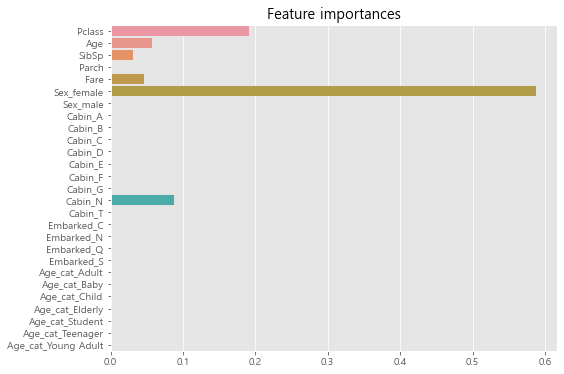

In [29]:
ftr_importances = pd.Series(model_xgb.feature_importances_ , index=X_train.columns  )
plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_importances , y = ftr_importances.index)
plt.show()